# Machine Learning Prediction Model for Residential Energy Consumption

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold


### Reading csv file 

In [3]:
data= pd.read_csv('recs2009_public.csv')
data.head()

C:\Users\mhsju\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (717,718) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,...,-2,3C,62,26,2393,0.61,0,64,38,73
2,3,1,1,1,5,8969.92,6233,505,5741,829,...,-2,5A,2346,49,5654,0.48,3,52,12,88
3,4,2,3,7,2,18003.64,6034,672,5781,868,...,-2,5A,2746,0,4941,0.55,4,55,7,87
4,5,1,1,1,3,5999.61,5388,702,5313,797,...,-2,5A,2251,0,5426,0.61,4,50,13,90


## Cleaining Data

### Converting non-numerical Data into numerical Data 

In [4]:
def handle (df):
    columns=df.columns.values
    for column in columns:
        text_dig_val={}
        def convert_to_int (val):
            return text_dig_val[val]
        if df[column].dtype!=np.int64 and df[column].dtype !=np.float64:
            column_contents=df[column].values.tolist()
            unique_elements=set (column_contents)
            x=0
            for unique in unique_elements: 
                if unique not in text_dig_val:
                    text_dig_val[unique]=x
                    x+=1
            df[column]= list(map(convert_to_int,df[column]))
    return df

In [5]:
myData=handle(data)

### Convert categorical variable into dummy/indicator variables

In [6]:
myData[['IECC_Climate_Pub','METROMICRO']].tail(10)

,IECC_Climate_Pub,METROMICRO
12073,0,2
12074,9,0
12075,9,2
12076,9,2
12077,9,2
12078,5,2
12079,6,2
12080,5,2
12081,8,2
12082,4,2


In [7]:
myData=pd.get_dummies(myData, drop_first=True, columns=['METROMICRO', 'IECC_Climate_Pub'])

#'IECC_Climate_Pub',

In [8]:
myData[['METROMICRO_1','METROMICRO_2', 'IECC_Climate_Pub_1', 'IECC_Climate_Pub_2','IECC_Climate_Pub_3']].tail(10)

,METROMICRO_1,METROMICRO_2,IECC_Climate_Pub_1,IECC_Climate_Pub_2,IECC_Climate_Pub_3
12073,0,1,0,0,0
12074,0,0,0,0,0
12075,0,1,0,0,0
12076,0,1,0,0,0
12077,0,1,0,0,0
12078,0,1,0,0,0
12079,0,1,0,0,0
12080,0,1,0,0,0
12081,0,1,0,0,0
12082,0,1,0,0,0


###### Dropping "DOEID" as it is not necessary

In [9]:
X= myData.drop(['KWH', 'DOEID'], axis=1)
y= myData['KWH']

In [10]:
X.shape, y.shape

((12083, 948), (12083,))

In [11]:
myData.shape

(12083, 950)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

## Feature Selection 

### Constants Removal 

In [13]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [14]:
constant_filter.get_support().sum()

909

In [15]:
X_train_filter= constant_filter.transform(X_train)
X_test_filter= constant_filter.transform(X_test)

In [16]:
X_train_filter.shape, X_test_filter.shape, X_train.shape

((9666, 909), (2417, 909), (9666, 948))

### Quasi Constant Feature Removal 

In [17]:
quasi_constant_filter= VarianceThreshold(threshold=0.01)

In [18]:
quasi_constant_filter.fit (X_train_filter)

VarianceThreshold(threshold=0.01)

In [19]:
quasi_constant_filter.get_support().sum()

618

In [20]:
X_train_filter_quasi= quasi_constant_filter.transform(X_train_filter)
X_test_filter_quasi= quasi_constant_filter.transform(X_test_filter)

In [21]:
X_train_filter_quasi.shape, X_test_filter_quasi.shape, X_train.shape

((9666, 618), (2417, 618), (9666, 948))

### Removing Duplicate Features

In [22]:
X_train_T = X_train_filter_quasi.T
X_test_T = X_test_filter_quasi.T

In [23]:
#Converting into Pandas Data frame 
X_train_T= pd.DataFrame(X_train_T)
X_test_T= pd.DataFrame (X_test_T)

In [24]:
X_train_T.duplicated().sum()

6

In [25]:
duplicated= X_train_T.duplicated()
featuresToKeep = [not index for index in duplicated]

In [26]:
X_train_unique= X_train_T[featuresToKeep].T
X_test_unique= X_test_T[featuresToKeep].T

In [27]:
X_train_unique.shape, X_train.shape

((9666, 612), (9666, 948))

### Removing Correlated Features

In [28]:
matrix=X_train_unique.corr()
matrix.shape

(612, 612)

In [29]:
def findCorrelated(data, threshold):
    corColum=set()
    matrix=data.corr()
    for i in range(len(matrix.columns)):
        for j in range(i):
            if abs(matrix.iloc[i,j])> threshold:
                colName= matrix.columns[i]
                corColum.add(colName)
    return corColum
corrFeatures= findCorrelated (X_train_unique,0.7)
print ('Correlated Features: ', len(set(corrFeatures)))

Correlated Features:  320


In [30]:
X_train_unCor= X_train_unique.drop(labels=corrFeatures, axis=1)
X_test_unCor= X_test_unique.drop(labels=corrFeatures, axis=1)

In [31]:
X_train.shape, X_train_unCor.shape

((9666, 948), (9666, 292))

In [32]:
937-283

654

#### We have Successfully removed 654 non-essential features

### Scaling the Data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scalar= StandardScaler()
X_train_scaled = scalar.fit_transform(X_train_unCor)
X_test_scaled = scalar.fit_transform(X_test_unCor)

## Feature Extraction: PCA Dimension Reduction

In [35]:
from sklearn.decomposition import PCA

#### Choosing Number of dimension (95% Variance)

In [36]:
pca= PCA()
pca.fit(X_train_scaled)

cumsum=np.cumsum(pca.explained_variance_ratio_)
numDimensions= np.argmax(cumsum>0.95)+1

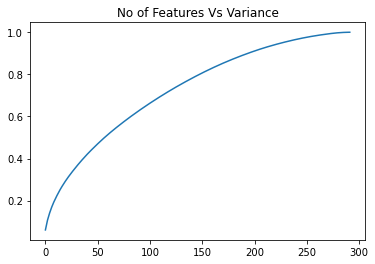

In [37]:
plt.plot(cumsum)
plt.title("No of Features Vs Variance")
plt.show()

#### From above figure we conclude that almost all the features left are useful and applying PCA would reduce performance

# Applying Neural Networks for ML

In [38]:
import pathlib

In [39]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [40]:
import tensorflow_docs as tfdocs

### Building a model function
    Optimizer: RMSprop, Activation: ReLU, Loss: Mean Squares Error

In [85]:
def build_model(n_hidden=2, n_neurons=134, learn_rate=0.0008583039148754685, input_shape=X_train_scaled.shape[1:]):
    model= keras.models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(layers.Dense(n_neurons, activation="relu"))
    model.add(layers.Dense(1))
    optimizer=tf.keras.optimizers.RMSprop(learn_rate)
    model.compile(loss="mse", optimizer=optimizer, metrics=['mae', 'mse'])
    return model

### Applying Randomized Search CV method for optimizing HyperParameters

In [86]:
keras_reg= keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [74]:
from scipy.stats import reciprocal 
from sklearn.model_selection import RandomizedSearchCV

In [82]:
param_distribs={
    "n_hidden": [0, 1, 2, 3, 4, 5],
    "n_neurons": np.arange (0, 292),
    "learn_rate": reciprocal(3e-4, 3e-2),
}

In [83]:
rnd_search_cv= RandomizedSearchCV(keras_reg, param_distribs, n_iter=15, cv=3)
rnd_search_cv.fit(X_train_scaled, y_train, epochs=1000, validation_split=0.2, 
                  callbacks=[keras.callbacks.EarlyStopping(patience=50)])

Epoch 1/1000
162/162 [==============================] - 0s 2ms/step - loss: 36412920.0000 - mae: 4023.1853 - mse: 36412920.0000 - val_loss: 10674875.0000 - val_mae: 2287.0056 - val_mse: 10674875.0000
Epoch 2/1000
162/162 [==============================] - 0s 1ms/step - loss: 6205957.5000 - mae: 1735.1550 - mse: 6205957.5000 - val_loss: 5104225.5000 - val_mae: 1554.4985 - val_mse: 5104225.5000
Epoch 3/1000
162/162 [==============================] - 0s 1ms/step - loss: 3579607.2500 - mae: 1349.1742 - mse: 3579607.2500 - val_loss: 4312172.5000 - val_mae: 1378.8927 - val_mse: 4312172.5000
Epoch 4/1000
162/162 [==============================] - 0s 1ms/step - loss: 2741710.7500 - mae: 1181.2787 - mse: 2741710.7500 - val_loss: 3900105.7500 - val_mae: 1348.8752 - val_mse: 3900105.7500
Epoch 5/1000
162/162 [==============================] - 0s 1ms/step - loss: 2265979.7500 - mae: 1083.1533 - mse: 2265979.7500 - val_loss: 3609503.0000 - val_mae: 1286.4902 - val_mse: 3609503.0000
Epoch 6/1000
162

162/162 [==============================] - 0s 1ms/step - loss: 599439.6875 - mae: 536.5874 - mse: 599439.6875 - val_loss: 2139407.0000 - val_mae: 992.1265 - val_mse: 2139407.0000
Epoch 44/1000
162/162 [==============================] - 0s 1ms/step - loss: 589817.0000 - mae: 529.3521 - mse: 589817.0000 - val_loss: 2040559.8750 - val_mae: 960.7956 - val_mse: 2040559.8750
Epoch 45/1000
162/162 [==============================] - 0s 1ms/step - loss: 563123.0000 - mae: 517.6057 - mse: 563123.0000 - val_loss: 2143946.5000 - val_mae: 984.3305 - val_mse: 2143946.5000
Epoch 46/1000
162/162 [==============================] - 0s 1ms/step - loss: 559913.1250 - mae: 523.6494 - mse: 559913.1250 - val_loss: 2425549.7500 - val_mae: 1058.9722 - val_mse: 2425549.7500
Epoch 47/1000
162/162 [==============================] - 0s 1ms/step - loss: 579622.9375 - mae: 529.8915 - mse: 579622.9375 - val_loss: 4952437.0000 - val_mae: 1652.4552 - val_mse: 4952437.0000
Epoch 48/1000
162/162 [========================

162/162 [==============================] - 0s 1ms/step - loss: 390126.1562 - mae: 420.1785 - mse: 390126.1562 - val_loss: 2209741.7500 - val_mae: 989.8763 - val_mse: 2209741.7500
Epoch 86/1000
162/162 [==============================] - 0s 1ms/step - loss: 357520.9688 - mae: 411.5682 - mse: 357520.9688 - val_loss: 2126159.0000 - val_mae: 997.7116 - val_mse: 2126159.0000
Epoch 87/1000
162/162 [==============================] - 0s 1ms/step - loss: 400609.7188 - mae: 424.9570 - mse: 400609.7188 - val_loss: 2144849.2500 - val_mae: 993.3561 - val_mse: 2144849.2500
Epoch 88/1000
162/162 [==============================] - 0s 1ms/step - loss: 363766.1250 - mae: 405.6501 - mse: 363766.1250 - val_loss: 2295272.7500 - val_mae: 1037.6755 - val_mse: 2295272.7500
Epoch 89/1000
162/162 [==============================] - 0s 1ms/step - loss: 371398.0312 - mae: 413.8050 - mse: 371398.0312 - val_loss: 2821774.0000 - val_mae: 1158.2598 - val_mse: 2821774.0000
Epoch 90/1000
162/162 [========================

162/162 [==============================] - 0s 1ms/step - loss: 809557.5000 - mae: 622.4094 - mse: 809557.5000 - val_loss: 2479940.2500 - val_mae: 1143.4209 - val_mse: 2479940.2500
Epoch 33/1000
162/162 [==============================] - 0s 1ms/step - loss: 815706.6875 - mae: 617.3176 - mse: 815706.6875 - val_loss: 2166905.7500 - val_mae: 1059.3616 - val_mse: 2166905.7500
Epoch 34/1000
162/162 [==============================] - 0s 1ms/step - loss: 782329.1250 - mae: 617.4389 - mse: 782329.1250 - val_loss: 2120461.0000 - val_mae: 1041.9624 - val_mse: 2120461.0000
Epoch 35/1000
162/162 [==============================] - 0s 1ms/step - loss: 753315.6875 - mae: 604.2189 - mse: 753315.6875 - val_loss: 2922060.7500 - val_mae: 1239.5974 - val_mse: 2922060.7500
Epoch 36/1000
162/162 [==============================] - 0s 1ms/step - loss: 768244.0000 - mae: 593.4840 - mse: 768244.0000 - val_loss: 2158125.0000 - val_mae: 1059.8140 - val_mse: 2158125.0000
Epoch 37/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 408267.7188 - mae: 442.2523 - mse: 408267.7188 - val_loss: 2088613.3750 - val_mae: 1023.9298 - val_mse: 2088613.3750
Epoch 75/1000
162/162 [==============================] - 0s 1ms/step - loss: 418649.2812 - mae: 442.5286 - mse: 418649.2812 - val_loss: 2867677.5000 - val_mae: 1245.3481 - val_mse: 2867677.5000
Epoch 76/1000
162/162 [==============================] - 0s 1ms/step - loss: 430502.5000 - mae: 449.2173 - mse: 430502.5000 - val_loss: 2147445.2500 - val_mae: 1046.0702 - val_mse: 2147445.2500
Epoch 77/1000
162/162 [==============================] - 0s 1ms/step - loss: 422695.0312 - mae: 445.3238 - mse: 422695.0312 - val_loss: 2037489.5000 - val_mae: 1007.4042 - val_mse: 2037489.5000
Epoch 78/1000
162/162 [==============================] - 0s 1ms/step - loss: 425486.1562 - mae: 428.8123 - mse: 425486.1562 - val_loss: 2459375.5000 - val_mae: 1151.3772 - val_mse: 2459375.5000
Epoch 79/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 290666.0938 - mae: 369.1040 - mse: 290666.0938 - val_loss: 2167380.2500 - val_mae: 1056.9863 - val_mse: 2167380.2500
Epoch 117/1000
162/162 [==============================] - 0s 1ms/step - loss: 286996.6250 - mae: 356.0629 - mse: 286996.6250 - val_loss: 2271891.5000 - val_mae: 1094.2858 - val_mse: 2271891.5000
Epoch 118/1000
162/162 [==============================] - 0s 1ms/step - loss: 299432.5625 - mae: 365.6064 - mse: 299432.5625 - val_loss: 2205596.0000 - val_mae: 1053.4059 - val_mse: 2205596.0000
Epoch 119/1000
162/162 [==============================] - 0s 1ms/step - loss: 271303.7812 - mae: 359.8097 - mse: 271303.7812 - val_loss: 2126393.0000 - val_mae: 1044.4287 - val_mse: 2126393.0000
Epoch 120/1000
162/162 [==============================] - 0s 1ms/step - loss: 284279.6875 - mae: 368.0188 - mse: 284279.6875 - val_loss: 2152147.2500 - val_mae: 1048.3663 - val_mse: 2152147.2500
Epoch 121/1000
162/162 [================

162/162 [==============================] - 0s 1ms/step - loss: 799163.1250 - mae: 625.3351 - mse: 799163.1250 - val_loss: 2288587.2500 - val_mae: 1081.9073 - val_mse: 2288587.2500
Epoch 31/1000
162/162 [==============================] - 0s 1ms/step - loss: 784985.9375 - mae: 614.2416 - mse: 784985.9375 - val_loss: 2448294.2500 - val_mae: 1135.5900 - val_mse: 2448294.2500
Epoch 32/1000
162/162 [==============================] - 0s 1ms/step - loss: 741265.6875 - mae: 619.2537 - mse: 741265.6875 - val_loss: 2428769.0000 - val_mae: 1129.9026 - val_mse: 2428769.0000
Epoch 33/1000
162/162 [==============================] - 0s 1ms/step - loss: 758452.6875 - mae: 607.9423 - mse: 758452.6875 - val_loss: 2405936.2500 - val_mae: 1108.2776 - val_mse: 2405936.2500
Epoch 34/1000
162/162 [==============================] - 0s 1ms/step - loss: 795029.5000 - mae: 596.6093 - mse: 795029.5000 - val_loss: 2606657.7500 - val_mae: 1176.1410 - val_mse: 2606657.7500
Epoch 35/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 473021.6562 - mae: 448.4167 - mse: 473021.6562 - val_loss: 2375072.7500 - val_mae: 1092.8550 - val_mse: 2375072.7500
Epoch 73/1000
101/101 [==============================] - 0s 703us/step - loss: 8080458.5000 - mae: 2206.6633 - mse: 8080458.5000
Epoch 1/1000
162/162 [==============================] - 0s 3ms/step - loss: 24935470.0000 - mae: 3046.7690 - mse: 24935470.0000 - val_loss: 5797081.0000 - val_mae: 1741.1963 - val_mse: 5797081.0000
Epoch 2/1000
162/162 [==============================] - 0s 2ms/step - loss: 4404286.0000 - mae: 1494.3658 - mse: 4404286.0000 - val_loss: 19469180.0000 - val_mae: 3410.8130 - val_mse: 19469180.0000
Epoch 3/1000
162/162 [==============================] - 0s 3ms/step - loss: 3210838.2500 - mae: 1260.3838 - mse: 3210838.2500 - val_loss: 4267355.0000 - val_mae: 1520.9882 - val_mse: 4267355.0000
Epoch 4/1000
162/162 [==============================] - 0s 2ms/step - loss: 2465715.7500 - mae: 110

162/162 [==============================] - 0s 3ms/step - loss: 741934.2500 - mae: 577.5955 - mse: 741934.2500 - val_loss: 6064102.0000 - val_mae: 1874.3917 - val_mse: 6064102.0000
Epoch 41/1000
162/162 [==============================] - 0s 2ms/step - loss: 728797.1250 - mae: 576.0583 - mse: 728797.1250 - val_loss: 1918684.5000 - val_mae: 958.4842 - val_mse: 1918684.5000
Epoch 42/1000
162/162 [==============================] - 0s 2ms/step - loss: 720751.4375 - mae: 549.0703 - mse: 720751.4375 - val_loss: 2799278.7500 - val_mae: 1229.7482 - val_mse: 2799278.7500
Epoch 43/1000
162/162 [==============================] - 0s 3ms/step - loss: 686410.6250 - mae: 540.6176 - mse: 686410.6250 - val_loss: 3235879.5000 - val_mae: 1300.4735 - val_mse: 3235879.5000
Epoch 44/1000
162/162 [==============================] - 1s 3ms/step - loss: 693121.6875 - mae: 553.9808 - mse: 693121.6875 - val_loss: 1813648.7500 - val_mae: 938.1090 - val_mse: 1813648.7500
Epoch 45/1000
162/162 [=======================

162/162 [==============================] - 0s 2ms/step - loss: 403398.1250 - mae: 411.4953 - mse: 403398.1250 - val_loss: 1713370.5000 - val_mae: 870.0076 - val_mse: 1713370.5000
Epoch 83/1000
162/162 [==============================] - 0s 2ms/step - loss: 396998.0938 - mae: 431.2061 - mse: 396998.0938 - val_loss: 2375694.7500 - val_mae: 1051.8011 - val_mse: 2375694.7500
Epoch 84/1000
162/162 [==============================] - 0s 2ms/step - loss: 375834.3438 - mae: 414.9836 - mse: 375834.3438 - val_loss: 1736402.5000 - val_mae: 890.6901 - val_mse: 1736402.5000
Epoch 85/1000
162/162 [==============================] - 0s 2ms/step - loss: 438600.0625 - mae: 392.7345 - mse: 438600.0625 - val_loss: 1655530.0000 - val_mae: 868.9902 - val_mse: 1655530.0000
Epoch 86/1000
162/162 [==============================] - 0s 2ms/step - loss: 385100.9375 - mae: 405.4585 - mse: 385100.9375 - val_loss: 1870339.1250 - val_mae: 932.3272 - val_mse: 1870339.1250
Epoch 87/1000
162/162 [=========================

162/162 [==============================] - 0s 3ms/step - loss: 303599.5312 - mae: 352.6595 - mse: 303599.5312 - val_loss: 1734782.7500 - val_mae: 887.8049 - val_mse: 1734782.7500
Epoch 125/1000
162/162 [==============================] - 0s 3ms/step - loss: 294493.0938 - mae: 368.3076 - mse: 294493.0938 - val_loss: 1934515.5000 - val_mae: 928.0751 - val_mse: 1934515.5000
Epoch 126/1000
162/162 [==============================] - 0s 3ms/step - loss: 293063.0000 - mae: 361.5247 - mse: 293063.0000 - val_loss: 1670758.8750 - val_mae: 865.3199 - val_mse: 1670758.8750
Epoch 127/1000
162/162 [==============================] - 0s 3ms/step - loss: 307750.0000 - mae: 367.3451 - mse: 307750.0000 - val_loss: 1639863.2500 - val_mae: 856.4941 - val_mse: 1639863.2500
Epoch 128/1000
162/162 [==============================] - 0s 3ms/step - loss: 289331.9062 - mae: 356.5916 - mse: 289331.9062 - val_loss: 1617739.1250 - val_mae: 838.4404 - val_mse: 1617739.1250
Epoch 129/1000
162/162 [=====================

162/162 [==============================] - 0s 3ms/step - loss: 224234.7500 - mae: 327.7188 - mse: 224234.7500 - val_loss: 1663877.7500 - val_mae: 862.2866 - val_mse: 1663877.7500
Epoch 167/1000
162/162 [==============================] - 0s 2ms/step - loss: 268343.8750 - mae: 322.0920 - mse: 268343.8750 - val_loss: 1695713.6250 - val_mae: 883.9732 - val_mse: 1695713.6250
Epoch 168/1000
162/162 [==============================] - 0s 2ms/step - loss: 240754.8594 - mae: 325.7036 - mse: 240754.8594 - val_loss: 1777584.7500 - val_mae: 907.0872 - val_mse: 1777584.7500
Epoch 169/1000
162/162 [==============================] - 0s 2ms/step - loss: 238459.9531 - mae: 328.1325 - mse: 238459.9531 - val_loss: 1751916.8750 - val_mae: 904.2346 - val_mse: 1751916.8750
Epoch 170/1000
162/162 [==============================] - 0s 3ms/step - loss: 227869.9219 - mae: 327.9730 - mse: 227869.9219 - val_loss: 1718866.6250 - val_mae: 880.8179 - val_mse: 1718866.6250
Epoch 171/1000
162/162 [=====================

162/162 [==============================] - 0s 2ms/step - loss: 891072.5000 - mae: 641.7997 - mse: 891072.5000 - val_loss: 2550195.2500 - val_mae: 1184.3583 - val_mse: 2550195.2500
Epoch 30/1000
162/162 [==============================] - 0s 3ms/step - loss: 787744.8750 - mae: 608.5314 - mse: 787744.8750 - val_loss: 3441286.2500 - val_mae: 1428.8474 - val_mse: 3441286.2500
Epoch 31/1000
162/162 [==============================] - 0s 2ms/step - loss: 829857.8125 - mae: 626.7908 - mse: 829857.8125 - val_loss: 3198099.2500 - val_mae: 1344.8634 - val_mse: 3198099.2500
Epoch 32/1000
162/162 [==============================] - 0s 2ms/step - loss: 845248.0625 - mae: 609.9100 - mse: 845248.0625 - val_loss: 2124711.7500 - val_mae: 1069.4075 - val_mse: 2124711.7500
Epoch 33/1000
162/162 [==============================] - 0s 2ms/step - loss: 804155.8750 - mae: 614.8765 - mse: 804155.8750 - val_loss: 1790707.8750 - val_mae: 942.6171 - val_mse: 1790707.8750
Epoch 34/1000
162/162 [======================

162/162 [==============================] - 0s 3ms/step - loss: 467280.3125 - mae: 460.0319 - mse: 467280.3125 - val_loss: 2175971.7500 - val_mae: 1103.6549 - val_mse: 2175971.7500
Epoch 72/1000
162/162 [==============================] - 0s 3ms/step - loss: 484779.5312 - mae: 471.0743 - mse: 484779.5312 - val_loss: 1628525.5000 - val_mae: 900.9866 - val_mse: 1628525.5000
Epoch 73/1000
162/162 [==============================] - 0s 2ms/step - loss: 470929.9375 - mae: 467.3151 - mse: 470929.9375 - val_loss: 1540933.7500 - val_mae: 894.0060 - val_mse: 1540933.7500
Epoch 74/1000
162/162 [==============================] - 0s 3ms/step - loss: 439858.6562 - mae: 450.8785 - mse: 439858.6562 - val_loss: 2801869.2500 - val_mae: 1274.2120 - val_mse: 2801869.2500
Epoch 75/1000
162/162 [==============================] - 0s 2ms/step - loss: 464128.1875 - mae: 450.9118 - mse: 464128.1875 - val_loss: 1510537.3750 - val_mae: 878.0507 - val_mse: 1510537.3750
Epoch 76/1000
162/162 [========================

162/162 [==============================] - 0s 2ms/step - loss: 324597.8438 - mae: 380.0884 - mse: 324597.8438 - val_loss: 1600279.3750 - val_mae: 915.2225 - val_mse: 1600279.3750
Epoch 114/1000
162/162 [==============================] - 0s 2ms/step - loss: 327954.4375 - mae: 389.6379 - mse: 327954.4375 - val_loss: 3495022.7500 - val_mae: 1426.0635 - val_mse: 3495022.7500
Epoch 115/1000
162/162 [==============================] - 0s 2ms/step - loss: 325459.2812 - mae: 382.7705 - mse: 325459.2812 - val_loss: 3159055.2500 - val_mae: 1334.8623 - val_mse: 3159055.2500
Epoch 116/1000
162/162 [==============================] - 0s 2ms/step - loss: 335189.4062 - mae: 403.8800 - mse: 335189.4062 - val_loss: 1883549.7500 - val_mae: 970.9484 - val_mse: 1883549.7500
Epoch 117/1000
162/162 [==============================] - 0s 2ms/step - loss: 312023.6875 - mae: 373.9308 - mse: 312023.6875 - val_loss: 1603591.5000 - val_mae: 894.8019 - val_mse: 1603591.5000
Epoch 118/1000
162/162 [===================

162/162 [==============================] - 0s 2ms/step - loss: 916283.3750 - mae: 623.9180 - mse: 916283.3750 - val_loss: 6474691.0000 - val_mae: 1963.0801 - val_mse: 6474691.0000
Epoch 29/1000
162/162 [==============================] - 0s 2ms/step - loss: 914547.8125 - mae: 642.2850 - mse: 914547.8125 - val_loss: 7041831.0000 - val_mae: 2076.4373 - val_mse: 7041831.0000
Epoch 30/1000
162/162 [==============================] - 0s 2ms/step - loss: 958430.8125 - mae: 646.3802 - mse: 958430.8125 - val_loss: 1655039.5000 - val_mae: 945.1256 - val_mse: 1655039.5000
Epoch 31/1000
162/162 [==============================] - 0s 2ms/step - loss: 921252.7500 - mae: 596.5048 - mse: 921252.7500 - val_loss: 1746428.3750 - val_mae: 948.3445 - val_mse: 1746428.3750
Epoch 32/1000
162/162 [==============================] - 0s 2ms/step - loss: 802899.1875 - mae: 589.9377 - mse: 802899.1875 - val_loss: 3624268.7500 - val_mae: 1430.3752 - val_mse: 3624268.7500
Epoch 33/1000
162/162 [=======================

162/162 [==============================] - 0s 2ms/step - loss: 504751.2500 - mae: 472.0474 - mse: 504751.2500 - val_loss: 1597118.6250 - val_mae: 891.0170 - val_mse: 1597118.6250
Epoch 71/1000
162/162 [==============================] - 0s 2ms/step - loss: 457295.8125 - mae: 459.1823 - mse: 457295.8125 - val_loss: 1598965.0000 - val_mae: 910.6662 - val_mse: 1598965.0000
Epoch 72/1000
162/162 [==============================] - 0s 2ms/step - loss: 482730.9688 - mae: 447.1008 - mse: 482730.9688 - val_loss: 2790252.7500 - val_mae: 1239.6401 - val_mse: 2790252.7500
Epoch 73/1000
162/162 [==============================] - 0s 2ms/step - loss: 506026.6875 - mae: 449.5538 - mse: 506026.6875 - val_loss: 1654994.2500 - val_mae: 897.6671 - val_mse: 1654994.2500
Epoch 74/1000
162/162 [==============================] - 0s 2ms/step - loss: 428742.4062 - mae: 451.8808 - mse: 428742.4062 - val_loss: 1648676.5000 - val_mae: 898.5875 - val_mse: 1648676.5000
Epoch 75/1000
162/162 [=========================

162/162 [==============================] - 0s 2ms/step - loss: 330354.5312 - mae: 372.3950 - mse: 330354.5312 - val_loss: 2224478.2500 - val_mae: 1097.2922 - val_mse: 2224478.2500
Epoch 113/1000
162/162 [==============================] - 0s 2ms/step - loss: 349135.7500 - mae: 392.2881 - mse: 349135.7500 - val_loss: 2326122.7500 - val_mae: 1144.2758 - val_mse: 2326122.7500
Epoch 114/1000
162/162 [==============================] - 0s 2ms/step - loss: 329143.4062 - mae: 366.4848 - mse: 329143.4062 - val_loss: 1900523.5000 - val_mae: 988.5968 - val_mse: 1900523.5000
Epoch 115/1000
162/162 [==============================] - 0s 2ms/step - loss: 320689.3438 - mae: 376.6021 - mse: 320689.3438 - val_loss: 1859497.6250 - val_mae: 1001.9326 - val_mse: 1859497.6250
Epoch 116/1000
162/162 [==============================] - 0s 2ms/step - loss: 315682.2812 - mae: 391.0087 - mse: 315682.2812 - val_loss: 1611377.6250 - val_mae: 902.0654 - val_mse: 1611377.6250
Epoch 117/1000
162/162 [==================

162/162 [==============================] - 0s 2ms/step - loss: 228996.1406 - mae: 325.7672 - mse: 228996.1406 - val_loss: 1597886.8750 - val_mae: 900.7300 - val_mse: 1597886.8750
Epoch 155/1000
162/162 [==============================] - 0s 2ms/step - loss: 235523.3750 - mae: 321.9485 - mse: 235523.3750 - val_loss: 1884611.3750 - val_mae: 987.0357 - val_mse: 1884611.3750
Epoch 156/1000
162/162 [==============================] - 0s 2ms/step - loss: 250758.7812 - mae: 328.4733 - mse: 250758.7812 - val_loss: 1589948.1250 - val_mae: 894.7222 - val_mse: 1589948.1250
Epoch 157/1000
162/162 [==============================] - 0s 2ms/step - loss: 230411.9219 - mae: 318.3179 - mse: 230411.9219 - val_loss: 1652836.7500 - val_mae: 920.2411 - val_mse: 1652836.7500
Epoch 158/1000
162/162 [==============================] - 0s 2ms/step - loss: 228912.9375 - mae: 328.3124 - mse: 228912.9375 - val_loss: 1530955.1250 - val_mae: 879.2015 - val_mse: 1530955.1250
Epoch 159/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 751605.5000 - mae: 565.2074 - mse: 751605.5000 - val_loss: 2281808.0000 - val_mae: 894.0488 - val_mse: 2281808.0000
Epoch 36/1000
162/162 [==============================] - 0s 1ms/step - loss: 720824.8750 - mae: 556.1349 - mse: 720824.8750 - val_loss: 2247714.2500 - val_mae: 884.9178 - val_mse: 2247714.2500
Epoch 37/1000
162/162 [==============================] - 0s 1ms/step - loss: 695875.5000 - mae: 541.4454 - mse: 695875.5000 - val_loss: 2251822.2500 - val_mae: 882.8032 - val_mse: 2251822.2500
Epoch 38/1000
162/162 [==============================] - 0s 1ms/step - loss: 671214.5000 - mae: 535.3491 - mse: 671214.5000 - val_loss: 2227142.5000 - val_mae: 880.3102 - val_mse: 2227142.5000
Epoch 39/1000
162/162 [==============================] - 0s 1ms/step - loss: 646177.3750 - mae: 523.8458 - mse: 646177.3750 - val_loss: 2200177.7500 - val_mae: 877.2329 - val_mse: 2200177.7500
Epoch 40/1000
162/162 [==========================

162/162 [==============================] - 0s 2ms/step - loss: 262447.3125 - mae: 306.2799 - mse: 262447.3125 - val_loss: 1860004.6250 - val_mae: 824.0214 - val_mse: 1860004.6250
Epoch 78/1000
162/162 [==============================] - 0s 1ms/step - loss: 261218.7500 - mae: 302.5751 - mse: 261218.7500 - val_loss: 1827473.0000 - val_mae: 810.1470 - val_mse: 1827473.0000
Epoch 79/1000
162/162 [==============================] - 0s 1ms/step - loss: 256760.2969 - mae: 298.5217 - mse: 256760.2969 - val_loss: 1868398.8750 - val_mae: 823.4575 - val_mse: 1868398.8750
Epoch 80/1000
162/162 [==============================] - 0s 1ms/step - loss: 251685.6406 - mae: 297.6703 - mse: 251685.6406 - val_loss: 1896819.2500 - val_mae: 832.5507 - val_mse: 1896819.2500
Epoch 81/1000
162/162 [==============================] - 0s 1ms/step - loss: 246219.3906 - mae: 294.5066 - mse: 246219.3906 - val_loss: 1811679.0000 - val_mae: 809.6473 - val_mse: 1811679.0000
Epoch 82/1000
162/162 [==========================

162/162 [==============================] - 0s 1ms/step - loss: 113962.5625 - mae: 184.8438 - mse: 113962.5625 - val_loss: 1660585.2500 - val_mae: 815.8381 - val_mse: 1660585.2500
Epoch 120/1000
162/162 [==============================] - 0s 1ms/step - loss: 111487.8672 - mae: 181.7223 - mse: 111487.8672 - val_loss: 1664782.1250 - val_mae: 816.6381 - val_mse: 1664782.1250
Epoch 121/1000
162/162 [==============================] - 0s 1ms/step - loss: 110733.0391 - mae: 180.2919 - mse: 110733.0391 - val_loss: 1637900.3750 - val_mae: 809.7280 - val_mse: 1637900.3750
Epoch 122/1000
162/162 [==============================] - 0s 1ms/step - loss: 109094.9609 - mae: 178.4387 - mse: 109094.9609 - val_loss: 1647386.6250 - val_mae: 825.6888 - val_mse: 1647386.6250
Epoch 123/1000
162/162 [==============================] - 0s 1ms/step - loss: 105052.3594 - mae: 174.7056 - mse: 105052.3594 - val_loss: 1640117.5000 - val_mae: 812.3499 - val_mse: 1640117.5000
Epoch 124/1000
162/162 [=====================

Epoch 162/1000
162/162 [==============================] - 0s 1ms/step - loss: 35694.3398 - mae: 107.6434 - mse: 35694.3398 - val_loss: 1649480.0000 - val_mae: 819.6270 - val_mse: 1649480.0000
Epoch 163/1000
162/162 [==============================] - 0s 1ms/step - loss: 36882.7500 - mae: 109.9621 - mse: 36882.7500 - val_loss: 1641807.7500 - val_mae: 821.6824 - val_mse: 1641807.7500
Epoch 164/1000
162/162 [==============================] - 0s 1ms/step - loss: 35385.5117 - mae: 109.3270 - mse: 35385.5117 - val_loss: 1664349.7500 - val_mae: 828.8339 - val_mse: 1664349.7500
Epoch 165/1000
162/162 [==============================] - 0s 1ms/step - loss: 32455.8398 - mae: 106.0874 - mse: 32455.8398 - val_loss: 1648142.0000 - val_mae: 819.9343 - val_mse: 1648142.0000
Epoch 166/1000
162/162 [==============================] - 0s 1ms/step - loss: 33115.2617 - mae: 106.7158 - mse: 33115.2617 - val_loss: 1665158.2500 - val_mae: 826.1006 - val_mse: 1665158.2500
Epoch 167/1000
162/162 [================

Epoch 205/1000
162/162 [==============================] - 0s 1ms/step - loss: 16447.2832 - mae: 86.0280 - mse: 16447.2832 - val_loss: 1656482.0000 - val_mae: 831.0650 - val_mse: 1656482.0000
Epoch 206/1000
162/162 [==============================] - 0s 1ms/step - loss: 16225.1611 - mae: 85.5186 - mse: 16225.1611 - val_loss: 1653919.3750 - val_mae: 834.1821 - val_mse: 1653919.3750
Epoch 207/1000
162/162 [==============================] - 0s 1ms/step - loss: 16776.6270 - mae: 85.7698 - mse: 16776.6270 - val_loss: 1640933.8750 - val_mae: 825.4968 - val_mse: 1640933.8750
Epoch 208/1000
162/162 [==============================] - 0s 1ms/step - loss: 16103.8584 - mae: 85.8716 - mse: 16103.8584 - val_loss: 1639462.0000 - val_mae: 825.2698 - val_mse: 1639462.0000
Epoch 209/1000
162/162 [==============================] - 0s 1ms/step - loss: 16093.8740 - mae: 85.9261 - mse: 16093.8740 - val_loss: 1639153.3750 - val_mae: 823.3831 - val_mse: 1639153.3750
Epoch 210/1000
162/162 [=====================

Epoch 248/1000
162/162 [==============================] - 0s 1ms/step - loss: 12300.4492 - mae: 80.7496 - mse: 12300.4492 - val_loss: 1697865.6250 - val_mae: 849.2508 - val_mse: 1697865.6250
Epoch 249/1000
162/162 [==============================] - 0s 1ms/step - loss: 11944.6943 - mae: 77.6158 - mse: 11944.6943 - val_loss: 1667911.7500 - val_mae: 841.1693 - val_mse: 1667911.7500
Epoch 250/1000
162/162 [==============================] - 0s 1ms/step - loss: 12482.6270 - mae: 79.1507 - mse: 12482.6270 - val_loss: 1700176.2500 - val_mae: 854.9171 - val_mse: 1700176.2500
Epoch 251/1000
162/162 [==============================] - 0s 1ms/step - loss: 12791.5977 - mae: 80.9956 - mse: 12791.5977 - val_loss: 1687825.6250 - val_mae: 850.2280 - val_mse: 1687825.6250
Epoch 252/1000
162/162 [==============================] - 0s 1ms/step - loss: 12015.3809 - mae: 79.1934 - mse: 12015.3809 - val_loss: 1726530.3750 - val_mae: 861.1030 - val_mse: 1726530.3750
Epoch 253/1000
162/162 [=====================

Epoch 14/1000
162/162 [==============================] - 0s 1ms/step - loss: 2789532.2500 - mae: 1165.6730 - mse: 2789532.2500 - val_loss: 3685896.7500 - val_mae: 1330.1794 - val_mse: 3685896.7500
Epoch 15/1000
162/162 [==============================] - 0s 1ms/step - loss: 2547379.7500 - mae: 1103.0842 - mse: 2547379.7500 - val_loss: 3453679.0000 - val_mae: 1280.7443 - val_mse: 3453679.0000
Epoch 16/1000
162/162 [==============================] - 0s 1ms/step - loss: 2325832.0000 - mae: 1049.3372 - mse: 2325832.0000 - val_loss: 3249004.7500 - val_mae: 1237.6761 - val_mse: 3249004.7500
Epoch 17/1000
162/162 [==============================] - 0s 1ms/step - loss: 2130560.5000 - mae: 998.7267 - mse: 2130560.5000 - val_loss: 3061417.0000 - val_mae: 1216.8385 - val_mse: 3061417.0000
Epoch 18/1000
162/162 [==============================] - 0s 1ms/step - loss: 1966799.8750 - mae: 958.3945 - mse: 1966799.8750 - val_loss: 2904897.0000 - val_mae: 1177.6571 - val_mse: 2904897.0000
Epoch 19/1000
162

162/162 [==============================] - 0s 1ms/step - loss: 475741.7500 - mae: 425.1786 - mse: 475741.7500 - val_loss: 1578626.3750 - val_mae: 845.9985 - val_mse: 1578626.3750
Epoch 57/1000
162/162 [==============================] - 0s 1ms/step - loss: 476514.8125 - mae: 418.1253 - mse: 476514.8125 - val_loss: 1552819.5000 - val_mae: 844.1219 - val_mse: 1552819.5000
Epoch 58/1000
162/162 [==============================] - 0s 1ms/step - loss: 466296.4688 - mae: 415.0898 - mse: 466296.4688 - val_loss: 1524983.2500 - val_mae: 832.0999 - val_mse: 1524983.2500
Epoch 59/1000
162/162 [==============================] - 0s 1ms/step - loss: 447369.4062 - mae: 411.4979 - mse: 447369.4062 - val_loss: 1535344.3750 - val_mae: 838.8817 - val_mse: 1535344.3750
Epoch 60/1000
162/162 [==============================] - 0s 1ms/step - loss: 441030.5000 - mae: 407.8899 - mse: 441030.5000 - val_loss: 1545281.3750 - val_mae: 837.5171 - val_mse: 1545281.3750
Epoch 61/1000
162/162 [==========================

162/162 [==============================] - 0s 1ms/step - loss: 227294.0000 - mae: 272.7705 - mse: 227294.0000 - val_loss: 1485132.3750 - val_mae: 827.8942 - val_mse: 1485132.3750
Epoch 99/1000
162/162 [==============================] - 0s 1ms/step - loss: 219145.4062 - mae: 270.1042 - mse: 219145.4062 - val_loss: 1463039.3750 - val_mae: 816.0490 - val_mse: 1463039.3750
Epoch 100/1000
162/162 [==============================] - 0s 1ms/step - loss: 214767.1406 - mae: 269.8514 - mse: 214767.1406 - val_loss: 1480533.7500 - val_mae: 820.8431 - val_mse: 1480533.7500
Epoch 101/1000
162/162 [==============================] - 0s 1ms/step - loss: 215809.5938 - mae: 263.0792 - mse: 215809.5938 - val_loss: 1461956.6250 - val_mae: 819.6296 - val_mse: 1461956.6250
Epoch 102/1000
162/162 [==============================] - 0s 1ms/step - loss: 210037.2031 - mae: 260.3864 - mse: 210037.2031 - val_loss: 1535507.1250 - val_mae: 843.9004 - val_mse: 1535507.1250
Epoch 103/1000
162/162 [======================

162/162 [==============================] - 0s 1ms/step - loss: 10098035.0000 - mae: 2319.6497 - mse: 10098035.0000 - val_loss: 10006082.0000 - val_mae: 2344.3232 - val_mse: 10006082.0000
Epoch 7/1000
162/162 [==============================] - 0s 1ms/step - loss: 7631076.0000 - mae: 2005.3048 - mse: 7631076.0000 - val_loss: 8171915.0000 - val_mae: 2086.8408 - val_mse: 8171915.0000
Epoch 8/1000
162/162 [==============================] - 0s 1ms/step - loss: 6039813.0000 - mae: 1767.3157 - mse: 6039813.0000 - val_loss: 6921214.5000 - val_mae: 1879.3757 - val_mse: 6921214.5000
Epoch 9/1000
162/162 [==============================] - 0s 1ms/step - loss: 4977118.5000 - mae: 1600.0405 - mse: 4977118.5000 - val_loss: 6071175.0000 - val_mae: 1737.9431 - val_mse: 6071175.0000
Epoch 10/1000
162/162 [==============================] - 0s 1ms/step - loss: 4217397.5000 - mae: 1460.2126 - mse: 4217397.5000 - val_loss: 5485018.5000 - val_mae: 1626.6643 - val_mse: 5485018.5000
Epoch 11/1000
162/162 [=====

162/162 [==============================] - 0s 1ms/step - loss: 435319.6875 - mae: 433.2184 - mse: 435319.6875 - val_loss: 1737874.7500 - val_mae: 869.0358 - val_mse: 1737874.7500
Epoch 49/1000
162/162 [==============================] - 0s 1ms/step - loss: 421792.0625 - mae: 427.7646 - mse: 421792.0625 - val_loss: 1753352.1250 - val_mae: 878.2385 - val_mse: 1753352.1250
Epoch 50/1000
162/162 [==============================] - 0s 1ms/step - loss: 413687.0312 - mae: 420.2940 - mse: 413687.0312 - val_loss: 1748487.1250 - val_mae: 874.9101 - val_mse: 1748487.1250
Epoch 51/1000
162/162 [==============================] - 0s 1ms/step - loss: 399770.1562 - mae: 414.0188 - mse: 399770.1562 - val_loss: 1724964.0000 - val_mae: 869.2978 - val_mse: 1724964.0000
Epoch 52/1000
162/162 [==============================] - 0s 1ms/step - loss: 388672.5000 - mae: 406.4775 - mse: 388672.5000 - val_loss: 1814764.0000 - val_mae: 904.4643 - val_mse: 1814764.0000
Epoch 53/1000
162/162 [==========================

162/162 [==============================] - 0s 1ms/step - loss: 181971.7188 - mae: 254.0580 - mse: 181971.7188 - val_loss: 1607800.7500 - val_mae: 851.8452 - val_mse: 1607800.7500
Epoch 91/1000
162/162 [==============================] - 0s 1ms/step - loss: 181971.7812 - mae: 252.5262 - mse: 181971.7812 - val_loss: 1572297.6250 - val_mae: 831.7781 - val_mse: 1572297.6250
Epoch 92/1000
162/162 [==============================] - 0s 1ms/step - loss: 177508.9531 - mae: 250.1222 - mse: 177508.9531 - val_loss: 1606689.2500 - val_mae: 850.9702 - val_mse: 1606689.2500
Epoch 93/1000
162/162 [==============================] - 0s 1ms/step - loss: 174985.3125 - mae: 247.6081 - mse: 174985.3125 - val_loss: 1596802.2500 - val_mae: 846.5746 - val_mse: 1596802.2500
Epoch 94/1000
162/162 [==============================] - 0s 1ms/step - loss: 173975.8594 - mae: 245.6026 - mse: 173975.8594 - val_loss: 1572797.0000 - val_mae: 841.4396 - val_mse: 1572797.0000
Epoch 95/1000
162/162 [==========================

162/162 [==============================] - 0s 1ms/step - loss: 88793.4141 - mae: 167.3195 - mse: 88793.4141 - val_loss: 1591255.1250 - val_mae: 849.2065 - val_mse: 1591255.1250
Epoch 133/1000
162/162 [==============================] - 0s 1ms/step - loss: 85408.0781 - mae: 163.0837 - mse: 85408.0781 - val_loss: 1593304.1250 - val_mae: 850.3896 - val_mse: 1593304.1250
Epoch 134/1000
162/162 [==============================] - 0s 1ms/step - loss: 88136.9922 - mae: 162.2519 - mse: 88136.9922 - val_loss: 1589452.2500 - val_mae: 844.9175 - val_mse: 1589452.2500
Epoch 135/1000
162/162 [==============================] - 0s 1ms/step - loss: 82211.7344 - mae: 160.6984 - mse: 82211.7344 - val_loss: 1596007.2500 - val_mae: 845.5336 - val_mse: 1596007.2500
Epoch 136/1000
162/162 [==============================] - 0s 1ms/step - loss: 82424.3906 - mae: 159.0918 - mse: 82424.3906 - val_loss: 1624564.1250 - val_mae: 856.8300 - val_mse: 1624564.1250
Epoch 137/1000
162/162 [==============================]

Epoch 17/1000
162/162 [==============================] - 0s 901us/step - loss: 179232368.0000 - mae: 11202.8760 - mse: 179232368.0000 - val_loss: 166372608.0000 - val_mae: 11122.7129 - val_mse: 166372608.0000
Epoch 18/1000
162/162 [==============================] - 0s 930us/step - loss: 178663456.0000 - mae: 11199.5303 - mse: 178663456.0000 - val_loss: 165914464.0000 - val_mae: 11120.6602 - val_mse: 165914464.0000
Epoch 19/1000
162/162 [==============================] - 0s 903us/step - loss: 178141360.0000 - mae: 11196.9531 - mse: 178141360.0000 - val_loss: 165479040.0000 - val_mae: 11118.5381 - val_mse: 165479040.0000
Epoch 20/1000
162/162 [==============================] - 0s 908us/step - loss: 177606496.0000 - mae: 11194.4043 - mse: 177606496.0000 - val_loss: 165059712.0000 - val_mae: 11116.4062 - val_mse: 165059712.0000
Epoch 21/1000
162/162 [==============================] - 0s 934us/step - loss: 177090080.0000 - mae: 11191.2363 - mse: 177090080.0000 - val_loss: 164641456.0000 - v

162/162 [==============================] - 0s 901us/step - loss: 163462096.0000 - mae: 11089.3984 - mse: 163462096.0000 - val_loss: 154115584.0000 - val_mae: 11040.6787 - val_mse: 154115584.0000
Epoch 57/1000
162/162 [==============================] - 0s 917us/step - loss: 163165216.0000 - mae: 11086.3320 - mse: 163165216.0000 - val_loss: 153897808.0000 - val_mae: 11038.6387 - val_mse: 153897808.0000
Epoch 58/1000
162/162 [==============================] - 0s 922us/step - loss: 162876576.0000 - mae: 11083.2256 - mse: 162876576.0000 - val_loss: 153685040.0000 - val_mae: 11036.5000 - val_mse: 153685040.0000
Epoch 59/1000
162/162 [==============================] - 0s 911us/step - loss: 162598992.0000 - mae: 11080.2910 - mse: 162598992.0000 - val_loss: 153471536.0000 - val_mae: 11034.2900 - val_mse: 153471536.0000
Epoch 60/1000
162/162 [==============================] - 0s 878us/step - loss: 162327936.0000 - mae: 11077.1748 - mse: 162327936.0000 - val_loss: 153269264.0000 - val_mae: 11032.

162/162 [==============================] - 0s 902us/step - loss: 154063472.0000 - mae: 10969.6797 - mse: 154063472.0000 - val_loss: 147176688.0000 - val_mae: 10955.9492 - val_mse: 147176688.0000
Epoch 96/1000
162/162 [==============================] - 0s 888us/step - loss: 153863296.0000 - mae: 10966.6123 - mse: 153863296.0000 - val_loss: 147027888.0000 - val_mae: 10953.7305 - val_mse: 147027888.0000
Epoch 97/1000
162/162 [==============================] - 0s 904us/step - loss: 153664112.0000 - mae: 10963.5859 - mse: 153664112.0000 - val_loss: 146884976.0000 - val_mae: 10951.4814 - val_mse: 146884976.0000
Epoch 98/1000
162/162 [==============================] - 0s 899us/step - loss: 153474016.0000 - mae: 10960.5566 - mse: 153474016.0000 - val_loss: 146741744.0000 - val_mae: 10949.2480 - val_mse: 146741744.0000
Epoch 99/1000
162/162 [==============================] - 0s 942us/step - loss: 153280160.0000 - mae: 10957.3457 - mse: 153280160.0000 - val_loss: 146597568.0000 - val_mae: 10947.

162/162 [==============================] - 0s 942us/step - loss: 147023696.0000 - mae: 10847.5273 - mse: 147023696.0000 - val_loss: 141968560.0000 - val_mae: 10866.6562 - val_mse: 141968560.0000
Epoch 135/1000
162/162 [==============================] - 0s 923us/step - loss: 146868864.0000 - mae: 10844.4395 - mse: 146868864.0000 - val_loss: 141844128.0000 - val_mae: 10864.3154 - val_mse: 141844128.0000
Epoch 136/1000
162/162 [==============================] - 0s 874us/step - loss: 146697488.0000 - mae: 10841.2334 - mse: 146697488.0000 - val_loss: 141723104.0000 - val_mae: 10861.9756 - val_mse: 141723104.0000
Epoch 137/1000
162/162 [==============================] - 0s 875us/step - loss: 146535968.0000 - mae: 10838.0283 - mse: 146535968.0000 - val_loss: 141598768.0000 - val_mae: 10859.6035 - val_mse: 141598768.0000
Epoch 138/1000
162/162 [==============================] - 0s 880us/step - loss: 146376704.0000 - mae: 10834.9561 - mse: 146376704.0000 - val_loss: 141482464.0000 - val_mae: 10

162/162 [==============================] - 0s 948us/step - loss: 141141056.0000 - mae: 10723.6992 - mse: 141141056.0000 - val_loss: 137547184.0000 - val_mae: 10774.2188 - val_mse: 137547184.0000
Epoch 174/1000
162/162 [==============================] - 0s 908us/step - loss: 141007488.0000 - mae: 10720.6436 - mse: 141007488.0000 - val_loss: 137442000.0000 - val_mae: 10771.8135 - val_mse: 137442000.0000
Epoch 175/1000
162/162 [==============================] - 0s 886us/step - loss: 140864368.0000 - mae: 10717.1777 - mse: 140864368.0000 - val_loss: 137338384.0000 - val_mae: 10769.4834 - val_mse: 137338384.0000
Epoch 176/1000
162/162 [==============================] - 0s 882us/step - loss: 140727136.0000 - mae: 10714.1582 - mse: 140727136.0000 - val_loss: 137232160.0000 - val_mae: 10767.0078 - val_mse: 137232160.0000
Epoch 177/1000
162/162 [==============================] - 0s 870us/step - loss: 140588736.0000 - mae: 10710.9043 - mse: 140588736.0000 - val_loss: 137127040.0000 - val_mae: 10

162/162 [==============================] - 0s 895us/step - loss: 135962672.0000 - mae: 10598.9766 - mse: 135962672.0000 - val_loss: 133588704.0000 - val_mae: 10678.5361 - val_mse: 133588704.0000
Epoch 213/1000
162/162 [==============================] - 0s 909us/step - loss: 135837168.0000 - mae: 10595.7773 - mse: 135837168.0000 - val_loss: 133493816.0000 - val_mae: 10676.0625 - val_mse: 133493816.0000
Epoch 214/1000
162/162 [==============================] - 0s 886us/step - loss: 135710144.0000 - mae: 10592.6631 - mse: 135710144.0000 - val_loss: 133396776.0000 - val_mae: 10673.5283 - val_mse: 133396776.0000
Epoch 215/1000
162/162 [==============================] - 0s 891us/step - loss: 135587088.0000 - mae: 10589.3770 - mse: 135587088.0000 - val_loss: 133301432.0000 - val_mae: 10671.0205 - val_mse: 133301432.0000
Epoch 216/1000
162/162 [==============================] - 0s 905us/step - loss: 135462880.0000 - mae: 10586.2188 - mse: 135462880.0000 - val_loss: 133204008.0000 - val_mae: 10

162/162 [==============================] - 0s 906us/step - loss: 131270568.0000 - mae: 10474.2881 - mse: 131270568.0000 - val_loss: 129965232.0000 - val_mae: 10580.7451 - val_mse: 129965232.0000
Epoch 252/1000
162/162 [==============================] - 0s 892us/step - loss: 131156088.0000 - mae: 10471.0166 - mse: 131156088.0000 - val_loss: 129875208.0000 - val_mae: 10578.1855 - val_mse: 129875208.0000
Epoch 253/1000
162/162 [==============================] - 0s 887us/step - loss: 131041016.0000 - mae: 10467.8877 - mse: 131041016.0000 - val_loss: 129783344.0000 - val_mae: 10575.6387 - val_mse: 129783344.0000
Epoch 254/1000
162/162 [==============================] - 0s 882us/step - loss: 130926408.0000 - mae: 10464.6328 - mse: 130926408.0000 - val_loss: 129695768.0000 - val_mae: 10573.1230 - val_mse: 129695768.0000
Epoch 255/1000
162/162 [==============================] - 0s 876us/step - loss: 130815296.0000 - mae: 10461.4395 - mse: 130815296.0000 - val_loss: 129606224.0000 - val_mae: 10

Epoch 290/1000
162/162 [==============================] - 0s 954us/step - loss: 126985264.0000 - mae: 10349.5791 - mse: 126985264.0000 - val_loss: 126599496.0000 - val_mae: 10480.6963 - val_mse: 126599496.0000
Epoch 291/1000
162/162 [==============================] - 0s 873us/step - loss: 126879656.0000 - mae: 10346.4648 - mse: 126879656.0000 - val_loss: 126515088.0000 - val_mae: 10478.0791 - val_mse: 126515088.0000
Epoch 292/1000
162/162 [==============================] - 0s 901us/step - loss: 126775912.0000 - mae: 10343.2607 - mse: 126775912.0000 - val_loss: 126430864.0000 - val_mae: 10475.4434 - val_mse: 126430864.0000
Epoch 293/1000
162/162 [==============================] - 0s 894us/step - loss: 126668144.0000 - mae: 10340.0322 - mse: 126668144.0000 - val_loss: 126346904.0000 - val_mae: 10472.8662 - val_mse: 126346904.0000
Epoch 294/1000
162/162 [==============================] - 0s 896us/step - loss: 126565248.0000 - mae: 10336.8828 - mse: 126565248.0000 - val_loss: 126265832.000

162/162 [==============================] - 0s 867us/step - loss: 122982160.0000 - mae: 10225.1455 - mse: 122982160.0000 - val_loss: 123416360.0000 - val_mae: 10378.8877 - val_mse: 123416360.0000
Epoch 330/1000
162/162 [==============================] - 0s 923us/step - loss: 122883432.0000 - mae: 10221.8877 - mse: 122883432.0000 - val_loss: 123336872.0000 - val_mae: 10376.2549 - val_mse: 123336872.0000
Epoch 331/1000
162/162 [==============================] - 0s 944us/step - loss: 122786952.0000 - mae: 10218.7109 - mse: 122786952.0000 - val_loss: 123258016.0000 - val_mae: 10373.6094 - val_mse: 123258016.0000
Epoch 332/1000
162/162 [==============================] - 0s 912us/step - loss: 122685576.0000 - mae: 10215.4541 - mse: 122685576.0000 - val_loss: 123178880.0000 - val_mae: 10371.0020 - val_mse: 123178880.0000
Epoch 333/1000
162/162 [==============================] - 0s 918us/step - loss: 122587968.0000 - mae: 10212.2666 - mse: 122587968.0000 - val_loss: 123101952.0000 - val_mae: 10

162/162 [==============================] - 0s 889us/step - loss: 119231520.0000 - mae: 10100.7100 - mse: 119231520.0000 - val_loss: 120411656.0000 - val_mae: 10276.3457 - val_mse: 120411656.0000
Epoch 369/1000
162/162 [==============================] - 0s 892us/step - loss: 119137072.0000 - mae: 10097.4863 - mse: 119137072.0000 - val_loss: 120335776.0000 - val_mae: 10273.6885 - val_mse: 120335776.0000
Epoch 370/1000
162/162 [==============================] - 0s 884us/step - loss: 119042640.0000 - mae: 10094.3154 - mse: 119042640.0000 - val_loss: 120259296.0000 - val_mae: 10271.0020 - val_mse: 120259296.0000
Epoch 371/1000
162/162 [==============================] - 0s 901us/step - loss: 118949032.0000 - mae: 10091.1689 - mse: 118949032.0000 - val_loss: 120184088.0000 - val_mae: 10268.3418 - val_mse: 120184088.0000
Epoch 372/1000
162/162 [==============================] - 0s 874us/step - loss: 118859304.0000 - mae: 10087.9434 - mse: 118859304.0000 - val_loss: 120107584.0000 - val_mae: 10

162/162 [==============================] - 0s 905us/step - loss: 115689040.0000 - mae: 9976.5898 - mse: 115689040.0000 - val_loss: 117523320.0000 - val_mae: 10172.2812 - val_mse: 117523320.0000
Epoch 408/1000
162/162 [==============================] - 0s 882us/step - loss: 115599696.0000 - mae: 9973.3975 - mse: 115599696.0000 - val_loss: 117451568.0000 - val_mae: 10169.6396 - val_mse: 117451568.0000
Epoch 409/1000
162/162 [==============================] - 0s 924us/step - loss: 115513192.0000 - mae: 9970.2881 - mse: 115513192.0000 - val_loss: 117380200.0000 - val_mae: 10167.0342 - val_mse: 117380200.0000
Epoch 410/1000
162/162 [==============================] - 0s 872us/step - loss: 115419896.0000 - mae: 9967.0254 - mse: 115419896.0000 - val_loss: 117308832.0000 - val_mae: 10164.3789 - val_mse: 117308832.0000
Epoch 411/1000
162/162 [==============================] - 0s 911us/step - loss: 115335328.0000 - mae: 9963.8408 - mse: 115335328.0000 - val_loss: 117237000.0000 - val_mae: 10161.6

162/162 [==============================] - 0s 894us/step - loss: 112312440.0000 - mae: 9852.5273 - mse: 112312440.0000 - val_loss: 114751576.0000 - val_mae: 10067.5879 - val_mse: 114751576.0000
Epoch 447/1000
162/162 [==============================] - 0s 908us/step - loss: 112229008.0000 - mae: 9849.3945 - mse: 112229008.0000 - val_loss: 114682080.0000 - val_mae: 10064.9453 - val_mse: 114682080.0000
Epoch 448/1000
162/162 [==============================] - 0s 921us/step - loss: 112143680.0000 - mae: 9846.1924 - mse: 112143680.0000 - val_loss: 114612832.0000 - val_mae: 10062.2256 - val_mse: 114612832.0000
Epoch 449/1000
162/162 [==============================] - 0s 908us/step - loss: 112059648.0000 - mae: 9843.0156 - mse: 112059648.0000 - val_loss: 114541928.0000 - val_mae: 10059.5068 - val_mse: 114541928.0000
Epoch 450/1000
162/162 [==============================] - 0s 946us/step - loss: 111976720.0000 - mae: 9839.8291 - mse: 111976720.0000 - val_loss: 114475760.0000 - val_mae: 10056.8

162/162 [==============================] - 0s 875us/step - loss: 109094368.0000 - mae: 9728.6289 - mse: 109094368.0000 - val_loss: 112058816.0000 - val_mae: 9961.5713 - val_mse: 112058816.0000
Epoch 486/1000
162/162 [==============================] - 0s 937us/step - loss: 109012456.0000 - mae: 9725.4580 - mse: 109012456.0000 - val_loss: 111993320.0000 - val_mae: 9958.9082 - val_mse: 111993320.0000
Epoch 487/1000
162/162 [==============================] - 0s 905us/step - loss: 108932392.0000 - mae: 9722.3125 - mse: 108932392.0000 - val_loss: 111925816.0000 - val_mae: 9956.1865 - val_mse: 111925816.0000
Epoch 488/1000
162/162 [==============================] - 0s 893us/step - loss: 108850096.0000 - mae: 9719.1230 - mse: 108850096.0000 - val_loss: 111858688.0000 - val_mae: 9953.5166 - val_mse: 111858688.0000
Epoch 489/1000
162/162 [==============================] - 0s 894us/step - loss: 108771224.0000 - mae: 9715.9297 - mse: 108771224.0000 - val_loss: 111793024.0000 - val_mae: 9950.8018 -

162/162 [==============================] - 0s 903us/step - loss: 106012168.0000 - mae: 9604.9854 - mse: 106012168.0000 - val_loss: 109462432.0000 - val_mae: 9855.3682 - val_mse: 109462432.0000
Epoch 525/1000
162/162 [==============================] - 0s 904us/step - loss: 105935696.0000 - mae: 9601.8447 - mse: 105935696.0000 - val_loss: 109399016.0000 - val_mae: 9852.6680 - val_mse: 109399016.0000
Epoch 526/1000
162/162 [==============================] - 0s 887us/step - loss: 105854456.0000 - mae: 9598.6172 - mse: 105854456.0000 - val_loss: 109330904.0000 - val_mae: 9849.8887 - val_mse: 109330904.0000
Epoch 527/1000
162/162 [==============================] - 0s 879us/step - loss: 105778160.0000 - mae: 9595.4844 - mse: 105778160.0000 - val_loss: 109266576.0000 - val_mae: 9847.1523 - val_mse: 109266576.0000
Epoch 528/1000
162/162 [==============================] - 0s 949us/step - loss: 105700680.0000 - mae: 9592.3193 - mse: 105700680.0000 - val_loss: 109201104.0000 - val_mae: 9844.4277 -

162/162 [==============================] - 0s 886us/step - loss: 103050744.0000 - mae: 9481.6260 - mse: 103050744.0000 - val_loss: 106931152.0000 - val_mae: 9748.2822 - val_mse: 106931152.0000
Epoch 564/1000
162/162 [==============================] - 0s 896us/step - loss: 102978192.0000 - mae: 9478.4414 - mse: 102978192.0000 - val_loss: 106867352.0000 - val_mae: 9745.5264 - val_mse: 106867352.0000
Epoch 565/1000
162/162 [==============================] - 0s 892us/step - loss: 102902784.0000 - mae: 9475.2773 - mse: 102902784.0000 - val_loss: 106802568.0000 - val_mae: 9742.7705 - val_mse: 106802568.0000
Epoch 566/1000
162/162 [==============================] - 0s 942us/step - loss: 102828520.0000 - mae: 9472.1035 - mse: 102828520.0000 - val_loss: 106739496.0000 - val_mae: 9739.9902 - val_mse: 106739496.0000
Epoch 567/1000
162/162 [==============================] - 0s 948us/step - loss: 102752912.0000 - mae: 9468.9609 - mse: 102752912.0000 - val_loss: 106676672.0000 - val_mae: 9737.2637 -

162/162 [==============================] - 0s 898us/step - loss: 100200224.0000 - mae: 9358.5625 - mse: 100200224.0000 - val_loss: 104452368.0000 - val_mae: 9640.0625 - val_mse: 104452368.0000
Epoch 603/1000
162/162 [==============================] - 0s 909us/step - loss: 100126808.0000 - mae: 9355.4131 - mse: 100126808.0000 - val_loss: 104390088.0000 - val_mae: 9637.2969 - val_mse: 104390088.0000
Epoch 604/1000
162/162 [==============================] - 0s 905us/step - loss: 100054976.0000 - mae: 9352.2588 - mse: 100054976.0000 - val_loss: 104326280.0000 - val_mae: 9634.5342 - val_mse: 104326280.0000
Epoch 605/1000
162/162 [==============================] - 0s 910us/step - loss: 99983120.0000 - mae: 9349.1162 - mse: 99983120.0000 - val_loss: 104265240.0000 - val_mae: 9631.8057 - val_mse: 104265240.0000
Epoch 606/1000
162/162 [==============================] - 0s 899us/step - loss: 99911176.0000 - mae: 9345.9297 - mse: 99911176.0000 - val_loss: 104202624.0000 - val_mae: 9629.0811 - val

Epoch 642/1000
162/162 [==============================] - 0s 871us/step - loss: 97376360.0000 - mae: 9232.5625 - mse: 97376360.0000 - val_loss: 101977832.0000 - val_mae: 9529.3975 - val_mse: 101977832.0000
Epoch 643/1000
162/162 [==============================] - 0s 894us/step - loss: 97304824.0000 - mae: 9229.4033 - mse: 97304824.0000 - val_loss: 101916872.0000 - val_mae: 9526.6807 - val_mse: 101916872.0000
Epoch 644/1000
162/162 [==============================] - 0s 897us/step - loss: 97233936.0000 - mae: 9226.2549 - mse: 97233936.0000 - val_loss: 101858816.0000 - val_mae: 9523.9717 - val_mse: 101858816.0000
Epoch 645/1000
162/162 [==============================] - 0s 894us/step - loss: 97165864.0000 - mae: 9223.1338 - mse: 97165864.0000 - val_loss: 101797128.0000 - val_mae: 9521.2236 - val_mse: 101797128.0000
Epoch 646/1000
162/162 [==============================] - 0s 913us/step - loss: 97095688.0000 - mae: 9220.0176 - mse: 97095688.0000 - val_loss: 101734272.0000 - val_mae: 9518.4

Epoch 682/1000
162/162 [==============================] - 0s 887us/step - loss: 94648552.0000 - mae: 9107.0088 - mse: 94648552.0000 - val_loss: 99565624.0000 - val_mae: 9418.2598 - val_mse: 99565624.0000
Epoch 683/1000
162/162 [==============================] - 0s 886us/step - loss: 94585008.0000 - mae: 9103.8926 - mse: 94585008.0000 - val_loss: 99504656.0000 - val_mae: 9415.3984 - val_mse: 99504656.0000
Epoch 684/1000
162/162 [==============================] - 0s 912us/step - loss: 94516600.0000 - mae: 9100.6973 - mse: 94516600.0000 - val_loss: 99444400.0000 - val_mae: 9412.6055 - val_mse: 99444400.0000
Epoch 685/1000
162/162 [==============================] - 0s 888us/step - loss: 94450168.0000 - mae: 9097.6377 - mse: 94450168.0000 - val_loss: 99384312.0000 - val_mae: 9409.8008 - val_mse: 99384312.0000
Epoch 686/1000
162/162 [==============================] - 0s 902us/step - loss: 94386048.0000 - mae: 9094.4834 - mse: 94386048.0000 - val_loss: 99325288.0000 - val_mae: 9406.9971 - val

162/162 [==============================] - 0s 905us/step - loss: 92007424.0000 - mae: 8981.5830 - mse: 92007424.0000 - val_loss: 97179816.0000 - val_mae: 9305.9580 - val_mse: 97179816.0000
Epoch 723/1000
162/162 [==============================] - 0s 900us/step - loss: 91943232.0000 - mae: 8978.4385 - mse: 91943232.0000 - val_loss: 97122688.0000 - val_mae: 9303.2021 - val_mse: 97122688.0000
Epoch 724/1000
162/162 [==============================] - 0s 923us/step - loss: 91877800.0000 - mae: 8975.3262 - mse: 91877800.0000 - val_loss: 97062544.0000 - val_mae: 9300.3418 - val_mse: 97062544.0000
Epoch 725/1000
162/162 [==============================] - 0s 889us/step - loss: 91814432.0000 - mae: 8972.1885 - mse: 91814432.0000 - val_loss: 97003152.0000 - val_mae: 9297.5264 - val_mse: 97003152.0000
Epoch 726/1000
162/162 [==============================] - 0s 874us/step - loss: 91750168.0000 - mae: 8969.0742 - mse: 91750168.0000 - val_loss: 96946440.0000 - val_mae: 9294.7373 - val_mse: 96946440.

162/162 [==============================] - 0s 912us/step - loss: 89458480.0000 - mae: 8856.5684 - mse: 89458480.0000 - val_loss: 94870504.0000 - val_mae: 9193.8291 - val_mse: 94870504.0000
Epoch 763/1000
162/162 [==============================] - 0s 885us/step - loss: 89395896.0000 - mae: 8853.4561 - mse: 89395896.0000 - val_loss: 94811632.0000 - val_mae: 9191.0000 - val_mse: 94811632.0000
Epoch 764/1000
162/162 [==============================] - 0s 887us/step - loss: 89330208.0000 - mae: 8850.2715 - mse: 89330208.0000 - val_loss: 94752992.0000 - val_mae: 9188.1602 - val_mse: 94752992.0000
Epoch 765/1000
162/162 [==============================] - 0s 928us/step - loss: 89269032.0000 - mae: 8847.2119 - mse: 89269032.0000 - val_loss: 94693904.0000 - val_mae: 9185.3330 - val_mse: 94693904.0000
Epoch 766/1000
162/162 [==============================] - 0s 900us/step - loss: 89206176.0000 - mae: 8844.0879 - mse: 89206176.0000 - val_loss: 94637456.0000 - val_mae: 9182.5312 - val_mse: 94637456.

162/162 [==============================] - 0s 893us/step - loss: 86968280.0000 - mae: 8731.5869 - mse: 86968280.0000 - val_loss: 92574496.0000 - val_mae: 9080.6621 - val_mse: 92574496.0000
Epoch 803/1000
162/162 [==============================] - 0s 942us/step - loss: 86908528.0000 - mae: 8728.4893 - mse: 86908528.0000 - val_loss: 92518608.0000 - val_mae: 9077.8369 - val_mse: 92518608.0000
Epoch 804/1000
162/162 [==============================] - 0s 922us/step - loss: 86847128.0000 - mae: 8725.3760 - mse: 86847128.0000 - val_loss: 92463144.0000 - val_mae: 9075.0107 - val_mse: 92463144.0000
Epoch 805/1000
162/162 [==============================] - 0s 866us/step - loss: 86786176.0000 - mae: 8722.2334 - mse: 86786176.0000 - val_loss: 92404712.0000 - val_mae: 9072.1074 - val_mse: 92404712.0000
Epoch 806/1000
162/162 [==============================] - 0s 910us/step - loss: 86724336.0000 - mae: 8719.1133 - mse: 86724336.0000 - val_loss: 92348056.0000 - val_mae: 9069.2852 - val_mse: 92348056.

162/162 [==============================] - 0s 896us/step - loss: 84567000.0000 - mae: 8607.0986 - mse: 84567000.0000 - val_loss: 90331776.0000 - val_mae: 8966.9268 - val_mse: 90331776.0000
Epoch 843/1000
162/162 [==============================] - 0s 894us/step - loss: 84504768.0000 - mae: 8603.9688 - mse: 84504768.0000 - val_loss: 90276744.0000 - val_mae: 8964.1113 - val_mse: 90276744.0000
Epoch 844/1000
162/162 [==============================] - 0s 875us/step - loss: 84447480.0000 - mae: 8600.8643 - mse: 84447480.0000 - val_loss: 90220728.0000 - val_mae: 8961.2207 - val_mse: 90220728.0000
Epoch 845/1000
162/162 [==============================] - 0s 871us/step - loss: 84384136.0000 - mae: 8597.7529 - mse: 84384136.0000 - val_loss: 90163208.0000 - val_mae: 8958.3457 - val_mse: 90163208.0000
Epoch 846/1000
162/162 [==============================] - 0s 893us/step - loss: 84323552.0000 - mae: 8594.6680 - mse: 84323552.0000 - val_loss: 90105504.0000 - val_mae: 8955.4805 - val_mse: 90105504.

162/162 [==============================] - 0s 941us/step - loss: 82216040.0000 - mae: 8482.8955 - mse: 82216040.0000 - val_loss: 88127688.0000 - val_mae: 8852.9238 - val_mse: 88127688.0000
Epoch 883/1000
162/162 [==============================] - 0s 879us/step - loss: 82156488.0000 - mae: 8479.7656 - mse: 82156488.0000 - val_loss: 88073024.0000 - val_mae: 8850.1035 - val_mse: 88073024.0000
Epoch 884/1000
162/162 [==============================] - 0s 854us/step - loss: 82097936.0000 - mae: 8476.6934 - mse: 82097936.0000 - val_loss: 88018400.0000 - val_mae: 8847.2490 - val_mse: 88018400.0000
Epoch 885/1000
162/162 [==============================] - 0s 903us/step - loss: 82037656.0000 - mae: 8473.5713 - mse: 82037656.0000 - val_loss: 87963856.0000 - val_mae: 8844.4209 - val_mse: 87963856.0000
Epoch 886/1000
162/162 [==============================] - 0s 902us/step - loss: 81980296.0000 - mae: 8470.4609 - mse: 81980296.0000 - val_loss: 87908296.0000 - val_mae: 8841.5381 - val_mse: 87908296.

162/162 [==============================] - 0s 907us/step - loss: 79930768.0000 - mae: 8358.8516 - mse: 79930768.0000 - val_loss: 85946728.0000 - val_mae: 8738.3174 - val_mse: 85946728.0000
Epoch 923/1000
162/162 [==============================] - 0s 871us/step - loss: 79870016.0000 - mae: 8355.7100 - mse: 79870016.0000 - val_loss: 85892888.0000 - val_mae: 8735.5039 - val_mse: 85892888.0000
Epoch 924/1000
162/162 [==============================] - 0s 917us/step - loss: 79812384.0000 - mae: 8352.6172 - mse: 79812384.0000 - val_loss: 85840648.0000 - val_mae: 8732.7012 - val_mse: 85840648.0000
Epoch 925/1000
162/162 [==============================] - 0s 888us/step - loss: 79759952.0000 - mae: 8349.5693 - mse: 79759952.0000 - val_loss: 85787064.0000 - val_mae: 8729.8203 - val_mse: 85787064.0000
Epoch 926/1000
162/162 [==============================] - 0s 899us/step - loss: 79700008.0000 - mae: 8346.4189 - mse: 79700008.0000 - val_loss: 85732224.0000 - val_mae: 8726.9531 - val_mse: 85732224.

162/162 [==============================] - 0s 897us/step - loss: 77703400.0000 - mae: 8235.1074 - mse: 77703400.0000 - val_loss: 83794312.0000 - val_mae: 8623.0635 - val_mse: 83794312.0000
Epoch 963/1000
162/162 [==============================] - 0s 915us/step - loss: 77652536.0000 - mae: 8232.0732 - mse: 77652536.0000 - val_loss: 83740768.0000 - val_mae: 8620.1494 - val_mse: 83740768.0000
Epoch 964/1000
162/162 [==============================] - 0s 877us/step - loss: 77595048.0000 - mae: 8228.9648 - mse: 77595048.0000 - val_loss: 83687848.0000 - val_mae: 8617.2744 - val_mse: 83687848.0000
Epoch 965/1000
162/162 [==============================] - 0s 890us/step - loss: 77538680.0000 - mae: 8225.8408 - mse: 77538680.0000 - val_loss: 83635768.0000 - val_mae: 8614.4355 - val_mse: 83635768.0000
Epoch 966/1000
162/162 [==============================] - 0s 917us/step - loss: 77486680.0000 - mae: 8222.7891 - mse: 77486680.0000 - val_loss: 83583400.0000 - val_mae: 8611.5381 - val_mse: 83583400.

Epoch 2/1000
162/162 [==============================] - 0s 893us/step - loss: 187567024.0000 - mae: 11335.6348 - mse: 187567024.0000 - val_loss: 174357264.0000 - val_mae: 11154.8369 - val_mse: 174357264.0000
Epoch 3/1000
162/162 [==============================] - 0s 908us/step - loss: 186811360.0000 - mae: 11331.6182 - mse: 186811360.0000 - val_loss: 173722880.0000 - val_mae: 11152.8057 - val_mse: 173722880.0000
Epoch 4/1000
162/162 [==============================] - 0s 873us/step - loss: 186061936.0000 - mae: 11328.1836 - mse: 186061936.0000 - val_loss: 173088384.0000 - val_mae: 11150.8018 - val_mse: 173088384.0000
Epoch 5/1000
162/162 [==============================] - 0s 887us/step - loss: 185326480.0000 - mae: 11324.3857 - mse: 185326480.0000 - val_loss: 172484128.0000 - val_mae: 11148.7393 - val_mse: 172484128.0000
Epoch 6/1000
162/162 [==============================] - 0s 997us/step - loss: 184616736.0000 - mae: 11321.2100 - mse: 184616736.0000 - val_loss: 171889840.0000 - val_ma

162/162 [==============================] - 0s 883us/step - loss: 166735184.0000 - mae: 11196.0254 - mse: 166735184.0000 - val_loss: 157526800.0000 - val_mae: 11077.2031 - val_mse: 157526800.0000
Epoch 42/1000
162/162 [==============================] - 0s 876us/step - loss: 166374832.0000 - mae: 11192.2021 - mse: 166374832.0000 - val_loss: 157253152.0000 - val_mae: 11075.1729 - val_mse: 157253152.0000
Epoch 43/1000
162/162 [==============================] - 0s 898us/step - loss: 166022368.0000 - mae: 11188.9463 - mse: 166022368.0000 - val_loss: 156979088.0000 - val_mae: 11073.1533 - val_mse: 156979088.0000
Epoch 44/1000
162/162 [==============================] - 0s 862us/step - loss: 165674736.0000 - mae: 11185.4531 - mse: 165674736.0000 - val_loss: 156716176.0000 - val_mae: 11071.1562 - val_mse: 156716176.0000
Epoch 45/1000
162/162 [==============================] - 0s 883us/step - loss: 165327872.0000 - mae: 11181.8555 - mse: 165327872.0000 - val_loss: 156447824.0000 - val_mae: 11069.

162/162 [==============================] - 0s 903us/step - loss: 155695616.0000 - mae: 11059.9912 - mse: 155695616.0000 - val_loss: 149227248.0000 - val_mae: 10997.6221 - val_mse: 149227248.0000
Epoch 81/1000
162/162 [==============================] - 0s 896us/step - loss: 155476976.0000 - mae: 11056.8135 - mse: 155476976.0000 - val_loss: 149066848.0000 - val_mae: 10995.5508 - val_mse: 149066848.0000
Epoch 82/1000
162/162 [==============================] - 0s 906us/step - loss: 155255248.0000 - mae: 11053.2266 - mse: 155255248.0000 - val_loss: 148903568.0000 - val_mae: 10993.4531 - val_mse: 148903568.0000
Epoch 83/1000
162/162 [==============================] - 0s 877us/step - loss: 155036032.0000 - mae: 11049.6348 - mse: 155036032.0000 - val_loss: 148740288.0000 - val_mae: 10991.3369 - val_mse: 148740288.0000
Epoch 84/1000
162/162 [==============================] - 0s 881us/step - loss: 154817872.0000 - mae: 11046.2334 - mse: 154817872.0000 - val_loss: 148577264.0000 - val_mae: 10989.

162/162 [==============================] - 0s 917us/step - loss: 148094672.0000 - mae: 10927.4199 - mse: 148094672.0000 - val_loss: 143591872.0000 - val_mae: 10912.4072 - val_mse: 143591872.0000
Epoch 120/1000
162/162 [==============================] - 0s 889us/step - loss: 147923888.0000 - mae: 10924.1387 - mse: 147923888.0000 - val_loss: 143463584.0000 - val_mae: 10910.1348 - val_mse: 143463584.0000
Epoch 121/1000
162/162 [==============================] - 0s 906us/step - loss: 147754000.0000 - mae: 10920.7686 - mse: 147754000.0000 - val_loss: 143338624.0000 - val_mae: 10907.9463 - val_mse: 143338624.0000
Epoch 122/1000
162/162 [==============================] - 0s 920us/step - loss: 147584992.0000 - mae: 10917.4707 - mse: 147584992.0000 - val_loss: 143211680.0000 - val_mae: 10905.6738 - val_mse: 143211680.0000
Epoch 123/1000
162/162 [==============================] - 0s 904us/step - loss: 147414496.0000 - mae: 10914.0244 - mse: 147414496.0000 - val_loss: 143084752.0000 - val_mae: 10

162/162 [==============================] - 0s 891us/step - loss: 141966048.0000 - mae: 10796.8535 - mse: 141966048.0000 - val_loss: 138975760.0000 - val_mae: 10822.3076 - val_mse: 138975760.0000
Epoch 159/1000
162/162 [==============================] - 0s 887us/step - loss: 141821280.0000 - mae: 10793.5752 - mse: 141821280.0000 - val_loss: 138864816.0000 - val_mae: 10819.9756 - val_mse: 138864816.0000
Epoch 160/1000
162/162 [==============================] - 0s 914us/step - loss: 141675520.0000 - mae: 10790.1592 - mse: 141675520.0000 - val_loss: 138756688.0000 - val_mae: 10817.5830 - val_mse: 138756688.0000
Epoch 161/1000
162/162 [==============================] - 0s 889us/step - loss: 141533472.0000 - mae: 10786.9443 - mse: 141533472.0000 - val_loss: 138649040.0000 - val_mae: 10815.2695 - val_mse: 138649040.0000
Epoch 162/1000
162/162 [==============================] - 0s 946us/step - loss: 141388160.0000 - mae: 10783.5781 - mse: 141388160.0000 - val_loss: 138539792.0000 - val_mae: 10

162/162 [==============================] - 0s 923us/step - loss: 136674144.0000 - mae: 10667.6494 - mse: 136674144.0000 - val_loss: 134910656.0000 - val_mae: 10728.3770 - val_mse: 134910656.0000
Epoch 198/1000
162/162 [==============================] - 0s 927us/step - loss: 136547344.0000 - mae: 10664.3623 - mse: 136547344.0000 - val_loss: 134811856.0000 - val_mae: 10725.9766 - val_mse: 134811856.0000
Epoch 199/1000
162/162 [==============================] - 0s 879us/step - loss: 136419344.0000 - mae: 10661.0107 - mse: 136419344.0000 - val_loss: 134714768.0000 - val_mae: 10723.5244 - val_mse: 134714768.0000
Epoch 200/1000
162/162 [==============================] - 0s 916us/step - loss: 136295920.0000 - mae: 10657.7461 - mse: 136295920.0000 - val_loss: 134617440.0000 - val_mae: 10721.0869 - val_mse: 134617440.0000
Epoch 201/1000
162/162 [==============================] - 0s 907us/step - loss: 136169920.0000 - mae: 10654.4180 - mse: 136169920.0000 - val_loss: 134520256.0000 - val_mae: 10

162/162 [==============================] - 0s 907us/step - loss: 131953616.0000 - mae: 10539.7256 - mse: 131953616.0000 - val_loss: 131221288.0000 - val_mae: 10631.7148 - val_mse: 131221288.0000
Epoch 237/1000
162/162 [==============================] - 0s 882us/step - loss: 131837128.0000 - mae: 10536.4209 - mse: 131837128.0000 - val_loss: 131130776.0000 - val_mae: 10629.1680 - val_mse: 131130776.0000
Epoch 238/1000
162/162 [==============================] - 0s 917us/step - loss: 131721448.0000 - mae: 10533.1143 - mse: 131721448.0000 - val_loss: 131038848.0000 - val_mae: 10626.6426 - val_mse: 131038848.0000
Epoch 239/1000
162/162 [==============================] - 0s 921us/step - loss: 131606640.0000 - mae: 10529.9434 - mse: 131606640.0000 - val_loss: 130946320.0000 - val_mae: 10624.0771 - val_mse: 130946320.0000
Epoch 240/1000
162/162 [==============================] - 0s 920us/step - loss: 131490272.0000 - mae: 10526.6367 - mse: 131490272.0000 - val_loss: 130853584.0000 - val_mae: 10

162/162 [==============================] - 0s 893us/step - loss: 127658792.0000 - mae: 10412.8535 - mse: 127658792.0000 - val_loss: 127812688.0000 - val_mae: 10532.6172 - val_mse: 127812688.0000
Epoch 276/1000
162/162 [==============================] - 0s 931us/step - loss: 127553552.0000 - mae: 10409.5947 - mse: 127553552.0000 - val_loss: 127727592.0000 - val_mae: 10530.0059 - val_mse: 127727592.0000
Epoch 277/1000
162/162 [==============================] - 0s 938us/step - loss: 127449248.0000 - mae: 10406.3877 - mse: 127449248.0000 - val_loss: 127643920.0000 - val_mae: 10527.4307 - val_mse: 127643920.0000
Epoch 278/1000
162/162 [==============================] - 0s 926us/step - loss: 127341672.0000 - mae: 10403.0771 - mse: 127341672.0000 - val_loss: 127557256.0000 - val_mae: 10524.8535 - val_mse: 127557256.0000
Epoch 279/1000
162/162 [==============================] - 0s 908us/step - loss: 127237288.0000 - mae: 10399.9209 - mse: 127237288.0000 - val_loss: 127470688.0000 - val_mae: 10

162/162 [==============================] - 0s 899us/step - loss: 123672752.0000 - mae: 10286.6572 - mse: 123672752.0000 - val_loss: 124599992.0000 - val_mae: 10431.5254 - val_mse: 124599992.0000
Epoch 315/1000
162/162 [==============================] - 0s 889us/step - loss: 123574312.0000 - mae: 10283.5176 - mse: 123574312.0000 - val_loss: 124520240.0000 - val_mae: 10428.9326 - val_mse: 124520240.0000
Epoch 316/1000
162/162 [==============================] - 0s 867us/step - loss: 123474632.0000 - mae: 10280.2412 - mse: 123474632.0000 - val_loss: 124441968.0000 - val_mae: 10426.3486 - val_mse: 124441968.0000
Epoch 317/1000
162/162 [==============================] - 0s 909us/step - loss: 123377272.0000 - mae: 10277.0293 - mse: 123377272.0000 - val_loss: 124360240.0000 - val_mae: 10423.7168 - val_mse: 124360240.0000
Epoch 318/1000
162/162 [==============================] - 0s 930us/step - loss: 123278072.0000 - mae: 10273.8145 - mse: 123278072.0000 - val_loss: 124280448.0000 - val_mae: 10

162/162 [==============================] - 0s 879us/step - loss: 119953104.0000 - mae: 10161.4502 - mse: 119953104.0000 - val_loss: 121545520.0000 - val_mae: 10328.4883 - val_mse: 121545520.0000
Epoch 354/1000
162/162 [==============================] - 0s 878us/step - loss: 119859848.0000 - mae: 10158.1992 - mse: 119859848.0000 - val_loss: 121468208.0000 - val_mae: 10325.8066 - val_mse: 121468208.0000
Epoch 355/1000
162/162 [==============================] - 0s 895us/step - loss: 119766400.0000 - mae: 10155.0010 - mse: 119766400.0000 - val_loss: 121391696.0000 - val_mae: 10323.1523 - val_mse: 121391696.0000
Epoch 356/1000
162/162 [==============================] - 0s 886us/step - loss: 119676872.0000 - mae: 10151.8506 - mse: 119676872.0000 - val_loss: 121317280.0000 - val_mae: 10320.5293 - val_mse: 121317280.0000
Epoch 357/1000
162/162 [==============================] - 0s 904us/step - loss: 119583328.0000 - mae: 10148.5840 - mse: 119583328.0000 - val_loss: 121239976.0000 - val_mae: 10

162/162 [==============================] - 0s 880us/step - loss: 116445088.0000 - mae: 10036.7812 - mse: 116445088.0000 - val_loss: 118632032.0000 - val_mae: 10224.4365 - val_mse: 118632032.0000
Epoch 393/1000
162/162 [==============================] - 0s 909us/step - loss: 116357448.0000 - mae: 10033.6172 - mse: 116357448.0000 - val_loss: 118557432.0000 - val_mae: 10221.7197 - val_mse: 118557432.0000
Epoch 394/1000
162/162 [==============================] - 0s 887us/step - loss: 116269536.0000 - mae: 10030.4229 - mse: 116269536.0000 - val_loss: 118483256.0000 - val_mae: 10219.0059 - val_mse: 118483256.0000
Epoch 395/1000
162/162 [==============================] - 0s 941us/step - loss: 116182728.0000 - mae: 10027.2070 - mse: 116182728.0000 - val_loss: 118408224.0000 - val_mae: 10216.2510 - val_mse: 118408224.0000
Epoch 396/1000
162/162 [==============================] - 0s 880us/step - loss: 116092960.0000 - mae: 10023.9932 - mse: 116092960.0000 - val_loss: 118333792.0000 - val_mae: 10

162/162 [==============================] - 0s 903us/step - loss: 113116992.0000 - mae: 9912.6738 - mse: 113116992.0000 - val_loss: 115825904.0000 - val_mae: 10119.5225 - val_mse: 115825904.0000
Epoch 432/1000
162/162 [==============================] - 0s 898us/step - loss: 113034344.0000 - mae: 9909.5010 - mse: 113034344.0000 - val_loss: 115756432.0000 - val_mae: 10116.8037 - val_mse: 115756432.0000
Epoch 433/1000
162/162 [==============================] - 0s 911us/step - loss: 112950528.0000 - mae: 9906.3213 - mse: 112950528.0000 - val_loss: 115686048.0000 - val_mae: 10114.1035 - val_mse: 115686048.0000
Epoch 434/1000
162/162 [==============================] - 0s 875us/step - loss: 112867496.0000 - mae: 9903.1006 - mse: 112867496.0000 - val_loss: 115616056.0000 - val_mae: 10111.4170 - val_mse: 115616056.0000
Epoch 435/1000
162/162 [==============================] - 0s 875us/step - loss: 112782624.0000 - mae: 9899.9639 - mse: 112782624.0000 - val_loss: 115544648.0000 - val_mae: 10108.7

162/162 [==============================] - 0s 973us/step - loss: 109949856.0000 - mae: 9789.3008 - mse: 109949856.0000 - val_loss: 113110472.0000 - val_mae: 10013.5869 - val_mse: 113110472.0000
Epoch 471/1000
162/162 [==============================] - 0s 905us/step - loss: 109871832.0000 - mae: 9786.1035 - mse: 109871832.0000 - val_loss: 113042560.0000 - val_mae: 10010.8701 - val_mse: 113042560.0000
Epoch 472/1000
162/162 [==============================] - 0s 874us/step - loss: 109794200.0000 - mae: 9782.9912 - mse: 109794200.0000 - val_loss: 112972824.0000 - val_mae: 10008.0996 - val_mse: 112972824.0000
Epoch 473/1000
162/162 [==============================] - 0s 862us/step - loss: 109716040.0000 - mae: 9779.8447 - mse: 109716040.0000 - val_loss: 112904760.0000 - val_mae: 10005.3887 - val_mse: 112904760.0000
Epoch 474/1000
162/162 [==============================] - 0s 923us/step - loss: 109637240.0000 - mae: 9776.6631 - mse: 109637240.0000 - val_loss: 112835664.0000 - val_mae: 10002.6

162/162 [==============================] - 0s 877us/step - loss: 106907944.0000 - mae: 9666.2637 - mse: 106907944.0000 - val_loss: 110475824.0000 - val_mae: 9906.6836 - val_mse: 110475824.0000
Epoch 510/1000
162/162 [==============================] - 0s 909us/step - loss: 106832680.0000 - mae: 9663.1445 - mse: 106832680.0000 - val_loss: 110411048.0000 - val_mae: 9903.9561 - val_mse: 110411048.0000
Epoch 511/1000
162/162 [==============================] - 0s 927us/step - loss: 106755040.0000 - mae: 9659.9863 - mse: 106755040.0000 - val_loss: 110345176.0000 - val_mae: 9901.2393 - val_mse: 110345176.0000
Epoch 512/1000
162/162 [==============================] - 0s 901us/step - loss: 106681256.0000 - mae: 9656.9111 - mse: 106681256.0000 - val_loss: 110277872.0000 - val_mae: 9898.4746 - val_mse: 110277872.0000
Epoch 513/1000
162/162 [==============================] - 0s 888us/step - loss: 106603928.0000 - mae: 9653.7266 - mse: 106603928.0000 - val_loss: 110209840.0000 - val_mae: 9895.6943 -

162/162 [==============================] - 0s 910us/step - loss: 103978592.0000 - mae: 9543.7793 - mse: 103978592.0000 - val_loss: 107915240.0000 - val_mae: 9799.4062 - val_mse: 107915240.0000
Epoch 549/1000
162/162 [==============================] - 0s 905us/step - loss: 103906616.0000 - mae: 9540.6758 - mse: 103906616.0000 - val_loss: 107852224.0000 - val_mae: 9796.6787 - val_mse: 107852224.0000
Epoch 550/1000
162/162 [==============================] - 0s 893us/step - loss: 103833952.0000 - mae: 9537.5342 - mse: 103833952.0000 - val_loss: 107789648.0000 - val_mae: 9793.9434 - val_mse: 107789648.0000
Epoch 551/1000
162/162 [==============================] - 0s 882us/step - loss: 103761032.0000 - mae: 9534.3818 - mse: 103761032.0000 - val_loss: 107724280.0000 - val_mae: 9791.1455 - val_mse: 107724280.0000
Epoch 552/1000
162/162 [==============================] - 0s 904us/step - loss: 103687960.0000 - mae: 9531.2764 - mse: 103687960.0000 - val_loss: 107658120.0000 - val_mae: 9788.3184 -

162/162 [==============================] - 0s 886us/step - loss: 101162736.0000 - mae: 9421.7705 - mse: 101162736.0000 - val_loss: 105423976.0000 - val_mae: 9691.4150 - val_mse: 105423976.0000
Epoch 588/1000
162/162 [==============================] - 0s 896us/step - loss: 101092168.0000 - mae: 9418.6279 - mse: 101092168.0000 - val_loss: 105360920.0000 - val_mae: 9688.6338 - val_mse: 105360920.0000
Epoch 589/1000
162/162 [==============================] - 0s 910us/step - loss: 101019984.0000 - mae: 9415.4951 - mse: 101019984.0000 - val_loss: 105297392.0000 - val_mae: 9685.8477 - val_mse: 105297392.0000
Epoch 590/1000
162/162 [==============================] - 0s 889us/step - loss: 100951184.0000 - mae: 9412.4033 - mse: 100951184.0000 - val_loss: 105234880.0000 - val_mae: 9683.0430 - val_mse: 105234880.0000
Epoch 591/1000
162/162 [==============================] - 0s 912us/step - loss: 100879008.0000 - mae: 9409.2461 - mse: 100879008.0000 - val_loss: 105171264.0000 - val_mae: 9680.2764 -

Epoch 627/1000
162/162 [==============================] - 0s 884us/step - loss: 98379792.0000 - mae: 9297.0371 - mse: 98379792.0000 - val_loss: 102915552.0000 - val_mae: 9579.6094 - val_mse: 102915552.0000
Epoch 628/1000
162/162 [==============================] - 0s 922us/step - loss: 98311160.0000 - mae: 9293.9795 - mse: 98311160.0000 - val_loss: 102853344.0000 - val_mae: 9576.7812 - val_mse: 102853344.0000
Epoch 629/1000
162/162 [==============================] - 0s 863us/step - loss: 98244112.0000 - mae: 9290.9062 - mse: 98244112.0000 - val_loss: 102790656.0000 - val_mae: 9573.9795 - val_mse: 102790656.0000
Epoch 630/1000
162/162 [==============================] - 0s 908us/step - loss: 98174216.0000 - mae: 9287.7725 - mse: 98174216.0000 - val_loss: 102728904.0000 - val_mae: 9571.2061 - val_mse: 102728904.0000
Epoch 631/1000
162/162 [==============================] - 0s 909us/step - loss: 98104656.0000 - mae: 9284.6865 - mse: 98104656.0000 - val_loss: 102667496.0000 - val_mae: 9568.3

Epoch 667/1000
162/162 [==============================] - 0s 880us/step - loss: 95685536.0000 - mae: 9172.7129 - mse: 95685536.0000 - val_loss: 100465136.0000 - val_mae: 9466.9570 - val_mse: 100465136.0000
Epoch 668/1000
162/162 [==============================] - 0s 902us/step - loss: 95625024.0000 - mae: 9169.6875 - mse: 95625024.0000 - val_loss: 100403576.0000 - val_mae: 9464.0889 - val_mse: 100403576.0000
Epoch 669/1000
162/162 [==============================] - 0s 874us/step - loss: 95556920.0000 - mae: 9166.5430 - mse: 95556920.0000 - val_loss: 100342096.0000 - val_mae: 9461.2383 - val_mse: 100342096.0000
Epoch 670/1000
162/162 [==============================] - 0s 898us/step - loss: 95488736.0000 - mae: 9163.4717 - mse: 95488736.0000 - val_loss: 100281256.0000 - val_mae: 9458.4102 - val_mse: 100281256.0000
Epoch 671/1000
162/162 [==============================] - 0s 896us/step - loss: 95427024.0000 - mae: 9160.3838 - mse: 95427024.0000 - val_loss: 100221640.0000 - val_mae: 9455.5

162/162 [==============================] - 0s 911us/step - loss: 93081352.0000 - mae: 9048.8848 - mse: 93081352.0000 - val_loss: 98061712.0000 - val_mae: 9353.8887 - val_mse: 98061712.0000
Epoch 708/1000
162/162 [==============================] - 0s 942us/step - loss: 93013112.0000 - mae: 9045.8037 - mse: 93013112.0000 - val_loss: 98002096.0000 - val_mae: 9351.0869 - val_mse: 98002096.0000
Epoch 709/1000
162/162 [==============================] - 0s 892us/step - loss: 92952848.0000 - mae: 9042.7412 - mse: 92952848.0000 - val_loss: 97941712.0000 - val_mae: 9348.2246 - val_mse: 97941712.0000
Epoch 710/1000
162/162 [==============================] - 0s 876us/step - loss: 92890856.0000 - mae: 9039.6641 - mse: 92890856.0000 - val_loss: 97883600.0000 - val_mae: 9345.3867 - val_mse: 97883600.0000
Epoch 711/1000
162/162 [==============================] - 0s 882us/step - loss: 92824640.0000 - mae: 9036.5996 - mse: 92824640.0000 - val_loss: 97823528.0000 - val_mae: 9342.5566 - val_mse: 97823528.

162/162 [==============================] - 0s 926us/step - loss: 90534864.0000 - mae: 8925.3467 - mse: 90534864.0000 - val_loss: 95713952.0000 - val_mae: 9240.5508 - val_mse: 95713952.0000
Epoch 748/1000
162/162 [==============================] - 0s 902us/step - loss: 90470504.0000 - mae: 8922.2754 - mse: 90470504.0000 - val_loss: 95656816.0000 - val_mae: 9237.7646 - val_mse: 95656816.0000
Epoch 749/1000
162/162 [==============================] - 0s 937us/step - loss: 90409720.0000 - mae: 8919.2363 - mse: 90409720.0000 - val_loss: 95598064.0000 - val_mae: 9234.9287 - val_mse: 95598064.0000
Epoch 750/1000
162/162 [==============================] - 0s 885us/step - loss: 90345592.0000 - mae: 8916.1367 - mse: 90345592.0000 - val_loss: 95539280.0000 - val_mae: 9232.0664 - val_mse: 95539280.0000
Epoch 751/1000
162/162 [==============================] - 0s 883us/step - loss: 90282472.0000 - mae: 8913.0117 - mse: 90282472.0000 - val_loss: 95480496.0000 - val_mae: 9229.2168 - val_mse: 95480496.

162/162 [==============================] - 0s 870us/step - loss: 88061960.0000 - mae: 8802.4043 - mse: 88061960.0000 - val_loss: 93384288.0000 - val_mae: 9126.2471 - val_mse: 93384288.0000
Epoch 788/1000
162/162 [==============================] - 0s 928us/step - loss: 87998712.0000 - mae: 8799.3105 - mse: 87998712.0000 - val_loss: 93328128.0000 - val_mae: 9123.3887 - val_mse: 93328128.0000
Epoch 789/1000
162/162 [==============================] - 0s 932us/step - loss: 87938568.0000 - mae: 8796.2305 - mse: 87938568.0000 - val_loss: 93270688.0000 - val_mae: 9120.4932 - val_mse: 93270688.0000
Epoch 790/1000
162/162 [==============================] - 0s 898us/step - loss: 87878040.0000 - mae: 8793.1611 - mse: 87878040.0000 - val_loss: 93213232.0000 - val_mae: 9117.6318 - val_mse: 93213232.0000
Epoch 791/1000
162/162 [==============================] - 0s 864us/step - loss: 87814880.0000 - mae: 8790.1064 - mse: 87814880.0000 - val_loss: 93154928.0000 - val_mae: 9114.7451 - val_mse: 93154928.

Epoch 827/1000
162/162 [==============================] - 0s 896us/step - loss: 85666344.0000 - mae: 8679.7148 - mse: 85666344.0000 - val_loss: 91099664.0000 - val_mae: 9011.6846 - val_mse: 91099664.0000
Epoch 828/1000
162/162 [==============================] - 0s 877us/step - loss: 85606720.0000 - mae: 8676.6514 - mse: 85606720.0000 - val_loss: 91043416.0000 - val_mae: 9008.8545 - val_mse: 91043416.0000
Epoch 829/1000
162/162 [==============================] - 0s 876us/step - loss: 85546000.0000 - mae: 8673.5850 - mse: 85546000.0000 - val_loss: 90986192.0000 - val_mae: 9005.9854 - val_mse: 90986192.0000
Epoch 830/1000
162/162 [==============================] - 0s 941us/step - loss: 85486904.0000 - mae: 8670.5225 - mse: 85486904.0000 - val_loss: 90930048.0000 - val_mae: 9003.1562 - val_mse: 90930048.0000
Epoch 831/1000
162/162 [==============================] - 0s 909us/step - loss: 85427184.0000 - mae: 8667.4521 - mse: 85427184.0000 - val_loss: 90873016.0000 - val_mae: 9000.2451 - val

162/162 [==============================] - 0s 922us/step - loss: 83345576.0000 - mae: 8557.5479 - mse: 83345576.0000 - val_loss: 88847880.0000 - val_mae: 8896.7676 - val_mse: 88847880.0000
Epoch 868/1000
162/162 [==============================] - 0s 880us/step - loss: 83285992.0000 - mae: 8554.5098 - mse: 83285992.0000 - val_loss: 88791224.0000 - val_mae: 8893.8936 - val_mse: 88791224.0000
Epoch 869/1000
162/162 [==============================] - 0s 893us/step - loss: 83228344.0000 - mae: 8551.4873 - mse: 83228344.0000 - val_loss: 88736600.0000 - val_mae: 8891.0400 - val_mse: 88736600.0000
Epoch 870/1000
162/162 [==============================] - 0s 893us/step - loss: 83172760.0000 - mae: 8548.4639 - mse: 83172760.0000 - val_loss: 88679360.0000 - val_mae: 8888.1279 - val_mse: 88679360.0000
Epoch 871/1000
162/162 [==============================] - 0s 890us/step - loss: 83118440.0000 - mae: 8545.4336 - mse: 83118440.0000 - val_loss: 88623976.0000 - val_mae: 8885.2676 - val_mse: 88623976.

162/162 [==============================] - 0s 871us/step - loss: 81058048.0000 - mae: 8435.7451 - mse: 81058048.0000 - val_loss: 86630232.0000 - val_mae: 8781.6338 - val_mse: 86630232.0000
Epoch 908/1000
162/162 [==============================] - 0s 905us/step - loss: 81001144.0000 - mae: 8432.6729 - mse: 81001144.0000 - val_loss: 86575760.0000 - val_mae: 8778.7637 - val_mse: 86575760.0000
Epoch 909/1000
162/162 [==============================] - 0s 901us/step - loss: 80944536.0000 - mae: 8429.6182 - mse: 80944536.0000 - val_loss: 86522128.0000 - val_mae: 8775.8682 - val_mse: 86522128.0000
Epoch 910/1000
162/162 [==============================] - 0s 903us/step - loss: 80888816.0000 - mae: 8426.5703 - mse: 80888816.0000 - val_loss: 86466600.0000 - val_mae: 8772.9834 - val_mse: 86466600.0000
Epoch 911/1000
162/162 [==============================] - 0s 920us/step - loss: 80832848.0000 - mae: 8423.5566 - mse: 80832848.0000 - val_loss: 86411488.0000 - val_mae: 8770.0947 - val_mse: 86411488.

162/162 [==============================] - 0s 885us/step - loss: 78835184.0000 - mae: 8314.0850 - mse: 78835184.0000 - val_loss: 84466176.0000 - val_mae: 8666.3594 - val_mse: 84466176.0000
Epoch 948/1000
162/162 [==============================] - 0s 896us/step - loss: 78777400.0000 - mae: 8311.0088 - mse: 78777400.0000 - val_loss: 84412176.0000 - val_mae: 8663.4844 - val_mse: 84412176.0000
Epoch 949/1000
162/162 [==============================] - 0s 903us/step - loss: 78725136.0000 - mae: 8307.9531 - mse: 78725136.0000 - val_loss: 84357472.0000 - val_mae: 8660.5537 - val_mse: 84357472.0000
Epoch 950/1000
162/162 [==============================] - 0s 882us/step - loss: 78668112.0000 - mae: 8304.9170 - mse: 78668112.0000 - val_loss: 84303296.0000 - val_mae: 8657.6602 - val_mse: 84303296.0000
Epoch 951/1000
162/162 [==============================] - 0s 934us/step - loss: 78615216.0000 - mae: 8301.9170 - mse: 78615216.0000 - val_loss: 84250544.0000 - val_mae: 8654.7832 - val_mse: 84250544.

162/162 [==============================] - 0s 905us/step - loss: 76656768.0000 - mae: 8192.4365 - mse: 76656768.0000 - val_loss: 82332976.0000 - val_mae: 8550.4883 - val_mse: 82332976.0000
Epoch 988/1000
162/162 [==============================] - 0s 930us/step - loss: 76603232.0000 - mae: 8189.3896 - mse: 76603232.0000 - val_loss: 82279104.0000 - val_mae: 8547.5029 - val_mse: 82279104.0000
Epoch 989/1000
162/162 [==============================] - 0s 887us/step - loss: 76549368.0000 - mae: 8186.3945 - mse: 76549368.0000 - val_loss: 82226144.0000 - val_mae: 8544.5742 - val_mse: 82226144.0000
Epoch 990/1000
162/162 [==============================] - 0s 892us/step - loss: 76493376.0000 - mae: 8183.3550 - mse: 76493376.0000 - val_loss: 82173312.0000 - val_mae: 8541.6709 - val_mse: 82173312.0000
Epoch 991/1000
162/162 [==============================] - 0s 915us/step - loss: 76439872.0000 - mae: 8180.3135 - mse: 76439872.0000 - val_loss: 82119768.0000 - val_mae: 8538.7568 - val_mse: 82119768.

162/162 [==============================] - 0s 890us/step - loss: 172740736.0000 - mae: 11210.3350 - mse: 172740736.0000 - val_loss: 163977888.0000 - val_mae: 11071.1074 - val_mse: 163977888.0000
Epoch 27/1000
162/162 [==============================] - 0s 898us/step - loss: 172255088.0000 - mae: 11206.6309 - mse: 172255088.0000 - val_loss: 163562672.0000 - val_mae: 11068.5742 - val_mse: 163562672.0000
Epoch 28/1000
162/162 [==============================] - 0s 911us/step - loss: 171794528.0000 - mae: 11203.3672 - mse: 171794528.0000 - val_loss: 163174336.0000 - val_mae: 11066.0898 - val_mse: 163174336.0000
Epoch 29/1000
162/162 [==============================] - 0s 911us/step - loss: 171343424.0000 - mae: 11199.9131 - mse: 171343424.0000 - val_loss: 162780384.0000 - val_mae: 11063.5977 - val_mse: 162780384.0000
Epoch 30/1000
162/162 [==============================] - 0s 884us/step - loss: 170892608.0000 - mae: 11196.2207 - mse: 170892608.0000 - val_loss: 162399648.0000 - val_mae: 11061.

162/162 [==============================] - 0s 905us/step - loss: 159082640.0000 - mae: 11073.6084 - mse: 159082640.0000 - val_loss: 152454944.0000 - val_mae: 10973.5576 - val_mse: 152454944.0000
Epoch 66/1000
162/162 [==============================] - 0s 898us/step - loss: 158817488.0000 - mae: 11070.0186 - mse: 158817488.0000 - val_loss: 152230544.0000 - val_mae: 10971.0361 - val_mse: 152230544.0000
Epoch 67/1000
162/162 [==============================] - 0s 898us/step - loss: 158555280.0000 - mae: 11066.6875 - mse: 158555280.0000 - val_loss: 152019168.0000 - val_mae: 10968.5391 - val_mse: 152019168.0000
Epoch 68/1000
162/162 [==============================] - 0s 876us/step - loss: 158298640.0000 - mae: 11063.4053 - mse: 158298640.0000 - val_loss: 151801552.0000 - val_mae: 10966.0059 - val_mse: 151801552.0000
Epoch 69/1000
162/162 [==============================] - 0s 917us/step - loss: 158045792.0000 - mae: 11059.8467 - mse: 158045792.0000 - val_loss: 151588512.0000 - val_mae: 10963.

162/162 [==============================] - 0s 898us/step - loss: 150538128.0000 - mae: 10940.4473 - mse: 150538128.0000 - val_loss: 145348416.0000 - val_mae: 10876.0889 - val_mse: 145348416.0000
Epoch 105/1000
162/162 [==============================] - 0s 878us/step - loss: 150343168.0000 - mae: 10937.1240 - mse: 150343168.0000 - val_loss: 145190656.0000 - val_mae: 10873.6211 - val_mse: 145190656.0000
Epoch 106/1000
162/162 [==============================] - 0s 911us/step - loss: 150160752.0000 - mae: 10933.6260 - mse: 150160752.0000 - val_loss: 145039776.0000 - val_mae: 10871.1484 - val_mse: 145039776.0000
Epoch 107/1000
162/162 [==============================] - 0s 899us/step - loss: 149979136.0000 - mae: 10930.3809 - mse: 149979136.0000 - val_loss: 144887824.0000 - val_mae: 10868.6592 - val_mse: 144887824.0000
Epoch 108/1000
162/162 [==============================] - 0s 922us/step - loss: 149790208.0000 - mae: 10926.8965 - mse: 149790208.0000 - val_loss: 144733072.0000 - val_mae: 10

162/162 [==============================] - 0s 909us/step - loss: 143954736.0000 - mae: 10809.7090 - mse: 143954736.0000 - val_loss: 139882224.0000 - val_mae: 10777.9873 - val_mse: 139882224.0000
Epoch 144/1000
162/162 [==============================] - 0s 887us/step - loss: 143803568.0000 - mae: 10806.4004 - mse: 143803568.0000 - val_loss: 139756064.0000 - val_mae: 10775.4951 - val_mse: 139756064.0000
Epoch 145/1000
162/162 [==============================] - 0s 883us/step - loss: 143655280.0000 - mae: 10803.1436 - mse: 143655280.0000 - val_loss: 139633200.0000 - val_mae: 10772.9082 - val_mse: 139633200.0000
Epoch 146/1000
162/162 [==============================] - 0s 898us/step - loss: 143505648.0000 - mae: 10799.7344 - mse: 143505648.0000 - val_loss: 139505824.0000 - val_mae: 10770.3330 - val_mse: 139505824.0000
Epoch 147/1000
162/162 [==============================] - 0s 909us/step - loss: 143355392.0000 - mae: 10796.4365 - mse: 143355392.0000 - val_loss: 139383168.0000 - val_mae: 10

162/162 [==============================] - 0s 880us/step - loss: 138394672.0000 - mae: 10680.4209 - mse: 138394672.0000 - val_loss: 135261744.0000 - val_mae: 10678.1699 - val_mse: 135261744.0000
Epoch 183/1000
162/162 [==============================] - 0s 933us/step - loss: 138263728.0000 - mae: 10677.1768 - mse: 138263728.0000 - val_loss: 135153248.0000 - val_mae: 10675.6484 - val_mse: 135153248.0000
Epoch 184/1000
162/162 [==============================] - 0s 929us/step - loss: 138128624.0000 - mae: 10673.8379 - mse: 138128624.0000 - val_loss: 135040352.0000 - val_mae: 10673.0449 - val_mse: 135040352.0000
Epoch 185/1000
162/162 [==============================] - 0s 878us/step - loss: 137996048.0000 - mae: 10670.5762 - mse: 137996048.0000 - val_loss: 134930368.0000 - val_mae: 10670.4795 - val_mse: 134930368.0000
Epoch 186/1000
162/162 [==============================] - 0s 886us/step - loss: 137867280.0000 - mae: 10667.2617 - mse: 137867280.0000 - val_loss: 134821264.0000 - val_mae: 10

162/162 [==============================] - 0s 913us/step - loss: 133464936.0000 - mae: 10552.0293 - mse: 133464936.0000 - val_loss: 131167384.0000 - val_mae: 10577.1846 - val_mse: 131167384.0000
Epoch 222/1000
162/162 [==============================] - 0s 911us/step - loss: 133348416.0000 - mae: 10548.8076 - mse: 133348416.0000 - val_loss: 131066176.0000 - val_mae: 10574.6016 - val_mse: 131066176.0000
Epoch 223/1000
162/162 [==============================] - 0s 917us/step - loss: 133223920.0000 - mae: 10545.5127 - mse: 133223920.0000 - val_loss: 130966120.0000 - val_mae: 10571.9824 - val_mse: 130966120.0000
Epoch 224/1000
162/162 [==============================] - 0s 927us/step - loss: 133103768.0000 - mae: 10542.1855 - mse: 133103768.0000 - val_loss: 130866288.0000 - val_mae: 10569.3271 - val_mse: 130866288.0000
Epoch 225/1000
162/162 [==============================] - 0s 954us/step - loss: 132988344.0000 - mae: 10538.9629 - mse: 132988344.0000 - val_loss: 130770936.0000 - val_mae: 10

162/162 [==============================] - 0s 932us/step - loss: 128985744.0000 - mae: 10424.4795 - mse: 128985744.0000 - val_loss: 127448912.0000 - val_mae: 10474.9854 - val_mse: 127448912.0000
Epoch 261/1000
162/162 [==============================] - 0s 879us/step - loss: 128877464.0000 - mae: 10421.1914 - mse: 128877464.0000 - val_loss: 127357920.0000 - val_mae: 10472.3643 - val_mse: 127357920.0000
Epoch 262/1000
162/162 [==============================] - 0s 890us/step - loss: 128764776.0000 - mae: 10417.9316 - mse: 128764776.0000 - val_loss: 127267888.0000 - val_mae: 10469.7305 - val_mse: 127267888.0000
Epoch 263/1000
162/162 [==============================] - 0s 922us/step - loss: 128658480.0000 - mae: 10414.6689 - mse: 128658480.0000 - val_loss: 127178048.0000 - val_mae: 10467.0439 - val_mse: 127178048.0000
Epoch 264/1000
162/162 [==============================] - 0s 917us/step - loss: 128552472.0000 - mae: 10411.4229 - mse: 128552472.0000 - val_loss: 127087272.0000 - val_mae: 10

162/162 [==============================] - 0s 913us/step - loss: 124855096.0000 - mae: 10297.5059 - mse: 124855096.0000 - val_loss: 124014768.0000 - val_mae: 10371.5312 - val_mse: 124014768.0000
Epoch 300/1000
162/162 [==============================] - 0s 915us/step - loss: 124748544.0000 - mae: 10294.2158 - mse: 124748544.0000 - val_loss: 123929608.0000 - val_mae: 10368.9131 - val_mse: 123929608.0000
Epoch 301/1000
162/162 [==============================] - 0s 930us/step - loss: 124651288.0000 - mae: 10290.9707 - mse: 124651288.0000 - val_loss: 123846264.0000 - val_mae: 10366.2246 - val_mse: 123846264.0000
Epoch 302/1000
162/162 [==============================] - 0s 913us/step - loss: 124552512.0000 - mae: 10287.7197 - mse: 124552512.0000 - val_loss: 123762320.0000 - val_mae: 10363.5264 - val_mse: 123762320.0000
Epoch 303/1000
162/162 [==============================] - 0s 916us/step - loss: 124449952.0000 - mae: 10284.4102 - mse: 124449952.0000 - val_loss: 123677656.0000 - val_mae: 10

162/162 [==============================] - 0s 900us/step - loss: 121000408.0000 - mae: 10171.0293 - mse: 121000408.0000 - val_loss: 120804968.0000 - val_mae: 10267.3779 - val_mse: 120804968.0000
Epoch 339/1000
162/162 [==============================] - 0s 897us/step - loss: 120907560.0000 - mae: 10167.8359 - mse: 120907560.0000 - val_loss: 120725408.0000 - val_mae: 10264.6582 - val_mse: 120725408.0000
Epoch 340/1000
162/162 [==============================] - 0s 878us/step - loss: 120811520.0000 - mae: 10164.5840 - mse: 120811520.0000 - val_loss: 120643896.0000 - val_mae: 10261.9795 - val_mse: 120643896.0000
Epoch 341/1000
162/162 [==============================] - 0s 908us/step - loss: 120710240.0000 - mae: 10161.3311 - mse: 120710240.0000 - val_loss: 120564760.0000 - val_mae: 10259.3115 - val_mse: 120564760.0000
Epoch 342/1000
162/162 [==============================] - 0s 910us/step - loss: 120619840.0000 - mae: 10158.0752 - mse: 120619840.0000 - val_loss: 120484736.0000 - val_mae: 10

162/162 [==============================] - 0s 912us/step - loss: 117373616.0000 - mae: 10045.0205 - mse: 117373616.0000 - val_loss: 117771048.0000 - val_mae: 10162.4697 - val_mse: 117771048.0000
Epoch 378/1000
162/162 [==============================] - 0s 916us/step - loss: 117283960.0000 - mae: 10041.8369 - mse: 117283960.0000 - val_loss: 117695752.0000 - val_mae: 10159.7832 - val_mse: 117695752.0000
Epoch 379/1000
162/162 [==============================] - 0s 891us/step - loss: 117193544.0000 - mae: 10038.5967 - mse: 117193544.0000 - val_loss: 117620472.0000 - val_mae: 10157.0859 - val_mse: 117620472.0000
Epoch 380/1000
162/162 [==============================] - 0s 877us/step - loss: 117104784.0000 - mae: 10035.4160 - mse: 117104784.0000 - val_loss: 117544648.0000 - val_mae: 10154.3555 - val_mse: 117544648.0000
Epoch 381/1000
162/162 [==============================] - 0s 867us/step - loss: 117012376.0000 - mae: 10032.1797 - mse: 117012376.0000 - val_loss: 117467240.0000 - val_mae: 10

162/162 [==============================] - 0s 925us/step - loss: 113941224.0000 - mae: 9919.4062 - mse: 113941224.0000 - val_loss: 114893696.0000 - val_mae: 10056.8506 - val_mse: 114893696.0000
Epoch 417/1000
162/162 [==============================] - 0s 928us/step - loss: 113855512.0000 - mae: 9916.2061 - mse: 113855512.0000 - val_loss: 114821096.0000 - val_mae: 10054.1045 - val_mse: 114821096.0000
Epoch 418/1000
162/162 [==============================] - 0s 923us/step - loss: 113773304.0000 - mae: 9913.0068 - mse: 113773304.0000 - val_loss: 114749672.0000 - val_mae: 10051.3662 - val_mse: 114749672.0000
Epoch 419/1000
162/162 [==============================] - 0s 909us/step - loss: 113690504.0000 - mae: 9909.8184 - mse: 113690504.0000 - val_loss: 114677984.0000 - val_mae: 10048.6357 - val_mse: 114677984.0000
Epoch 420/1000
162/162 [==============================] - 0s 910us/step - loss: 113602160.0000 - mae: 9906.5957 - mse: 113602160.0000 - val_loss: 114605448.0000 - val_mae: 10045.8

162/162 [==============================] - 0s 880us/step - loss: 110672848.0000 - mae: 9794.3193 - mse: 110672848.0000 - val_loss: 112121688.0000 - val_mae: 9950.1455 - val_mse: 112121688.0000
Epoch 456/1000
162/162 [==============================] - 0s 897us/step - loss: 110589488.0000 - mae: 9791.1006 - mse: 110589488.0000 - val_loss: 112051152.0000 - val_mae: 9947.3721 - val_mse: 112051152.0000
Epoch 457/1000
162/162 [==============================] - 0s 868us/step - loss: 110507744.0000 - mae: 9787.8555 - mse: 110507744.0000 - val_loss: 111981464.0000 - val_mae: 9944.6113 - val_mse: 111981464.0000
Epoch 458/1000
162/162 [==============================] - 0s 898us/step - loss: 110426432.0000 - mae: 9784.7266 - mse: 110426432.0000 - val_loss: 111914312.0000 - val_mae: 9941.9043 - val_mse: 111914312.0000
Epoch 459/1000
162/162 [==============================] - 0s 889us/step - loss: 110346936.0000 - mae: 9781.4814 - mse: 110346936.0000 - val_loss: 111844800.0000 - val_mae: 9939.1523 -

162/162 [==============================] - 0s 912us/step - loss: 107546624.0000 - mae: 9669.7471 - mse: 107546624.0000 - val_loss: 109451400.0000 - val_mae: 9842.6133 - val_mse: 109451400.0000
Epoch 495/1000
162/162 [==============================] - 0s 899us/step - loss: 107466216.0000 - mae: 9666.5244 - mse: 107466216.0000 - val_loss: 109385600.0000 - val_mae: 9839.8359 - val_mse: 109385600.0000
Epoch 496/1000
162/162 [==============================] - 0s 877us/step - loss: 107390592.0000 - mae: 9663.3516 - mse: 107390592.0000 - val_loss: 109318664.0000 - val_mae: 9837.0693 - val_mse: 109318664.0000
Epoch 497/1000
162/162 [==============================] - 0s 894us/step - loss: 107315960.0000 - mae: 9660.1836 - mse: 107315960.0000 - val_loss: 109251168.0000 - val_mae: 9834.2852 - val_mse: 109251168.0000
Epoch 498/1000
162/162 [==============================] - 0s 902us/step - loss: 107237544.0000 - mae: 9656.9980 - mse: 107237544.0000 - val_loss: 109184912.0000 - val_mae: 9831.5645 -

162/162 [==============================] - 0s 886us/step - loss: 104550232.0000 - mae: 9545.7041 - mse: 104550232.0000 - val_loss: 106874888.0000 - val_mae: 9734.5645 - val_mse: 106874888.0000
Epoch 534/1000
162/162 [==============================] - 0s 869us/step - loss: 104476600.0000 - mae: 9542.5254 - mse: 104476600.0000 - val_loss: 106809352.0000 - val_mae: 9731.7490 - val_mse: 106809352.0000
Epoch 535/1000
162/162 [==============================] - 0s 892us/step - loss: 104400536.0000 - mae: 9539.3711 - mse: 104400536.0000 - val_loss: 106746072.0000 - val_mae: 9729.0244 - val_mse: 106746072.0000
Epoch 536/1000
162/162 [==============================] - 0s 893us/step - loss: 104326152.0000 - mae: 9536.1641 - mse: 104326152.0000 - val_loss: 106681584.0000 - val_mae: 9726.2656 - val_mse: 106681584.0000
Epoch 537/1000
162/162 [==============================] - 0s 917us/step - loss: 104250616.0000 - mae: 9532.9541 - mse: 104250616.0000 - val_loss: 106617576.0000 - val_mae: 9723.4902 -

162/162 [==============================] - 0s 973us/step - loss: 101666312.0000 - mae: 9422.0381 - mse: 101666312.0000 - val_loss: 104381784.0000 - val_mae: 9625.8350 - val_mse: 104381784.0000
Epoch 573/1000
162/162 [==============================] - 0s 922us/step - loss: 101597248.0000 - mae: 9418.8545 - mse: 101597248.0000 - val_loss: 104318544.0000 - val_mae: 9623.0186 - val_mse: 104318544.0000
Epoch 574/1000
162/162 [==============================] - 0s 884us/step - loss: 101523608.0000 - mae: 9415.6699 - mse: 101523608.0000 - val_loss: 104253144.0000 - val_mae: 9620.1475 - val_mse: 104253144.0000
Epoch 575/1000
162/162 [==============================] - 0s 921us/step - loss: 101452496.0000 - mae: 9412.5195 - mse: 101452496.0000 - val_loss: 104190208.0000 - val_mae: 9617.3408 - val_mse: 104190208.0000
Epoch 576/1000
162/162 [==============================] - 0s 898us/step - loss: 101379064.0000 - mae: 9409.3730 - mse: 101379064.0000 - val_loss: 104128400.0000 - val_mae: 9614.5674 -

162/162 [==============================] - 0s 908us/step - loss: 98890160.0000 - mae: 9298.7852 - mse: 98890160.0000 - val_loss: 101947072.0000 - val_mae: 9516.0908 - val_mse: 101947072.0000
Epoch 612/1000
162/162 [==============================] - 0s 911us/step - loss: 98823040.0000 - mae: 9295.6445 - mse: 98823040.0000 - val_loss: 101885808.0000 - val_mae: 9513.2764 - val_mse: 101885808.0000
Epoch 613/1000
162/162 [==============================] - 0s 950us/step - loss: 98750056.0000 - mae: 9292.4590 - mse: 98750056.0000 - val_loss: 101822504.0000 - val_mae: 9510.4639 - val_mse: 101822504.0000
Epoch 614/1000
162/162 [==============================] - 0s 911us/step - loss: 98681624.0000 - mae: 9289.3154 - mse: 98681624.0000 - val_loss: 101763632.0000 - val_mae: 9507.6387 - val_mse: 101763632.0000
Epoch 615/1000
162/162 [==============================] - 0s 929us/step - loss: 98609616.0000 - mae: 9286.1250 - mse: 98609616.0000 - val_loss: 101701672.0000 - val_mae: 9504.7842 - val_mse: 

Epoch 651/1000
162/162 [==============================] - 0s 905us/step - loss: 96136504.0000 - mae: 9172.7529 - mse: 96136504.0000 - val_loss: 99519824.0000 - val_mae: 9403.3379 - val_mse: 99519824.0000
Epoch 652/1000
162/162 [==============================] - 0s 896us/step - loss: 96069648.0000 - mae: 9169.6191 - mse: 96069648.0000 - val_loss: 99460256.0000 - val_mae: 9400.4639 - val_mse: 99460256.0000
Epoch 653/1000
162/162 [==============================] - 0s 879us/step - loss: 96003632.0000 - mae: 9166.4736 - mse: 96003632.0000 - val_loss: 99399672.0000 - val_mae: 9397.6357 - val_mse: 99399672.0000
Epoch 654/1000
162/162 [==============================] - 0s 886us/step - loss: 95936864.0000 - mae: 9163.3262 - mse: 95936864.0000 - val_loss: 99338696.0000 - val_mae: 9394.7832 - val_mse: 99338696.0000
Epoch 655/1000
162/162 [==============================] - 0s 929us/step - loss: 95866584.0000 - mae: 9160.2168 - mse: 95866584.0000 - val_loss: 99278064.0000 - val_mae: 9391.9531 - val

162/162 [==============================] - 0s 929us/step - loss: 93481752.0000 - mae: 9047.2695 - mse: 93481752.0000 - val_loss: 97141904.0000 - val_mae: 9289.7158 - val_mse: 97141904.0000
Epoch 692/1000
162/162 [==============================] - 0s 893us/step - loss: 93417192.0000 - mae: 9044.1436 - mse: 93417192.0000 - val_loss: 97082872.0000 - val_mae: 9286.8398 - val_mse: 97082872.0000
Epoch 693/1000
162/162 [==============================] - 0s 884us/step - loss: 93349952.0000 - mae: 9041.0146 - mse: 93349952.0000 - val_loss: 97024168.0000 - val_mae: 9283.9951 - val_mse: 97024168.0000
Epoch 694/1000
162/162 [==============================] - 0s 897us/step - loss: 93285752.0000 - mae: 9037.9053 - mse: 93285752.0000 - val_loss: 96965808.0000 - val_mae: 9281.1455 - val_mse: 96965808.0000
Epoch 695/1000
162/162 [==============================] - 0s 921us/step - loss: 93219096.0000 - mae: 9034.7803 - mse: 93219096.0000 - val_loss: 96907376.0000 - val_mae: 9278.2959 - val_mse: 96907376.

162/162 [==============================] - 0s 895us/step - loss: 90900312.0000 - mae: 8922.1816 - mse: 90900312.0000 - val_loss: 94823000.0000 - val_mae: 9175.7227 - val_mse: 94823000.0000
Epoch 732/1000
162/162 [==============================] - 0s 877us/step - loss: 90835200.0000 - mae: 8919.0508 - mse: 90835200.0000 - val_loss: 94767384.0000 - val_mae: 9172.9170 - val_mse: 94767384.0000
Epoch 733/1000
162/162 [==============================] - 0s 910us/step - loss: 90772792.0000 - mae: 8915.9268 - mse: 90772792.0000 - val_loss: 94709304.0000 - val_mae: 9170.0215 - val_mse: 94709304.0000
Epoch 734/1000
162/162 [==============================] - 0s 868us/step - loss: 90709088.0000 - mae: 8912.8213 - mse: 90709088.0000 - val_loss: 94651312.0000 - val_mae: 9167.1621 - val_mse: 94651312.0000
Epoch 735/1000
162/162 [==============================] - 0s 892us/step - loss: 90642736.0000 - mae: 8909.6895 - mse: 90642736.0000 - val_loss: 94594088.0000 - val_mae: 9164.3154 - val_mse: 94594088.

162/162 [==============================] - 0s 930us/step - loss: 88398144.0000 - mae: 8797.2783 - mse: 88398144.0000 - val_loss: 92567320.0000 - val_mae: 9061.4355 - val_mse: 92567320.0000
Epoch 772/1000
162/162 [==============================] - 0s 965us/step - loss: 88342080.0000 - mae: 8794.1582 - mse: 88342080.0000 - val_loss: 92511424.0000 - val_mae: 9058.5615 - val_mse: 92511424.0000
Epoch 773/1000
162/162 [==============================] - 0s 911us/step - loss: 88280368.0000 - mae: 8791.0391 - mse: 88280368.0000 - val_loss: 92455944.0000 - val_mae: 9055.7217 - val_mse: 92455944.0000
Epoch 774/1000
162/162 [==============================] - 0s 987us/step - loss: 88215800.0000 - mae: 8787.8789 - mse: 88215800.0000 - val_loss: 92401384.0000 - val_mae: 9052.8750 - val_mse: 92401384.0000
Epoch 775/1000
162/162 [==============================] - 0s 1ms/step - loss: 88156336.0000 - mae: 8784.7783 - mse: 88156336.0000 - val_loss: 92345656.0000 - val_mae: 9049.9844 - val_mse: 92345656.00

162/162 [==============================] - 0s 882us/step - loss: 85981976.0000 - mae: 8672.6436 - mse: 85981976.0000 - val_loss: 90348008.0000 - val_mae: 8946.3857 - val_mse: 90348008.0000
Epoch 812/1000
162/162 [==============================] - 0s 898us/step - loss: 85920312.0000 - mae: 8669.4727 - mse: 85920312.0000 - val_loss: 90293912.0000 - val_mae: 8943.5059 - val_mse: 90293912.0000
Epoch 813/1000
162/162 [==============================] - 0s 911us/step - loss: 85862304.0000 - mae: 8666.3828 - mse: 85862304.0000 - val_loss: 90239856.0000 - val_mae: 8940.6533 - val_mse: 90239856.0000
Epoch 814/1000
162/162 [==============================] - 0s 903us/step - loss: 85803096.0000 - mae: 8663.2607 - mse: 85803096.0000 - val_loss: 90186912.0000 - val_mae: 8937.8428 - val_mse: 90186912.0000
Epoch 815/1000
162/162 [==============================] - 0s 929us/step - loss: 85747232.0000 - mae: 8660.1758 - mse: 85747232.0000 - val_loss: 90131584.0000 - val_mae: 8934.9775 - val_mse: 90131584.

162/162 [==============================] - 0s 919us/step - loss: 83626192.0000 - mae: 8548.3994 - mse: 83626192.0000 - val_loss: 88174720.0000 - val_mae: 8831.4268 - val_mse: 88174720.0000
Epoch 852/1000
162/162 [==============================] - 0s 918us/step - loss: 83572584.0000 - mae: 8545.2900 - mse: 83572584.0000 - val_loss: 88121064.0000 - val_mae: 8828.5449 - val_mse: 88121064.0000
Epoch 853/1000
162/162 [==============================] - 0s 875us/step - loss: 83511296.0000 - mae: 8542.1660 - mse: 83511296.0000 - val_loss: 88067152.0000 - val_mae: 8825.6641 - val_mse: 88067152.0000
Epoch 854/1000
162/162 [==============================] - 0s 923us/step - loss: 83452216.0000 - mae: 8539.1123 - mse: 83452216.0000 - val_loss: 88012288.0000 - val_mae: 8822.7979 - val_mse: 88012288.0000
Epoch 855/1000
162/162 [==============================] - 0s 930us/step - loss: 83398768.0000 - mae: 8536.0107 - mse: 83398768.0000 - val_loss: 87957864.0000 - val_mae: 8819.8643 - val_mse: 87957864.

162/162 [==============================] - 0s 927us/step - loss: 81337496.0000 - mae: 8424.6230 - mse: 81337496.0000 - val_loss: 86040352.0000 - val_mae: 8716.0674 - val_mse: 86040352.0000
Epoch 892/1000
162/162 [==============================] - 0s 897us/step - loss: 81276312.0000 - mae: 8421.5244 - mse: 81276312.0000 - val_loss: 85986600.0000 - val_mae: 8713.1533 - val_mse: 85986600.0000
Epoch 893/1000
162/162 [==============================] - 0s 918us/step - loss: 81218672.0000 - mae: 8418.4561 - mse: 81218672.0000 - val_loss: 85934000.0000 - val_mae: 8710.3037 - val_mse: 85934000.0000
Epoch 894/1000
162/162 [==============================] - 0s 880us/step - loss: 81168024.0000 - mae: 8415.4043 - mse: 81168024.0000 - val_loss: 85883648.0000 - val_mae: 8707.4482 - val_mse: 85883648.0000
Epoch 895/1000
162/162 [==============================] - 0s 962us/step - loss: 81114512.0000 - mae: 8412.3164 - mse: 81114512.0000 - val_loss: 85830720.0000 - val_mae: 8704.5488 - val_mse: 85830720.

162/162 [==============================] - 0s 893us/step - loss: 79112584.0000 - mae: 8301.1650 - mse: 79112584.0000 - val_loss: 83948224.0000 - val_mae: 8600.2891 - val_mse: 83948224.0000
Epoch 932/1000
162/162 [==============================] - 0s 903us/step - loss: 79062952.0000 - mae: 8298.1309 - mse: 79062952.0000 - val_loss: 83896232.0000 - val_mae: 8597.3818 - val_mse: 83896232.0000
Epoch 933/1000
162/162 [==============================] - 0s 910us/step - loss: 79002888.0000 - mae: 8294.9873 - mse: 79002888.0000 - val_loss: 83843256.0000 - val_mae: 8594.5098 - val_mse: 83843256.0000
Epoch 934/1000
162/162 [==============================] - 0s 886us/step - loss: 78951232.0000 - mae: 8291.9502 - mse: 78951232.0000 - val_loss: 83791560.0000 - val_mae: 8591.6289 - val_mse: 83791560.0000
Epoch 935/1000
162/162 [==============================] - 0s 890us/step - loss: 78893384.0000 - mae: 8288.8291 - mse: 78893384.0000 - val_loss: 83739176.0000 - val_mae: 8588.7246 - val_mse: 83739176.

162/162 [==============================] - 0s 894us/step - loss: 76943840.0000 - mae: 8178.0386 - mse: 76943840.0000 - val_loss: 81886120.0000 - val_mae: 8484.2334 - val_mse: 81886120.0000
Epoch 972/1000
162/162 [==============================] - 0s 931us/step - loss: 76888408.0000 - mae: 8174.9624 - mse: 76888408.0000 - val_loss: 81834384.0000 - val_mae: 8481.3232 - val_mse: 81834384.0000
Epoch 973/1000
162/162 [==============================] - 0s 928us/step - loss: 76840312.0000 - mae: 8171.8726 - mse: 76840312.0000 - val_loss: 81782624.0000 - val_mae: 8478.3896 - val_mse: 81782624.0000
Epoch 974/1000
162/162 [==============================] - 0s 916us/step - loss: 76783344.0000 - mae: 8168.7773 - mse: 76783344.0000 - val_loss: 81732680.0000 - val_mae: 8475.5195 - val_mse: 81732680.0000
Epoch 975/1000
162/162 [==============================] - 0s 911us/step - loss: 76729536.0000 - mae: 8165.7109 - mse: 76729536.0000 - val_loss: 81680168.0000 - val_mae: 8472.5908 - val_mse: 81680168.

162/162 [==============================] - 0s 1ms/step - loss: 2896903.0000 - mae: 1171.1486 - mse: 2896903.0000 - val_loss: 10107766.0000 - val_mae: 2445.7551 - val_mse: 10107766.0000
Epoch 12/1000
162/162 [==============================] - 0s 1ms/step - loss: 2658962.0000 - mae: 1137.7307 - mse: 2658962.0000 - val_loss: 5224994.0000 - val_mae: 1720.7998 - val_mse: 5224994.0000
Epoch 13/1000
162/162 [==============================] - 0s 1ms/step - loss: 2604709.2500 - mae: 1094.2018 - mse: 2604709.2500 - val_loss: 5993243.0000 - val_mae: 1805.7842 - val_mse: 5993243.0000
Epoch 14/1000
162/162 [==============================] - 0s 1ms/step - loss: 2581969.0000 - mae: 1096.6648 - mse: 2581969.0000 - val_loss: 3505577.5000 - val_mae: 1367.8147 - val_mse: 3505577.5000
Epoch 15/1000
162/162 [==============================] - 0s 1ms/step - loss: 2325932.7500 - mae: 1061.4788 - mse: 2325932.7500 - val_loss: 2676666.0000 - val_mae: 1157.9954 - val_mse: 2676666.0000
Epoch 16/1000
162/162 [====

Epoch 53/1000
162/162 [==============================] - 0s 1ms/step - loss: 710478.3125 - mae: 559.7889 - mse: 710478.3125 - val_loss: 6276936.5000 - val_mae: 1916.8800 - val_mse: 6276936.5000
Epoch 54/1000
162/162 [==============================] - 0s 1ms/step - loss: 690149.5625 - mae: 573.7673 - mse: 690149.5625 - val_loss: 1909209.1250 - val_mae: 955.1127 - val_mse: 1909209.1250
Epoch 55/1000
162/162 [==============================] - 0s 1ms/step - loss: 634177.3750 - mae: 538.2474 - mse: 634177.3750 - val_loss: 2276850.0000 - val_mae: 1051.2125 - val_mse: 2276850.0000
Epoch 56/1000
162/162 [==============================] - 0s 1ms/step - loss: 669705.0625 - mae: 543.0060 - mse: 669705.0625 - val_loss: 3074956.2500 - val_mae: 1284.6323 - val_mse: 3074956.2500
Epoch 57/1000
162/162 [==============================] - 0s 1ms/step - loss: 616766.1250 - mae: 529.6888 - mse: 616766.1250 - val_loss: 1907843.6250 - val_mae: 959.6728 - val_mse: 1907843.6250
Epoch 58/1000
162/162 [=========

162/162 [==============================] - 0s 1ms/step - loss: 393538.2188 - mae: 426.8775 - mse: 393538.2188 - val_loss: 1963661.0000 - val_mae: 960.0815 - val_mse: 1963661.0000
Epoch 96/1000
162/162 [==============================] - 0s 1ms/step - loss: 417449.4062 - mae: 429.7483 - mse: 417449.4062 - val_loss: 2109630.2500 - val_mae: 1022.7775 - val_mse: 2109630.2500
Epoch 97/1000
162/162 [==============================] - 0s 1ms/step - loss: 430200.9375 - mae: 424.9390 - mse: 430200.9375 - val_loss: 1805782.1250 - val_mae: 927.4435 - val_mse: 1805782.1250
Epoch 98/1000
162/162 [==============================] - 0s 1ms/step - loss: 389697.2188 - mae: 414.4178 - mse: 389697.2188 - val_loss: 2003451.3750 - val_mae: 995.0562 - val_mse: 2003451.3750
Epoch 99/1000
162/162 [==============================] - 0s 1ms/step - loss: 379311.0312 - mae: 416.5844 - mse: 379311.0312 - val_loss: 1794959.0000 - val_mae: 934.1088 - val_mse: 1794959.0000
Epoch 100/1000
162/162 [========================

162/162 [==============================] - 0s 1ms/step - loss: 3603571.0000 - mae: 1311.3003 - mse: 3603571.0000 - val_loss: 37159052.0000 - val_mae: 4812.1030 - val_mse: 37159052.0000
Epoch 9/1000
162/162 [==============================] - 0s 1ms/step - loss: 3835074.0000 - mae: 1318.8812 - mse: 3835074.0000 - val_loss: 3142334.2500 - val_mae: 1315.2169 - val_mse: 3142334.2500
Epoch 10/1000
162/162 [==============================] - 0s 1ms/step - loss: 2938869.5000 - mae: 1190.5946 - mse: 2938869.5000 - val_loss: 4211141.5000 - val_mae: 1566.3596 - val_mse: 4211141.5000
Epoch 11/1000
162/162 [==============================] - 0s 1ms/step - loss: 3107400.7500 - mae: 1210.7745 - mse: 3107400.7500 - val_loss: 3380929.0000 - val_mae: 1363.0442 - val_mse: 3380929.0000
Epoch 12/1000
162/162 [==============================] - 0s 1ms/step - loss: 2655545.2500 - mae: 1148.2537 - mse: 2655545.2500 - val_loss: 3292196.5000 - val_mae: 1348.6663 - val_mse: 3292196.5000
Epoch 13/1000
162/162 [=====

Epoch 50/1000
162/162 [==============================] - 0s 1ms/step - loss: 745042.0625 - mae: 589.1142 - mse: 745042.0625 - val_loss: 1874957.8750 - val_mae: 1032.3727 - val_mse: 1874957.8750
Epoch 51/1000
162/162 [==============================] - 0s 1ms/step - loss: 694521.5625 - mae: 579.9852 - mse: 694521.5625 - val_loss: 2462684.7500 - val_mae: 1182.2362 - val_mse: 2462684.7500
Epoch 52/1000
162/162 [==============================] - 0s 1ms/step - loss: 724589.9375 - mae: 576.8448 - mse: 724589.9375 - val_loss: 1892997.2500 - val_mae: 1000.1357 - val_mse: 1892997.2500
Epoch 53/1000
162/162 [==============================] - 0s 1ms/step - loss: 651074.5625 - mae: 549.5933 - mse: 651074.5625 - val_loss: 2688576.2500 - val_mae: 1209.2623 - val_mse: 2688576.2500
Epoch 54/1000
162/162 [==============================] - 0s 1ms/step - loss: 689651.0625 - mae: 578.0977 - mse: 689651.0625 - val_loss: 1909330.8750 - val_mae: 1016.4185 - val_mse: 1909330.8750
Epoch 55/1000
162/162 [=======

162/162 [==============================] - 0s 2ms/step - loss: 419700.9062 - mae: 440.2202 - mse: 419700.9062 - val_loss: 1750497.0000 - val_mae: 962.0796 - val_mse: 1750497.0000
Epoch 93/1000
162/162 [==============================] - 0s 2ms/step - loss: 420077.1250 - mae: 449.1283 - mse: 420077.1250 - val_loss: 2431304.0000 - val_mae: 1179.5416 - val_mse: 2431304.0000
Epoch 94/1000
162/162 [==============================] - 0s 1ms/step - loss: 437234.1875 - mae: 457.7899 - mse: 437234.1875 - val_loss: 1901968.7500 - val_mae: 1056.1536 - val_mse: 1901968.7500
Epoch 95/1000
162/162 [==============================] - 0s 1ms/step - loss: 411296.6875 - mae: 433.5095 - mse: 411296.6875 - val_loss: 1837571.6250 - val_mae: 989.6714 - val_mse: 1837571.6250
Epoch 96/1000
162/162 [==============================] - 0s 2ms/step - loss: 419508.8750 - mae: 439.3517 - mse: 419508.8750 - val_loss: 1786278.6250 - val_mae: 987.1897 - val_mse: 1786278.6250
Epoch 97/1000
162/162 [========================

162/162 [==============================] - 0s 1ms/step - loss: 320152.1562 - mae: 383.3230 - mse: 320152.1562 - val_loss: 4088379.5000 - val_mae: 1524.9893 - val_mse: 4088379.5000
Epoch 135/1000
162/162 [==============================] - 0s 1ms/step - loss: 309444.9688 - mae: 385.1655 - mse: 309444.9688 - val_loss: 1676627.7500 - val_mae: 944.2657 - val_mse: 1676627.7500
Epoch 136/1000
162/162 [==============================] - 0s 2ms/step - loss: 309528.5625 - mae: 377.2155 - mse: 309528.5625 - val_loss: 1629731.8750 - val_mae: 928.6072 - val_mse: 1629731.8750
Epoch 137/1000
162/162 [==============================] - 0s 2ms/step - loss: 316791.2500 - mae: 385.0484 - mse: 316791.2500 - val_loss: 1769663.8750 - val_mae: 982.5629 - val_mse: 1769663.8750
Epoch 138/1000
162/162 [==============================] - 0s 1ms/step - loss: 287169.5938 - mae: 372.3694 - mse: 287169.5938 - val_loss: 1751478.5000 - val_mae: 967.9089 - val_mse: 1751478.5000
Epoch 139/1000
162/162 [====================

162/162 [==============================] - 0s 1ms/step - loss: 251689.9062 - mae: 342.3434 - mse: 251689.9062 - val_loss: 1648055.6250 - val_mae: 936.4283 - val_mse: 1648055.6250
Epoch 177/1000
162/162 [==============================] - 0s 1ms/step - loss: 234596.5156 - mae: 322.8348 - mse: 234596.5156 - val_loss: 1694640.7500 - val_mae: 980.2847 - val_mse: 1694640.7500
Epoch 178/1000
162/162 [==============================] - 0s 1ms/step - loss: 232404.2812 - mae: 332.1029 - mse: 232404.2812 - val_loss: 1889580.8750 - val_mae: 1000.4656 - val_mse: 1889580.8750
Epoch 179/1000
162/162 [==============================] - 0s 1ms/step - loss: 226216.8438 - mae: 330.5872 - mse: 226216.8438 - val_loss: 1901829.7500 - val_mae: 1035.5547 - val_mse: 1901829.7500
Epoch 180/1000
162/162 [==============================] - 0s 1ms/step - loss: 226400.6094 - mae: 327.5296 - mse: 226400.6094 - val_loss: 1760115.7500 - val_mae: 968.9824 - val_mse: 1760115.7500
Epoch 181/1000
162/162 [===================

162/162 [==============================] - 0s 1ms/step - loss: 1913863.5000 - mae: 968.0344 - mse: 1913863.5000 - val_loss: 3435915.2500 - val_mae: 1379.2068 - val_mse: 3435915.2500
Epoch 19/1000
162/162 [==============================] - 0s 1ms/step - loss: 1823952.0000 - mae: 908.4485 - mse: 1823952.0000 - val_loss: 4211322.5000 - val_mae: 1511.8767 - val_mse: 4211322.5000
Epoch 20/1000
162/162 [==============================] - 0s 1ms/step - loss: 1862565.8750 - mae: 872.4016 - mse: 1862565.8750 - val_loss: 2354513.7500 - val_mae: 1117.7771 - val_mse: 2354513.7500
Epoch 21/1000
162/162 [==============================] - 0s 1ms/step - loss: 1685206.2500 - mae: 851.3639 - mse: 1685206.2500 - val_loss: 2836249.2500 - val_mae: 1199.4833 - val_mse: 2836249.2500
Epoch 22/1000
162/162 [==============================] - 0s 1ms/step - loss: 1713465.6250 - mae: 863.6525 - mse: 1713465.6250 - val_loss: 5394678.5000 - val_mae: 1734.6644 - val_mse: 5394678.5000
Epoch 23/1000
162/162 [===========

162/162 [==============================] - 0s 1ms/step - loss: 627810.5625 - mae: 544.8644 - mse: 627810.5625 - val_loss: 6932844.5000 - val_mae: 2027.3448 - val_mse: 6932844.5000
Epoch 61/1000
162/162 [==============================] - 0s 1ms/step - loss: 668522.8750 - mae: 565.0178 - mse: 668522.8750 - val_loss: 2255356.7500 - val_mae: 1075.9128 - val_mse: 2255356.7500
Epoch 62/1000
162/162 [==============================] - 0s 1ms/step - loss: 611644.5625 - mae: 533.0839 - mse: 611644.5625 - val_loss: 2474734.0000 - val_mae: 1117.9567 - val_mse: 2474734.0000
Epoch 63/1000
162/162 [==============================] - 0s 1ms/step - loss: 645027.1875 - mae: 544.7216 - mse: 645027.1875 - val_loss: 2870249.0000 - val_mae: 1222.9060 - val_mse: 2870249.0000
Epoch 64/1000
162/162 [==============================] - 0s 1ms/step - loss: 691790.1875 - mae: 557.9722 - mse: 691790.1875 - val_loss: 2731738.2500 - val_mae: 1229.3934 - val_mse: 2731738.2500
Epoch 65/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 454717.7188 - mae: 447.8294 - mse: 454717.7188 - val_loss: 2089568.1250 - val_mae: 1038.3077 - val_mse: 2089568.1250
Epoch 103/1000
162/162 [==============================] - 0s 1ms/step - loss: 433028.9062 - mae: 456.6227 - mse: 433028.9062 - val_loss: 2559544.5000 - val_mae: 1166.6210 - val_mse: 2559544.5000
Epoch 104/1000
162/162 [==============================] - 0s 1ms/step - loss: 430561.0000 - mae: 450.9814 - mse: 430561.0000 - val_loss: 2084087.2500 - val_mae: 1022.1487 - val_mse: 2084087.2500
Epoch 105/1000
162/162 [==============================] - 0s 1ms/step - loss: 418535.5312 - mae: 428.5765 - mse: 418535.5312 - val_loss: 2163975.5000 - val_mae: 1039.0828 - val_mse: 2163975.5000
Epoch 106/1000
162/162 [==============================] - 0s 1ms/step - loss: 426581.0625 - mae: 442.1723 - mse: 426581.0625 - val_loss: 2104324.0000 - val_mae: 1029.6327 - val_mse: 2104324.0000
Epoch 107/1000
162/162 [================

162/162 [==============================] - 0s 1ms/step - loss: 289098.7188 - mae: 377.1543 - mse: 289098.7188 - val_loss: 2843078.5000 - val_mae: 1216.5906 - val_mse: 2843078.5000
Epoch 145/1000
162/162 [==============================] - 0s 1ms/step - loss: 304032.1875 - mae: 372.3805 - mse: 304032.1875 - val_loss: 1934271.8750 - val_mae: 999.6448 - val_mse: 1934271.8750
Epoch 146/1000
162/162 [==============================] - 0s 1ms/step - loss: 268042.2188 - mae: 361.5979 - mse: 268042.2188 - val_loss: 1995805.6250 - val_mae: 1020.3175 - val_mse: 1995805.6250
Epoch 147/1000
162/162 [==============================] - 0s 1ms/step - loss: 280123.0312 - mae: 365.9032 - mse: 280123.0312 - val_loss: 1905507.7500 - val_mae: 988.6998 - val_mse: 1905507.7500
Epoch 148/1000
162/162 [==============================] - 0s 1ms/step - loss: 304733.0625 - mae: 381.2183 - mse: 304733.0625 - val_loss: 2029900.5000 - val_mae: 1024.1985 - val_mse: 2029900.5000
Epoch 149/1000
162/162 [==================

162/162 [==============================] - 0s 1ms/step - loss: 200750.7188 - mae: 309.3852 - mse: 200750.7188 - val_loss: 1970760.2500 - val_mae: 1002.1143 - val_mse: 1970760.2500
Epoch 187/1000
162/162 [==============================] - 0s 1ms/step - loss: 216418.4219 - mae: 308.1470 - mse: 216418.4219 - val_loss: 1926160.6250 - val_mae: 991.4911 - val_mse: 1926160.6250
Epoch 188/1000
162/162 [==============================] - 0s 1ms/step - loss: 205192.2656 - mae: 303.1103 - mse: 205192.2656 - val_loss: 1901964.7500 - val_mae: 976.6486 - val_mse: 1901964.7500
Epoch 189/1000
162/162 [==============================] - 0s 1ms/step - loss: 234310.8438 - mae: 313.7833 - mse: 234310.8438 - val_loss: 2074516.5000 - val_mae: 1033.3236 - val_mse: 2074516.5000
Epoch 190/1000
162/162 [==============================] - 0s 1ms/step - loss: 250498.1875 - mae: 318.7431 - mse: 250498.1875 - val_loss: 2032383.0000 - val_mae: 1012.4438 - val_mse: 2032383.0000
Epoch 191/1000
162/162 [==================

Epoch 18/1000
162/162 [==============================] - 0s 1ms/step - loss: 51060904.0000 - mae: 5189.6479 - mse: 51060904.0000 - val_loss: 47178748.0000 - val_mae: 5098.4468 - val_mse: 47178748.0000
Epoch 19/1000
162/162 [==============================] - 0s 1ms/step - loss: 46923008.0000 - mae: 4972.0400 - mse: 46923008.0000 - val_loss: 44132012.0000 - val_mae: 4929.1543 - val_mse: 44132012.0000
Epoch 20/1000
162/162 [==============================] - 0s 1ms/step - loss: 43720332.0000 - mae: 4793.7817 - mse: 43720332.0000 - val_loss: 41691208.0000 - val_mae: 4790.5405 - val_mse: 41691208.0000
Epoch 21/1000
162/162 [==============================] - 0s 1ms/step - loss: 41017420.0000 - mae: 4636.4209 - mse: 41017420.0000 - val_loss: 39512048.0000 - val_mae: 4665.5347 - val_mse: 39512048.0000
Epoch 22/1000
162/162 [==============================] - 0s 1ms/step - loss: 38724048.0000 - mae: 4493.4902 - mse: 38724048.0000 - val_loss: 37634000.0000 - val_mae: 4552.8281 - val_mse: 37634000.

Epoch 59/1000
162/162 [==============================] - 0s 1ms/step - loss: 13565842.0000 - mae: 2675.1885 - mse: 13565842.0000 - val_loss: 15917355.0000 - val_mae: 2855.2534 - val_mse: 15917355.0000
Epoch 60/1000
162/162 [==============================] - 0s 1ms/step - loss: 13222511.0000 - mae: 2643.3276 - mse: 13222511.0000 - val_loss: 15604109.0000 - val_mae: 2820.1064 - val_mse: 15604109.0000
Epoch 61/1000
162/162 [==============================] - 0s 1ms/step - loss: 12891746.0000 - mae: 2609.2588 - mse: 12891746.0000 - val_loss: 15310151.0000 - val_mae: 2788.9187 - val_mse: 15310151.0000
Epoch 62/1000
162/162 [==============================] - 0s 1ms/step - loss: 12549009.0000 - mae: 2575.9973 - mse: 12549009.0000 - val_loss: 15013537.0000 - val_mae: 2757.5107 - val_mse: 15013537.0000
Epoch 63/1000
162/162 [==============================] - 0s 1ms/step - loss: 12231632.0000 - mae: 2542.4609 - mse: 12231632.0000 - val_loss: 14723140.0000 - val_mae: 2725.6943 - val_mse: 14723140.

162/162 [==============================] - 0s 1ms/step - loss: 5367990.5000 - mae: 1639.0781 - mse: 5367990.5000 - val_loss: 7717021.5000 - val_mae: 1845.1686 - val_mse: 7717021.5000
Epoch 101/1000
162/162 [==============================] - 0s 1ms/step - loss: 5278296.0000 - mae: 1626.2406 - mse: 5278296.0000 - val_loss: 7618020.0000 - val_mae: 1828.6592 - val_mse: 7618020.0000
Epoch 102/1000
162/162 [==============================] - 0s 1ms/step - loss: 5192744.5000 - mae: 1610.4393 - mse: 5192744.5000 - val_loss: 7514523.5000 - val_mae: 1815.9521 - val_mse: 7514523.5000
Epoch 103/1000
162/162 [==============================] - 0s 1ms/step - loss: 5109379.0000 - mae: 1596.8436 - mse: 5109379.0000 - val_loss: 7415701.5000 - val_mae: 1801.8998 - val_mse: 7415701.5000
Epoch 104/1000
162/162 [==============================] - 0s 1ms/step - loss: 5029268.0000 - mae: 1585.0687 - mse: 5029268.0000 - val_loss: 7320212.0000 - val_mae: 1787.4220 - val_mse: 7320212.0000
Epoch 105/1000
162/162 [=

162/162 [==============================] - 0s 1ms/step - loss: 3155192.2500 - mae: 1234.8738 - mse: 3155192.2500 - val_loss: 5072583.0000 - val_mae: 1451.7252 - val_mse: 5072583.0000
Epoch 142/1000
162/162 [==============================] - 0s 1ms/step - loss: 3123497.0000 - mae: 1227.5186 - mse: 3123497.0000 - val_loss: 5030633.0000 - val_mae: 1445.2644 - val_mse: 5030633.0000
Epoch 143/1000
162/162 [==============================] - 0s 1ms/step - loss: 3090105.7500 - mae: 1221.8751 - mse: 3090105.7500 - val_loss: 4992279.0000 - val_mae: 1438.3210 - val_mse: 4992279.0000
Epoch 144/1000
162/162 [==============================] - 0s 1ms/step - loss: 3061657.7500 - mae: 1214.3997 - mse: 3061657.7500 - val_loss: 4958716.5000 - val_mae: 1431.8778 - val_mse: 4958716.5000
Epoch 145/1000
162/162 [==============================] - 0s 1ms/step - loss: 3028805.0000 - mae: 1208.2471 - mse: 3028805.0000 - val_loss: 4925221.5000 - val_mae: 1426.1007 - val_mse: 4925221.5000
Epoch 146/1000
162/162 [=

162/162 [==============================] - 0s 1ms/step - loss: 2160707.2500 - mae: 1010.4567 - mse: 2160707.2500 - val_loss: 3905569.0000 - val_mae: 1252.8625 - val_mse: 3905569.0000
Epoch 183/1000
162/162 [==============================] - 0s 1ms/step - loss: 2144545.0000 - mae: 1006.3857 - mse: 2144545.0000 - val_loss: 3885926.2500 - val_mae: 1248.2054 - val_mse: 3885926.2500
Epoch 184/1000
162/162 [==============================] - 0s 1ms/step - loss: 2129581.5000 - mae: 1000.9718 - mse: 2129581.5000 - val_loss: 3866748.0000 - val_mae: 1244.2992 - val_mse: 3866748.0000
Epoch 185/1000
162/162 [==============================] - 0s 1ms/step - loss: 2110314.5000 - mae: 997.3103 - mse: 2110314.5000 - val_loss: 3846145.5000 - val_mae: 1240.6742 - val_mse: 3846145.5000
Epoch 186/1000
162/162 [==============================] - 0s 1ms/step - loss: 2091406.8750 - mae: 992.2035 - mse: 2091406.8750 - val_loss: 3824172.5000 - val_mae: 1237.2581 - val_mse: 3824172.5000
Epoch 187/1000
162/162 [===

Epoch 224/1000
162/162 [==============================] - 0s 1ms/step - loss: 1571603.7500 - mae: 851.4975 - mse: 1571603.7500 - val_loss: 3226699.7500 - val_mae: 1117.3013 - val_mse: 3226699.7500
Epoch 225/1000
162/162 [==============================] - 0s 1ms/step - loss: 1560470.0000 - mae: 849.4468 - mse: 1560470.0000 - val_loss: 3215824.7500 - val_mae: 1113.1880 - val_mse: 3215824.7500
Epoch 226/1000
162/162 [==============================] - 0s 1ms/step - loss: 1549792.2500 - mae: 845.7991 - mse: 1549792.2500 - val_loss: 3202436.2500 - val_mae: 1109.9630 - val_mse: 3202436.2500
Epoch 227/1000
162/162 [==============================] - 0s 1ms/step - loss: 1538842.8750 - mae: 841.9593 - mse: 1538842.8750 - val_loss: 3189702.5000 - val_mae: 1106.9456 - val_mse: 3189702.5000
Epoch 228/1000
162/162 [==============================] - 0s 1ms/step - loss: 1528028.0000 - mae: 838.7086 - mse: 1528028.0000 - val_loss: 3177272.5000 - val_mae: 1105.0441 - val_mse: 3177272.5000
Epoch 229/1000


162/162 [==============================] - 0s 1ms/step - loss: 1210997.7500 - mae: 737.1143 - mse: 1210997.7500 - val_loss: 2830995.7500 - val_mae: 1020.9326 - val_mse: 2830995.7500
Epoch 266/1000
162/162 [==============================] - 0s 1ms/step - loss: 1206836.1250 - mae: 734.2947 - mse: 1206836.1250 - val_loss: 2823026.5000 - val_mae: 1019.2147 - val_mse: 2823026.5000
Epoch 267/1000
162/162 [==============================] - 0s 1ms/step - loss: 1198101.0000 - mae: 732.6935 - mse: 1198101.0000 - val_loss: 2813530.0000 - val_mae: 1018.0654 - val_mse: 2813530.0000
Epoch 268/1000
162/162 [==============================] - 0s 1ms/step - loss: 1190400.7500 - mae: 730.3693 - mse: 1190400.7500 - val_loss: 2805992.2500 - val_mae: 1015.0798 - val_mse: 2805992.2500
Epoch 269/1000
162/162 [==============================] - 0s 1ms/step - loss: 1184892.5000 - mae: 727.2841 - mse: 1184892.5000 - val_loss: 2795576.7500 - val_mae: 1012.8111 - val_mse: 2795576.7500
Epoch 270/1000
162/162 [======

Epoch 307/1000
162/162 [==============================] - 0s 1ms/step - loss: 976313.1875 - mae: 650.0083 - mse: 976313.1875 - val_loss: 2573185.0000 - val_mae: 952.9182 - val_mse: 2573185.0000
Epoch 308/1000
162/162 [==============================] - 0s 1ms/step - loss: 971731.0000 - mae: 647.9473 - mse: 971731.0000 - val_loss: 2570108.2500 - val_mae: 952.0135 - val_mse: 2570108.2500
Epoch 309/1000
162/162 [==============================] - 0s 1ms/step - loss: 965935.5000 - mae: 645.7700 - mse: 965935.5000 - val_loss: 2565053.7500 - val_mae: 951.2812 - val_mse: 2565053.7500
Epoch 310/1000
162/162 [==============================] - 0s 1ms/step - loss: 963417.1250 - mae: 644.2577 - mse: 963417.1250 - val_loss: 2560209.7500 - val_mae: 949.7729 - val_mse: 2560209.7500
Epoch 311/1000
162/162 [==============================] - 0s 1ms/step - loss: 957852.3750 - mae: 642.5817 - mse: 957852.3750 - val_loss: 2554333.0000 - val_mae: 949.4171 - val_mse: 2554333.0000
Epoch 312/1000
162/162 [======

162/162 [==============================] - 0s 1ms/step - loss: 814382.6250 - mae: 583.6050 - mse: 814382.6250 - val_loss: 2411909.7500 - val_mae: 907.6428 - val_mse: 2411909.7500
Epoch 350/1000
162/162 [==============================] - 0s 1ms/step - loss: 812135.1250 - mae: 581.1220 - mse: 812135.1250 - val_loss: 2409358.7500 - val_mae: 906.3326 - val_mse: 2409358.7500
Epoch 351/1000
162/162 [==============================] - 0s 1ms/step - loss: 809469.4375 - mae: 579.7452 - mse: 809469.4375 - val_loss: 2405627.5000 - val_mae: 905.8613 - val_mse: 2405627.5000
Epoch 352/1000
162/162 [==============================] - 0s 1ms/step - loss: 806115.2500 - mae: 579.3927 - mse: 806115.2500 - val_loss: 2402366.7500 - val_mae: 904.9240 - val_mse: 2402366.7500
Epoch 353/1000
162/162 [==============================] - 0s 1ms/step - loss: 802825.0000 - mae: 577.5004 - mse: 802825.0000 - val_loss: 2395259.7500 - val_mae: 902.5734 - val_mse: 2395259.7500
Epoch 354/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 699232.0625 - mae: 531.8062 - mse: 699232.0625 - val_loss: 2300477.2500 - val_mae: 875.9150 - val_mse: 2300477.2500
Epoch 392/1000
162/162 [==============================] - 0s 1ms/step - loss: 696716.3125 - mae: 529.8325 - mse: 696716.3125 - val_loss: 2297623.7500 - val_mae: 874.9008 - val_mse: 2297623.7500
Epoch 393/1000
162/162 [==============================] - 0s 1ms/step - loss: 694258.6250 - mae: 529.1620 - mse: 694258.6250 - val_loss: 2296570.7500 - val_mae: 875.0699 - val_mse: 2296570.7500
Epoch 394/1000
162/162 [==============================] - 0s 1ms/step - loss: 692267.0000 - mae: 527.8362 - mse: 692267.0000 - val_loss: 2293044.7500 - val_mae: 873.8069 - val_mse: 2293044.7500
Epoch 395/1000
162/162 [==============================] - 0s 1ms/step - loss: 689252.8125 - mae: 526.9361 - mse: 689252.8125 - val_loss: 2290683.7500 - val_mae: 873.4886 - val_mse: 2290683.7500
Epoch 396/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 608420.0000 - mae: 488.0739 - mse: 608420.0000 - val_loss: 2213428.0000 - val_mae: 853.0860 - val_mse: 2213428.0000
Epoch 434/1000
162/162 [==============================] - 0s 1ms/step - loss: 606322.5000 - mae: 486.4696 - mse: 606322.5000 - val_loss: 2211363.2500 - val_mae: 852.5767 - val_mse: 2211363.2500
Epoch 435/1000
162/162 [==============================] - 0s 1ms/step - loss: 604696.6250 - mae: 486.0594 - mse: 604696.6250 - val_loss: 2212667.5000 - val_mae: 853.2031 - val_mse: 2212667.5000
Epoch 436/1000
162/162 [==============================] - 0s 1ms/step - loss: 602807.6250 - mae: 485.0489 - mse: 602807.6250 - val_loss: 2209069.5000 - val_mae: 851.7744 - val_mse: 2209069.5000
Epoch 437/1000
162/162 [==============================] - 0s 1ms/step - loss: 601511.6250 - mae: 484.1224 - mse: 601511.6250 - val_loss: 2205051.7500 - val_mae: 851.5272 - val_mse: 2205051.7500
Epoch 438/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 536970.0625 - mae: 449.9259 - mse: 536970.0625 - val_loss: 2148686.7500 - val_mae: 837.8427 - val_mse: 2148686.7500
Epoch 476/1000
162/162 [==============================] - 0s 1ms/step - loss: 535980.4375 - mae: 450.2122 - mse: 535980.4375 - val_loss: 2150503.0000 - val_mae: 839.0787 - val_mse: 2150503.0000
Epoch 477/1000
162/162 [==============================] - 0s 1ms/step - loss: 534028.3125 - mae: 448.9453 - mse: 534028.3125 - val_loss: 2146664.2500 - val_mae: 837.4664 - val_mse: 2146664.2500
Epoch 478/1000
162/162 [==============================] - 0s 1ms/step - loss: 532496.9375 - mae: 448.0078 - mse: 532496.9375 - val_loss: 2147254.0000 - val_mae: 837.9529 - val_mse: 2147254.0000
Epoch 479/1000
162/162 [==============================] - 0s 1ms/step - loss: 531583.5625 - mae: 447.4952 - mse: 531583.5625 - val_loss: 2146853.5000 - val_mae: 837.4718 - val_mse: 2146853.5000
Epoch 480/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 480360.5938 - mae: 418.3594 - mse: 480360.5938 - val_loss: 2095249.7500 - val_mae: 823.8167 - val_mse: 2095249.7500
Epoch 518/1000
162/162 [==============================] - 0s 1ms/step - loss: 479117.1250 - mae: 417.6800 - mse: 479117.1250 - val_loss: 2093901.2500 - val_mae: 823.5314 - val_mse: 2093901.2500
Epoch 519/1000
162/162 [==============================] - 0s 1ms/step - loss: 477649.6250 - mae: 417.0670 - mse: 477649.6250 - val_loss: 2095277.3750 - val_mae: 824.0762 - val_mse: 2095277.3750
Epoch 520/1000
162/162 [==============================] - 0s 1ms/step - loss: 476727.1250 - mae: 416.6945 - mse: 476727.1250 - val_loss: 2098466.0000 - val_mae: 825.3328 - val_mse: 2098466.0000
Epoch 521/1000
162/162 [==============================] - 0s 1ms/step - loss: 475908.4688 - mae: 415.5416 - mse: 475908.4688 - val_loss: 2096377.0000 - val_mae: 825.5330 - val_mse: 2096377.0000
Epoch 522/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 433617.1562 - mae: 390.7703 - mse: 433617.1562 - val_loss: 2055244.8750 - val_mae: 815.0002 - val_mse: 2055244.8750
Epoch 560/1000
162/162 [==============================] - 0s 1ms/step - loss: 433133.7188 - mae: 389.7981 - mse: 433133.7188 - val_loss: 2054667.1250 - val_mae: 814.4947 - val_mse: 2054667.1250
Epoch 561/1000
162/162 [==============================] - 0s 1ms/step - loss: 432754.9062 - mae: 389.3518 - mse: 432754.9062 - val_loss: 2055581.7500 - val_mae: 815.3452 - val_mse: 2055581.7500
Epoch 562/1000
162/162 [==============================] - 0s 1ms/step - loss: 430835.7812 - mae: 388.7234 - mse: 430835.7812 - val_loss: 2053752.1250 - val_mae: 815.2443 - val_mse: 2053752.1250
Epoch 563/1000
162/162 [==============================] - 0s 1ms/step - loss: 429846.6562 - mae: 388.0213 - mse: 429846.6562 - val_loss: 2052200.8750 - val_mae: 814.1995 - val_mse: 2052200.8750
Epoch 564/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 395322.8438 - mae: 365.0418 - mse: 395322.8438 - val_loss: 2025422.5000 - val_mae: 807.3721 - val_mse: 2025422.5000
Epoch 602/1000
162/162 [==============================] - 0s 1ms/step - loss: 394823.9688 - mae: 364.9114 - mse: 394823.9688 - val_loss: 2027073.8750 - val_mae: 807.1619 - val_mse: 2027073.8750
Epoch 603/1000
162/162 [==============================] - 0s 1ms/step - loss: 393418.6562 - mae: 364.0102 - mse: 393418.6562 - val_loss: 2029090.1250 - val_mae: 808.2209 - val_mse: 2029090.1250
Epoch 604/1000
162/162 [==============================] - 0s 1ms/step - loss: 392646.8125 - mae: 363.5452 - mse: 392646.8125 - val_loss: 2028147.7500 - val_mae: 808.3127 - val_mse: 2028147.7500
Epoch 605/1000
162/162 [==============================] - 0s 1ms/step - loss: 391965.0312 - mae: 363.8979 - mse: 391965.0312 - val_loss: 2027856.2500 - val_mae: 808.6989 - val_mse: 2027856.2500
Epoch 606/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 362013.5625 - mae: 343.5555 - mse: 362013.5625 - val_loss: 2006335.5000 - val_mae: 802.4786 - val_mse: 2006335.5000
Epoch 644/1000
162/162 [==============================] - 0s 1ms/step - loss: 361705.1250 - mae: 343.1554 - mse: 361705.1250 - val_loss: 2003135.8750 - val_mae: 802.4029 - val_mse: 2003135.8750
Epoch 645/1000
162/162 [==============================] - 0s 1ms/step - loss: 361061.1562 - mae: 342.5164 - mse: 361061.1562 - val_loss: 2001160.5000 - val_mae: 802.2117 - val_mse: 2001160.5000
Epoch 646/1000
162/162 [==============================] - 0s 1ms/step - loss: 360054.0312 - mae: 342.3075 - mse: 360054.0312 - val_loss: 2001173.0000 - val_mae: 802.1501 - val_mse: 2001173.0000
Epoch 647/1000
162/162 [==============================] - 0s 1ms/step - loss: 358779.4688 - mae: 341.9180 - mse: 358779.4688 - val_loss: 2005886.8750 - val_mae: 803.7332 - val_mse: 2005886.8750
Epoch 648/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 332368.1562 - mae: 323.4391 - mse: 332368.1562 - val_loss: 1980837.2500 - val_mae: 797.1256 - val_mse: 1980837.2500
Epoch 686/1000
162/162 [==============================] - 0s 1ms/step - loss: 331719.9062 - mae: 322.2342 - mse: 331719.9062 - val_loss: 1987567.5000 - val_mae: 799.0079 - val_mse: 1987567.5000
Epoch 687/1000
162/162 [==============================] - 0s 1ms/step - loss: 332013.7500 - mae: 322.1333 - mse: 332013.7500 - val_loss: 1991244.5000 - val_mae: 800.1136 - val_mse: 1991244.5000
Epoch 688/1000
162/162 [==============================] - 0s 1ms/step - loss: 330674.1562 - mae: 321.8878 - mse: 330674.1562 - val_loss: 1986353.6250 - val_mae: 798.4175 - val_mse: 1986353.6250
Epoch 689/1000
162/162 [==============================] - 0s 1ms/step - loss: 329592.5312 - mae: 321.0748 - mse: 329592.5312 - val_loss: 1981167.8750 - val_mae: 796.8547 - val_mse: 1981167.8750
Epoch 690/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 306528.3438 - mae: 304.6866 - mse: 306528.3438 - val_loss: 1971244.5000 - val_mae: 795.0215 - val_mse: 1971244.5000
Epoch 728/1000
162/162 [==============================] - 0s 1ms/step - loss: 306759.1562 - mae: 304.4361 - mse: 306759.1562 - val_loss: 1973699.2500 - val_mae: 795.5836 - val_mse: 1973699.2500
Epoch 729/1000
162/162 [==============================] - 0s 1ms/step - loss: 306251.5938 - mae: 304.3942 - mse: 306251.5938 - val_loss: 1970167.8750 - val_mae: 794.9725 - val_mse: 1970167.8750
Epoch 730/1000
162/162 [==============================] - 0s 1ms/step - loss: 304969.6562 - mae: 303.4648 - mse: 304969.6562 - val_loss: 1970529.7500 - val_mae: 795.5150 - val_mse: 1970529.7500
Epoch 731/1000
162/162 [==============================] - 0s 1ms/step - loss: 304411.6250 - mae: 302.6766 - mse: 304411.6250 - val_loss: 1969449.2500 - val_mae: 794.6315 - val_mse: 1969449.2500
Epoch 732/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 283039.6875 - mae: 288.3019 - mse: 283039.6875 - val_loss: 1961798.7500 - val_mae: 794.1969 - val_mse: 1961798.7500
Epoch 770/1000
162/162 [==============================] - 0s 1ms/step - loss: 282953.6875 - mae: 287.8118 - mse: 282953.6875 - val_loss: 1963443.5000 - val_mae: 794.3795 - val_mse: 1963443.5000
Epoch 771/1000
162/162 [==============================] - 0s 1ms/step - loss: 282404.5625 - mae: 288.0377 - mse: 282404.5625 - val_loss: 1959364.8750 - val_mae: 793.1348 - val_mse: 1959364.8750
Epoch 772/1000
162/162 [==============================] - 0s 1ms/step - loss: 281561.3750 - mae: 286.2288 - mse: 281561.3750 - val_loss: 1958091.3750 - val_mae: 792.2693 - val_mse: 1958091.3750
Epoch 773/1000
162/162 [==============================] - 0s 1ms/step - loss: 281298.7812 - mae: 285.9297 - mse: 281298.7812 - val_loss: 1960678.1250 - val_mae: 793.8103 - val_mse: 1960678.1250
Epoch 774/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 261993.5312 - mae: 272.6431 - mse: 261993.5312 - val_loss: 1952491.3750 - val_mae: 794.0750 - val_mse: 1952491.3750
Epoch 812/1000
162/162 [==============================] - 0s 1ms/step - loss: 261929.3125 - mae: 272.0474 - mse: 261929.3125 - val_loss: 1950185.1250 - val_mae: 793.5294 - val_mse: 1950185.1250
Epoch 813/1000
162/162 [==============================] - 0s 1ms/step - loss: 261158.1406 - mae: 271.4041 - mse: 261158.1406 - val_loss: 1953909.7500 - val_mae: 793.7534 - val_mse: 1953909.7500
Epoch 814/1000
162/162 [==============================] - 0s 1ms/step - loss: 260904.6250 - mae: 271.4887 - mse: 260904.6250 - val_loss: 1950315.5000 - val_mae: 792.8765 - val_mse: 1950315.5000
Epoch 815/1000
162/162 [==============================] - 0s 1ms/step - loss: 260356.2656 - mae: 270.6306 - mse: 260356.2656 - val_loss: 1952355.8750 - val_mae: 793.7584 - val_mse: 1952355.8750
Epoch 816/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 242535.2969 - mae: 257.3369 - mse: 242535.2969 - val_loss: 1940669.8750 - val_mae: 792.9680 - val_mse: 1940669.8750
Epoch 854/1000
162/162 [==============================] - 0s 1ms/step - loss: 242576.2344 - mae: 257.4379 - mse: 242576.2344 - val_loss: 1939152.7500 - val_mae: 792.5142 - val_mse: 1939152.7500
Epoch 855/1000
162/162 [==============================] - 0s 1ms/step - loss: 241693.4688 - mae: 256.9385 - mse: 241693.4688 - val_loss: 1935035.8750 - val_mae: 792.1639 - val_mse: 1935035.8750
Epoch 856/1000
162/162 [==============================] - 0s 1ms/step - loss: 242144.6875 - mae: 256.7966 - mse: 242144.6875 - val_loss: 1939894.8750 - val_mae: 793.6425 - val_mse: 1939894.8750
Epoch 857/1000
162/162 [==============================] - 0s 1ms/step - loss: 240682.8125 - mae: 256.0559 - mse: 240682.8125 - val_loss: 1936009.8750 - val_mae: 792.8976 - val_mse: 1936009.8750
Epoch 858/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 224528.7344 - mae: 244.1445 - mse: 224528.7344 - val_loss: 1928101.2500 - val_mae: 793.5123 - val_mse: 1928101.2500
Epoch 896/1000
162/162 [==============================] - 0s 1ms/step - loss: 224347.1562 - mae: 242.6385 - mse: 224347.1562 - val_loss: 1933286.3750 - val_mae: 794.1895 - val_mse: 1933286.3750
Epoch 897/1000
162/162 [==============================] - 0s 1ms/step - loss: 224076.6719 - mae: 242.7917 - mse: 224076.6719 - val_loss: 1931601.6250 - val_mae: 794.6232 - val_mse: 1931601.6250
Epoch 898/1000
162/162 [==============================] - 0s 1ms/step - loss: 223032.9531 - mae: 242.7574 - mse: 223032.9531 - val_loss: 1933467.7500 - val_mae: 794.9475 - val_mse: 1933467.7500
Epoch 899/1000
162/162 [==============================] - 0s 1ms/step - loss: 222915.1406 - mae: 242.8203 - mse: 222915.1406 - val_loss: 1925936.6250 - val_mae: 792.8555 - val_mse: 1925936.6250
Epoch 900/1000
162/162 [=====================

162/162 [==============================] - 0s 2ms/step - loss: 207802.3594 - mae: 230.8223 - mse: 207802.3594 - val_loss: 1914869.1250 - val_mae: 793.5330 - val_mse: 1914869.1250
Epoch 938/1000
162/162 [==============================] - 0s 2ms/step - loss: 207781.0312 - mae: 230.6301 - mse: 207781.0312 - val_loss: 1917399.1250 - val_mae: 794.2183 - val_mse: 1917399.1250
Epoch 939/1000
162/162 [==============================] - 0s 2ms/step - loss: 207388.2031 - mae: 229.3707 - mse: 207388.2031 - val_loss: 1917819.1250 - val_mae: 794.2589 - val_mse: 1917819.1250
Epoch 940/1000
162/162 [==============================] - 0s 2ms/step - loss: 206916.5000 - mae: 229.8185 - mse: 206916.5000 - val_loss: 1914917.3750 - val_mae: 794.0182 - val_mse: 1914917.3750
Epoch 941/1000
162/162 [==============================] - 0s 2ms/step - loss: 206439.0312 - mae: 229.3884 - mse: 206439.0312 - val_loss: 1915530.8750 - val_mae: 794.0305 - val_mse: 1915530.8750
Epoch 942/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 191667.1562 - mae: 218.6391 - mse: 191667.1562 - val_loss: 1899881.6250 - val_mae: 793.5048 - val_mse: 1899881.6250
Epoch 980/1000
162/162 [==============================] - 0s 1ms/step - loss: 190729.3125 - mae: 218.4755 - mse: 190729.3125 - val_loss: 1899455.8750 - val_mae: 794.0250 - val_mse: 1899455.8750
Epoch 981/1000
162/162 [==============================] - 0s 1ms/step - loss: 190469.8906 - mae: 218.6938 - mse: 190469.8906 - val_loss: 1898151.8750 - val_mae: 793.5170 - val_mse: 1898151.8750
Epoch 982/1000
162/162 [==============================] - 0s 2ms/step - loss: 190914.0781 - mae: 217.6657 - mse: 190914.0781 - val_loss: 1895551.5000 - val_mae: 793.1769 - val_mse: 1895551.5000
Epoch 983/1000
162/162 [==============================] - 0s 2ms/step - loss: 191481.8594 - mae: 217.6115 - mse: 191481.8594 - val_loss: 1896277.3750 - val_mae: 793.3510 - val_mse: 1896277.3750
Epoch 984/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 54118384.0000 - mae: 5476.2271 - mse: 54118384.0000 - val_loss: 50269224.0000 - val_mae: 5363.5127 - val_mse: 50269224.0000
Epoch 19/1000
162/162 [==============================] - 0s 2ms/step - loss: 50683144.0000 - mae: 5283.7192 - mse: 50683144.0000 - val_loss: 47489236.0000 - val_mae: 5202.5923 - val_mse: 47489236.0000
Epoch 20/1000
162/162 [==============================] - 0s 1ms/step - loss: 47712616.0000 - mae: 5108.9458 - mse: 47712616.0000 - val_loss: 44948264.0000 - val_mae: 5043.3516 - val_mse: 44948264.0000
Epoch 21/1000
162/162 [==============================] - 0s 1ms/step - loss: 44963644.0000 - mae: 4937.4771 - mse: 44963644.0000 - val_loss: 42574936.0000 - val_mae: 4886.4443 - val_mse: 42574936.0000
Epoch 22/1000
162/162 [==============================] - 0s 1ms/step - loss: 42470320.0000 - mae: 4774.5674 - mse: 42470320.0000 - val_loss: 40326728.0000 - val_mae: 4737.4180 - val_mse: 40326728.0000
Epoch 23/

Epoch 59/1000
162/162 [==============================] - 0s 2ms/step - loss: 13137234.0000 - mae: 2594.6841 - mse: 13137234.0000 - val_loss: 14517343.0000 - val_mae: 2711.4011 - val_mse: 14517343.0000
Epoch 60/1000
162/162 [==============================] - 0s 1ms/step - loss: 12788775.0000 - mae: 2560.7673 - mse: 12788775.0000 - val_loss: 14205459.0000 - val_mae: 2677.1099 - val_mse: 14205459.0000
Epoch 61/1000
162/162 [==============================] - 0s 1ms/step - loss: 12422182.0000 - mae: 2522.8630 - mse: 12422182.0000 - val_loss: 13901269.0000 - val_mae: 2646.7913 - val_mse: 13901269.0000
Epoch 62/1000
162/162 [==============================] - 0s 1ms/step - loss: 12089874.0000 - mae: 2487.5469 - mse: 12089874.0000 - val_loss: 13606054.0000 - val_mae: 2614.5996 - val_mse: 13606054.0000
Epoch 63/1000
162/162 [==============================] - 0s 1ms/step - loss: 11742928.0000 - mae: 2452.0872 - mse: 11742928.0000 - val_loss: 13315216.0000 - val_mae: 2583.7700 - val_mse: 13315216.

162/162 [==============================] - 0s 2ms/step - loss: 5418462.0000 - mae: 1633.2750 - mse: 5418462.0000 - val_loss: 7232429.5000 - val_mae: 1830.5184 - val_mse: 7232429.5000
Epoch 101/1000
162/162 [==============================] - 0s 2ms/step - loss: 5341356.0000 - mae: 1619.8005 - mse: 5341356.0000 - val_loss: 7151675.0000 - val_mae: 1819.2823 - val_mse: 7151675.0000
Epoch 102/1000
162/162 [==============================] - 0s 2ms/step - loss: 5266629.0000 - mae: 1608.8206 - mse: 5266629.0000 - val_loss: 7064275.5000 - val_mae: 1805.6864 - val_mse: 7064275.5000
Epoch 103/1000
162/162 [==============================] - 0s 2ms/step - loss: 5194708.0000 - mae: 1595.9113 - mse: 5194708.0000 - val_loss: 6979981.0000 - val_mae: 1795.0085 - val_mse: 6979981.0000
Epoch 104/1000
162/162 [==============================] - 0s 2ms/step - loss: 5122385.5000 - mae: 1582.8308 - mse: 5122385.5000 - val_loss: 6899736.0000 - val_mae: 1786.1569 - val_mse: 6899736.0000
Epoch 105/1000
162/162 [=

162/162 [==============================] - 0s 1ms/step - loss: 3362673.7500 - mae: 1257.8103 - mse: 3362673.7500 - val_loss: 4804664.5000 - val_mae: 1480.4969 - val_mse: 4804664.5000
Epoch 142/1000
162/162 [==============================] - 0s 1ms/step - loss: 3329436.5000 - mae: 1251.9547 - mse: 3329436.5000 - val_loss: 4762600.0000 - val_mae: 1473.5856 - val_mse: 4762600.0000
Epoch 143/1000
162/162 [==============================] - 0s 1ms/step - loss: 3296804.0000 - mae: 1245.0402 - mse: 3296804.0000 - val_loss: 4722801.0000 - val_mae: 1466.7388 - val_mse: 4722801.0000
Epoch 144/1000
162/162 [==============================] - 0s 1ms/step - loss: 3263907.5000 - mae: 1237.0850 - mse: 3263907.5000 - val_loss: 4684094.0000 - val_mae: 1459.8136 - val_mse: 4684094.0000
Epoch 145/1000
162/162 [==============================] - 0s 1ms/step - loss: 3229646.0000 - mae: 1230.5227 - mse: 3229646.0000 - val_loss: 4647170.0000 - val_mae: 1454.3899 - val_mse: 4647170.0000
Epoch 146/1000
162/162 [=

162/162 [==============================] - 0s 1ms/step - loss: 2332607.5000 - mae: 1026.0017 - mse: 2332607.5000 - val_loss: 3610644.2500 - val_mae: 1275.7228 - val_mse: 3610644.2500
Epoch 183/1000
162/162 [==============================] - 0s 1ms/step - loss: 2314764.0000 - mae: 1022.2030 - mse: 2314764.0000 - val_loss: 3587798.0000 - val_mae: 1271.4514 - val_mse: 3587798.0000
Epoch 184/1000
162/162 [==============================] - 0s 1ms/step - loss: 2296103.2500 - mae: 1018.1007 - mse: 2296103.2500 - val_loss: 3565699.0000 - val_mae: 1267.3602 - val_mse: 3565699.0000
Epoch 185/1000
162/162 [==============================] - 0s 1ms/step - loss: 2277822.0000 - mae: 1012.8580 - mse: 2277822.0000 - val_loss: 3545565.5000 - val_mae: 1264.0254 - val_mse: 3545565.5000
Epoch 186/1000
162/162 [==============================] - 0s 1ms/step - loss: 2260640.7500 - mae: 1009.4064 - mse: 2260640.7500 - val_loss: 3525715.7500 - val_mae: 1260.6328 - val_mse: 3525715.7500
Epoch 187/1000
162/162 [=

Epoch 224/1000
162/162 [==============================] - 0s 1ms/step - loss: 1714738.7500 - mae: 869.7719 - mse: 1714738.7500 - val_loss: 2920419.7500 - val_mae: 1145.4380 - val_mse: 2920419.7500
Epoch 225/1000
162/162 [==============================] - 0s 1ms/step - loss: 1702886.3750 - mae: 866.2682 - mse: 1702886.3750 - val_loss: 2904423.7500 - val_mae: 1142.3226 - val_mse: 2904423.7500
Epoch 226/1000
162/162 [==============================] - 0s 1ms/step - loss: 1692448.3750 - mae: 863.0372 - mse: 1692448.3750 - val_loss: 2891897.5000 - val_mae: 1140.2588 - val_mse: 2891897.5000
Epoch 227/1000
162/162 [==============================] - 0s 1ms/step - loss: 1681192.1250 - mae: 860.3289 - mse: 1681192.1250 - val_loss: 2880055.2500 - val_mae: 1137.1440 - val_mse: 2880055.2500
Epoch 228/1000
162/162 [==============================] - 0s 1ms/step - loss: 1669534.7500 - mae: 857.3240 - mse: 1669534.7500 - val_loss: 2870947.0000 - val_mae: 1134.9865 - val_mse: 2870947.0000
Epoch 229/1000


162/162 [==============================] - 0s 1ms/step - loss: 1332713.2500 - mae: 759.1531 - mse: 1332713.2500 - val_loss: 2498219.2500 - val_mae: 1056.8087 - val_mse: 2498219.2500
Epoch 266/1000
162/162 [==============================] - 0s 1ms/step - loss: 1324125.6250 - mae: 756.3227 - mse: 1324125.6250 - val_loss: 2487388.2500 - val_mae: 1055.1497 - val_mse: 2487388.2500
Epoch 267/1000
162/162 [==============================] - 0s 1ms/step - loss: 1317316.3750 - mae: 754.4996 - mse: 1317316.3750 - val_loss: 2481169.0000 - val_mae: 1053.9613 - val_mse: 2481169.0000
Epoch 268/1000
162/162 [==============================] - 0s 1ms/step - loss: 1311205.0000 - mae: 751.6196 - mse: 1311205.0000 - val_loss: 2472615.2500 - val_mae: 1052.2828 - val_mse: 2472615.2500
Epoch 269/1000
162/162 [==============================] - 0s 1ms/step - loss: 1303196.0000 - mae: 749.0770 - mse: 1303196.0000 - val_loss: 2463232.0000 - val_mae: 1049.3920 - val_mse: 2463232.0000
Epoch 270/1000
162/162 [======

Epoch 307/1000
162/162 [==============================] - 0s 1ms/step - loss: 1070227.5000 - mae: 672.0373 - mse: 1070227.5000 - val_loss: 2202066.5000 - val_mae: 988.6036 - val_mse: 2202066.5000
Epoch 308/1000
162/162 [==============================] - 0s 1ms/step - loss: 1066411.1250 - mae: 670.7372 - mse: 1066411.1250 - val_loss: 2196172.0000 - val_mae: 986.8951 - val_mse: 2196172.0000
Epoch 309/1000
162/162 [==============================] - 0s 1ms/step - loss: 1060369.3750 - mae: 668.6413 - mse: 1060369.3750 - val_loss: 2191389.7500 - val_mae: 985.5267 - val_mse: 2191389.7500
Epoch 310/1000
162/162 [==============================] - 0s 1ms/step - loss: 1055671.2500 - mae: 667.3106 - mse: 1055671.2500 - val_loss: 2185433.7500 - val_mae: 984.4952 - val_mse: 2185433.7500
Epoch 311/1000
162/162 [==============================] - 0s 1ms/step - loss: 1050410.8750 - mae: 665.7554 - mse: 1050410.8750 - val_loss: 2181906.7500 - val_mae: 982.9202 - val_mse: 2181906.7500
Epoch 312/1000
162/1

162/162 [==============================] - 0s 1ms/step - loss: 891415.6250 - mae: 606.2850 - mse: 891415.6250 - val_loss: 2014897.1250 - val_mae: 940.4539 - val_mse: 2014897.1250
Epoch 350/1000
162/162 [==============================] - 0s 1ms/step - loss: 888361.6250 - mae: 604.6663 - mse: 888361.6250 - val_loss: 2007686.2500 - val_mae: 938.6990 - val_mse: 2007686.2500
Epoch 351/1000
162/162 [==============================] - 0s 1ms/step - loss: 884208.1250 - mae: 602.9177 - mse: 884208.1250 - val_loss: 2004598.0000 - val_mae: 938.1714 - val_mse: 2004598.0000
Epoch 352/1000
162/162 [==============================] - 0s 1ms/step - loss: 880554.5625 - mae: 602.5016 - mse: 880554.5625 - val_loss: 2001504.8750 - val_mae: 937.7225 - val_mse: 2001504.8750
Epoch 353/1000
162/162 [==============================] - 0s 1ms/step - loss: 877521.8125 - mae: 600.7670 - mse: 877521.8125 - val_loss: 1996701.8750 - val_mae: 936.3149 - val_mse: 1996701.8750
Epoch 354/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 761966.6250 - mae: 554.3648 - mse: 761966.6250 - val_loss: 1881008.1250 - val_mae: 904.3115 - val_mse: 1881008.1250
Epoch 392/1000
162/162 [==============================] - 0s 1ms/step - loss: 759490.2500 - mae: 552.5350 - mse: 759490.2500 - val_loss: 1876770.7500 - val_mae: 903.9440 - val_mse: 1876770.7500
Epoch 393/1000
162/162 [==============================] - 0s 1ms/step - loss: 756082.5625 - mae: 551.7901 - mse: 756082.5625 - val_loss: 1877155.2500 - val_mae: 904.3411 - val_mse: 1877155.2500
Epoch 394/1000
162/162 [==============================] - 0s 1ms/step - loss: 755741.0625 - mae: 551.3643 - mse: 755741.0625 - val_loss: 1868320.6250 - val_mae: 901.6619 - val_mse: 1868320.6250
Epoch 395/1000
162/162 [==============================] - 0s 1ms/step - loss: 752338.3125 - mae: 549.4484 - mse: 752338.3125 - val_loss: 1864334.2500 - val_mae: 900.5137 - val_mse: 1864334.2500
Epoch 396/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 664700.1875 - mae: 510.4515 - mse: 664700.1875 - val_loss: 1780266.2500 - val_mae: 879.0063 - val_mse: 1780266.2500
Epoch 434/1000
162/162 [==============================] - 0s 1ms/step - loss: 663108.0000 - mae: 509.5707 - mse: 663108.0000 - val_loss: 1783198.5000 - val_mae: 879.9349 - val_mse: 1783198.5000
Epoch 435/1000
162/162 [==============================] - 0s 1ms/step - loss: 660333.1250 - mae: 510.0952 - mse: 660333.1250 - val_loss: 1777120.8750 - val_mae: 878.2627 - val_mse: 1777120.8750
Epoch 436/1000
162/162 [==============================] - 0s 1ms/step - loss: 657058.5625 - mae: 507.7576 - mse: 657058.5625 - val_loss: 1774920.5000 - val_mae: 877.8440 - val_mse: 1774920.5000
Epoch 437/1000
162/162 [==============================] - 0s 1ms/step - loss: 656452.6250 - mae: 506.8039 - mse: 656452.6250 - val_loss: 1771796.0000 - val_mae: 876.8111 - val_mse: 1771796.0000
Epoch 438/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 589252.8750 - mae: 474.4058 - mse: 589252.8750 - val_loss: 1714458.3750 - val_mae: 861.0709 - val_mse: 1714458.3750
Epoch 476/1000
162/162 [==============================] - 0s 1ms/step - loss: 587835.0625 - mae: 474.0255 - mse: 587835.0625 - val_loss: 1712339.3750 - val_mae: 860.9183 - val_mse: 1712339.3750
Epoch 477/1000
162/162 [==============================] - 0s 1ms/step - loss: 586107.1875 - mae: 472.8847 - mse: 586107.1875 - val_loss: 1711912.5000 - val_mae: 860.4089 - val_mse: 1711912.5000
Epoch 478/1000
162/162 [==============================] - 0s 1ms/step - loss: 583251.8750 - mae: 472.6645 - mse: 583251.8750 - val_loss: 1708070.3750 - val_mae: 859.7606 - val_mse: 1708070.3750
Epoch 479/1000
162/162 [==============================] - 0s 1ms/step - loss: 582302.1875 - mae: 471.7545 - mse: 582302.1875 - val_loss: 1706275.5000 - val_mae: 859.0381 - val_mse: 1706275.5000
Epoch 480/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 529587.0000 - mae: 442.8065 - mse: 529587.0000 - val_loss: 1660419.1250 - val_mae: 845.6606 - val_mse: 1660419.1250
Epoch 518/1000
162/162 [==============================] - 0s 1ms/step - loss: 526605.3125 - mae: 442.5059 - mse: 526605.3125 - val_loss: 1658486.2500 - val_mae: 845.0492 - val_mse: 1658486.2500
Epoch 519/1000
162/162 [==============================] - 0s 1ms/step - loss: 526265.1875 - mae: 442.3130 - mse: 526265.1875 - val_loss: 1655393.5000 - val_mae: 844.1562 - val_mse: 1655393.5000
Epoch 520/1000
162/162 [==============================] - 0s 1ms/step - loss: 525006.0625 - mae: 441.0494 - mse: 525006.0625 - val_loss: 1654215.7500 - val_mae: 843.4764 - val_mse: 1654215.7500
Epoch 521/1000
162/162 [==============================] - 0s 1ms/step - loss: 523435.0312 - mae: 440.6790 - mse: 523435.0312 - val_loss: 1653921.8750 - val_mae: 843.3989 - val_mse: 1653921.8750
Epoch 522/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 481957.8125 - mae: 416.4523 - mse: 481957.8125 - val_loss: 1624414.8750 - val_mae: 835.0077 - val_mse: 1624414.8750
Epoch 560/1000
162/162 [==============================] - 0s 1ms/step - loss: 481879.6875 - mae: 416.5807 - mse: 481879.6875 - val_loss: 1623490.7500 - val_mae: 834.8527 - val_mse: 1623490.7500
Epoch 561/1000
162/162 [==============================] - 0s 1ms/step - loss: 480827.8750 - mae: 415.0373 - mse: 480827.8750 - val_loss: 1622722.0000 - val_mae: 834.2108 - val_mse: 1622722.0000
Epoch 562/1000
162/162 [==============================] - 0s 1ms/step - loss: 478873.0938 - mae: 415.0325 - mse: 478873.0938 - val_loss: 1618193.3750 - val_mae: 833.3607 - val_mse: 1618193.3750
Epoch 563/1000
162/162 [==============================] - 0s 1ms/step - loss: 478727.9375 - mae: 414.2127 - mse: 478727.9375 - val_loss: 1619130.3750 - val_mae: 832.9459 - val_mse: 1619130.3750
Epoch 564/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 444005.9375 - mae: 392.9374 - mse: 444005.9375 - val_loss: 1588156.6250 - val_mae: 824.6483 - val_mse: 1588156.6250
Epoch 602/1000
162/162 [==============================] - 0s 1ms/step - loss: 441181.7188 - mae: 393.2250 - mse: 441181.7188 - val_loss: 1586775.6250 - val_mae: 825.4847 - val_mse: 1586775.6250
Epoch 603/1000
162/162 [==============================] - 0s 1ms/step - loss: 441873.8750 - mae: 391.7094 - mse: 441873.8750 - val_loss: 1587682.3750 - val_mae: 825.4103 - val_mse: 1587682.3750
Epoch 604/1000
162/162 [==============================] - 0s 1ms/step - loss: 440093.5938 - mae: 390.4153 - mse: 440093.5938 - val_loss: 1590205.0000 - val_mae: 825.4153 - val_mse: 1590205.0000
Epoch 605/1000
162/162 [==============================] - 0s 1ms/step - loss: 438987.5000 - mae: 391.6718 - mse: 438987.5000 - val_loss: 1583775.8750 - val_mae: 824.1917 - val_mse: 1583775.8750
Epoch 606/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 410581.4375 - mae: 371.5838 - mse: 410581.4375 - val_loss: 1563865.1250 - val_mae: 818.3544 - val_mse: 1563865.1250
Epoch 644/1000
162/162 [==============================] - 0s 1ms/step - loss: 410476.9688 - mae: 371.9393 - mse: 410476.9688 - val_loss: 1563568.5000 - val_mae: 819.0843 - val_mse: 1563568.5000
Epoch 645/1000
162/162 [==============================] - 0s 1ms/step - loss: 409526.5625 - mae: 371.3242 - mse: 409526.5625 - val_loss: 1564510.2500 - val_mae: 818.8038 - val_mse: 1564510.2500
Epoch 646/1000
162/162 [==============================] - 0s 1ms/step - loss: 408569.5938 - mae: 371.0267 - mse: 408569.5938 - val_loss: 1562357.7500 - val_mae: 818.3926 - val_mse: 1562357.7500
Epoch 647/1000
162/162 [==============================] - 0s 1ms/step - loss: 408217.1562 - mae: 370.8746 - mse: 408217.1562 - val_loss: 1561706.8750 - val_mae: 818.0569 - val_mse: 1561706.8750
Epoch 648/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 381310.8125 - mae: 353.4210 - mse: 381310.8125 - val_loss: 1538819.2500 - val_mae: 811.3860 - val_mse: 1538819.2500
Epoch 686/1000
162/162 [==============================] - 0s 1ms/step - loss: 382160.9062 - mae: 352.4843 - mse: 382160.9062 - val_loss: 1543453.2500 - val_mae: 813.6074 - val_mse: 1543453.2500
Epoch 687/1000
162/162 [==============================] - 0s 1ms/step - loss: 380880.9062 - mae: 352.0041 - mse: 380880.9062 - val_loss: 1544907.7500 - val_mae: 813.8995 - val_mse: 1544907.7500
Epoch 688/1000
162/162 [==============================] - 0s 1ms/step - loss: 379541.0625 - mae: 352.2331 - mse: 379541.0625 - val_loss: 1542241.3750 - val_mae: 813.1871 - val_mse: 1542241.3750
Epoch 689/1000
162/162 [==============================] - 0s 1ms/step - loss: 380257.1250 - mae: 351.6842 - mse: 380257.1250 - val_loss: 1542021.1250 - val_mae: 813.0787 - val_mse: 1542021.1250
Epoch 690/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 355777.6562 - mae: 336.3833 - mse: 355777.6562 - val_loss: 1528614.8750 - val_mae: 809.2039 - val_mse: 1528614.8750
Epoch 728/1000
162/162 [==============================] - 0s 1ms/step - loss: 356188.4062 - mae: 335.5333 - mse: 356188.4062 - val_loss: 1532816.2500 - val_mae: 810.6964 - val_mse: 1532816.2500
Epoch 729/1000
162/162 [==============================] - 0s 1ms/step - loss: 355351.5000 - mae: 335.7072 - mse: 355351.5000 - val_loss: 1530190.3750 - val_mae: 810.0284 - val_mse: 1530190.3750
Epoch 730/1000
162/162 [==============================] - 0s 1ms/step - loss: 353524.8125 - mae: 334.6861 - mse: 353524.8125 - val_loss: 1527348.8750 - val_mae: 808.4806 - val_mse: 1527348.8750
Epoch 731/1000
162/162 [==============================] - 0s 1ms/step - loss: 353986.4688 - mae: 335.0229 - mse: 353986.4688 - val_loss: 1530656.3750 - val_mae: 810.5241 - val_mse: 1530656.3750
Epoch 732/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 333538.6875 - mae: 320.9934 - mse: 333538.6875 - val_loss: 1519490.3750 - val_mae: 805.7548 - val_mse: 1519490.3750
Epoch 770/1000
162/162 [==============================] - 0s 1ms/step - loss: 334596.5312 - mae: 320.9131 - mse: 334596.5312 - val_loss: 1519140.7500 - val_mae: 805.9144 - val_mse: 1519140.7500
Epoch 771/1000
162/162 [==============================] - 0s 1ms/step - loss: 334168.0938 - mae: 319.9695 - mse: 334168.0938 - val_loss: 1522864.3750 - val_mae: 807.5652 - val_mse: 1522864.3750
Epoch 772/1000
162/162 [==============================] - 0s 1ms/step - loss: 333184.1875 - mae: 319.6926 - mse: 333184.1875 - val_loss: 1518158.8750 - val_mae: 805.9760 - val_mse: 1518158.8750
Epoch 773/1000
162/162 [==============================] - 0s 1ms/step - loss: 332728.2500 - mae: 319.4615 - mse: 332728.2500 - val_loss: 1519013.8750 - val_mae: 806.0641 - val_mse: 1519013.8750
Epoch 774/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 314881.3750 - mae: 306.6859 - mse: 314881.3750 - val_loss: 1514240.0000 - val_mae: 803.7540 - val_mse: 1514240.0000
Epoch 812/1000
162/162 [==============================] - 0s 1ms/step - loss: 314549.8750 - mae: 306.3407 - mse: 314549.8750 - val_loss: 1513500.3750 - val_mae: 803.8150 - val_mse: 1513500.3750
Epoch 813/1000
162/162 [==============================] - 0s 1ms/step - loss: 314966.1250 - mae: 305.4771 - mse: 314966.1250 - val_loss: 1513175.7500 - val_mae: 803.3937 - val_mse: 1513175.7500
Epoch 814/1000
162/162 [==============================] - 0s 1ms/step - loss: 313434.2812 - mae: 305.6684 - mse: 313434.2812 - val_loss: 1511453.2500 - val_mae: 802.4648 - val_mse: 1511453.2500
Epoch 815/1000
162/162 [==============================] - 0s 1ms/step - loss: 313578.1562 - mae: 304.9570 - mse: 313578.1562 - val_loss: 1510871.3750 - val_mae: 802.1793 - val_mse: 1510871.3750
Epoch 816/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 297532.3438 - mae: 292.4836 - mse: 297532.3438 - val_loss: 1508762.6250 - val_mae: 801.9975 - val_mse: 1508762.6250
Epoch 854/1000
162/162 [==============================] - 0s 1ms/step - loss: 296564.0625 - mae: 292.2551 - mse: 296564.0625 - val_loss: 1507441.2500 - val_mae: 801.4047 - val_mse: 1507441.2500
Epoch 855/1000
162/162 [==============================] - 0s 1ms/step - loss: 296401.6562 - mae: 292.6941 - mse: 296401.6562 - val_loss: 1509078.5000 - val_mae: 802.4170 - val_mse: 1509078.5000
Epoch 856/1000
162/162 [==============================] - 0s 1ms/step - loss: 295321.3750 - mae: 292.2415 - mse: 295321.3750 - val_loss: 1508537.7500 - val_mae: 801.3920 - val_mse: 1508537.7500
Epoch 857/1000
162/162 [==============================] - 0s 1ms/step - loss: 294966.1875 - mae: 291.9833 - mse: 294966.1875 - val_loss: 1506080.5000 - val_mae: 800.6662 - val_mse: 1506080.5000
Epoch 858/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 279452.0625 - mae: 280.8147 - mse: 279452.0625 - val_loss: 1506054.0000 - val_mae: 800.2092 - val_mse: 1506054.0000
Epoch 896/1000
162/162 [==============================] - 0s 1ms/step - loss: 279764.6250 - mae: 280.0441 - mse: 279764.6250 - val_loss: 1506603.0000 - val_mae: 800.3426 - val_mse: 1506603.0000
Epoch 897/1000
162/162 [==============================] - 0s 1ms/step - loss: 279531.3438 - mae: 280.5629 - mse: 279531.3438 - val_loss: 1506921.2500 - val_mae: 800.6451 - val_mse: 1506921.2500
Epoch 898/1000
162/162 [==============================] - 0s 1ms/step - loss: 279013.0000 - mae: 279.6848 - mse: 279013.0000 - val_loss: 1504478.3750 - val_mae: 799.7458 - val_mse: 1504478.3750
Epoch 899/1000
162/162 [==============================] - 0s 1ms/step - loss: 278038.9062 - mae: 278.8710 - mse: 278038.9062 - val_loss: 1508261.3750 - val_mae: 801.6583 - val_mse: 1508261.3750
Epoch 900/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 97255320.0000 - mae: 7744.0254 - mse: 97255320.0000 - val_loss: 86545648.0000 - val_mae: 7420.9385 - val_mse: 86545648.0000
Epoch 13/1000
162/162 [==============================] - 0s 1ms/step - loss: 86744448.0000 - mae: 7203.1675 - mse: 86744448.0000 - val_loss: 77035680.0000 - val_mae: 6897.8774 - val_mse: 77035680.0000
Epoch 14/1000
162/162 [==============================] - 0s 1ms/step - loss: 77280632.0000 - mae: 6696.8257 - mse: 77280632.0000 - val_loss: 68754480.0000 - val_mae: 6425.6611 - val_mse: 68754480.0000
Epoch 15/1000
162/162 [==============================] - 0s 1ms/step - loss: 69192880.0000 - mae: 6259.3262 - mse: 69192880.0000 - val_loss: 61763776.0000 - val_mae: 6013.0225 - val_mse: 61763776.0000
Epoch 16/1000
162/162 [==============================] - 0s 1ms/step - loss: 62343608.0000 - mae: 5883.5273 - mse: 62343608.0000 - val_loss: 56022420.0000 - val_mae: 5671.8301 - val_mse: 56022420.0000
Epoch 17/

Epoch 53/1000
162/162 [==============================] - 0s 1ms/step - loss: 15838313.0000 - mae: 2900.4924 - mse: 15838313.0000 - val_loss: 16174972.0000 - val_mae: 3016.9978 - val_mse: 16174972.0000
Epoch 54/1000
162/162 [==============================] - 0s 1ms/step - loss: 15424676.0000 - mae: 2862.5068 - mse: 15424676.0000 - val_loss: 15862494.0000 - val_mae: 2985.5010 - val_mse: 15862494.0000
Epoch 55/1000
162/162 [==============================] - 0s 1ms/step - loss: 15026548.0000 - mae: 2825.6050 - mse: 15026548.0000 - val_loss: 15552263.0000 - val_mae: 2955.0115 - val_mse: 15552263.0000
Epoch 56/1000
162/162 [==============================] - 0s 1ms/step - loss: 14652216.0000 - mae: 2789.6292 - mse: 14652216.0000 - val_loss: 15250643.0000 - val_mae: 2924.3259 - val_mse: 15250643.0000
Epoch 57/1000
162/162 [==============================] - 0s 1ms/step - loss: 14286878.0000 - mae: 2753.7097 - mse: 14286878.0000 - val_loss: 14950896.0000 - val_mae: 2894.0364 - val_mse: 14950896.

162/162 [==============================] - 0s 1ms/step - loss: 6128651.0000 - mae: 1745.6954 - mse: 6128651.0000 - val_loss: 7932750.0000 - val_mae: 1991.9908 - val_mse: 7932750.0000
Epoch 95/1000
162/162 [==============================] - 0s 1ms/step - loss: 6029700.5000 - mae: 1728.4432 - mse: 6029700.5000 - val_loss: 7835268.5000 - val_mae: 1977.4703 - val_mse: 7835268.5000
Epoch 96/1000
162/162 [==============================] - 0s 1ms/step - loss: 5934059.5000 - mae: 1714.2549 - mse: 5934059.5000 - val_loss: 7737104.0000 - val_mae: 1960.2668 - val_mse: 7737104.0000
Epoch 97/1000
162/162 [==============================] - 0s 1ms/step - loss: 5836619.0000 - mae: 1697.1360 - mse: 5836619.0000 - val_loss: 7648249.0000 - val_mae: 1946.0823 - val_mse: 7648249.0000
Epoch 98/1000
162/162 [==============================] - 0s 1ms/step - loss: 5743556.0000 - mae: 1682.4050 - mse: 5743556.0000 - val_loss: 7555753.5000 - val_mae: 1932.0725 - val_mse: 7555753.5000
Epoch 99/1000
162/162 [======

162/162 [==============================] - 0s 1ms/step - loss: 3566627.5000 - mae: 1301.2485 - mse: 3566627.5000 - val_loss: 5364605.5000 - val_mae: 1575.3672 - val_mse: 5364605.5000
Epoch 136/1000
162/162 [==============================] - 0s 1ms/step - loss: 3526355.2500 - mae: 1292.9907 - mse: 3526355.2500 - val_loss: 5321676.5000 - val_mae: 1567.8702 - val_mse: 5321676.5000
Epoch 137/1000
162/162 [==============================] - 0s 1ms/step - loss: 3487610.5000 - mae: 1285.6862 - mse: 3487610.5000 - val_loss: 5281476.0000 - val_mae: 1560.8077 - val_mse: 5281476.0000
Epoch 138/1000
162/162 [==============================] - 0s 1ms/step - loss: 3448274.5000 - mae: 1277.0801 - mse: 3448274.5000 - val_loss: 5241901.0000 - val_mae: 1555.2457 - val_mse: 5241901.0000
Epoch 139/1000
162/162 [==============================] - 0s 1ms/step - loss: 3412100.0000 - mae: 1270.3999 - mse: 3412100.0000 - val_loss: 5203570.0000 - val_mae: 1549.5027 - val_mse: 5203570.0000
Epoch 140/1000
162/162 [=

162/162 [==============================] - 0s 1ms/step - loss: 2370023.7500 - mae: 1048.0630 - mse: 2370023.7500 - val_loss: 4105360.2500 - val_mae: 1353.7129 - val_mse: 4105360.2500
Epoch 177/1000
162/162 [==============================] - 0s 1ms/step - loss: 2348489.7500 - mae: 1042.7812 - mse: 2348489.7500 - val_loss: 4086778.5000 - val_mae: 1350.0568 - val_mse: 4086778.5000
Epoch 178/1000
162/162 [==============================] - 0s 1ms/step - loss: 2331113.7500 - mae: 1038.0970 - mse: 2331113.7500 - val_loss: 4062614.0000 - val_mae: 1345.0974 - val_mse: 4062614.0000
Epoch 179/1000
162/162 [==============================] - 0s 1ms/step - loss: 2309969.0000 - mae: 1033.6211 - mse: 2309969.0000 - val_loss: 4033726.7500 - val_mae: 1341.4142 - val_mse: 4033726.7500
Epoch 180/1000
162/162 [==============================] - 0s 1ms/step - loss: 2288970.2500 - mae: 1028.9307 - mse: 2288970.2500 - val_loss: 4016226.0000 - val_mae: 1337.3281 - val_mse: 4016226.0000
Epoch 181/1000
162/162 [=

162/162 [==============================] - 0s 1ms/step - loss: 1695303.0000 - mae: 879.3202 - mse: 1695303.0000 - val_loss: 3344491.2500 - val_mae: 1211.8330 - val_mse: 3344491.2500
Epoch 218/1000
162/162 [==============================] - 0s 1ms/step - loss: 1682236.1250 - mae: 875.8828 - mse: 1682236.1250 - val_loss: 3327760.0000 - val_mae: 1208.6376 - val_mse: 3327760.0000
Epoch 219/1000
162/162 [==============================] - 0s 1ms/step - loss: 1669569.3750 - mae: 873.1795 - mse: 1669569.3750 - val_loss: 3310888.0000 - val_mae: 1205.3917 - val_mse: 3310888.0000
Epoch 220/1000
162/162 [==============================] - 0s 1ms/step - loss: 1655874.5000 - mae: 869.4943 - mse: 1655874.5000 - val_loss: 3295512.7500 - val_mae: 1202.8260 - val_mse: 3295512.7500
Epoch 221/1000
162/162 [==============================] - 0s 1ms/step - loss: 1643266.6250 - mae: 866.6241 - mse: 1643266.6250 - val_loss: 3279291.5000 - val_mae: 1199.9823 - val_mse: 3279291.5000
Epoch 222/1000
162/162 [======

Epoch 259/1000
162/162 [==============================] - 0s 1ms/step - loss: 1261332.7500 - mae: 757.6028 - mse: 1261332.7500 - val_loss: 2806959.5000 - val_mae: 1110.2792 - val_mse: 2806959.5000
Epoch 260/1000
162/162 [==============================] - 0s 1ms/step - loss: 1252355.5000 - mae: 756.1252 - mse: 1252355.5000 - val_loss: 2794084.7500 - val_mae: 1108.0153 - val_mse: 2794084.7500
Epoch 261/1000
162/162 [==============================] - 0s 1ms/step - loss: 1245434.6250 - mae: 753.6151 - mse: 1245434.6250 - val_loss: 2785965.7500 - val_mae: 1105.8955 - val_mse: 2785965.7500
Epoch 262/1000
162/162 [==============================] - 0s 1ms/step - loss: 1236325.5000 - mae: 750.9560 - mse: 1236325.5000 - val_loss: 2773768.7500 - val_mae: 1103.2255 - val_mse: 2773768.7500
Epoch 263/1000
162/162 [==============================] - 0s 1ms/step - loss: 1228907.1250 - mae: 748.8122 - mse: 1228907.1250 - val_loss: 2761549.7500 - val_mae: 1101.6188 - val_mse: 2761549.7500
Epoch 264/1000


162/162 [==============================] - 0s 1ms/step - loss: 991160.8750 - mae: 669.2946 - mse: 991160.8750 - val_loss: 2445229.2500 - val_mae: 1034.3875 - val_mse: 2445229.2500
Epoch 301/1000
162/162 [==============================] - 0s 1ms/step - loss: 984968.8125 - mae: 667.2245 - mse: 984968.8125 - val_loss: 2434984.0000 - val_mae: 1032.6835 - val_mse: 2434984.0000
Epoch 302/1000
162/162 [==============================] - 0s 1ms/step - loss: 980013.0625 - mae: 665.9182 - mse: 980013.0625 - val_loss: 2426157.7500 - val_mae: 1030.2858 - val_mse: 2426157.7500
Epoch 303/1000
162/162 [==============================] - 0s 1ms/step - loss: 975018.6250 - mae: 664.1848 - mse: 975018.6250 - val_loss: 2419048.2500 - val_mae: 1028.8011 - val_mse: 2419048.2500
Epoch 304/1000
162/162 [==============================] - 0s 1ms/step - loss: 968919.9375 - mae: 662.0216 - mse: 968919.9375 - val_loss: 2411221.0000 - val_mae: 1026.3903 - val_mse: 2411221.0000
Epoch 305/1000
162/162 [================

162/162 [==============================] - 0s 1ms/step - loss: 802754.8750 - mae: 598.6252 - mse: 802754.8750 - val_loss: 2181405.5000 - val_mae: 976.1940 - val_mse: 2181405.5000
Epoch 343/1000
162/162 [==============================] - 0s 1ms/step - loss: 799054.1875 - mae: 597.2625 - mse: 799054.1875 - val_loss: 2177035.5000 - val_mae: 974.6489 - val_mse: 2177035.5000
Epoch 344/1000
162/162 [==============================] - 0s 1ms/step - loss: 794339.3750 - mae: 595.5789 - mse: 794339.3750 - val_loss: 2176195.5000 - val_mae: 974.2936 - val_mse: 2176195.5000
Epoch 345/1000
162/162 [==============================] - 0s 1ms/step - loss: 791189.0000 - mae: 593.6622 - mse: 791189.0000 - val_loss: 2168894.0000 - val_mae: 972.5319 - val_mse: 2168894.0000
Epoch 346/1000
162/162 [==============================] - 0s 1ms/step - loss: 787514.6875 - mae: 592.0304 - mse: 787514.6875 - val_loss: 2164891.5000 - val_mae: 970.5297 - val_mse: 2164891.5000
Epoch 347/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 668437.5000 - mae: 540.2928 - mse: 668437.5000 - val_loss: 2009615.7500 - val_mae: 934.2815 - val_mse: 2009615.7500
Epoch 385/1000
162/162 [==============================] - 0s 1ms/step - loss: 665249.7500 - mae: 539.1446 - mse: 665249.7500 - val_loss: 2006528.0000 - val_mae: 931.9578 - val_mse: 2006528.0000
Epoch 386/1000
162/162 [==============================] - 0s 1ms/step - loss: 662321.6875 - mae: 538.4593 - mse: 662321.6875 - val_loss: 2001834.2500 - val_mae: 931.9349 - val_mse: 2001834.2500
Epoch 387/1000
162/162 [==============================] - 0s 1ms/step - loss: 659913.5000 - mae: 536.6187 - mse: 659913.5000 - val_loss: 1998134.2500 - val_mae: 931.8116 - val_mse: 1998134.2500
Epoch 388/1000
162/162 [==============================] - 0s 1ms/step - loss: 657542.1875 - mae: 535.8099 - mse: 657542.1875 - val_loss: 1999357.3750 - val_mae: 929.6642 - val_mse: 1999357.3750
Epoch 389/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 571272.5000 - mae: 494.0130 - mse: 571272.5000 - val_loss: 1884003.8750 - val_mae: 904.1506 - val_mse: 1884003.8750
Epoch 427/1000
162/162 [==============================] - 0s 1ms/step - loss: 567752.7500 - mae: 492.2801 - mse: 567752.7500 - val_loss: 1880951.3750 - val_mae: 901.6028 - val_mse: 1880951.3750
Epoch 428/1000
162/162 [==============================] - 0s 1ms/step - loss: 567037.2500 - mae: 491.5389 - mse: 567037.2500 - val_loss: 1879657.2500 - val_mae: 903.3906 - val_mse: 1879657.2500
Epoch 429/1000
162/162 [==============================] - 0s 1ms/step - loss: 564802.6250 - mae: 490.8722 - mse: 564802.6250 - val_loss: 1875056.2500 - val_mae: 902.2827 - val_mse: 1875056.2500
Epoch 430/1000
162/162 [==============================] - 0s 1ms/step - loss: 562664.4375 - mae: 489.1216 - mse: 562664.4375 - val_loss: 1873000.6250 - val_mae: 901.9387 - val_mse: 1873000.6250
Epoch 431/1000
162/162 [=====================

162/162 [==============================] - 0s 2ms/step - loss: 496540.0312 - mae: 455.2422 - mse: 496540.0312 - val_loss: 1794785.6250 - val_mae: 881.7205 - val_mse: 1794785.6250
Epoch 469/1000
162/162 [==============================] - 0s 1ms/step - loss: 495231.3438 - mae: 454.3873 - mse: 495231.3438 - val_loss: 1790158.1250 - val_mae: 880.6702 - val_mse: 1790158.1250
Epoch 470/1000
162/162 [==============================] - 0s 2ms/step - loss: 493130.4062 - mae: 453.7274 - mse: 493130.4062 - val_loss: 1789442.3750 - val_mae: 880.2520 - val_mse: 1789442.3750
Epoch 471/1000
162/162 [==============================] - 0s 2ms/step - loss: 492219.3750 - mae: 452.4752 - mse: 492219.3750 - val_loss: 1790441.5000 - val_mae: 881.7444 - val_mse: 1790441.5000
Epoch 472/1000
162/162 [==============================] - 0s 2ms/step - loss: 490332.1250 - mae: 451.4841 - mse: 490332.1250 - val_loss: 1784382.1250 - val_mae: 880.1406 - val_mse: 1784382.1250
Epoch 473/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 439356.6875 - mae: 422.5891 - mse: 439356.6875 - val_loss: 1725758.3750 - val_mae: 865.4770 - val_mse: 1725758.3750
Epoch 511/1000
162/162 [==============================] - 0s 1ms/step - loss: 438432.1562 - mae: 422.3934 - mse: 438432.1562 - val_loss: 1722840.5000 - val_mae: 863.8087 - val_mse: 1722840.5000
Epoch 512/1000
162/162 [==============================] - 0s 1ms/step - loss: 436634.6875 - mae: 421.6390 - mse: 436634.6875 - val_loss: 1726681.8750 - val_mae: 864.9333 - val_mse: 1726681.8750
Epoch 513/1000
162/162 [==============================] - 0s 1ms/step - loss: 434473.4688 - mae: 420.8137 - mse: 434473.4688 - val_loss: 1722111.0000 - val_mae: 863.1163 - val_mse: 1722111.0000
Epoch 514/1000
162/162 [==============================] - 0s 1ms/step - loss: 434643.0625 - mae: 419.5534 - mse: 434643.0625 - val_loss: 1721644.8750 - val_mae: 864.9921 - val_mse: 1721644.8750
Epoch 515/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 391518.0625 - mae: 393.7376 - mse: 391518.0625 - val_loss: 1672919.8750 - val_mae: 852.6603 - val_mse: 1672919.8750
Epoch 553/1000
162/162 [==============================] - 0s 1ms/step - loss: 390471.5000 - mae: 393.4420 - mse: 390471.5000 - val_loss: 1671120.5000 - val_mae: 852.1948 - val_mse: 1671120.5000
Epoch 554/1000
162/162 [==============================] - 0s 1ms/step - loss: 389961.0938 - mae: 392.4083 - mse: 389961.0938 - val_loss: 1671261.0000 - val_mae: 853.8765 - val_mse: 1671261.0000
Epoch 555/1000
162/162 [==============================] - 0s 1ms/step - loss: 388582.1250 - mae: 391.7493 - mse: 388582.1250 - val_loss: 1671360.8750 - val_mae: 853.0341 - val_mse: 1671360.8750
Epoch 556/1000
162/162 [==============================] - 0s 1ms/step - loss: 386604.6875 - mae: 391.6227 - mse: 386604.6875 - val_loss: 1672137.6250 - val_mae: 854.9124 - val_mse: 1672137.6250
Epoch 557/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 352107.0938 - mae: 368.4658 - mse: 352107.0938 - val_loss: 1634369.0000 - val_mae: 846.0182 - val_mse: 1634369.0000
Epoch 595/1000
162/162 [==============================] - 0s 1ms/step - loss: 350315.6250 - mae: 367.3827 - mse: 350315.6250 - val_loss: 1629495.1250 - val_mae: 843.1464 - val_mse: 1629495.1250
Epoch 596/1000
162/162 [==============================] - 0s 1ms/step - loss: 350407.7500 - mae: 367.2982 - mse: 350407.7500 - val_loss: 1626741.2500 - val_mae: 842.9646 - val_mse: 1626741.2500
Epoch 597/1000
162/162 [==============================] - 0s 1ms/step - loss: 349780.0000 - mae: 366.1949 - mse: 349780.0000 - val_loss: 1628504.1250 - val_mae: 843.8768 - val_mse: 1628504.1250
Epoch 598/1000
162/162 [==============================] - 0s 1ms/step - loss: 349123.9062 - mae: 365.7289 - mse: 349123.9062 - val_loss: 1628336.5000 - val_mae: 844.0420 - val_mse: 1628336.5000
Epoch 599/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 319452.6875 - mae: 345.4473 - mse: 319452.6875 - val_loss: 1596568.1250 - val_mae: 838.1082 - val_mse: 1596568.1250
Epoch 637/1000
162/162 [==============================] - 0s 1ms/step - loss: 318846.8438 - mae: 344.1310 - mse: 318846.8438 - val_loss: 1591196.7500 - val_mae: 835.7352 - val_mse: 1591196.7500
Epoch 638/1000
162/162 [==============================] - 0s 1ms/step - loss: 317833.0938 - mae: 343.9826 - mse: 317833.0938 - val_loss: 1592496.2500 - val_mae: 836.9175 - val_mse: 1592496.2500
Epoch 639/1000
162/162 [==============================] - 0s 1ms/step - loss: 317429.4688 - mae: 342.9214 - mse: 317429.4688 - val_loss: 1593280.5000 - val_mae: 835.6693 - val_mse: 1593280.5000
Epoch 640/1000
162/162 [==============================] - 0s 1ms/step - loss: 316480.0000 - mae: 343.8382 - mse: 316480.0000 - val_loss: 1591695.5000 - val_mae: 834.9019 - val_mse: 1591695.5000
Epoch 641/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 290862.6875 - mae: 324.4773 - mse: 290862.6875 - val_loss: 1561881.2500 - val_mae: 829.9850 - val_mse: 1561881.2500
Epoch 679/1000
162/162 [==============================] - 0s 1ms/step - loss: 289627.1250 - mae: 324.3031 - mse: 289627.1250 - val_loss: 1560275.7500 - val_mae: 828.7793 - val_mse: 1560275.7500
Epoch 680/1000
162/162 [==============================] - 0s 1ms/step - loss: 289100.4375 - mae: 323.3904 - mse: 289100.4375 - val_loss: 1558964.8750 - val_mae: 827.6329 - val_mse: 1558964.8750
Epoch 681/1000
162/162 [==============================] - 0s 1ms/step - loss: 288359.4688 - mae: 323.4464 - mse: 288359.4688 - val_loss: 1557707.8750 - val_mae: 827.6895 - val_mse: 1557707.8750
Epoch 682/1000
162/162 [==============================] - 0s 1ms/step - loss: 287897.6562 - mae: 323.2819 - mse: 287897.6562 - val_loss: 1557113.8750 - val_mae: 828.1324 - val_mse: 1557113.8750
Epoch 683/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 266802.6250 - mae: 305.4843 - mse: 266802.6250 - val_loss: 1534474.7500 - val_mae: 823.9753 - val_mse: 1534474.7500
Epoch 721/1000
162/162 [==============================] - 0s 1ms/step - loss: 265490.7812 - mae: 304.9977 - mse: 265490.7812 - val_loss: 1535727.3750 - val_mae: 824.6815 - val_mse: 1535727.3750
Epoch 722/1000
162/162 [==============================] - 0s 1ms/step - loss: 265101.4688 - mae: 305.1039 - mse: 265101.4688 - val_loss: 1530374.5000 - val_mae: 822.4809 - val_mse: 1530374.5000
Epoch 723/1000
162/162 [==============================] - 0s 1ms/step - loss: 265225.4375 - mae: 304.3010 - mse: 265225.4375 - val_loss: 1532655.8750 - val_mae: 823.3574 - val_mse: 1532655.8750
Epoch 724/1000
162/162 [==============================] - 0s 1ms/step - loss: 264732.4375 - mae: 304.2205 - mse: 264732.4375 - val_loss: 1531574.3750 - val_mae: 822.6281 - val_mse: 1531574.3750
Epoch 725/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 243380.0938 - mae: 288.3479 - mse: 243380.0938 - val_loss: 1514134.5000 - val_mae: 818.1693 - val_mse: 1514134.5000
Epoch 763/1000
162/162 [==============================] - 0s 1ms/step - loss: 243793.3438 - mae: 287.5207 - mse: 243793.3438 - val_loss: 1511325.5000 - val_mae: 818.5997 - val_mse: 1511325.5000
Epoch 764/1000
162/162 [==============================] - 0s 1ms/step - loss: 242060.1875 - mae: 287.2703 - mse: 242060.1875 - val_loss: 1510852.0000 - val_mae: 817.2228 - val_mse: 1510852.0000
Epoch 765/1000
162/162 [==============================] - 0s 1ms/step - loss: 242839.6406 - mae: 286.6411 - mse: 242839.6406 - val_loss: 1510991.8750 - val_mae: 818.1256 - val_mse: 1510991.8750
Epoch 766/1000
162/162 [==============================] - 0s 1ms/step - loss: 241128.1406 - mae: 286.2050 - mse: 241128.1406 - val_loss: 1509109.1250 - val_mae: 817.8204 - val_mse: 1509109.1250
Epoch 767/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 225496.8438 - mae: 271.2794 - mse: 225496.8438 - val_loss: 1490632.2500 - val_mae: 813.4728 - val_mse: 1490632.2500
Epoch 805/1000
162/162 [==============================] - 0s 1ms/step - loss: 225302.3750 - mae: 271.8505 - mse: 225302.3750 - val_loss: 1494904.0000 - val_mae: 815.5596 - val_mse: 1494904.0000
Epoch 806/1000
162/162 [==============================] - 0s 1ms/step - loss: 224246.7344 - mae: 271.0044 - mse: 224246.7344 - val_loss: 1489162.3750 - val_mae: 812.8707 - val_mse: 1489162.3750
Epoch 807/1000
162/162 [==============================] - 0s 1ms/step - loss: 224260.7969 - mae: 270.3259 - mse: 224260.7969 - val_loss: 1490495.1250 - val_mae: 813.1681 - val_mse: 1490495.1250
Epoch 808/1000
162/162 [==============================] - 0s 1ms/step - loss: 223246.8281 - mae: 270.1395 - mse: 223246.8281 - val_loss: 1492989.2500 - val_mae: 814.8653 - val_mse: 1492989.2500
Epoch 809/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 208694.8281 - mae: 255.8497 - mse: 208694.8281 - val_loss: 1474888.2500 - val_mae: 809.1252 - val_mse: 1474888.2500
Epoch 847/1000
162/162 [==============================] - 0s 1ms/step - loss: 207570.7969 - mae: 255.7402 - mse: 207570.7969 - val_loss: 1475954.1250 - val_mae: 810.4860 - val_mse: 1475954.1250
Epoch 848/1000
162/162 [==============================] - 0s 1ms/step - loss: 207819.8438 - mae: 255.0637 - mse: 207819.8438 - val_loss: 1474367.0000 - val_mae: 809.2335 - val_mse: 1474367.0000
Epoch 849/1000
162/162 [==============================] - 0s 1ms/step - loss: 206419.9688 - mae: 255.0276 - mse: 206419.9688 - val_loss: 1476713.1250 - val_mae: 809.2343 - val_mse: 1476713.1250
Epoch 850/1000
162/162 [==============================] - 0s 1ms/step - loss: 207190.3281 - mae: 254.8583 - mse: 207190.3281 - val_loss: 1477943.3750 - val_mae: 810.5042 - val_mse: 1477943.3750
Epoch 851/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 193105.0781 - mae: 241.6494 - mse: 193105.0781 - val_loss: 1461418.6250 - val_mae: 805.4636 - val_mse: 1461418.6250
Epoch 889/1000
162/162 [==============================] - 0s 1ms/step - loss: 192518.3125 - mae: 241.4825 - mse: 192518.3125 - val_loss: 1460516.0000 - val_mae: 806.4852 - val_mse: 1460516.0000
Epoch 890/1000
162/162 [==============================] - 0s 1ms/step - loss: 191390.8594 - mae: 241.5824 - mse: 191390.8594 - val_loss: 1459847.7500 - val_mae: 806.6016 - val_mse: 1459847.7500
Epoch 891/1000
162/162 [==============================] - 0s 1ms/step - loss: 191899.0469 - mae: 240.9270 - mse: 191899.0469 - val_loss: 1461846.8750 - val_mae: 806.6727 - val_mse: 1461846.8750
Epoch 892/1000
162/162 [==============================] - 0s 1ms/step - loss: 192017.6875 - mae: 239.8081 - mse: 192017.6875 - val_loss: 1460335.2500 - val_mae: 806.2435 - val_mse: 1460335.2500
Epoch 893/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 178513.3906 - mae: 229.4844 - mse: 178513.3906 - val_loss: 1451201.5000 - val_mae: 804.6858 - val_mse: 1451201.5000
Epoch 931/1000
162/162 [==============================] - 0s 1ms/step - loss: 178341.5781 - mae: 228.1107 - mse: 178341.5781 - val_loss: 1451850.0000 - val_mae: 804.8967 - val_mse: 1451850.0000
Epoch 932/1000
162/162 [==============================] - 0s 1ms/step - loss: 178844.8906 - mae: 227.9047 - mse: 178844.8906 - val_loss: 1454160.1250 - val_mae: 805.7256 - val_mse: 1454160.1250
Epoch 933/1000
162/162 [==============================] - 0s 1ms/step - loss: 177266.6562 - mae: 227.0970 - mse: 177266.6562 - val_loss: 1450829.3750 - val_mae: 803.9834 - val_mse: 1450829.3750
Epoch 934/1000
162/162 [==============================] - 0s 1ms/step - loss: 177201.0000 - mae: 226.9594 - mse: 177201.0000 - val_loss: 1450786.2500 - val_mae: 804.2966 - val_mse: 1450786.2500
Epoch 935/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 165961.2656 - mae: 216.0052 - mse: 165961.2656 - val_loss: 1442966.7500 - val_mae: 803.3720 - val_mse: 1442966.7500
Epoch 973/1000
162/162 [==============================] - 0s 1ms/step - loss: 166086.0781 - mae: 215.1420 - mse: 166086.0781 - val_loss: 1444157.5000 - val_mae: 803.5266 - val_mse: 1444157.5000
Epoch 974/1000
162/162 [==============================] - 0s 1ms/step - loss: 165678.3906 - mae: 215.7298 - mse: 165678.3906 - val_loss: 1443512.1250 - val_mae: 803.3419 - val_mse: 1443512.1250
Epoch 975/1000
162/162 [==============================] - 0s 1ms/step - loss: 165827.7812 - mae: 214.8597 - mse: 165827.7812 - val_loss: 1441880.1250 - val_mae: 802.7126 - val_mse: 1441880.1250
Epoch 976/1000
162/162 [==============================] - 0s 1ms/step - loss: 164255.7656 - mae: 214.9181 - mse: 164255.7656 - val_loss: 1444992.7500 - val_mae: 804.0833 - val_mse: 1444992.7500
Epoch 977/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 5222688.5000 - mae: 1613.9392 - mse: 5222688.5000 - val_loss: 6935595.0000 - val_mae: 1744.7467 - val_mse: 6935595.0000
Epoch 14/1000
162/162 [==============================] - 0s 1ms/step - loss: 4583965.5000 - mae: 1496.2380 - mse: 4583965.5000 - val_loss: 6164428.5000 - val_mae: 1643.7338 - val_mse: 6164428.5000
Epoch 15/1000
162/162 [==============================] - 0s 1ms/step - loss: 4056893.2500 - mae: 1408.2062 - mse: 4056893.2500 - val_loss: 5734842.5000 - val_mae: 1568.4496 - val_mse: 5734842.5000
Epoch 16/1000
162/162 [==============================] - 0s 1ms/step - loss: 3633110.0000 - mae: 1332.2427 - mse: 3633110.0000 - val_loss: 5345250.0000 - val_mae: 1512.6090 - val_mse: 5345250.0000
Epoch 17/1000
162/162 [==============================] - 0s 2ms/step - loss: 3304444.5000 - mae: 1267.2815 - mse: 3304444.5000 - val_loss: 4858866.0000 - val_mae: 1440.2295 - val_mse: 4858866.0000
Epoch 18/1000
162/162 [======

162/162 [==============================] - 0s 1ms/step - loss: 541055.6250 - mae: 479.2139 - mse: 541055.6250 - val_loss: 2167874.2500 - val_mae: 882.4295 - val_mse: 2167874.2500
Epoch 56/1000
162/162 [==============================] - 0s 1ms/step - loss: 522064.4062 - mae: 469.8070 - mse: 522064.4062 - val_loss: 2163107.5000 - val_mae: 881.3483 - val_mse: 2163107.5000
Epoch 57/1000
162/162 [==============================] - 0s 1ms/step - loss: 514639.8438 - mae: 464.4109 - mse: 514639.8438 - val_loss: 2168792.7500 - val_mae: 884.8671 - val_mse: 2168792.7500
Epoch 58/1000
162/162 [==============================] - 0s 1ms/step - loss: 500042.1562 - mae: 454.0319 - mse: 500042.1562 - val_loss: 2163632.5000 - val_mae: 880.2442 - val_mse: 2163632.5000
Epoch 59/1000
162/162 [==============================] - 0s 1ms/step - loss: 492825.0938 - mae: 452.1318 - mse: 492825.0938 - val_loss: 2123625.5000 - val_mae: 871.1072 - val_mse: 2123625.5000
Epoch 60/1000
162/162 [==========================

162/162 [==============================] - 0s 1ms/step - loss: 171877.2031 - mae: 236.9474 - mse: 171877.2031 - val_loss: 1689887.1250 - val_mae: 780.3196 - val_mse: 1689887.1250
Epoch 98/1000
162/162 [==============================] - 0s 1ms/step - loss: 164968.1094 - mae: 232.7921 - mse: 164968.1094 - val_loss: 1755370.5000 - val_mae: 802.6881 - val_mse: 1755370.5000
Epoch 99/1000
162/162 [==============================] - 0s 1ms/step - loss: 158854.0156 - mae: 228.6969 - mse: 158854.0156 - val_loss: 1711821.3750 - val_mae: 790.1644 - val_mse: 1711821.3750
Epoch 100/1000
162/162 [==============================] - 0s 1ms/step - loss: 154551.6250 - mae: 224.8030 - mse: 154551.6250 - val_loss: 1668370.6250 - val_mae: 775.2841 - val_mse: 1668370.6250
Epoch 101/1000
162/162 [==============================] - 0s 1ms/step - loss: 151005.8125 - mae: 217.6530 - mse: 151005.8125 - val_loss: 1695194.5000 - val_mae: 783.3983 - val_mse: 1695194.5000
Epoch 102/1000
162/162 [=======================

162/162 [==============================] - 0s 1ms/step - loss: 47488.0391 - mae: 107.9497 - mse: 47488.0391 - val_loss: 1557556.5000 - val_mae: 759.6891 - val_mse: 1557556.5000
Epoch 140/1000
162/162 [==============================] - 0s 1ms/step - loss: 46569.8086 - mae: 105.9618 - mse: 46569.8086 - val_loss: 1566848.7500 - val_mae: 764.8253 - val_mse: 1566848.7500
Epoch 141/1000
162/162 [==============================] - 0s 1ms/step - loss: 45439.3359 - mae: 106.0987 - mse: 45439.3359 - val_loss: 1561103.7500 - val_mae: 765.6964 - val_mse: 1561103.7500
Epoch 142/1000
162/162 [==============================] - 0s 1ms/step - loss: 44618.9297 - mae: 105.1925 - mse: 44618.9297 - val_loss: 1597898.3750 - val_mae: 776.1143 - val_mse: 1597898.3750
Epoch 143/1000
162/162 [==============================] - 0s 1ms/step - loss: 44415.9375 - mae: 104.1332 - mse: 44415.9375 - val_loss: 1557905.1250 - val_mae: 760.0359 - val_mse: 1557905.1250
Epoch 144/1000
162/162 [==============================]

Epoch 182/1000
162/162 [==============================] - 0s 1ms/step - loss: 24840.1992 - mae: 73.3792 - mse: 24840.1992 - val_loss: 1601683.2500 - val_mae: 783.8793 - val_mse: 1601683.2500
Epoch 183/1000
162/162 [==============================] - 0s 1ms/step - loss: 24918.3457 - mae: 74.1245 - mse: 24918.3457 - val_loss: 1566397.3750 - val_mae: 768.1217 - val_mse: 1566397.3750
Epoch 184/1000
162/162 [==============================] - 0s 1ms/step - loss: 24686.1230 - mae: 73.2806 - mse: 24686.1230 - val_loss: 1538244.0000 - val_mae: 758.6541 - val_mse: 1538244.0000
Epoch 185/1000
162/162 [==============================] - 0s 1ms/step - loss: 24069.1562 - mae: 71.9769 - mse: 24069.1562 - val_loss: 1557667.0000 - val_mae: 766.0453 - val_mse: 1557667.0000
Epoch 186/1000
162/162 [==============================] - 0s 1ms/step - loss: 24630.3652 - mae: 73.2101 - mse: 24630.3652 - val_loss: 1545541.8750 - val_mae: 766.6912 - val_mse: 1545541.8750
Epoch 187/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 39258772.0000 - mae: 4663.6685 - mse: 39258772.0000 - val_loss: 31844542.0000 - val_mae: 4186.6851 - val_mse: 31844542.0000
Epoch 5/1000
162/162 [==============================] - 0s 2ms/step - loss: 26179912.0000 - mae: 3652.4978 - mse: 26179912.0000 - val_loss: 22515242.0000 - val_mae: 3419.0242 - val_mse: 22515242.0000
Epoch 6/1000
162/162 [==============================] - 0s 1ms/step - loss: 19313394.0000 - mae: 3124.1272 - mse: 19313394.0000 - val_loss: 17778684.0000 - val_mae: 3009.4741 - val_mse: 17778684.0000
Epoch 7/1000
162/162 [==============================] - 0s 1ms/step - loss: 14944034.0000 - mae: 2766.2939 - mse: 14944034.0000 - val_loss: 14476023.0000 - val_mae: 2704.8320 - val_mse: 14476023.0000
Epoch 8/1000
162/162 [==============================] - 0s 1ms/step - loss: 11773539.0000 - mae: 2456.2312 - mse: 11773539.0000 - val_loss: 11878302.0000 - val_mae: 2440.7302 - val_mse: 11878302.0000
Epoch 9/1000


Epoch 46/1000
162/162 [==============================] - 0s 1ms/step - loss: 718471.3125 - mae: 552.2032 - mse: 718471.3125 - val_loss: 1887442.5000 - val_mae: 928.2518 - val_mse: 1887442.5000
Epoch 47/1000
162/162 [==============================] - 0s 1ms/step - loss: 698841.8750 - mae: 540.2184 - mse: 698841.8750 - val_loss: 1813550.8750 - val_mae: 904.6331 - val_mse: 1813550.8750
Epoch 48/1000
162/162 [==============================] - 0s 1ms/step - loss: 679035.1875 - mae: 536.5142 - mse: 679035.1875 - val_loss: 1787211.5000 - val_mae: 899.3626 - val_mse: 1787211.5000
Epoch 49/1000
162/162 [==============================] - 0s 1ms/step - loss: 667815.3750 - mae: 524.1626 - mse: 667815.3750 - val_loss: 1795999.8750 - val_mae: 900.6426 - val_mse: 1795999.8750
Epoch 50/1000
162/162 [==============================] - 0s 1ms/step - loss: 647647.2500 - mae: 518.1152 - mse: 647647.2500 - val_loss: 1779926.2500 - val_mae: 897.7001 - val_mse: 1779926.2500
Epoch 51/1000
162/162 [============

162/162 [==============================] - 0s 1ms/step - loss: 313787.0938 - mae: 326.0128 - mse: 313787.0938 - val_loss: 1615625.0000 - val_mae: 852.2938 - val_mse: 1615625.0000
Epoch 89/1000
162/162 [==============================] - 0s 1ms/step - loss: 304341.6562 - mae: 323.8365 - mse: 304341.6562 - val_loss: 1607820.1250 - val_mae: 851.7363 - val_mse: 1607820.1250
Epoch 90/1000
162/162 [==============================] - 0s 1ms/step - loss: 297563.4375 - mae: 320.4107 - mse: 297563.4375 - val_loss: 1600215.8750 - val_mae: 850.2912 - val_mse: 1600215.8750
Epoch 91/1000
162/162 [==============================] - 0s 1ms/step - loss: 293099.1562 - mae: 314.2358 - mse: 293099.1562 - val_loss: 1614482.7500 - val_mae: 856.0599 - val_mse: 1614482.7500
Epoch 92/1000
162/162 [==============================] - 0s 1ms/step - loss: 291455.0000 - mae: 309.7221 - mse: 291455.0000 - val_loss: 1602424.7500 - val_mae: 850.6158 - val_mse: 1602424.7500
Epoch 93/1000
162/162 [==========================

162/162 [==============================] - 0s 1ms/step - loss: 112193.8516 - mae: 174.9890 - mse: 112193.8516 - val_loss: 1494888.6250 - val_mae: 816.1562 - val_mse: 1494888.6250
Epoch 131/1000
162/162 [==============================] - 0s 1ms/step - loss: 109619.6719 - mae: 172.8778 - mse: 109619.6719 - val_loss: 1489463.5000 - val_mae: 813.0997 - val_mse: 1489463.5000
Epoch 132/1000
162/162 [==============================] - 0s 1ms/step - loss: 105175.7969 - mae: 169.5106 - mse: 105175.7969 - val_loss: 1540486.0000 - val_mae: 834.0931 - val_mse: 1540486.0000
Epoch 133/1000
162/162 [==============================] - 0s 1ms/step - loss: 102509.8516 - mae: 166.9278 - mse: 102509.8516 - val_loss: 1519762.6250 - val_mae: 825.9893 - val_mse: 1519762.6250
Epoch 134/1000
162/162 [==============================] - 0s 1ms/step - loss: 99963.3359 - mae: 164.4173 - mse: 99963.3359 - val_loss: 1601851.8750 - val_mae: 865.5433 - val_mse: 1601851.8750
Epoch 135/1000
162/162 [=======================

Epoch 173/1000
162/162 [==============================] - 0s 1ms/step - loss: 27967.6855 - mae: 98.4558 - mse: 27967.6855 - val_loss: 1517989.3750 - val_mae: 833.2883 - val_mse: 1517989.3750
Epoch 174/1000
162/162 [==============================] - 0s 1ms/step - loss: 26394.5840 - mae: 98.8427 - mse: 26394.5840 - val_loss: 1545729.8750 - val_mae: 839.7319 - val_mse: 1545729.8750
Epoch 175/1000
162/162 [==============================] - 0s 1ms/step - loss: 25438.4277 - mae: 97.3362 - mse: 25438.4277 - val_loss: 1494944.1250 - val_mae: 833.3181 - val_mse: 1494944.1250
Epoch 176/1000
162/162 [==============================] - 0s 1ms/step - loss: 24591.8535 - mae: 96.5094 - mse: 24591.8535 - val_loss: 1502919.0000 - val_mae: 832.4022 - val_mse: 1502919.0000
Epoch 177/1000
162/162 [==============================] - 0s 1ms/step - loss: 23414.4062 - mae: 94.5063 - mse: 23414.4062 - val_loss: 1500877.1250 - val_mae: 827.0850 - val_mse: 1500877.1250
Epoch 178/1000
162/162 [=====================

Epoch 17/1000
162/162 [==============================] - 0s 1ms/step - loss: 3028305.2500 - mae: 1214.3431 - mse: 3028305.2500 - val_loss: 4227407.0000 - val_mae: 1433.4681 - val_mse: 4227407.0000
Epoch 18/1000
162/162 [==============================] - 0s 1ms/step - loss: 2775035.0000 - mae: 1157.7775 - mse: 2775035.0000 - val_loss: 3962618.2500 - val_mae: 1383.4143 - val_mse: 3962618.2500
Epoch 19/1000
162/162 [==============================] - 0s 1ms/step - loss: 2537568.2500 - mae: 1108.0736 - mse: 2537568.2500 - val_loss: 3739287.7500 - val_mae: 1341.2615 - val_mse: 3739287.7500
Epoch 20/1000
162/162 [==============================] - 0s 1ms/step - loss: 2318945.2500 - mae: 1061.4355 - mse: 2318945.2500 - val_loss: 3629299.5000 - val_mae: 1325.1885 - val_mse: 3629299.5000
Epoch 21/1000
162/162 [==============================] - 0s 1ms/step - loss: 2131357.5000 - mae: 1017.1729 - mse: 2131357.5000 - val_loss: 3381446.5000 - val_mae: 1277.1974 - val_mse: 3381446.5000
Epoch 22/1000
1

162/162 [==============================] - 0s 1ms/step - loss: 434820.9062 - mae: 425.0697 - mse: 434820.9062 - val_loss: 1719986.3750 - val_mae: 893.5326 - val_mse: 1719986.3750
Epoch 60/1000
162/162 [==============================] - 0s 1ms/step - loss: 419554.5000 - mae: 420.3420 - mse: 419554.5000 - val_loss: 1697388.0000 - val_mae: 884.6584 - val_mse: 1697388.0000
Epoch 61/1000
162/162 [==============================] - 0s 1ms/step - loss: 410255.7812 - mae: 414.9009 - mse: 410255.7812 - val_loss: 1833565.3750 - val_mae: 933.3617 - val_mse: 1833565.3750
Epoch 62/1000
162/162 [==============================] - 0s 1ms/step - loss: 404807.7500 - mae: 409.4638 - mse: 404807.7500 - val_loss: 1705539.8750 - val_mae: 888.9241 - val_mse: 1705539.8750
Epoch 63/1000
162/162 [==============================] - 0s 1ms/step - loss: 396091.6562 - mae: 402.5970 - mse: 396091.6562 - val_loss: 1697534.6250 - val_mae: 878.4266 - val_mse: 1697534.6250
Epoch 64/1000
162/162 [==========================

162/162 [==============================] - 0s 1ms/step - loss: 124312.4609 - mae: 185.8201 - mse: 124312.4609 - val_loss: 1432426.5000 - val_mae: 803.2894 - val_mse: 1432426.5000
Epoch 102/1000
162/162 [==============================] - 0s 1ms/step - loss: 115617.0859 - mae: 182.4706 - mse: 115617.0859 - val_loss: 1424884.2500 - val_mae: 798.7751 - val_mse: 1424884.2500
Epoch 103/1000
162/162 [==============================] - 0s 1ms/step - loss: 118347.8281 - mae: 179.0240 - mse: 118347.8281 - val_loss: 1435910.0000 - val_mae: 805.5594 - val_mse: 1435910.0000
Epoch 104/1000
162/162 [==============================] - 0s 1ms/step - loss: 111440.0156 - mae: 175.0143 - mse: 111440.0156 - val_loss: 1435725.0000 - val_mae: 805.1904 - val_mse: 1435725.0000
Epoch 105/1000
162/162 [==============================] - 0s 1ms/step - loss: 107783.4219 - mae: 169.3425 - mse: 107783.4219 - val_loss: 1426578.0000 - val_mae: 810.1041 - val_mse: 1426578.0000
Epoch 106/1000
162/162 [=====================

Epoch 144/1000
162/162 [==============================] - 0s 1ms/step - loss: 45851.6094 - mae: 101.1290 - mse: 45851.6094 - val_loss: 1434521.0000 - val_mae: 811.6444 - val_mse: 1434521.0000
Epoch 145/1000
162/162 [==============================] - 0s 1ms/step - loss: 45689.7227 - mae: 99.5837 - mse: 45689.7227 - val_loss: 1421122.0000 - val_mae: 810.5547 - val_mse: 1421122.0000
Epoch 146/1000
162/162 [==============================] - 0s 1ms/step - loss: 44474.6641 - mae: 99.5274 - mse: 44474.6641 - val_loss: 1408871.0000 - val_mae: 804.7823 - val_mse: 1408871.0000
Epoch 147/1000
162/162 [==============================] - 0s 1ms/step - loss: 44841.0430 - mae: 97.5382 - mse: 44841.0430 - val_loss: 1417308.1250 - val_mae: 809.8022 - val_mse: 1417308.1250
Epoch 148/1000
162/162 [==============================] - 0s 1ms/step - loss: 43343.3438 - mae: 97.0551 - mse: 43343.3438 - val_loss: 1426504.8750 - val_mae: 815.7913 - val_mse: 1426504.8750
Epoch 149/1000
162/162 [====================

Epoch 187/1000
162/162 [==============================] - 0s 1ms/step - loss: 22821.4160 - mae: 80.3732 - mse: 22821.4160 - val_loss: 1504123.3750 - val_mae: 847.2612 - val_mse: 1504123.3750
Epoch 188/1000
162/162 [==============================] - 0s 1ms/step - loss: 22283.9961 - mae: 78.6551 - mse: 22283.9961 - val_loss: 1458816.8750 - val_mae: 832.2142 - val_mse: 1458816.8750
Epoch 189/1000
162/162 [==============================] - 0s 1ms/step - loss: 22031.2559 - mae: 79.5027 - mse: 22031.2559 - val_loss: 1463589.5000 - val_mae: 836.4152 - val_mse: 1463589.5000
Epoch 190/1000
162/162 [==============================] - 0s 1ms/step - loss: 21461.3281 - mae: 77.2100 - mse: 21461.3281 - val_loss: 1457192.7500 - val_mae: 834.6816 - val_mse: 1457192.7500
Epoch 191/1000
101/101 [==============================] - 0s 743us/step - loss: 1454497.8750 - mae: 799.0044 - mse: 1454497.8750
Epoch 1/1000
162/162 [==============================] - 0s 2ms/step - loss: 186152256.0000 - mae: 11128.188

162/162 [==============================] - 0s 1ms/step - loss: 5229048.0000 - mae: 1605.5253 - mse: 5229048.0000 - val_loss: 7627897.0000 - val_mae: 1798.4897 - val_mse: 7627897.0000
Epoch 36/1000
162/162 [==============================] - 0s 1ms/step - loss: 5022269.5000 - mae: 1573.3622 - mse: 5022269.5000 - val_loss: 7405978.5000 - val_mae: 1769.1852 - val_mse: 7405978.5000
Epoch 37/1000
162/162 [==============================] - 0s 1ms/step - loss: 4832772.5000 - mae: 1540.5243 - mse: 4832772.5000 - val_loss: 7207307.5000 - val_mae: 1743.8545 - val_mse: 7207307.5000
Epoch 38/1000
162/162 [==============================] - 0s 975us/step - loss: 4659317.5000 - mae: 1511.0310 - mse: 4659317.5000 - val_loss: 6978943.5000 - val_mae: 1709.8644 - val_mse: 6978943.5000
Epoch 39/1000
162/162 [==============================] - 0s 1ms/step - loss: 4495723.0000 - mae: 1481.4044 - mse: 4495723.0000 - val_loss: 6806575.5000 - val_mae: 1681.4604 - val_mse: 6806575.5000
Epoch 40/1000
162/162 [====

162/162 [==============================] - 0s 993us/step - loss: 1756549.0000 - mae: 896.2550 - mse: 1756549.0000 - val_loss: 3462136.7500 - val_mae: 1154.7045 - val_mse: 3462136.7500
Epoch 77/1000
162/162 [==============================] - 0s 991us/step - loss: 1731826.1250 - mae: 888.3912 - mse: 1731826.1250 - val_loss: 3424264.7500 - val_mae: 1145.4303 - val_mse: 3424264.7500
Epoch 78/1000
162/162 [==============================] - 0s 982us/step - loss: 1696389.0000 - mae: 879.4243 - mse: 1696389.0000 - val_loss: 3377269.5000 - val_mae: 1135.6804 - val_mse: 3377269.5000
Epoch 79/1000
162/162 [==============================] - 0s 1ms/step - loss: 1666127.0000 - mae: 868.6957 - mse: 1666127.0000 - val_loss: 3334133.2500 - val_mae: 1127.1248 - val_mse: 3334133.2500
Epoch 80/1000
162/162 [==============================] - 0s 1ms/step - loss: 1632860.7500 - mae: 861.0145 - mse: 1632860.7500 - val_loss: 3294192.0000 - val_mae: 1118.6740 - val_mse: 3294192.0000
Epoch 81/1000
162/162 [=====

Epoch 118/1000
162/162 [==============================] - 0s 989us/step - loss: 959007.6875 - mae: 637.0099 - mse: 959007.6875 - val_loss: 2520965.7500 - val_mae: 934.0601 - val_mse: 2520965.7500
Epoch 119/1000
162/162 [==============================] - 0s 973us/step - loss: 958248.3750 - mae: 630.2736 - mse: 958248.3750 - val_loss: 2502721.2500 - val_mae: 931.0104 - val_mse: 2502721.2500
Epoch 120/1000
162/162 [==============================] - 0s 1ms/step - loss: 948707.1250 - mae: 625.2444 - mse: 948707.1250 - val_loss: 2486326.7500 - val_mae: 927.2220 - val_mse: 2486326.7500
Epoch 121/1000
162/162 [==============================] - 0s 1ms/step - loss: 937728.2500 - mae: 625.8580 - mse: 937728.2500 - val_loss: 2488032.5000 - val_mae: 927.6739 - val_mse: 2488032.5000
Epoch 122/1000
162/162 [==============================] - 0s 1ms/step - loss: 928925.1250 - mae: 619.9365 - mse: 928925.1250 - val_loss: 2468161.7500 - val_mae: 922.2457 - val_mse: 2468161.7500
Epoch 123/1000
162/162 [==

162/162 [==============================] - 0s 997us/step - loss: 688270.0000 - mae: 518.4311 - mse: 688270.0000 - val_loss: 2247447.7500 - val_mae: 867.4703 - val_mse: 2247447.7500
Epoch 161/1000
162/162 [==============================] - 0s 1ms/step - loss: 685058.0000 - mae: 514.3711 - mse: 685058.0000 - val_loss: 2233576.2500 - val_mae: 866.0872 - val_mse: 2233576.2500
Epoch 162/1000
162/162 [==============================] - 0s 1ms/step - loss: 682003.0000 - mae: 512.5284 - mse: 682003.0000 - val_loss: 2238577.0000 - val_mae: 867.9213 - val_mse: 2238577.0000
Epoch 163/1000
162/162 [==============================] - 0s 1ms/step - loss: 680230.3125 - mae: 511.3724 - mse: 680230.3125 - val_loss: 2229335.0000 - val_mae: 864.5020 - val_mse: 2229335.0000
Epoch 164/1000
162/162 [==============================] - 0s 1ms/step - loss: 677304.7500 - mae: 508.8104 - mse: 677304.7500 - val_loss: 2221505.7500 - val_mae: 861.9582 - val_mse: 2221505.7500
Epoch 165/1000
162/162 [===================

162/162 [==============================] - 0s 995us/step - loss: 551997.5000 - mae: 447.7882 - mse: 551997.5000 - val_loss: 2116084.0000 - val_mae: 837.9064 - val_mse: 2116084.0000
Epoch 203/1000
162/162 [==============================] - 0s 993us/step - loss: 551609.2500 - mae: 446.9261 - mse: 551609.2500 - val_loss: 2114179.7500 - val_mae: 837.2581 - val_mse: 2114179.7500
Epoch 204/1000
162/162 [==============================] - 0s 979us/step - loss: 550067.7500 - mae: 444.7673 - mse: 550067.7500 - val_loss: 2114849.5000 - val_mae: 838.1821 - val_mse: 2114849.5000
Epoch 205/1000
162/162 [==============================] - 0s 973us/step - loss: 543097.8125 - mae: 444.6739 - mse: 543097.8125 - val_loss: 2121508.0000 - val_mae: 839.6516 - val_mse: 2121508.0000
Epoch 206/1000
162/162 [==============================] - 0s 973us/step - loss: 544095.3750 - mae: 442.3936 - mse: 544095.3750 - val_loss: 2114913.7500 - val_mae: 839.8233 - val_mse: 2114913.7500
Epoch 207/1000
162/162 [===========

162/162 [==============================] - 0s 1ms/step - loss: 465484.3750 - mae: 398.2612 - mse: 465484.3750 - val_loss: 2062476.6250 - val_mae: 824.5909 - val_mse: 2062476.6250
Epoch 245/1000
162/162 [==============================] - 0s 1ms/step - loss: 463498.7500 - mae: 397.6982 - mse: 463498.7500 - val_loss: 2053458.2500 - val_mae: 822.9770 - val_mse: 2053458.2500
Epoch 246/1000
162/162 [==============================] - 0s 1ms/step - loss: 462643.6562 - mae: 396.5729 - mse: 462643.6562 - val_loss: 2054024.6250 - val_mae: 822.2406 - val_mse: 2054024.6250
Epoch 247/1000
162/162 [==============================] - 0s 1ms/step - loss: 458100.0625 - mae: 394.7903 - mse: 458100.0625 - val_loss: 2069106.6250 - val_mae: 826.0601 - val_mse: 2069106.6250
Epoch 248/1000
162/162 [==============================] - 0s 1ms/step - loss: 456966.8438 - mae: 394.0854 - mse: 456966.8438 - val_loss: 2070297.6250 - val_mae: 827.7737 - val_mse: 2070297.6250
Epoch 249/1000
162/162 [=====================

162/162 [==============================] - 0s 997us/step - loss: 402194.8438 - mae: 359.4663 - mse: 402194.8438 - val_loss: 2040197.8750 - val_mae: 824.2436 - val_mse: 2040197.8750
Epoch 287/1000
162/162 [==============================] - 0s 994us/step - loss: 399705.4688 - mae: 358.6444 - mse: 399705.4688 - val_loss: 2027382.7500 - val_mae: 819.7780 - val_mse: 2027382.7500
Epoch 288/1000
162/162 [==============================] - 0s 991us/step - loss: 395859.4688 - mae: 358.4132 - mse: 395859.4688 - val_loss: 2024696.2500 - val_mae: 819.2300 - val_mse: 2024696.2500
Epoch 289/1000
162/162 [==============================] - 0s 991us/step - loss: 396943.2812 - mae: 357.2757 - mse: 396943.2812 - val_loss: 2030369.1250 - val_mae: 819.8541 - val_mse: 2030369.1250
Epoch 290/1000
162/162 [==============================] - 0s 1ms/step - loss: 394545.1875 - mae: 356.9801 - mse: 394545.1875 - val_loss: 2025585.3750 - val_mae: 819.3591 - val_mse: 2025585.3750
Epoch 291/1000
162/162 [=============

162/162 [==============================] - 0s 1ms/step - loss: 353589.9688 - mae: 329.6855 - mse: 353589.9688 - val_loss: 2031538.0000 - val_mae: 822.7049 - val_mse: 2031538.0000
Epoch 329/1000
162/162 [==============================] - 0s 1ms/step - loss: 351944.0938 - mae: 328.8371 - mse: 351944.0938 - val_loss: 2038848.5000 - val_mae: 823.7850 - val_mse: 2038848.5000
Epoch 330/1000
162/162 [==============================] - 0s 1ms/step - loss: 352199.6875 - mae: 327.6851 - mse: 352199.6875 - val_loss: 2034505.1250 - val_mae: 822.9711 - val_mse: 2034505.1250
Epoch 331/1000
162/162 [==============================] - 0s 1ms/step - loss: 350064.3438 - mae: 327.9843 - mse: 350064.3438 - val_loss: 2028113.2500 - val_mae: 821.9730 - val_mse: 2028113.2500
Epoch 332/1000
162/162 [==============================] - 0s 1ms/step - loss: 349088.9688 - mae: 325.1165 - mse: 349088.9688 - val_loss: 2027845.1250 - val_mae: 824.1000 - val_mse: 2027845.1250
Epoch 333/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 17374298.0000 - mae: 2976.5093 - mse: 17374298.0000 - val_loss: 17620370.0000 - val_mae: 3022.2261 - val_mse: 17620370.0000
Epoch 17/1000
162/162 [==============================] - 0s 983us/step - loss: 15960762.0000 - mae: 2855.9395 - mse: 15960762.0000 - val_loss: 16474093.0000 - val_mae: 2907.6733 - val_mse: 16474093.0000
Epoch 18/1000
162/162 [==============================] - 0s 984us/step - loss: 14723513.0000 - mae: 2738.7295 - mse: 14723513.0000 - val_loss: 15426408.0000 - val_mae: 2802.8811 - val_mse: 15426408.0000
Epoch 19/1000
162/162 [==============================] - 0s 1ms/step - loss: 13532944.0000 - mae: 2627.5208 - mse: 13532944.0000 - val_loss: 14477730.0000 - val_mae: 2698.8535 - val_mse: 14477730.0000
Epoch 20/1000
162/162 [==============================] - 0s 1ms/step - loss: 12481890.0000 - mae: 2517.2734 - mse: 12481890.0000 - val_loss: 13583029.0000 - val_mae: 2604.3730 - val_mse: 13583029.0000
Epoch

162/162 [==============================] - 0s 1ms/step - loss: 2790942.5000 - mae: 1105.2946 - mse: 2790942.5000 - val_loss: 4184724.5000 - val_mae: 1342.1837 - val_mse: 4184724.5000
Epoch 58/1000
162/162 [==============================] - 0s 1ms/step - loss: 2731244.0000 - mae: 1091.8083 - mse: 2731244.0000 - val_loss: 4145511.7500 - val_mae: 1333.2064 - val_mse: 4145511.7500
Epoch 59/1000
162/162 [==============================] - 0s 1ms/step - loss: 2673876.2500 - mae: 1078.7617 - mse: 2673876.2500 - val_loss: 4076741.7500 - val_mae: 1324.0281 - val_mse: 4076741.7500
Epoch 60/1000
162/162 [==============================] - 0s 1ms/step - loss: 2621160.7500 - mae: 1065.6176 - mse: 2621160.7500 - val_loss: 4025902.0000 - val_mae: 1314.7145 - val_mse: 4025902.0000
Epoch 61/1000
162/162 [==============================] - 0s 1ms/step - loss: 2574122.7500 - mae: 1052.7123 - mse: 2574122.7500 - val_loss: 3973620.0000 - val_mae: 1301.5635 - val_mse: 3973620.0000
Epoch 62/1000
162/162 [======

Epoch 99/1000
162/162 [==============================] - 0s 1ms/step - loss: 1442294.8750 - mae: 750.2327 - mse: 1442294.8750 - val_loss: 2878619.7500 - val_mae: 1060.9763 - val_mse: 2878619.7500
Epoch 100/1000
162/162 [==============================] - 0s 1ms/step - loss: 1421754.7500 - mae: 743.6501 - mse: 1421754.7500 - val_loss: 2864425.7500 - val_mae: 1058.6589 - val_mse: 2864425.7500
Epoch 101/1000
162/162 [==============================] - 0s 1ms/step - loss: 1401333.7500 - mae: 738.4019 - mse: 1401333.7500 - val_loss: 2850059.2500 - val_mae: 1054.8608 - val_mse: 2850059.2500
Epoch 102/1000
162/162 [==============================] - 0s 1ms/step - loss: 1388474.8750 - mae: 735.3867 - mse: 1388474.8750 - val_loss: 2826140.0000 - val_mae: 1048.6243 - val_mse: 2826140.0000
Epoch 103/1000
162/162 [==============================] - 0s 1ms/step - loss: 1368802.0000 - mae: 731.1524 - mse: 1368802.0000 - val_loss: 2811739.7500 - val_mae: 1044.6050 - val_mse: 2811739.7500
Epoch 104/1000
1

162/162 [==============================] - 0s 1ms/step - loss: 968616.6875 - mae: 601.1094 - mse: 968616.6875 - val_loss: 2370282.2500 - val_mae: 954.7177 - val_mse: 2370282.2500
Epoch 141/1000
162/162 [==============================] - 0s 1ms/step - loss: 964156.8750 - mae: 599.4623 - mse: 964156.8750 - val_loss: 2368712.5000 - val_mae: 957.2299 - val_mse: 2368712.5000
Epoch 142/1000
162/162 [==============================] - 0s 1ms/step - loss: 954573.1875 - mae: 597.4240 - mse: 954573.1875 - val_loss: 2361018.0000 - val_mae: 957.0830 - val_mse: 2361018.0000
Epoch 143/1000
162/162 [==============================] - 0s 1ms/step - loss: 947541.4375 - mae: 595.5146 - mse: 947541.4375 - val_loss: 2346327.2500 - val_mae: 949.5867 - val_mse: 2346327.2500
Epoch 144/1000
162/162 [==============================] - 0s 1ms/step - loss: 939945.1250 - mae: 590.1993 - mse: 939945.1250 - val_loss: 2338962.0000 - val_mae: 951.1912 - val_mse: 2338962.0000
Epoch 145/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 736489.6875 - mae: 514.0013 - mse: 736489.6875 - val_loss: 2111355.5000 - val_mae: 906.1764 - val_mse: 2111355.5000
Epoch 183/1000
162/162 [==============================] - 0s 996us/step - loss: 732510.9375 - mae: 514.8824 - mse: 732510.9375 - val_loss: 2103532.5000 - val_mae: 903.5493 - val_mse: 2103532.5000
Epoch 184/1000
162/162 [==============================] - 0s 1ms/step - loss: 728018.2500 - mae: 513.3054 - mse: 728018.2500 - val_loss: 2091634.3750 - val_mae: 900.4515 - val_mse: 2091634.3750
Epoch 185/1000
162/162 [==============================] - 0s 1ms/step - loss: 721573.8125 - mae: 511.6219 - mse: 721573.8125 - val_loss: 2099694.2500 - val_mae: 903.3099 - val_mse: 2099694.2500
Epoch 186/1000
162/162 [==============================] - 0s 993us/step - loss: 720474.3125 - mae: 509.0481 - mse: 720474.3125 - val_loss: 2089329.0000 - val_mae: 901.9122 - val_mse: 2089329.0000
Epoch 187/1000
162/162 [=================

162/162 [==============================] - 0s 994us/step - loss: 599345.3125 - mae: 460.2823 - mse: 599345.3125 - val_loss: 1956016.7500 - val_mae: 875.2631 - val_mse: 1956016.7500
Epoch 225/1000
162/162 [==============================] - 0s 984us/step - loss: 596905.1250 - mae: 458.5197 - mse: 596905.1250 - val_loss: 1958198.6250 - val_mae: 880.3260 - val_mse: 1958198.6250
Epoch 226/1000
162/162 [==============================] - 0s 986us/step - loss: 597445.3125 - mae: 457.9474 - mse: 597445.3125 - val_loss: 1959995.7500 - val_mae: 879.5432 - val_mse: 1959995.7500
Epoch 227/1000
162/162 [==============================] - 0s 977us/step - loss: 590911.8750 - mae: 456.6075 - mse: 590911.8750 - val_loss: 1953573.3750 - val_mae: 878.7626 - val_mse: 1953573.3750
Epoch 228/1000
162/162 [==============================] - 0s 1ms/step - loss: 587161.9375 - mae: 454.5131 - mse: 587161.9375 - val_loss: 1945015.2500 - val_mae: 876.0732 - val_mse: 1945015.2500
Epoch 229/1000
162/162 [=============

162/162 [==============================] - 0s 1ms/step - loss: 512382.0000 - mae: 418.5510 - mse: 512382.0000 - val_loss: 1882055.2500 - val_mae: 869.8625 - val_mse: 1882055.2500
Epoch 267/1000
162/162 [==============================] - 0s 995us/step - loss: 508194.1562 - mae: 418.2100 - mse: 508194.1562 - val_loss: 1869548.1250 - val_mae: 865.3559 - val_mse: 1869548.1250
Epoch 268/1000
162/162 [==============================] - 0s 985us/step - loss: 506178.0938 - mae: 415.5187 - mse: 506178.0938 - val_loss: 1869734.0000 - val_mae: 866.0037 - val_mse: 1869734.0000
Epoch 269/1000
162/162 [==============================] - 0s 981us/step - loss: 506388.8438 - mae: 415.8857 - mse: 506388.8438 - val_loss: 1870151.5000 - val_mae: 864.7037 - val_mse: 1870151.5000
Epoch 270/1000
162/162 [==============================] - 0s 1ms/step - loss: 504106.4062 - mae: 415.8927 - mse: 504106.4062 - val_loss: 1873855.2500 - val_mae: 868.0534 - val_mse: 1873855.2500
Epoch 271/1000
162/162 [===============

162/162 [==============================] - 0s 1ms/step - loss: 447353.3125 - mae: 387.3088 - mse: 447353.3125 - val_loss: 1824672.8750 - val_mae: 859.7199 - val_mse: 1824672.8750
Epoch 309/1000
162/162 [==============================] - 0s 985us/step - loss: 446342.2188 - mae: 386.8769 - mse: 446342.2188 - val_loss: 1829889.3750 - val_mae: 861.6766 - val_mse: 1829889.3750
Epoch 310/1000
162/162 [==============================] - 0s 991us/step - loss: 445784.0625 - mae: 386.6209 - mse: 445784.0625 - val_loss: 1811067.5000 - val_mae: 856.5219 - val_mse: 1811067.5000
Epoch 311/1000
162/162 [==============================] - 0s 978us/step - loss: 446548.4375 - mae: 384.0616 - mse: 446548.4375 - val_loss: 1814185.0000 - val_mae: 855.8746 - val_mse: 1814185.0000
Epoch 312/1000
162/162 [==============================] - 0s 996us/step - loss: 442390.9375 - mae: 382.8230 - mse: 442390.9375 - val_loss: 1828601.2500 - val_mae: 860.1024 - val_mse: 1828601.2500
Epoch 313/1000
162/162 [=============

162/162 [==============================] - 0s 977us/step - loss: 400450.6875 - mae: 360.7020 - mse: 400450.6875 - val_loss: 1788506.1250 - val_mae: 854.0298 - val_mse: 1788506.1250
Epoch 351/1000
162/162 [==============================] - 0s 996us/step - loss: 399479.4688 - mae: 361.3118 - mse: 399479.4688 - val_loss: 1784544.8750 - val_mae: 854.9400 - val_mse: 1784544.8750
Epoch 352/1000
162/162 [==============================] - 0s 981us/step - loss: 397158.4375 - mae: 360.0484 - mse: 397158.4375 - val_loss: 1789278.5000 - val_mae: 854.2894 - val_mse: 1789278.5000
Epoch 353/1000
162/162 [==============================] - 0s 1ms/step - loss: 399991.7188 - mae: 358.8929 - mse: 399991.7188 - val_loss: 1784545.7500 - val_mae: 854.6647 - val_mse: 1784545.7500
Epoch 354/1000
162/162 [==============================] - 0s 1ms/step - loss: 396897.5625 - mae: 358.1653 - mse: 396897.5625 - val_loss: 1780881.0000 - val_mae: 854.5247 - val_mse: 1780881.0000
Epoch 355/1000
162/162 [===============

162/162 [==============================] - 0s 990us/step - loss: 363369.9062 - mae: 339.5930 - mse: 363369.9062 - val_loss: 1762903.3750 - val_mae: 851.2900 - val_mse: 1762903.3750
Epoch 393/1000
162/162 [==============================] - 0s 1ms/step - loss: 361686.6562 - mae: 340.9145 - mse: 361686.6562 - val_loss: 1755740.0000 - val_mae: 850.7797 - val_mse: 1755740.0000
Epoch 394/1000
162/162 [==============================] - 0s 1ms/step - loss: 362521.2812 - mae: 339.4987 - mse: 362521.2812 - val_loss: 1757576.8750 - val_mae: 851.1602 - val_mse: 1757576.8750
Epoch 395/1000
162/162 [==============================] - 0s 1ms/step - loss: 360291.4062 - mae: 339.3200 - mse: 360291.4062 - val_loss: 1757330.7500 - val_mae: 850.8722 - val_mse: 1757330.7500
Epoch 396/1000
162/162 [==============================] - 0s 991us/step - loss: 359822.8438 - mae: 337.9773 - mse: 359822.8438 - val_loss: 1757515.8750 - val_mae: 851.8246 - val_mse: 1757515.8750
Epoch 397/1000
162/162 [=================

162/162 [==============================] - 0s 1ms/step - loss: 330951.6250 - mae: 321.7016 - mse: 330951.6250 - val_loss: 1738016.0000 - val_mae: 850.3926 - val_mse: 1738016.0000
Epoch 435/1000
162/162 [==============================] - 0s 1ms/step - loss: 332799.1562 - mae: 321.3785 - mse: 332799.1562 - val_loss: 1738786.1250 - val_mae: 851.2591 - val_mse: 1738786.1250
Epoch 436/1000
162/162 [==============================] - 0s 993us/step - loss: 330648.6875 - mae: 321.2698 - mse: 330648.6875 - val_loss: 1738684.8750 - val_mae: 852.2528 - val_mse: 1738684.8750
Epoch 437/1000
162/162 [==============================] - 0s 985us/step - loss: 330985.0000 - mae: 322.4356 - mse: 330985.0000 - val_loss: 1734252.8750 - val_mae: 851.3348 - val_mse: 1734252.8750
Epoch 438/1000
162/162 [==============================] - 0s 985us/step - loss: 328538.4375 - mae: 320.6369 - mse: 328538.4375 - val_loss: 1729197.6250 - val_mae: 849.8142 - val_mse: 1729197.6250
Epoch 439/1000
162/162 [===============

162/162 [==============================] - 0s 994us/step - loss: 305578.5000 - mae: 305.4948 - mse: 305578.5000 - val_loss: 1726987.5000 - val_mae: 850.6946 - val_mse: 1726987.5000
Epoch 477/1000
162/162 [==============================] - 0s 1ms/step - loss: 303283.7500 - mae: 306.9270 - mse: 303283.7500 - val_loss: 1718783.2500 - val_mae: 849.6975 - val_mse: 1718783.2500
Epoch 478/1000
162/162 [==============================] - 0s 999us/step - loss: 303879.6875 - mae: 304.9301 - mse: 303879.6875 - val_loss: 1723679.7500 - val_mae: 853.2629 - val_mse: 1723679.7500
Epoch 479/1000
162/162 [==============================] - 0s 994us/step - loss: 301865.5625 - mae: 304.4263 - mse: 301865.5625 - val_loss: 1725275.0000 - val_mae: 852.1177 - val_mse: 1725275.0000
Epoch 480/1000
162/162 [==============================] - 0s 997us/step - loss: 303898.2500 - mae: 305.2115 - mse: 303898.2500 - val_loss: 1727360.7500 - val_mae: 852.5287 - val_mse: 1727360.7500
Epoch 481/1000
162/162 [=============

162/162 [==============================] - 0s 1ms/step - loss: 282790.5000 - mae: 290.7352 - mse: 282790.5000 - val_loss: 1725259.1250 - val_mae: 854.4753 - val_mse: 1725259.1250
Epoch 519/1000
162/162 [==============================] - 0s 1ms/step - loss: 284621.8125 - mae: 291.4470 - mse: 284621.8125 - val_loss: 1729623.0000 - val_mae: 856.4834 - val_mse: 1729623.0000
Epoch 520/1000
162/162 [==============================] - 0s 993us/step - loss: 280031.4688 - mae: 290.8787 - mse: 280031.4688 - val_loss: 1718196.8750 - val_mae: 854.4646 - val_mse: 1718196.8750
Epoch 521/1000
162/162 [==============================] - 0s 999us/step - loss: 281567.8438 - mae: 290.8578 - mse: 281567.8438 - val_loss: 1718541.1250 - val_mae: 853.2137 - val_mse: 1718541.1250
Epoch 522/1000
162/162 [==============================] - 0s 989us/step - loss: 281726.5000 - mae: 290.6658 - mse: 281726.5000 - val_loss: 1720097.0000 - val_mae: 855.1619 - val_mse: 1720097.0000
Epoch 523/1000
162/162 [===============

162/162 [==============================] - 0s 1ms/step - loss: 260572.8438 - mae: 277.8146 - mse: 260572.8438 - val_loss: 1711183.2500 - val_mae: 856.0991 - val_mse: 1711183.2500
Epoch 561/1000
162/162 [==============================] - 0s 986us/step - loss: 262977.2188 - mae: 277.7289 - mse: 262977.2188 - val_loss: 1707796.2500 - val_mae: 855.9637 - val_mse: 1707796.2500
Epoch 562/1000
162/162 [==============================] - 0s 1ms/step - loss: 262246.0938 - mae: 276.6157 - mse: 262246.0938 - val_loss: 1711428.7500 - val_mae: 854.1248 - val_mse: 1711428.7500
Epoch 563/1000
162/162 [==============================] - 0s 1ms/step - loss: 259641.3125 - mae: 277.9729 - mse: 259641.3125 - val_loss: 1719697.0000 - val_mae: 858.7928 - val_mse: 1719697.0000
Epoch 564/1000
162/162 [==============================] - 0s 1ms/step - loss: 260073.1875 - mae: 276.0449 - mse: 260073.1875 - val_loss: 1719970.0000 - val_mae: 858.3798 - val_mse: 1719970.0000
Epoch 565/1000
162/162 [===================

162/162 [==============================] - 0s 992us/step - loss: 245955.6562 - mae: 265.6265 - mse: 245955.6562 - val_loss: 1722141.0000 - val_mae: 863.1347 - val_mse: 1722141.0000
Epoch 603/1000
101/101 [==============================] - 0s 611us/step - loss: 1646433.1250 - mae: 855.8685 - mse: 1646433.1250
Epoch 1/1000
162/162 [==============================] - 0s 2ms/step - loss: 184885760.0000 - mae: 11192.0586 - mse: 184885760.0000 - val_loss: 167947168.0000 - val_mae: 10816.2422 - val_mse: 167947168.0000
Epoch 2/1000
162/162 [==============================] - 0s 1ms/step - loss: 166242208.0000 - mae: 10586.8652 - mse: 166242208.0000 - val_loss: 143477584.0000 - val_mae: 9953.4365 - val_mse: 143477584.0000
Epoch 3/1000
162/162 [==============================] - 0s 1ms/step - loss: 135401968.0000 - mae: 9450.1963 - mse: 135401968.0000 - val_loss: 110721080.0000 - val_mae: 8612.8340 - val_mse: 110721080.0000
Epoch 4/1000
162/162 [==============================] - 0s 1ms/step - loss:

162/162 [==============================] - 0s 1ms/step - loss: 4412442.5000 - mae: 1449.6349 - mse: 4412442.5000 - val_loss: 6224123.5000 - val_mae: 1710.7272 - val_mse: 6224123.5000
Epoch 40/1000
162/162 [==============================] - 0s 987us/step - loss: 4255882.0000 - mae: 1424.4459 - mse: 4255882.0000 - val_loss: 6060754.0000 - val_mae: 1682.5087 - val_mse: 6060754.0000
Epoch 41/1000
162/162 [==============================] - 0s 1ms/step - loss: 4108525.2500 - mae: 1395.0162 - mse: 4108525.2500 - val_loss: 5918567.5000 - val_mae: 1663.2201 - val_mse: 5918567.5000
Epoch 42/1000
162/162 [==============================] - 0s 992us/step - loss: 3968089.2500 - mae: 1371.6937 - mse: 3968089.2500 - val_loss: 5776056.5000 - val_mae: 1635.7869 - val_mse: 5776056.5000
Epoch 43/1000
162/162 [==============================] - 0s 1ms/step - loss: 3836470.2500 - mae: 1347.8435 - mse: 3836470.2500 - val_loss: 5649156.0000 - val_mae: 1611.8000 - val_mse: 5649156.0000
Epoch 44/1000
162/162 [==

162/162 [==============================] - 0s 1ms/step - loss: 1587885.0000 - mae: 842.9340 - mse: 1587885.0000 - val_loss: 3119931.7500 - val_mae: 1169.5507 - val_mse: 3119931.7500
Epoch 81/1000
162/162 [==============================] - 0s 1ms/step - loss: 1549232.3750 - mae: 835.2236 - mse: 1549232.3750 - val_loss: 3091135.7500 - val_mae: 1161.7767 - val_mse: 3091135.7500
Epoch 82/1000
162/162 [==============================] - 0s 1ms/step - loss: 1525658.7500 - mae: 828.7389 - mse: 1525658.7500 - val_loss: 3057488.0000 - val_mae: 1158.0238 - val_mse: 3057488.0000
Epoch 83/1000
162/162 [==============================] - 0s 1ms/step - loss: 1495344.2500 - mae: 820.0579 - mse: 1495344.2500 - val_loss: 3023727.7500 - val_mae: 1152.0555 - val_mse: 3023727.7500
Epoch 84/1000
162/162 [==============================] - 0s 999us/step - loss: 1468970.0000 - mae: 812.6802 - mse: 1468970.0000 - val_loss: 2998701.2500 - val_mae: 1145.9757 - val_mse: 2998701.2500
Epoch 85/1000
162/162 [=========

Epoch 122/1000
162/162 [==============================] - 0s 998us/step - loss: 844418.1875 - mae: 611.9337 - mse: 844418.1875 - val_loss: 2231614.0000 - val_mae: 986.9041 - val_mse: 2231614.0000
Epoch 123/1000
162/162 [==============================] - 0s 1ms/step - loss: 835471.1875 - mae: 608.2647 - mse: 835471.1875 - val_loss: 2223830.0000 - val_mae: 992.3506 - val_mse: 2223830.0000
Epoch 124/1000
162/162 [==============================] - 0s 980us/step - loss: 821695.0625 - mae: 605.3383 - mse: 821695.0625 - val_loss: 2217115.5000 - val_mae: 987.0942 - val_mse: 2217115.5000
Epoch 125/1000
162/162 [==============================] - 0s 991us/step - loss: 817069.6875 - mae: 601.1063 - mse: 817069.6875 - val_loss: 2202602.7500 - val_mae: 984.1506 - val_mse: 2202602.7500
Epoch 126/1000
162/162 [==============================] - 0s 964us/step - loss: 807505.0000 - mae: 595.8995 - mse: 807505.0000 - val_loss: 2193538.5000 - val_mae: 985.9848 - val_mse: 2193538.5000
Epoch 127/1000
162/162

Epoch 164/1000
162/162 [==============================] - 0s 992us/step - loss: 579825.3750 - mae: 494.1326 - mse: 579825.3750 - val_loss: 1891024.3750 - val_mae: 910.3370 - val_mse: 1891024.3750
Epoch 165/1000
162/162 [==============================] - 0s 1ms/step - loss: 575592.4375 - mae: 492.4944 - mse: 575592.4375 - val_loss: 1890575.7500 - val_mae: 910.7675 - val_mse: 1890575.7500
Epoch 166/1000
162/162 [==============================] - 0s 1ms/step - loss: 567197.1250 - mae: 490.3958 - mse: 567197.1250 - val_loss: 1887229.6250 - val_mae: 912.6795 - val_mse: 1887229.6250
Epoch 167/1000
162/162 [==============================] - 0s 993us/step - loss: 566200.3750 - mae: 488.1225 - mse: 566200.3750 - val_loss: 1884309.1250 - val_mae: 909.6447 - val_mse: 1884309.1250
Epoch 168/1000
162/162 [==============================] - 0s 997us/step - loss: 561033.6875 - mae: 487.3434 - mse: 561033.6875 - val_loss: 1876556.5000 - val_mae: 906.8599 - val_mse: 1876556.5000
Epoch 169/1000
162/162 [

Epoch 206/1000
162/162 [==============================] - 0s 977us/step - loss: 446309.7500 - mae: 425.8716 - mse: 446309.7500 - val_loss: 1754110.7500 - val_mae: 875.0007 - val_mse: 1754110.7500
Epoch 207/1000
162/162 [==============================] - 0s 985us/step - loss: 442742.7812 - mae: 423.2558 - mse: 442742.7812 - val_loss: 1746960.5000 - val_mae: 877.7352 - val_mse: 1746960.5000
Epoch 208/1000
162/162 [==============================] - 0s 1ms/step - loss: 443261.4375 - mae: 422.1029 - mse: 443261.4375 - val_loss: 1744810.3750 - val_mae: 877.3541 - val_mse: 1744810.3750
Epoch 209/1000
162/162 [==============================] - 0s 1ms/step - loss: 439732.5625 - mae: 420.0262 - mse: 439732.5625 - val_loss: 1740234.7500 - val_mae: 873.3339 - val_mse: 1740234.7500
Epoch 210/1000
162/162 [==============================] - 0s 1ms/step - loss: 439118.2500 - mae: 419.2449 - mse: 439118.2500 - val_loss: 1740903.8750 - val_mae: 874.4109 - val_mse: 1740903.8750
Epoch 211/1000
162/162 [==

Epoch 248/1000
162/162 [==============================] - 0s 1ms/step - loss: 366596.5312 - mae: 376.5655 - mse: 366596.5312 - val_loss: 1672584.0000 - val_mae: 852.9992 - val_mse: 1672584.0000
Epoch 249/1000
162/162 [==============================] - 0s 1ms/step - loss: 365563.0938 - mae: 373.6424 - mse: 365563.0938 - val_loss: 1668529.5000 - val_mae: 853.1948 - val_mse: 1668529.5000
Epoch 250/1000
162/162 [==============================] - 0s 980us/step - loss: 361288.8750 - mae: 375.0168 - mse: 361288.8750 - val_loss: 1667464.2500 - val_mae: 855.4654 - val_mse: 1667464.2500
Epoch 251/1000
162/162 [==============================] - 0s 1ms/step - loss: 360285.5625 - mae: 372.7816 - mse: 360285.5625 - val_loss: 1653712.3750 - val_mae: 847.2836 - val_mse: 1653712.3750
Epoch 252/1000
162/162 [==============================] - 0s 1ms/step - loss: 358314.1250 - mae: 371.2909 - mse: 358314.1250 - val_loss: 1659810.5000 - val_mae: 848.7487 - val_mse: 1659810.5000
Epoch 253/1000
162/162 [====

162/162 [==============================] - 0s 1ms/step - loss: 314362.0312 - mae: 341.5164 - mse: 314362.0312 - val_loss: 1640818.7500 - val_mae: 846.9040 - val_mse: 1640818.7500
Epoch 291/1000
162/162 [==============================] - 0s 997us/step - loss: 313565.6250 - mae: 340.7834 - mse: 313565.6250 - val_loss: 1655077.3750 - val_mae: 852.6404 - val_mse: 1655077.3750
Epoch 292/1000
162/162 [==============================] - 0s 1ms/step - loss: 311413.2188 - mae: 339.2706 - mse: 311413.2188 - val_loss: 1646744.2500 - val_mae: 847.2436 - val_mse: 1646744.2500
Epoch 293/1000
162/162 [==============================] - 0s 997us/step - loss: 308896.2188 - mae: 338.2516 - mse: 308896.2188 - val_loss: 1643223.2500 - val_mae: 846.2346 - val_mse: 1643223.2500
Epoch 294/1000
162/162 [==============================] - 0s 1ms/step - loss: 310001.6250 - mae: 336.2536 - mse: 310001.6250 - val_loss: 1636717.3750 - val_mae: 844.7657 - val_mse: 1636717.3750
Epoch 295/1000
162/162 [=================

Epoch 332/1000
162/162 [==============================] - 0s 1ms/step - loss: 274071.4062 - mae: 311.6619 - mse: 274071.4062 - val_loss: 1621449.6250 - val_mae: 843.5988 - val_mse: 1621449.6250
Epoch 333/1000
162/162 [==============================] - 0s 983us/step - loss: 268567.2812 - mae: 312.7786 - mse: 268567.2812 - val_loss: 1625264.0000 - val_mae: 845.0481 - val_mse: 1625264.0000
Epoch 334/1000
162/162 [==============================] - 0s 985us/step - loss: 270233.0938 - mae: 310.4808 - mse: 270233.0938 - val_loss: 1629188.2500 - val_mae: 846.9349 - val_mse: 1629188.2500
Epoch 335/1000
162/162 [==============================] - 0s 1ms/step - loss: 269656.1250 - mae: 309.7064 - mse: 269656.1250 - val_loss: 1630388.3750 - val_mae: 846.2227 - val_mse: 1630388.3750
Epoch 336/1000
162/162 [==============================] - 0s 999us/step - loss: 269589.9062 - mae: 309.7834 - mse: 269589.9062 - val_loss: 1621438.1250 - val_mae: 843.7263 - val_mse: 1621438.1250
Epoch 337/1000
162/162 [

162/162 [==============================] - 0s 991us/step - loss: 245136.1719 - mae: 288.4112 - mse: 245136.1719 - val_loss: 1612568.5000 - val_mae: 844.6001 - val_mse: 1612568.5000
Epoch 375/1000
162/162 [==============================] - 0s 966us/step - loss: 243328.8438 - mae: 286.7760 - mse: 243328.8438 - val_loss: 1628181.7500 - val_mae: 850.3730 - val_mse: 1628181.7500
Epoch 376/1000
162/162 [==============================] - 0s 969us/step - loss: 242138.8750 - mae: 286.2317 - mse: 242138.8750 - val_loss: 1613571.1250 - val_mae: 844.7240 - val_mse: 1613571.1250
Epoch 377/1000
162/162 [==============================] - 0s 1ms/step - loss: 240462.3125 - mae: 286.3714 - mse: 240462.3125 - val_loss: 1626266.8750 - val_mae: 850.2627 - val_mse: 1626266.8750
Epoch 378/1000
162/162 [==============================] - 0s 1ms/step - loss: 241209.4844 - mae: 286.5370 - mse: 241209.4844 - val_loss: 1610300.3750 - val_mae: 844.5744 - val_mse: 1610300.3750
Epoch 379/1000
162/162 [===============

162/162 [==============================] - 0s 1ms/step - loss: 214803.4688 - mae: 267.7673 - mse: 214803.4688 - val_loss: 1625308.0000 - val_mae: 852.3093 - val_mse: 1625308.0000
Epoch 417/1000
162/162 [==============================] - 0s 1ms/step - loss: 218504.0625 - mae: 267.0352 - mse: 218504.0625 - val_loss: 1626560.3750 - val_mae: 855.8032 - val_mse: 1626560.3750
Epoch 418/1000
162/162 [==============================] - 0s 1ms/step - loss: 216012.2031 - mae: 268.5347 - mse: 216012.2031 - val_loss: 1634145.3750 - val_mae: 860.7192 - val_mse: 1634145.3750
Epoch 419/1000
162/162 [==============================] - 0s 972us/step - loss: 216816.1406 - mae: 268.1350 - mse: 216816.1406 - val_loss: 1622992.3750 - val_mae: 851.9532 - val_mse: 1622992.3750
Epoch 420/1000
162/162 [==============================] - 0s 963us/step - loss: 215685.2344 - mae: 266.9538 - mse: 215685.2344 - val_loss: 1620929.8750 - val_mae: 853.0270 - val_mse: 1620929.8750
Epoch 421/1000
162/162 [=================

162/162 [==============================] - 0s 990us/step - loss: 197464.0625 - mae: 251.4222 - mse: 197464.0625 - val_loss: 1616065.0000 - val_mae: 855.0629 - val_mse: 1616065.0000
Epoch 459/1000
162/162 [==============================] - 0s 994us/step - loss: 197851.4375 - mae: 250.6022 - mse: 197851.4375 - val_loss: 1618182.6250 - val_mae: 856.0753 - val_mse: 1618182.6250
Epoch 460/1000
162/162 [==============================] - 0s 996us/step - loss: 198062.7500 - mae: 251.3908 - mse: 198062.7500 - val_loss: 1614170.0000 - val_mae: 856.9499 - val_mse: 1614170.0000
Epoch 461/1000
162/162 [==============================] - 0s 998us/step - loss: 196772.3125 - mae: 250.5549 - mse: 196772.3125 - val_loss: 1617382.7500 - val_mae: 855.3782 - val_mse: 1617382.7500
Epoch 462/1000
162/162 [==============================] - 0s 996us/step - loss: 198122.4062 - mae: 249.5677 - mse: 198122.4062 - val_loss: 1612270.2500 - val_mae: 853.8721 - val_mse: 1612270.2500
Epoch 463/1000
162/162 [===========

162/162 [==============================] - 0s 981us/step - loss: 180833.7344 - mae: 235.0482 - mse: 180833.7344 - val_loss: 1614929.8750 - val_mae: 861.5132 - val_mse: 1614929.8750
Epoch 501/1000
162/162 [==============================] - 0s 960us/step - loss: 179847.5000 - mae: 234.4021 - mse: 179847.5000 - val_loss: 1620121.8750 - val_mae: 861.3657 - val_mse: 1620121.8750
Epoch 502/1000
162/162 [==============================] - 0s 987us/step - loss: 178692.5000 - mae: 234.8525 - mse: 178692.5000 - val_loss: 1613356.0000 - val_mae: 860.1783 - val_mse: 1613356.0000
Epoch 503/1000
162/162 [==============================] - 0s 1ms/step - loss: 178491.0938 - mae: 233.6738 - mse: 178491.0938 - val_loss: 1622611.2500 - val_mae: 865.0272 - val_mse: 1622611.2500
Epoch 504/1000
162/162 [==============================] - 0s 1ms/step - loss: 177398.5938 - mae: 233.6357 - mse: 177398.5938 - val_loss: 1616910.2500 - val_mae: 860.9398 - val_mse: 1616910.2500
Epoch 505/1000
162/162 [===============

162/162 [==============================] - 0s 967us/step - loss: 189720432.0000 - mae: 11228.3799 - mse: 189720432.0000 - val_loss: 175279808.0000 - val_mae: 11139.6348 - val_mse: 175279808.0000
Epoch 22/1000
162/162 [==============================] - 0s 986us/step - loss: 189699776.0000 - mae: 11227.4609 - mse: 189699776.0000 - val_loss: 175259280.0000 - val_mae: 11138.7227 - val_mse: 175259280.0000
Epoch 23/1000
162/162 [==============================] - 0s 987us/step - loss: 189678976.0000 - mae: 11226.5400 - mse: 189678976.0000 - val_loss: 175238960.0000 - val_mae: 11137.8027 - val_mse: 175238960.0000
Epoch 24/1000
162/162 [==============================] - 0s 1ms/step - loss: 189658560.0000 - mae: 11225.6172 - mse: 189658560.0000 - val_loss: 175218320.0000 - val_mae: 11136.8809 - val_mse: 175218320.0000
Epoch 25/1000
162/162 [==============================] - 0s 986us/step - loss: 189637808.0000 - mae: 11224.7002 - mse: 189637808.0000 - val_loss: 175197984.0000 - val_mae: 11135.96

162/162 [==============================] - 0s 979us/step - loss: 188916432.0000 - mae: 11192.5420 - mse: 188916432.0000 - val_loss: 174482336.0000 - val_mae: 11103.7871 - val_mse: 174482336.0000
Epoch 61/1000
162/162 [==============================] - 0s 977us/step - loss: 188895968.0000 - mae: 11191.6240 - mse: 188895968.0000 - val_loss: 174461936.0000 - val_mae: 11102.8730 - val_mse: 174461936.0000
Epoch 62/1000
162/162 [==============================] - 0s 981us/step - loss: 188875232.0000 - mae: 11190.7021 - mse: 188875232.0000 - val_loss: 174441424.0000 - val_mae: 11101.9443 - val_mse: 174441424.0000
Epoch 63/1000
162/162 [==============================] - 0s 936us/step - loss: 188854864.0000 - mae: 11189.7891 - mse: 188854864.0000 - val_loss: 174421072.0000 - val_mae: 11101.0303 - val_mse: 174421072.0000
Epoch 64/1000
162/162 [==============================] - 0s 1ms/step - loss: 188834176.0000 - mae: 11188.8672 - mse: 188834176.0000 - val_loss: 174400672.0000 - val_mae: 11100.10

162/162 [==============================] - 0s 965us/step - loss: 188115216.0000 - mae: 11156.7246 - mse: 188115216.0000 - val_loss: 173687456.0000 - val_mae: 11067.9414 - val_mse: 173687456.0000
Epoch 100/1000
162/162 [==============================] - 0s 975us/step - loss: 188094752.0000 - mae: 11155.8135 - mse: 188094752.0000 - val_loss: 173667104.0000 - val_mae: 11067.0146 - val_mse: 173667104.0000
Epoch 101/1000
162/162 [==============================] - 0s 953us/step - loss: 188074176.0000 - mae: 11154.8877 - mse: 188074176.0000 - val_loss: 173646752.0000 - val_mae: 11066.0996 - val_mse: 173646752.0000
Epoch 102/1000
162/162 [==============================] - 0s 966us/step - loss: 188053648.0000 - mae: 11153.9736 - mse: 188053648.0000 - val_loss: 173626208.0000 - val_mae: 11065.1641 - val_mse: 173626208.0000
Epoch 103/1000
162/162 [==============================] - 0s 1ms/step - loss: 188033216.0000 - mae: 11153.0518 - mse: 188033216.0000 - val_loss: 173606064.0000 - val_mae: 1106

162/162 [==============================] - 0s 976us/step - loss: 187316544.0000 - mae: 11120.9268 - mse: 187316544.0000 - val_loss: 172894976.0000 - val_mae: 11032.0723 - val_mse: 172894976.0000
Epoch 139/1000
162/162 [==============================] - 0s 959us/step - loss: 187295984.0000 - mae: 11120.0059 - mse: 187295984.0000 - val_loss: 172874656.0000 - val_mae: 11031.1602 - val_mse: 172874656.0000
Epoch 140/1000
162/162 [==============================] - 0s 1ms/step - loss: 187275616.0000 - mae: 11119.0918 - mse: 187275616.0000 - val_loss: 172854576.0000 - val_mae: 11030.2490 - val_mse: 172854576.0000
Epoch 141/1000
162/162 [==============================] - 0s 987us/step - loss: 187255312.0000 - mae: 11118.1738 - mse: 187255312.0000 - val_loss: 172834208.0000 - val_mae: 11029.3193 - val_mse: 172834208.0000
Epoch 142/1000
162/162 [==============================] - 0s 992us/step - loss: 187234624.0000 - mae: 11117.2529 - mse: 187234624.0000 - val_loss: 172813936.0000 - val_mae: 1102

162/162 [==============================] - 0s 973us/step - loss: 186520464.0000 - mae: 11085.1289 - mse: 186520464.0000 - val_loss: 172105296.0000 - val_mae: 10996.2256 - val_mse: 172105296.0000
Epoch 178/1000
162/162 [==============================] - 0s 979us/step - loss: 186499888.0000 - mae: 11084.2109 - mse: 186499888.0000 - val_loss: 172085056.0000 - val_mae: 10995.3115 - val_mse: 172085056.0000
Epoch 179/1000
162/162 [==============================] - 0s 997us/step - loss: 186479648.0000 - mae: 11083.2920 - mse: 186479648.0000 - val_loss: 172064800.0000 - val_mae: 10994.3828 - val_mse: 172064800.0000
Epoch 180/1000
162/162 [==============================] - 0s 950us/step - loss: 186459232.0000 - mae: 11082.3760 - mse: 186459232.0000 - val_loss: 172044704.0000 - val_mae: 10993.4736 - val_mse: 172044704.0000
Epoch 181/1000
162/162 [==============================] - 0s 965us/step - loss: 186438912.0000 - mae: 11081.4580 - mse: 186438912.0000 - val_loss: 172024464.0000 - val_mae: 10

162/162 [==============================] - 0s 1ms/step - loss: 185726912.0000 - mae: 11049.3359 - mse: 185726912.0000 - val_loss: 171318240.0000 - val_mae: 10960.3818 - val_mse: 171318240.0000
Epoch 217/1000
162/162 [==============================] - 0s 988us/step - loss: 185706624.0000 - mae: 11048.4229 - mse: 185706624.0000 - val_loss: 171298048.0000 - val_mae: 10959.4658 - val_mse: 171298048.0000
Epoch 218/1000
162/162 [==============================] - 0s 958us/step - loss: 185686352.0000 - mae: 11047.5029 - mse: 185686352.0000 - val_loss: 171277808.0000 - val_mae: 10958.5381 - val_mse: 171277808.0000
Epoch 219/1000
162/162 [==============================] - 0s 999us/step - loss: 185666000.0000 - mae: 11046.5869 - mse: 185666000.0000 - val_loss: 171257712.0000 - val_mae: 10957.6250 - val_mse: 171257712.0000
Epoch 220/1000
162/162 [==============================] - 0s 996us/step - loss: 185645776.0000 - mae: 11045.6641 - mse: 185645776.0000 - val_loss: 171237680.0000 - val_mae: 1095

162/162 [==============================] - 0s 967us/step - loss: 184936192.0000 - mae: 11013.5508 - mse: 184936192.0000 - val_loss: 170533872.0000 - val_mae: 10924.5381 - val_mse: 170533872.0000
Epoch 256/1000
162/162 [==============================] - 0s 995us/step - loss: 184915984.0000 - mae: 11012.6357 - mse: 184915984.0000 - val_loss: 170513696.0000 - val_mae: 10923.6230 - val_mse: 170513696.0000
Epoch 257/1000
162/162 [==============================] - 0s 978us/step - loss: 184895648.0000 - mae: 11011.7178 - mse: 184895648.0000 - val_loss: 170493536.0000 - val_mae: 10922.6943 - val_mse: 170493536.0000
Epoch 258/1000
162/162 [==============================] - 0s 962us/step - loss: 184875488.0000 - mae: 11010.7949 - mse: 184875488.0000 - val_loss: 170473632.0000 - val_mae: 10921.7871 - val_mse: 170473632.0000
Epoch 259/1000
162/162 [==============================] - 0s 948us/step - loss: 184855296.0000 - mae: 11009.8809 - mse: 184855296.0000 - val_loss: 170453520.0000 - val_mae: 10

162/162 [==============================] - 0s 1ms/step - loss: 184147824.0000 - mae: 10977.7480 - mse: 184147824.0000 - val_loss: 169751808.0000 - val_mae: 10888.6914 - val_mse: 169751808.0000
Epoch 295/1000
162/162 [==============================] - 0s 955us/step - loss: 184127664.0000 - mae: 10976.8350 - mse: 184127664.0000 - val_loss: 169731712.0000 - val_mae: 10887.7646 - val_mse: 169731712.0000
Epoch 296/1000
162/162 [==============================] - 0s 973us/step - loss: 184107408.0000 - mae: 10975.9180 - mse: 184107408.0000 - val_loss: 169711744.0000 - val_mae: 10886.8496 - val_mse: 169711744.0000
Epoch 297/1000
162/162 [==============================] - 0s 998us/step - loss: 184087136.0000 - mae: 10974.9990 - mse: 184087136.0000 - val_loss: 169691616.0000 - val_mae: 10885.9209 - val_mse: 169691616.0000
Epoch 298/1000
162/162 [==============================] - 0s 1ms/step - loss: 184066976.0000 - mae: 10974.0801 - mse: 184066976.0000 - val_loss: 169671712.0000 - val_mae: 10885.

162/162 [==============================] - 0s 1ms/step - loss: 183362352.0000 - mae: 10941.9795 - mse: 183362352.0000 - val_loss: 168972672.0000 - val_mae: 10852.8506 - val_mse: 168972672.0000
Epoch 334/1000
162/162 [==============================] - 0s 1ms/step - loss: 183342224.0000 - mae: 10941.0596 - mse: 183342224.0000 - val_loss: 168952688.0000 - val_mae: 10851.9346 - val_mse: 168952688.0000
Epoch 335/1000
162/162 [==============================] - 0s 1ms/step - loss: 183322160.0000 - mae: 10940.1436 - mse: 183322160.0000 - val_loss: 168932816.0000 - val_mae: 10851.0137 - val_mse: 168932816.0000
Epoch 336/1000
162/162 [==============================] - 0s 988us/step - loss: 183301968.0000 - mae: 10939.2236 - mse: 183301968.0000 - val_loss: 168912832.0000 - val_mae: 10850.0996 - val_mse: 168912832.0000
Epoch 337/1000
162/162 [==============================] - 0s 1ms/step - loss: 183281888.0000 - mae: 10938.3057 - mse: 183281888.0000 - val_loss: 168892864.0000 - val_mae: 10849.1719

162/162 [==============================] - 0s 988us/step - loss: 182579056.0000 - mae: 10906.1816 - mse: 182579056.0000 - val_loss: 168195760.0000 - val_mae: 10817.0039 - val_mse: 168195760.0000
Epoch 373/1000
162/162 [==============================] - 0s 1ms/step - loss: 182558992.0000 - mae: 10905.2627 - mse: 182558992.0000 - val_loss: 168175856.0000 - val_mae: 10816.0771 - val_mse: 168175856.0000
Epoch 374/1000
162/162 [==============================] - 0s 999us/step - loss: 182538960.0000 - mae: 10904.3477 - mse: 182538960.0000 - val_loss: 168155888.0000 - val_mae: 10815.1611 - val_mse: 168155888.0000
Epoch 375/1000
162/162 [==============================] - 0s 996us/step - loss: 182518992.0000 - mae: 10903.4326 - mse: 182518992.0000 - val_loss: 168136144.0000 - val_mae: 10814.2471 - val_mse: 168136144.0000
Epoch 376/1000
162/162 [==============================] - 0s 1ms/step - loss: 182498704.0000 - mae: 10902.5127 - mse: 182498704.0000 - val_loss: 168116000.0000 - val_mae: 10813.

162/162 [==============================] - 0s 1ms/step - loss: 181798512.0000 - mae: 10870.4121 - mse: 181798512.0000 - val_loss: 167421616.0000 - val_mae: 10781.1611 - val_mse: 167421616.0000
Epoch 412/1000
162/162 [==============================] - 0s 979us/step - loss: 181778640.0000 - mae: 10869.4941 - mse: 181778640.0000 - val_loss: 167401904.0000 - val_mae: 10780.2471 - val_mse: 167401904.0000
Epoch 413/1000
162/162 [==============================] - 0s 948us/step - loss: 181758608.0000 - mae: 10868.5771 - mse: 181758608.0000 - val_loss: 167382048.0000 - val_mae: 10779.3193 - val_mse: 167382048.0000
Epoch 414/1000
162/162 [==============================] - 0s 1ms/step - loss: 181738640.0000 - mae: 10867.6602 - mse: 181738640.0000 - val_loss: 167362224.0000 - val_mae: 10778.4102 - val_mse: 167362224.0000
Epoch 415/1000
162/162 [==============================] - 0s 1ms/step - loss: 181718672.0000 - mae: 10866.7422 - mse: 181718672.0000 - val_loss: 167342480.0000 - val_mae: 10777.48

162/162 [==============================] - 0s 1ms/step - loss: 181020496.0000 - mae: 10834.6289 - mse: 181020496.0000 - val_loss: 166649872.0000 - val_mae: 10745.3105 - val_mse: 166649872.0000
Epoch 451/1000
162/162 [==============================] - 0s 992us/step - loss: 181000672.0000 - mae: 10833.7139 - mse: 181000672.0000 - val_loss: 166630144.0000 - val_mae: 10744.3828 - val_mse: 166630144.0000
Epoch 452/1000
162/162 [==============================] - 0s 1ms/step - loss: 180980672.0000 - mae: 10832.7939 - mse: 180980672.0000 - val_loss: 166610304.0000 - val_mae: 10743.4727 - val_mse: 166610304.0000
Epoch 453/1000
162/162 [==============================] - 0s 1ms/step - loss: 180960688.0000 - mae: 10831.8760 - mse: 180960688.0000 - val_loss: 166590608.0000 - val_mae: 10742.5459 - val_mse: 166590608.0000
Epoch 454/1000
162/162 [==============================] - 0s 1ms/step - loss: 180940752.0000 - mae: 10830.9600 - mse: 180940752.0000 - val_loss: 166570768.0000 - val_mae: 10741.6289

162/162 [==============================] - 0s 1ms/step - loss: 180245280.0000 - mae: 10798.8643 - mse: 180245280.0000 - val_loss: 165881104.0000 - val_mae: 10709.4736 - val_mse: 165881104.0000
Epoch 490/1000
162/162 [==============================] - 0s 1ms/step - loss: 180225504.0000 - mae: 10797.9434 - mse: 180225504.0000 - val_loss: 165861424.0000 - val_mae: 10708.5596 - val_mse: 165861424.0000
Epoch 491/1000
162/162 [==============================] - 0s 1ms/step - loss: 180205472.0000 - mae: 10797.0254 - mse: 180205472.0000 - val_loss: 165841584.0000 - val_mae: 10707.6309 - val_mse: 165841584.0000
Epoch 492/1000
162/162 [==============================] - 0s 1ms/step - loss: 180185824.0000 - mae: 10796.1113 - mse: 180185824.0000 - val_loss: 165822000.0000 - val_mae: 10706.7178 - val_mse: 165822000.0000
Epoch 493/1000
162/162 [==============================] - 0s 1ms/step - loss: 180165840.0000 - mae: 10795.1973 - mse: 180165840.0000 - val_loss: 165802320.0000 - val_mae: 10705.7900 -

162/162 [==============================] - 0s 1ms/step - loss: 179473168.0000 - mae: 10763.1299 - mse: 179473168.0000 - val_loss: 165115216.0000 - val_mae: 10673.6621 - val_mse: 165115216.0000
Epoch 529/1000
162/162 [==============================] - 0s 1ms/step - loss: 179453376.0000 - mae: 10762.2188 - mse: 179453376.0000 - val_loss: 165095760.0000 - val_mae: 10672.7480 - val_mse: 165095760.0000
Epoch 530/1000
162/162 [==============================] - 0s 1ms/step - loss: 179433600.0000 - mae: 10761.2979 - mse: 179433600.0000 - val_loss: 165076032.0000 - val_mae: 10671.8193 - val_mse: 165076032.0000
Epoch 531/1000
162/162 [==============================] - 0s 1ms/step - loss: 179413728.0000 - mae: 10760.3838 - mse: 179413728.0000 - val_loss: 165056432.0000 - val_mae: 10670.9053 - val_mse: 165056432.0000
Epoch 532/1000
162/162 [==============================] - 0s 1ms/step - loss: 179394032.0000 - mae: 10759.4648 - mse: 179394032.0000 - val_loss: 165036864.0000 - val_mae: 10669.9834 -

162/162 [==============================] - 0s 1ms/step - loss: 178703296.0000 - mae: 10727.3906 - mse: 178703296.0000 - val_loss: 164351872.0000 - val_mae: 10637.8398 - val_mse: 164351872.0000
Epoch 568/1000
162/162 [==============================] - 0s 1ms/step - loss: 178683472.0000 - mae: 10726.4756 - mse: 178683472.0000 - val_loss: 164332288.0000 - val_mae: 10636.9150 - val_mse: 164332288.0000
Epoch 569/1000
162/162 [==============================] - 0s 1ms/step - loss: 178663792.0000 - mae: 10725.5615 - mse: 178663792.0000 - val_loss: 164312704.0000 - val_mae: 10636.0039 - val_mse: 164312704.0000
Epoch 570/1000
162/162 [==============================] - 0s 1ms/step - loss: 178644112.0000 - mae: 10724.6426 - mse: 178644112.0000 - val_loss: 164293184.0000 - val_mae: 10635.0771 - val_mse: 164293184.0000
Epoch 571/1000
162/162 [==============================] - 0s 1ms/step - loss: 178624496.0000 - mae: 10723.7227 - mse: 178624496.0000 - val_loss: 164273728.0000 - val_mae: 10634.1631 -

162/162 [==============================] - 0s 1ms/step - loss: 177935888.0000 - mae: 10691.6455 - mse: 177935888.0000 - val_loss: 163590640.0000 - val_mae: 10602.0039 - val_mse: 163590640.0000
Epoch 607/1000
162/162 [==============================] - 0s 1ms/step - loss: 177916160.0000 - mae: 10690.7217 - mse: 177916160.0000 - val_loss: 163571216.0000 - val_mae: 10601.0850 - val_mse: 163571216.0000
Epoch 608/1000
162/162 [==============================] - 0s 1ms/step - loss: 177896496.0000 - mae: 10689.8057 - mse: 177896496.0000 - val_loss: 163551680.0000 - val_mae: 10600.1621 - val_mse: 163551680.0000
Epoch 609/1000
162/162 [==============================] - 0s 1ms/step - loss: 177876736.0000 - mae: 10688.8916 - mse: 177876736.0000 - val_loss: 163532256.0000 - val_mae: 10599.2471 - val_mse: 163532256.0000
Epoch 610/1000
162/162 [==============================] - 0s 1ms/step - loss: 177857248.0000 - mae: 10687.9756 - mse: 177857248.0000 - val_loss: 163512720.0000 - val_mae: 10598.3213 -

162/162 [==============================] - 0s 1ms/step - loss: 177170912.0000 - mae: 10655.8916 - mse: 177170912.0000 - val_loss: 162832192.0000 - val_mae: 10566.1768 - val_mse: 162832192.0000
Epoch 646/1000
162/162 [==============================] - 0s 1ms/step - loss: 177151328.0000 - mae: 10654.9736 - mse: 177151328.0000 - val_loss: 162812752.0000 - val_mae: 10565.2666 - val_mse: 162812752.0000
Epoch 647/1000
162/162 [==============================] - 0s 1ms/step - loss: 177131712.0000 - mae: 10654.0566 - mse: 177131712.0000 - val_loss: 162793376.0000 - val_mae: 10564.3428 - val_mse: 162793376.0000
Epoch 648/1000
162/162 [==============================] - 0s 1ms/step - loss: 177112112.0000 - mae: 10653.1406 - mse: 177112112.0000 - val_loss: 162773936.0000 - val_mae: 10563.4287 - val_mse: 162773936.0000
Epoch 649/1000
162/162 [==============================] - 0s 1ms/step - loss: 177092640.0000 - mae: 10652.2246 - mse: 177092640.0000 - val_loss: 162754352.0000 - val_mae: 10562.5010 -

162/162 [==============================] - 0s 1ms/step - loss: 176408672.0000 - mae: 10620.1494 - mse: 176408672.0000 - val_loss: 162076272.0000 - val_mae: 10530.4092 - val_mse: 162076272.0000
Epoch 685/1000
162/162 [==============================] - 0s 1ms/step - loss: 176389024.0000 - mae: 10619.2354 - mse: 176389024.0000 - val_loss: 162056848.0000 - val_mae: 10529.4834 - val_mse: 162056848.0000
Epoch 686/1000
162/162 [==============================] - 0s 1ms/step - loss: 176369664.0000 - mae: 10618.3174 - mse: 176369664.0000 - val_loss: 162037568.0000 - val_mae: 10528.5742 - val_mse: 162037568.0000
Epoch 687/1000
162/162 [==============================] - 0s 1ms/step - loss: 176350192.0000 - mae: 10617.4014 - mse: 176350192.0000 - val_loss: 162018256.0000 - val_mae: 10527.6504 - val_mse: 162018256.0000
Epoch 688/1000
162/162 [==============================] - 0s 1ms/step - loss: 176330624.0000 - mae: 10616.4844 - mse: 176330624.0000 - val_loss: 161998720.0000 - val_mae: 10526.7334 -

162/162 [==============================] - 0s 1ms/step - loss: 175649376.0000 - mae: 10584.4414 - mse: 175649376.0000 - val_loss: 161323136.0000 - val_mae: 10494.6533 - val_mse: 161323136.0000
Epoch 724/1000
162/162 [==============================] - 0s 1ms/step - loss: 175629696.0000 - mae: 10583.5273 - mse: 175629696.0000 - val_loss: 161303888.0000 - val_mae: 10493.7412 - val_mse: 161303888.0000
Epoch 725/1000
162/162 [==============================] - 0s 1ms/step - loss: 175610400.0000 - mae: 10582.6113 - mse: 175610400.0000 - val_loss: 161284688.0000 - val_mae: 10492.8340 - val_mse: 161284688.0000
Epoch 726/1000
162/162 [==============================] - 0s 1ms/step - loss: 175590848.0000 - mae: 10581.6973 - mse: 175590848.0000 - val_loss: 161265344.0000 - val_mae: 10491.9062 - val_mse: 161265344.0000
Epoch 727/1000
162/162 [==============================] - 0s 1ms/step - loss: 175571616.0000 - mae: 10580.7764 - mse: 175571616.0000 - val_loss: 161246016.0000 - val_mae: 10490.9922 -

162/162 [==============================] - 0s 999us/step - loss: 174892064.0000 - mae: 10548.7295 - mse: 174892064.0000 - val_loss: 160572416.0000 - val_mae: 10458.9395 - val_mse: 160572416.0000
Epoch 763/1000
162/162 [==============================] - 0s 1ms/step - loss: 174872672.0000 - mae: 10547.8154 - mse: 174872672.0000 - val_loss: 160553072.0000 - val_mae: 10458.0117 - val_mse: 160553072.0000
Epoch 764/1000
162/162 [==============================] - 0s 1ms/step - loss: 174853264.0000 - mae: 10546.9023 - mse: 174853264.0000 - val_loss: 160533920.0000 - val_mae: 10457.1045 - val_mse: 160533920.0000
Epoch 765/1000
162/162 [==============================] - 0s 1ms/step - loss: 174833792.0000 - mae: 10545.9834 - mse: 174833792.0000 - val_loss: 160514704.0000 - val_mae: 10456.1914 - val_mse: 160514704.0000
Epoch 766/1000
162/162 [==============================] - 0s 1ms/step - loss: 174814592.0000 - mae: 10545.0674 - mse: 174814592.0000 - val_loss: 160495504.0000 - val_mae: 10455.2676

162/162 [==============================] - 0s 1ms/step - loss: 174137696.0000 - mae: 10513.0781 - mse: 174137696.0000 - val_loss: 159824464.0000 - val_mae: 10423.2324 - val_mse: 159824464.0000
Epoch 802/1000
162/162 [==============================] - 0s 1ms/step - loss: 174118368.0000 - mae: 10512.1621 - mse: 174118368.0000 - val_loss: 159805312.0000 - val_mae: 10422.3105 - val_mse: 159805312.0000
Epoch 803/1000
162/162 [==============================] - 0s 973us/step - loss: 174099152.0000 - mae: 10511.2539 - mse: 174099152.0000 - val_loss: 159786032.0000 - val_mae: 10421.3945 - val_mse: 159786032.0000
Epoch 804/1000
162/162 [==============================] - 0s 1ms/step - loss: 174079856.0000 - mae: 10510.3398 - mse: 174079856.0000 - val_loss: 159767088.0000 - val_mae: 10420.4902 - val_mse: 159767088.0000
Epoch 805/1000
162/162 [==============================] - 0s 971us/step - loss: 174060624.0000 - mae: 10509.4268 - mse: 174060624.0000 - val_loss: 159747952.0000 - val_mae: 10419.56

162/162 [==============================] - 0s 1ms/step - loss: 173386000.0000 - mae: 10477.4297 - mse: 173386000.0000 - val_loss: 159079088.0000 - val_mae: 10387.5186 - val_mse: 159079088.0000
Epoch 841/1000
162/162 [==============================] - 0s 985us/step - loss: 173366784.0000 - mae: 10476.5186 - mse: 173366784.0000 - val_loss: 159059984.0000 - val_mae: 10386.6055 - val_mse: 159059984.0000
Epoch 842/1000
162/162 [==============================] - 0s 997us/step - loss: 173347664.0000 - mae: 10475.5996 - mse: 173347664.0000 - val_loss: 159040848.0000 - val_mae: 10385.6875 - val_mse: 159040848.0000
Epoch 843/1000
162/162 [==============================] - 0s 1ms/step - loss: 173328192.0000 - mae: 10474.6816 - mse: 173328192.0000 - val_loss: 159021760.0000 - val_mae: 10384.7695 - val_mse: 159021760.0000
Epoch 844/1000
162/162 [==============================] - 0s 987us/step - loss: 173309104.0000 - mae: 10473.7676 - mse: 173309104.0000 - val_loss: 159002768.0000 - val_mae: 10383.

162/162 [==============================] - 0s 973us/step - loss: 172636736.0000 - mae: 10441.7695 - mse: 172636736.0000 - val_loss: 158336192.0000 - val_mae: 10351.8096 - val_mse: 158336192.0000
Epoch 880/1000
162/162 [==============================] - 0s 1ms/step - loss: 172617584.0000 - mae: 10440.8555 - mse: 172617584.0000 - val_loss: 158317072.0000 - val_mae: 10350.8945 - val_mse: 158317072.0000
Epoch 881/1000
162/162 [==============================] - 0s 993us/step - loss: 172598320.0000 - mae: 10439.9453 - mse: 172598320.0000 - val_loss: 158298096.0000 - val_mae: 10349.9717 - val_mse: 158298096.0000
Epoch 882/1000
162/162 [==============================] - 0s 978us/step - loss: 172579280.0000 - mae: 10439.0312 - mse: 172579280.0000 - val_loss: 158279152.0000 - val_mae: 10349.0654 - val_mse: 158279152.0000
Epoch 883/1000
162/162 [==============================] - 0s 1ms/step - loss: 172560096.0000 - mae: 10438.1201 - mse: 172560096.0000 - val_loss: 158260128.0000 - val_mae: 10348.

162/162 [==============================] - 0s 999us/step - loss: 171890096.0000 - mae: 10406.1221 - mse: 171890096.0000 - val_loss: 157595808.0000 - val_mae: 10316.1113 - val_mse: 157595808.0000
Epoch 919/1000
162/162 [==============================] - 0s 985us/step - loss: 171871248.0000 - mae: 10405.2148 - mse: 171871248.0000 - val_loss: 157577072.0000 - val_mae: 10315.2031 - val_mse: 157577072.0000
Epoch 920/1000
162/162 [==============================] - 0s 999us/step - loss: 171852016.0000 - mae: 10404.2998 - mse: 171852016.0000 - val_loss: 157558256.0000 - val_mae: 10314.2881 - val_mse: 157558256.0000
Epoch 921/1000
162/162 [==============================] - 0s 994us/step - loss: 171833104.0000 - mae: 10403.3867 - mse: 171833104.0000 - val_loss: 157539296.0000 - val_mae: 10313.3770 - val_mse: 157539296.0000
Epoch 922/1000
162/162 [==============================] - 0s 991us/step - loss: 171814032.0000 - mae: 10402.4727 - mse: 171814032.0000 - val_loss: 157520432.0000 - val_mae: 10

162/162 [==============================] - 0s 979us/step - loss: 171146704.0000 - mae: 10370.5166 - mse: 171146704.0000 - val_loss: 156858896.0000 - val_mae: 10280.4961 - val_mse: 156858896.0000
Epoch 958/1000
162/162 [==============================] - 0s 1ms/step - loss: 171127760.0000 - mae: 10369.6006 - mse: 171127760.0000 - val_loss: 156839984.0000 - val_mae: 10279.5693 - val_mse: 156839984.0000
Epoch 959/1000
162/162 [==============================] - 0s 995us/step - loss: 171108704.0000 - mae: 10368.6895 - mse: 171108704.0000 - val_loss: 156821072.0000 - val_mae: 10278.6621 - val_mse: 156821072.0000
Epoch 960/1000
162/162 [==============================] - 0s 1ms/step - loss: 171089744.0000 - mae: 10367.7754 - mse: 171089744.0000 - val_loss: 156802272.0000 - val_mae: 10277.7529 - val_mse: 156802272.0000
Epoch 961/1000
162/162 [==============================] - 0s 996us/step - loss: 171070800.0000 - mae: 10366.8662 - mse: 171070800.0000 - val_loss: 156783376.0000 - val_mae: 10276.

162/162 [==============================] - 0s 1ms/step - loss: 170405600.0000 - mae: 10334.9023 - mse: 170405600.0000 - val_loss: 156124000.0000 - val_mae: 10244.8506 - val_mse: 156124000.0000
Epoch 997/1000
162/162 [==============================] - 0s 1ms/step - loss: 170386480.0000 - mae: 10333.9922 - mse: 170386480.0000 - val_loss: 156105120.0000 - val_mae: 10243.9307 - val_mse: 156105120.0000
Epoch 998/1000
162/162 [==============================] - 0s 1ms/step - loss: 170367664.0000 - mae: 10333.0762 - mse: 170367664.0000 - val_loss: 156086432.0000 - val_mae: 10243.0205 - val_mse: 156086432.0000
Epoch 999/1000
162/162 [==============================] - 0s 1ms/step - loss: 170348656.0000 - mae: 10332.1621 - mse: 170348656.0000 - val_loss: 156067664.0000 - val_mae: 10242.1152 - val_mse: 156067664.0000
Epoch 1000/1000
101/101 [==============================] - 0s 686us/step - loss: 165169312.0000 - mae: 10426.4346 - mse: 165169312.0000
Epoch 1/1000
162/162 [=========================

Epoch 35/1000
162/162 [==============================] - 0s 979us/step - loss: 188040144.0000 - mae: 11308.7295 - mse: 188040144.0000 - val_loss: 174992832.0000 - val_mae: 11126.7559 - val_mse: 174992832.0000
Epoch 36/1000
162/162 [==============================] - 0s 987us/step - loss: 188019360.0000 - mae: 11307.8086 - mse: 188019360.0000 - val_loss: 174972304.0000 - val_mae: 11125.8252 - val_mse: 174972304.0000
Epoch 37/1000
162/162 [==============================] - 0s 957us/step - loss: 187998432.0000 - mae: 11306.8877 - mse: 187998432.0000 - val_loss: 174951920.0000 - val_mae: 11124.9121 - val_mse: 174951920.0000
Epoch 38/1000
162/162 [==============================] - 0s 999us/step - loss: 187977680.0000 - mae: 11305.9658 - mse: 187977680.0000 - val_loss: 174931408.0000 - val_mae: 11123.9902 - val_mse: 174931408.0000
Epoch 39/1000
162/162 [==============================] - 0s 1ms/step - loss: 187956896.0000 - mae: 11305.0469 - mse: 187956896.0000 - val_loss: 174910880.0000 - val

162/162 [==============================] - 0s 983us/step - loss: 187229920.0000 - mae: 11272.8506 - mse: 187229920.0000 - val_loss: 174195664.0000 - val_mae: 11090.8740 - val_mse: 174195664.0000
Epoch 75/1000
162/162 [==============================] - 0s 1ms/step - loss: 187209136.0000 - mae: 11271.9326 - mse: 187209136.0000 - val_loss: 174175312.0000 - val_mae: 11089.9512 - val_mse: 174175312.0000
Epoch 76/1000
162/162 [==============================] - 0s 1ms/step - loss: 187188416.0000 - mae: 11271.0107 - mse: 187188416.0000 - val_loss: 174154800.0000 - val_mae: 11089.0342 - val_mse: 174154800.0000
Epoch 77/1000
162/162 [==============================] - 0s 1ms/step - loss: 187167760.0000 - mae: 11270.0898 - mse: 187167760.0000 - val_loss: 174134432.0000 - val_mae: 11088.1074 - val_mse: 174134432.0000
Epoch 78/1000
162/162 [==============================] - 0s 990us/step - loss: 187146832.0000 - mae: 11269.1699 - mse: 187146832.0000 - val_loss: 174113856.0000 - val_mae: 11087.1855 -

162/162 [==============================] - 0s 1ms/step - loss: 186422368.0000 - mae: 11236.9912 - mse: 186422368.0000 - val_loss: 173401088.0000 - val_mae: 11054.9902 - val_mse: 173401088.0000
Epoch 114/1000
162/162 [==============================] - 0s 1ms/step - loss: 186401696.0000 - mae: 11236.0723 - mse: 186401696.0000 - val_loss: 173380816.0000 - val_mae: 11054.0713 - val_mse: 173380816.0000
Epoch 115/1000
162/162 [==============================] - 0s 991us/step - loss: 186381104.0000 - mae: 11235.1523 - mse: 186381104.0000 - val_loss: 173360576.0000 - val_mae: 11053.1611 - val_mse: 173360576.0000
Epoch 116/1000
162/162 [==============================] - 0s 1ms/step - loss: 186360384.0000 - mae: 11234.2344 - mse: 186360384.0000 - val_loss: 173340224.0000 - val_mae: 11052.2334 - val_mse: 173340224.0000
Epoch 117/1000
162/162 [==============================] - 0s 995us/step - loss: 186339472.0000 - mae: 11233.3125 - mse: 186339472.0000 - val_loss: 173319744.0000 - val_mae: 11051.31

162/162 [==============================] - 0s 966us/step - loss: 185617408.0000 - mae: 11201.1416 - mse: 185617408.0000 - val_loss: 172609264.0000 - val_mae: 11019.1230 - val_mse: 172609264.0000
Epoch 153/1000
162/162 [==============================] - 0s 1ms/step - loss: 185596800.0000 - mae: 11200.2188 - mse: 185596800.0000 - val_loss: 172588896.0000 - val_mae: 11018.1943 - val_mse: 172588896.0000
Epoch 154/1000
162/162 [==============================] - 0s 1ms/step - loss: 185576016.0000 - mae: 11199.3018 - mse: 185576016.0000 - val_loss: 172568544.0000 - val_mae: 11017.2715 - val_mse: 172568544.0000
Epoch 155/1000
162/162 [==============================] - 0s 1ms/step - loss: 185555424.0000 - mae: 11198.3818 - mse: 185555424.0000 - val_loss: 172548384.0000 - val_mae: 11016.3525 - val_mse: 172548384.0000
Epoch 156/1000
162/162 [==============================] - 0s 1ms/step - loss: 185534992.0000 - mae: 11197.4590 - mse: 185534992.0000 - val_loss: 172528080.0000 - val_mae: 11015.4414

162/162 [==============================] - 0s 1ms/step - loss: 184814864.0000 - mae: 11165.2920 - mse: 184814864.0000 - val_loss: 171819792.0000 - val_mae: 10983.2334 - val_mse: 171819792.0000
Epoch 192/1000
162/162 [==============================] - 0s 999us/step - loss: 184794336.0000 - mae: 11164.3730 - mse: 184794336.0000 - val_loss: 171799552.0000 - val_mae: 10982.3184 - val_mse: 171799552.0000
Epoch 193/1000
162/162 [==============================] - 0s 1ms/step - loss: 184773760.0000 - mae: 11163.4502 - mse: 184773760.0000 - val_loss: 171779360.0000 - val_mae: 10981.4043 - val_mse: 171779360.0000
Epoch 194/1000
162/162 [==============================] - 0s 1ms/step - loss: 184753232.0000 - mae: 11162.5293 - mse: 184753232.0000 - val_loss: 171759216.0000 - val_mae: 10980.4775 - val_mse: 171759216.0000
Epoch 195/1000
162/162 [==============================] - 0s 1ms/step - loss: 184732704.0000 - mae: 11161.6113 - mse: 184732704.0000 - val_loss: 171739040.0000 - val_mae: 10979.5664

162/162 [==============================] - 0s 970us/step - loss: 184015024.0000 - mae: 11129.4434 - mse: 184015024.0000 - val_loss: 171032976.0000 - val_mae: 10947.3584 - val_mse: 171032976.0000
Epoch 231/1000
162/162 [==============================] - 0s 1ms/step - loss: 183994480.0000 - mae: 11128.5234 - mse: 183994480.0000 - val_loss: 171012816.0000 - val_mae: 10946.4434 - val_mse: 171012816.0000
Epoch 232/1000
162/162 [==============================] - 0s 1ms/step - loss: 183974048.0000 - mae: 11127.6035 - mse: 183974048.0000 - val_loss: 170992688.0000 - val_mae: 10945.5225 - val_mse: 170992688.0000
Epoch 233/1000
162/162 [==============================] - 0s 1ms/step - loss: 183953552.0000 - mae: 11126.6826 - mse: 183953552.0000 - val_loss: 170972416.0000 - val_mae: 10944.5986 - val_mse: 170972416.0000
Epoch 234/1000
162/162 [==============================] - 0s 999us/step - loss: 183933056.0000 - mae: 11125.7607 - mse: 183933056.0000 - val_loss: 170952432.0000 - val_mae: 10943.68

162/162 [==============================] - 0s 1ms/step - loss: 183217696.0000 - mae: 11093.5918 - mse: 183217696.0000 - val_loss: 170248784.0000 - val_mae: 10911.4834 - val_mse: 170248784.0000
Epoch 270/1000
162/162 [==============================] - 0s 1ms/step - loss: 183197200.0000 - mae: 11092.6738 - mse: 183197200.0000 - val_loss: 170228688.0000 - val_mae: 10910.5684 - val_mse: 170228688.0000
Epoch 271/1000
162/162 [==============================] - 0s 1ms/step - loss: 183176896.0000 - mae: 11091.7529 - mse: 183176896.0000 - val_loss: 170208640.0000 - val_mae: 10909.6475 - val_mse: 170208640.0000
Epoch 272/1000
162/162 [==============================] - 0s 978us/step - loss: 183156352.0000 - mae: 11090.8330 - mse: 183156352.0000 - val_loss: 170188416.0000 - val_mae: 10908.7236 - val_mse: 170188416.0000
Epoch 273/1000
162/162 [==============================] - 0s 1ms/step - loss: 183135840.0000 - mae: 11089.9131 - mse: 183135840.0000 - val_loss: 170168320.0000 - val_mae: 10907.7959

162/162 [==============================] - 0s 1ms/step - loss: 182422880.0000 - mae: 11057.7412 - mse: 182422880.0000 - val_loss: 169467104.0000 - val_mae: 10875.6016 - val_mse: 169467104.0000
Epoch 309/1000
162/162 [==============================] - 0s 1ms/step - loss: 182402608.0000 - mae: 11056.8203 - mse: 182402608.0000 - val_loss: 169447056.0000 - val_mae: 10874.6914 - val_mse: 169447056.0000
Epoch 310/1000
162/162 [==============================] - 0s 1ms/step - loss: 182382208.0000 - mae: 11055.9043 - mse: 182382208.0000 - val_loss: 169427008.0000 - val_mae: 10873.7598 - val_mse: 169427008.0000
Epoch 311/1000
162/162 [==============================] - 0s 1ms/step - loss: 182361904.0000 - mae: 11054.9854 - mse: 182361904.0000 - val_loss: 169406976.0000 - val_mae: 10872.8477 - val_mse: 169406976.0000
Epoch 312/1000
162/162 [==============================] - 0s 1ms/step - loss: 182341712.0000 - mae: 11054.0625 - mse: 182341712.0000 - val_loss: 169387008.0000 - val_mae: 10871.9209 -

162/162 [==============================] - 0s 990us/step - loss: 181630640.0000 - mae: 11021.8818 - mse: 181630640.0000 - val_loss: 168687760.0000 - val_mae: 10839.7227 - val_mse: 168687760.0000
Epoch 348/1000
162/162 [==============================] - 0s 1ms/step - loss: 181610304.0000 - mae: 11020.9648 - mse: 181610304.0000 - val_loss: 168667856.0000 - val_mae: 10838.7969 - val_mse: 168667856.0000
Epoch 349/1000
162/162 [==============================] - 0s 1ms/step - loss: 181590064.0000 - mae: 11020.0420 - mse: 181590064.0000 - val_loss: 168647904.0000 - val_mae: 10837.8809 - val_mse: 168647904.0000
Epoch 350/1000
162/162 [==============================] - 0s 1ms/step - loss: 181569728.0000 - mae: 11019.1240 - mse: 181569728.0000 - val_loss: 168628016.0000 - val_mae: 10836.9668 - val_mse: 168628016.0000
Epoch 351/1000
162/162 [==============================] - 0s 1ms/step - loss: 181549440.0000 - mae: 11018.2041 - mse: 181549440.0000 - val_loss: 168607984.0000 - val_mae: 10836.0381

162/162 [==============================] - 0s 990us/step - loss: 180841376.0000 - mae: 10986.0527 - mse: 180841376.0000 - val_loss: 167911552.0000 - val_mae: 10803.8525 - val_mse: 167911552.0000
Epoch 387/1000
162/162 [==============================] - 0s 1ms/step - loss: 180821136.0000 - mae: 10985.1338 - mse: 180821136.0000 - val_loss: 167891792.0000 - val_mae: 10802.9424 - val_mse: 167891792.0000
Epoch 388/1000
162/162 [==============================] - 0s 1ms/step - loss: 180800912.0000 - mae: 10984.2139 - mse: 180800912.0000 - val_loss: 167871792.0000 - val_mae: 10802.0137 - val_mse: 167871792.0000
Epoch 389/1000
162/162 [==============================] - 0s 1ms/step - loss: 180780768.0000 - mae: 10983.2920 - mse: 180780768.0000 - val_loss: 167851984.0000 - val_mae: 10801.0996 - val_mse: 167851984.0000
Epoch 390/1000
162/162 [==============================] - 0s 1ms/step - loss: 180760704.0000 - mae: 10982.3750 - mse: 180760704.0000 - val_loss: 167832192.0000 - val_mae: 10800.1865

162/162 [==============================] - 0s 996us/step - loss: 180054720.0000 - mae: 10950.2158 - mse: 180054720.0000 - val_loss: 167138016.0000 - val_mae: 10767.9980 - val_mse: 167138016.0000
Epoch 426/1000
162/162 [==============================] - 0s 1ms/step - loss: 180034608.0000 - mae: 10949.2930 - mse: 180034608.0000 - val_loss: 167118176.0000 - val_mae: 10767.0713 - val_mse: 167118176.0000
Epoch 427/1000
162/162 [==============================] - 0s 1ms/step - loss: 180014432.0000 - mae: 10948.3760 - mse: 180014432.0000 - val_loss: 167098368.0000 - val_mae: 10766.1602 - val_mse: 167098368.0000
Epoch 428/1000
162/162 [==============================] - 0s 1ms/step - loss: 179994256.0000 - mae: 10947.4600 - mse: 179994256.0000 - val_loss: 167078560.0000 - val_mae: 10765.2324 - val_mse: 167078560.0000
Epoch 429/1000
162/162 [==============================] - 0s 1ms/step - loss: 179974144.0000 - mae: 10946.5381 - mse: 179974144.0000 - val_loss: 167058720.0000 - val_mae: 10764.3184

162/162 [==============================] - 0s 1ms/step - loss: 179270528.0000 - mae: 10914.3760 - mse: 179270528.0000 - val_loss: 166366896.0000 - val_mae: 10732.1309 - val_mse: 166366896.0000
Epoch 465/1000
162/162 [==============================] - 0s 1ms/step - loss: 179250496.0000 - mae: 10913.4600 - mse: 179250496.0000 - val_loss: 166347104.0000 - val_mae: 10731.2090 - val_mse: 166347104.0000
Epoch 466/1000
162/162 [==============================] - 0s 1ms/step - loss: 179230432.0000 - mae: 10912.5420 - mse: 179230432.0000 - val_loss: 166327472.0000 - val_mae: 10730.2900 - val_mse: 166327472.0000
Epoch 467/1000
162/162 [==============================] - 0s 1ms/step - loss: 179210448.0000 - mae: 10911.6240 - mse: 179210448.0000 - val_loss: 166307776.0000 - val_mae: 10729.3789 - val_mse: 166307776.0000
Epoch 468/1000
162/162 [==============================] - 0s 1000us/step - loss: 179190336.0000 - mae: 10910.7100 - mse: 179190336.0000 - val_loss: 166287984.0000 - val_mae: 10728.451

162/162 [==============================] - 0s 1ms/step - loss: 178488960.0000 - mae: 10878.5625 - mse: 178488960.0000 - val_loss: 165598304.0000 - val_mae: 10696.2588 - val_mse: 165598304.0000
Epoch 504/1000
162/162 [==============================] - 0s 1ms/step - loss: 178469040.0000 - mae: 10877.6436 - mse: 178469040.0000 - val_loss: 165578640.0000 - val_mae: 10695.3486 - val_mse: 165578640.0000
Epoch 505/1000
162/162 [==============================] - 0s 978us/step - loss: 178449056.0000 - mae: 10876.7275 - mse: 178449056.0000 - val_loss: 165558944.0000 - val_mae: 10694.4209 - val_mse: 165558944.0000
Epoch 506/1000
162/162 [==============================] - 0s 1ms/step - loss: 178428864.0000 - mae: 10875.8066 - mse: 178428864.0000 - val_loss: 165539328.0000 - val_mae: 10693.5068 - val_mse: 165539328.0000
Epoch 507/1000
162/162 [==============================] - 0s 1ms/step - loss: 178408784.0000 - mae: 10874.8877 - mse: 178408784.0000 - val_loss: 165519696.0000 - val_mae: 10692.5908

162/162 [==============================] - 0s 1ms/step - loss: 177710192.0000 - mae: 10842.7607 - mse: 177710192.0000 - val_loss: 164832640.0000 - val_mae: 10660.4131 - val_mse: 164832640.0000
Epoch 543/1000
162/162 [==============================] - 0s 1ms/step - loss: 177690288.0000 - mae: 10841.8447 - mse: 177690288.0000 - val_loss: 164813120.0000 - val_mae: 10659.4971 - val_mse: 164813120.0000
Epoch 544/1000
162/162 [==============================] - 0s 1ms/step - loss: 177670400.0000 - mae: 10840.9268 - mse: 177670400.0000 - val_loss: 164793584.0000 - val_mae: 10658.5762 - val_mse: 164793584.0000
Epoch 545/1000
162/162 [==============================] - 0s 1ms/step - loss: 177650560.0000 - mae: 10840.0107 - mse: 177650560.0000 - val_loss: 164774016.0000 - val_mae: 10657.6621 - val_mse: 164774016.0000
Epoch 546/1000
162/162 [==============================] - 0s 1ms/step - loss: 177630560.0000 - mae: 10839.0957 - mse: 177630560.0000 - val_loss: 164754320.0000 - val_mae: 10656.7344 -

162/162 [==============================] - 0s 1ms/step - loss: 176934160.0000 - mae: 10806.9668 - mse: 176934160.0000 - val_loss: 164069536.0000 - val_mae: 10624.5664 - val_mse: 164069536.0000
Epoch 582/1000
162/162 [==============================] - 0s 1ms/step - loss: 176914208.0000 - mae: 10806.0439 - mse: 176914208.0000 - val_loss: 164049968.0000 - val_mae: 10623.6348 - val_mse: 164049968.0000
Epoch 583/1000
162/162 [==============================] - 0s 1ms/step - loss: 176894256.0000 - mae: 10805.1279 - mse: 176894256.0000 - val_loss: 164030400.0000 - val_mae: 10622.7227 - val_mse: 164030400.0000
Epoch 584/1000
162/162 [==============================] - 0s 1ms/step - loss: 176874288.0000 - mae: 10804.2080 - mse: 176874288.0000 - val_loss: 164010928.0000 - val_mae: 10621.7969 - val_mse: 164010928.0000
Epoch 585/1000
162/162 [==============================] - 0s 1ms/step - loss: 176854432.0000 - mae: 10803.2949 - mse: 176854432.0000 - val_loss: 163991312.0000 - val_mae: 10620.8809 -

162/162 [==============================] - 0s 1ms/step - loss: 176160064.0000 - mae: 10771.1621 - mse: 176160064.0000 - val_loss: 163308592.0000 - val_mae: 10588.6924 - val_mse: 163308592.0000
Epoch 621/1000
162/162 [==============================] - 0s 1ms/step - loss: 176140384.0000 - mae: 10770.2451 - mse: 176140384.0000 - val_loss: 163289248.0000 - val_mae: 10587.7793 - val_mse: 163289248.0000
Epoch 622/1000
162/162 [==============================] - 0s 1ms/step - loss: 176120448.0000 - mae: 10769.3271 - mse: 176120448.0000 - val_loss: 163269872.0000 - val_mae: 10586.8574 - val_mse: 163269872.0000
Epoch 623/1000
162/162 [==============================] - 0s 1ms/step - loss: 176100768.0000 - mae: 10768.4111 - mse: 176100768.0000 - val_loss: 163250304.0000 - val_mae: 10585.9414 - val_mse: 163250304.0000
Epoch 624/1000
162/162 [==============================] - 0s 1ms/step - loss: 176081008.0000 - mae: 10767.4893 - mse: 176081008.0000 - val_loss: 163230816.0000 - val_mae: 10585.0146 -

162/162 [==============================] - 0s 999us/step - loss: 175389312.0000 - mae: 10735.4004 - mse: 175389312.0000 - val_loss: 162550848.0000 - val_mae: 10552.8828 - val_mse: 162550848.0000
Epoch 660/1000
162/162 [==============================] - 0s 1ms/step - loss: 175369600.0000 - mae: 10734.4795 - mse: 175369600.0000 - val_loss: 162531392.0000 - val_mae: 10551.9561 - val_mse: 162531392.0000
Epoch 661/1000
162/162 [==============================] - 0s 1ms/step - loss: 175349904.0000 - mae: 10733.5605 - mse: 175349904.0000 - val_loss: 162512112.0000 - val_mae: 10551.0439 - val_mse: 162512112.0000
Epoch 662/1000
162/162 [==============================] - 0s 1ms/step - loss: 175329984.0000 - mae: 10732.6465 - mse: 175329984.0000 - val_loss: 162492560.0000 - val_mae: 10550.1279 - val_mse: 162492560.0000
Epoch 663/1000
162/162 [==============================] - 0s 1ms/step - loss: 175310208.0000 - mae: 10731.7266 - mse: 175310208.0000 - val_loss: 162473232.0000 - val_mae: 10549.2031

162/162 [==============================] - 0s 1ms/step - loss: 174620976.0000 - mae: 10699.6318 - mse: 174620976.0000 - val_loss: 161795552.0000 - val_mae: 10517.0928 - val_mse: 161795552.0000
Epoch 699/1000
162/162 [==============================] - 0s 970us/step - loss: 174601328.0000 - mae: 10698.7207 - mse: 174601328.0000 - val_loss: 161776272.0000 - val_mae: 10516.1748 - val_mse: 161776272.0000
Epoch 700/1000
162/162 [==============================] - 0s 1ms/step - loss: 174581600.0000 - mae: 10697.7979 - mse: 174581600.0000 - val_loss: 161756944.0000 - val_mae: 10515.2539 - val_mse: 161756944.0000
Epoch 701/1000
162/162 [==============================] - 0s 994us/step - loss: 174561888.0000 - mae: 10696.8818 - mse: 174561888.0000 - val_loss: 161737616.0000 - val_mae: 10514.3418 - val_mse: 161737616.0000
Epoch 702/1000
162/162 [==============================] - 0s 1ms/step - loss: 174542304.0000 - mae: 10695.9668 - mse: 174542304.0000 - val_loss: 161718352.0000 - val_mae: 10513.42

162/162 [==============================] - 0s 1ms/step - loss: 173855344.0000 - mae: 10663.8818 - mse: 173855344.0000 - val_loss: 161043104.0000 - val_mae: 10481.3428 - val_mse: 161043104.0000
Epoch 738/1000
162/162 [==============================] - 0s 1ms/step - loss: 173835808.0000 - mae: 10662.9658 - mse: 173835808.0000 - val_loss: 161023808.0000 - val_mae: 10480.4307 - val_mse: 161023808.0000
Epoch 739/1000
162/162 [==============================] - 0s 1ms/step - loss: 173816176.0000 - mae: 10662.0449 - mse: 173816176.0000 - val_loss: 161004592.0000 - val_mae: 10479.5127 - val_mse: 161004592.0000
Epoch 740/1000
162/162 [==============================] - 0s 1ms/step - loss: 173796672.0000 - mae: 10661.1328 - mse: 173796672.0000 - val_loss: 160985360.0000 - val_mae: 10478.5996 - val_mse: 160985360.0000
Epoch 741/1000
162/162 [==============================] - 0s 1ms/step - loss: 173776992.0000 - mae: 10660.2148 - mse: 173776992.0000 - val_loss: 160966096.0000 - val_mae: 10477.6875 -

162/162 [==============================] - 0s 983us/step - loss: 173092160.0000 - mae: 10628.1240 - mse: 173092160.0000 - val_loss: 160292880.0000 - val_mae: 10445.6094 - val_mse: 160292880.0000
Epoch 777/1000
162/162 [==============================] - 0s 1ms/step - loss: 173072640.0000 - mae: 10627.2080 - mse: 173072640.0000 - val_loss: 160273760.0000 - val_mae: 10444.6973 - val_mse: 160273760.0000
Epoch 778/1000
162/162 [==============================] - 0s 1ms/step - loss: 173053104.0000 - mae: 10626.2949 - mse: 173053104.0000 - val_loss: 160254592.0000 - val_mae: 10443.7744 - val_mse: 160254592.0000
Epoch 779/1000
162/162 [==============================] - 0s 1ms/step - loss: 173033552.0000 - mae: 10625.3721 - mse: 173033552.0000 - val_loss: 160235264.0000 - val_mae: 10442.8594 - val_mse: 160235264.0000
Epoch 780/1000
162/162 [==============================] - 0s 1ms/step - loss: 173014000.0000 - mae: 10624.4570 - mse: 173014000.0000 - val_loss: 160216144.0000 - val_mae: 10441.9414

162/162 [==============================] - 0s 1ms/step - loss: 172331632.0000 - mae: 10592.3779 - mse: 172331632.0000 - val_loss: 159545504.0000 - val_mae: 10409.8789 - val_mse: 159545504.0000
Epoch 816/1000
162/162 [==============================] - 0s 1ms/step - loss: 172312160.0000 - mae: 10591.4619 - mse: 172312160.0000 - val_loss: 159526336.0000 - val_mae: 10408.9639 - val_mse: 159526336.0000
Epoch 817/1000
162/162 [==============================] - 0s 1ms/step - loss: 172292800.0000 - mae: 10590.5479 - mse: 172292800.0000 - val_loss: 159507248.0000 - val_mae: 10408.0469 - val_mse: 159507248.0000
Epoch 818/1000
162/162 [==============================] - 0s 1ms/step - loss: 172273408.0000 - mae: 10589.6289 - mse: 172273408.0000 - val_loss: 159488144.0000 - val_mae: 10407.1357 - val_mse: 159488144.0000
Epoch 819/1000
162/162 [==============================] - 0s 1ms/step - loss: 172253872.0000 - mae: 10588.7100 - mse: 172253872.0000 - val_loss: 159468832.0000 - val_mae: 10406.2041 -

162/162 [==============================] - 0s 1ms/step - loss: 171573904.0000 - mae: 10556.6484 - mse: 171573904.0000 - val_loss: 158800864.0000 - val_mae: 10374.1660 - val_mse: 158800864.0000
Epoch 855/1000
162/162 [==============================] - 0s 1ms/step - loss: 171554528.0000 - mae: 10555.7305 - mse: 171554528.0000 - val_loss: 158781760.0000 - val_mae: 10373.2432 - val_mse: 158781760.0000
Epoch 856/1000
162/162 [==============================] - 0s 1ms/step - loss: 171535216.0000 - mae: 10554.8145 - mse: 171535216.0000 - val_loss: 158762704.0000 - val_mae: 10372.3340 - val_mse: 158762704.0000
Epoch 857/1000
162/162 [==============================] - 0s 1ms/step - loss: 171515744.0000 - mae: 10553.8955 - mse: 171515744.0000 - val_loss: 158743552.0000 - val_mae: 10371.4053 - val_mse: 158743552.0000
Epoch 858/1000
162/162 [==============================] - 0s 1ms/step - loss: 171496272.0000 - mae: 10552.9814 - mse: 171496272.0000 - val_loss: 158724384.0000 - val_mae: 10370.4922 -

162/162 [==============================] - 0s 978us/step - loss: 170818576.0000 - mae: 10520.9258 - mse: 170818576.0000 - val_loss: 158058560.0000 - val_mae: 10338.4355 - val_mse: 158058560.0000
Epoch 894/1000
162/162 [==============================] - 0s 1ms/step - loss: 170799280.0000 - mae: 10520.0127 - mse: 170799280.0000 - val_loss: 158039520.0000 - val_mae: 10337.5117 - val_mse: 158039520.0000
Epoch 895/1000
162/162 [==============================] - 0s 1ms/step - loss: 170780016.0000 - mae: 10519.0879 - mse: 170780016.0000 - val_loss: 158020496.0000 - val_mae: 10336.6025 - val_mse: 158020496.0000
Epoch 896/1000
162/162 [==============================] - 0s 1ms/step - loss: 170760624.0000 - mae: 10518.1768 - mse: 170760624.0000 - val_loss: 158001520.0000 - val_mae: 10335.6797 - val_mse: 158001520.0000
Epoch 897/1000
162/162 [==============================] - 0s 1ms/step - loss: 170741424.0000 - mae: 10517.2588 - mse: 170741424.0000 - val_loss: 157982656.0000 - val_mae: 10334.7695

162/162 [==============================] - 0s 1ms/step - loss: 170066000.0000 - mae: 10485.2168 - mse: 170066000.0000 - val_loss: 157319008.0000 - val_mae: 10302.7402 - val_mse: 157319008.0000
Epoch 933/1000
162/162 [==============================] - 0s 1ms/step - loss: 170046704.0000 - mae: 10484.2988 - mse: 170046704.0000 - val_loss: 157299936.0000 - val_mae: 10301.8145 - val_mse: 157299936.0000
Epoch 934/1000
162/162 [==============================] - 0s 1ms/step - loss: 170027408.0000 - mae: 10483.3838 - mse: 170027408.0000 - val_loss: 157281104.0000 - val_mae: 10300.9062 - val_mse: 157281104.0000
Epoch 935/1000
162/162 [==============================] - 0s 1ms/step - loss: 170008368.0000 - mae: 10482.4688 - mse: 170008368.0000 - val_loss: 157262128.0000 - val_mae: 10299.9980 - val_mse: 157262128.0000
Epoch 936/1000
162/162 [==============================] - 0s 1ms/step - loss: 169989008.0000 - mae: 10481.5547 - mse: 169989008.0000 - val_loss: 157243232.0000 - val_mae: 10299.0771 -

162/162 [==============================] - 0s 1ms/step - loss: 169315968.0000 - mae: 10449.5312 - mse: 169315968.0000 - val_loss: 156581968.0000 - val_mae: 10267.0703 - val_mse: 156581968.0000
Epoch 972/1000
162/162 [==============================] - 0s 1ms/step - loss: 169296832.0000 - mae: 10448.6172 - mse: 169296832.0000 - val_loss: 156563088.0000 - val_mae: 10266.1602 - val_mse: 156563088.0000
Epoch 973/1000
162/162 [==============================] - 0s 1ms/step - loss: 169277664.0000 - mae: 10447.7021 - mse: 169277664.0000 - val_loss: 156544224.0000 - val_mae: 10265.2480 - val_mse: 156544224.0000
Epoch 974/1000
162/162 [==============================] - 0s 1ms/step - loss: 169258320.0000 - mae: 10446.7930 - mse: 169258320.0000 - val_loss: 156525408.0000 - val_mae: 10264.3271 - val_mse: 156525408.0000
Epoch 975/1000
162/162 [==============================] - 0s 1ms/step - loss: 169239280.0000 - mae: 10445.8740 - mse: 169239280.0000 - val_loss: 156506496.0000 - val_mae: 10263.4199 -

Epoch 10/1000
162/162 [==============================] - 0s 961us/step - loss: 188178016.0000 - mae: 11293.8555 - mse: 188178016.0000 - val_loss: 177690192.0000 - val_mae: 11127.3369 - val_mse: 177690192.0000
Epoch 11/1000
162/162 [==============================] - 0s 990us/step - loss: 188157328.0000 - mae: 11292.9385 - mse: 188157328.0000 - val_loss: 177669808.0000 - val_mae: 11126.4092 - val_mse: 177669808.0000
Epoch 12/1000
162/162 [==============================] - 0s 1ms/step - loss: 188136560.0000 - mae: 11292.0146 - mse: 188136560.0000 - val_loss: 177649344.0000 - val_mae: 11125.4951 - val_mse: 177649344.0000
Epoch 13/1000
162/162 [==============================] - 0s 979us/step - loss: 188115616.0000 - mae: 11291.0947 - mse: 188115616.0000 - val_loss: 177628848.0000 - val_mae: 11124.5723 - val_mse: 177628848.0000
Epoch 14/1000
162/162 [==============================] - 0s 971us/step - loss: 188094864.0000 - mae: 11290.1768 - mse: 188094864.0000 - val_loss: 177608336.0000 - val

162/162 [==============================] - 0s 957us/step - loss: 187369008.0000 - mae: 11257.9912 - mse: 187369008.0000 - val_loss: 176893072.0000 - val_mae: 11091.4619 - val_mse: 176893072.0000
Epoch 50/1000
162/162 [==============================] - 0s 964us/step - loss: 187348272.0000 - mae: 11257.0674 - mse: 187348272.0000 - val_loss: 176872752.0000 - val_mae: 11090.5352 - val_mse: 176872752.0000
Epoch 51/1000
162/162 [==============================] - 0s 985us/step - loss: 187327584.0000 - mae: 11256.1494 - mse: 187327584.0000 - val_loss: 176852288.0000 - val_mae: 11089.6191 - val_mse: 176852288.0000
Epoch 52/1000
162/162 [==============================] - 0s 966us/step - loss: 187306848.0000 - mae: 11255.2275 - mse: 187306848.0000 - val_loss: 176831920.0000 - val_mae: 11088.6973 - val_mse: 176831920.0000
Epoch 53/1000
162/162 [==============================] - 0s 941us/step - loss: 187286064.0000 - mae: 11254.3105 - mse: 187286064.0000 - val_loss: 176811408.0000 - val_mae: 11087.

162/162 [==============================] - 0s 943us/step - loss: 186562528.0000 - mae: 11222.1377 - mse: 186562528.0000 - val_loss: 176098608.0000 - val_mae: 11055.5869 - val_mse: 176098608.0000
Epoch 89/1000
162/162 [==============================] - 0s 938us/step - loss: 186541824.0000 - mae: 11221.2236 - mse: 186541824.0000 - val_loss: 176078192.0000 - val_mae: 11054.6543 - val_mse: 176078192.0000
Epoch 90/1000
162/162 [==============================] - 0s 958us/step - loss: 186521184.0000 - mae: 11220.3037 - mse: 186521184.0000 - val_loss: 176057840.0000 - val_mae: 11053.7422 - val_mse: 176057840.0000
Epoch 91/1000
162/162 [==============================] - 0s 971us/step - loss: 186500608.0000 - mae: 11219.3828 - mse: 186500608.0000 - val_loss: 176037568.0000 - val_mae: 11052.8164 - val_mse: 176037568.0000
Epoch 92/1000
162/162 [==============================] - 0s 976us/step - loss: 186479872.0000 - mae: 11218.4629 - mse: 186479872.0000 - val_loss: 176017296.0000 - val_mae: 11051.

162/162 [==============================] - 0s 973us/step - loss: 185758704.0000 - mae: 11186.3018 - mse: 185758704.0000 - val_loss: 175306800.0000 - val_mae: 11019.7139 - val_mse: 175306800.0000
Epoch 128/1000
162/162 [==============================] - 0s 978us/step - loss: 185738336.0000 - mae: 11185.3848 - mse: 185738336.0000 - val_loss: 175286704.0000 - val_mae: 11018.8057 - val_mse: 175286704.0000
Epoch 129/1000
162/162 [==============================] - 0s 971us/step - loss: 185717744.0000 - mae: 11184.4678 - mse: 185717744.0000 - val_loss: 175266288.0000 - val_mae: 11017.8730 - val_mse: 175266288.0000
Epoch 130/1000
162/162 [==============================] - 0s 963us/step - loss: 185697072.0000 - mae: 11183.5488 - mse: 185697072.0000 - val_loss: 175246080.0000 - val_mae: 11016.9609 - val_mse: 175246080.0000
Epoch 131/1000
162/162 [==============================] - 0s 940us/step - loss: 185676384.0000 - mae: 11182.6289 - mse: 185676384.0000 - val_loss: 175225824.0000 - val_mae: 11

162/162 [==============================] - 0s 948us/step - loss: 184957696.0000 - mae: 11150.4707 - mse: 184957696.0000 - val_loss: 174517824.0000 - val_mae: 10983.8613 - val_mse: 174517824.0000
Epoch 167/1000
162/162 [==============================] - 0s 989us/step - loss: 184937136.0000 - mae: 11149.5508 - mse: 184937136.0000 - val_loss: 174497424.0000 - val_mae: 10982.9316 - val_mse: 174497424.0000
Epoch 168/1000
162/162 [==============================] - 0s 989us/step - loss: 184916704.0000 - mae: 11148.6289 - mse: 184916704.0000 - val_loss: 174477376.0000 - val_mae: 10982.0176 - val_mse: 174477376.0000
Epoch 169/1000
162/162 [==============================] - 0s 970us/step - loss: 184896192.0000 - mae: 11147.7090 - mse: 184896192.0000 - val_loss: 174457216.0000 - val_mae: 10981.0918 - val_mse: 174457216.0000
Epoch 170/1000
162/162 [==============================] - 0s 993us/step - loss: 184875728.0000 - mae: 11146.7881 - mse: 184875728.0000 - val_loss: 174436816.0000 - val_mae: 10

162/162 [==============================] - 0s 996us/step - loss: 184158736.0000 - mae: 11114.6191 - mse: 184158736.0000 - val_loss: 173730784.0000 - val_mae: 10947.9658 - val_mse: 173730784.0000
Epoch 206/1000
162/162 [==============================] - 0s 949us/step - loss: 184138496.0000 - mae: 11113.6982 - mse: 184138496.0000 - val_loss: 173710688.0000 - val_mae: 10947.0566 - val_mse: 173710688.0000
Epoch 207/1000
162/162 [==============================] - 0s 979us/step - loss: 184117968.0000 - mae: 11112.7812 - mse: 184117968.0000 - val_loss: 173690592.0000 - val_mae: 10946.1348 - val_mse: 173690592.0000
Epoch 208/1000
162/162 [==============================] - 0s 973us/step - loss: 184097616.0000 - mae: 11111.8604 - mse: 184097616.0000 - val_loss: 173670384.0000 - val_mae: 10945.2139 - val_mse: 173670384.0000
Epoch 209/1000
162/162 [==============================] - 0s 969us/step - loss: 184076960.0000 - mae: 11110.9365 - mse: 184076960.0000 - val_loss: 173650176.0000 - val_mae: 10

162/162 [==============================] - 0s 953us/step - loss: 183362720.0000 - mae: 11078.7715 - mse: 183362720.0000 - val_loss: 172946672.0000 - val_mae: 10912.0977 - val_mse: 172946672.0000
Epoch 245/1000
162/162 [==============================] - 0s 972us/step - loss: 183342368.0000 - mae: 11077.8564 - mse: 183342368.0000 - val_loss: 172926592.0000 - val_mae: 10911.1816 - val_mse: 172926592.0000
Epoch 246/1000
162/162 [==============================] - 0s 958us/step - loss: 183321920.0000 - mae: 11076.9355 - mse: 183321920.0000 - val_loss: 172906512.0000 - val_mae: 10910.2676 - val_mse: 172906512.0000
Epoch 247/1000
162/162 [==============================] - 0s 970us/step - loss: 183301536.0000 - mae: 11076.0137 - mse: 183301536.0000 - val_loss: 172886432.0000 - val_mae: 10909.3398 - val_mse: 172886432.0000
Epoch 248/1000
162/162 [==============================] - 0s 942us/step - loss: 183281264.0000 - mae: 11075.0957 - mse: 183281264.0000 - val_loss: 172866272.0000 - val_mae: 10

162/162 [==============================] - 0s 981us/step - loss: 182569264.0000 - mae: 11042.9248 - mse: 182569264.0000 - val_loss: 172165088.0000 - val_mae: 10876.2363 - val_mse: 172165088.0000
Epoch 284/1000
162/162 [==============================] - 0s 978us/step - loss: 182548896.0000 - mae: 11042.0068 - mse: 182548896.0000 - val_loss: 172145088.0000 - val_mae: 10875.3076 - val_mse: 172145088.0000
Epoch 285/1000
162/162 [==============================] - 0s 975us/step - loss: 182528432.0000 - mae: 11041.0879 - mse: 182528432.0000 - val_loss: 172124976.0000 - val_mae: 10874.3848 - val_mse: 172124976.0000
Epoch 286/1000
162/162 [==============================] - 0s 986us/step - loss: 182508144.0000 - mae: 11040.1641 - mse: 182508144.0000 - val_loss: 172104992.0000 - val_mae: 10873.4648 - val_mse: 172104992.0000
Epoch 287/1000
162/162 [==============================] - 0s 959us/step - loss: 182487968.0000 - mae: 11039.2461 - mse: 182487968.0000 - val_loss: 172084976.0000 - val_mae: 10

162/162 [==============================] - 0s 1ms/step - loss: 181778304.0000 - mae: 11007.0879 - mse: 181778304.0000 - val_loss: 171386128.0000 - val_mae: 10840.3633 - val_mse: 171386128.0000
Epoch 323/1000
162/162 [==============================] - 0s 1ms/step - loss: 181758128.0000 - mae: 11006.1660 - mse: 181758128.0000 - val_loss: 171366160.0000 - val_mae: 10839.4355 - val_mse: 171366160.0000
Epoch 324/1000
162/162 [==============================] - 0s 1ms/step - loss: 181737840.0000 - mae: 11005.2441 - mse: 181737840.0000 - val_loss: 171346256.0000 - val_mae: 10838.5254 - val_mse: 171346256.0000
Epoch 325/1000
162/162 [==============================] - 0s 983us/step - loss: 181717488.0000 - mae: 11004.3311 - mse: 181717488.0000 - val_loss: 171326272.0000 - val_mae: 10837.5977 - val_mse: 171326272.0000
Epoch 326/1000
162/162 [==============================] - 0s 964us/step - loss: 181697328.0000 - mae: 11003.4082 - mse: 181697328.0000 - val_loss: 171306384.0000 - val_mae: 10836.68

162/162 [==============================] - 0s 960us/step - loss: 180989888.0000 - mae: 10971.2451 - mse: 180989888.0000 - val_loss: 170609680.0000 - val_mae: 10804.4922 - val_mse: 170609680.0000
Epoch 362/1000
162/162 [==============================] - 0s 949us/step - loss: 180969664.0000 - mae: 10970.3252 - mse: 180969664.0000 - val_loss: 170589808.0000 - val_mae: 10803.5664 - val_mse: 170589808.0000
Epoch 363/1000
162/162 [==============================] - 0s 943us/step - loss: 180949632.0000 - mae: 10969.4033 - mse: 180949632.0000 - val_loss: 170569936.0000 - val_mae: 10802.6514 - val_mse: 170569936.0000
Epoch 364/1000
162/162 [==============================] - 0s 988us/step - loss: 180929456.0000 - mae: 10968.4873 - mse: 180929456.0000 - val_loss: 170550128.0000 - val_mae: 10801.7363 - val_mse: 170550128.0000
Epoch 365/1000
162/162 [==============================] - 0s 992us/step - loss: 180909200.0000 - mae: 10967.5674 - mse: 180909200.0000 - val_loss: 170530272.0000 - val_mae: 10

162/162 [==============================] - 0s 967us/step - loss: 180204256.0000 - mae: 10935.4160 - mse: 180204256.0000 - val_loss: 169835968.0000 - val_mae: 10768.6211 - val_mse: 169835968.0000
Epoch 401/1000
162/162 [==============================] - 0s 978us/step - loss: 180184240.0000 - mae: 10934.4990 - mse: 180184240.0000 - val_loss: 169816112.0000 - val_mae: 10767.7051 - val_mse: 169816112.0000
Epoch 402/1000
162/162 [==============================] - 0s 991us/step - loss: 180163984.0000 - mae: 10933.5820 - mse: 180163984.0000 - val_loss: 169796272.0000 - val_mae: 10766.7773 - val_mse: 169796272.0000
Epoch 403/1000
162/162 [==============================] - 0s 960us/step - loss: 180143856.0000 - mae: 10932.6602 - mse: 180143856.0000 - val_loss: 169776608.0000 - val_mae: 10765.8701 - val_mse: 169776608.0000
Epoch 404/1000
162/162 [==============================] - 0s 966us/step - loss: 180123744.0000 - mae: 10931.7441 - mse: 180123744.0000 - val_loss: 169756688.0000 - val_mae: 10

162/162 [==============================] - 0s 991us/step - loss: 179421632.0000 - mae: 10899.6133 - mse: 179421632.0000 - val_loss: 169065264.0000 - val_mae: 10732.7773 - val_mse: 169065264.0000
Epoch 440/1000
162/162 [==============================] - 0s 964us/step - loss: 179401728.0000 - mae: 10898.6943 - mse: 179401728.0000 - val_loss: 169045568.0000 - val_mae: 10731.8623 - val_mse: 169045568.0000
Epoch 441/1000
162/162 [==============================] - 0s 948us/step - loss: 179381472.0000 - mae: 10897.7773 - mse: 179381472.0000 - val_loss: 169025760.0000 - val_mae: 10730.9346 - val_mse: 169025760.0000
Epoch 442/1000
162/162 [==============================] - 0s 979us/step - loss: 179361440.0000 - mae: 10896.8594 - mse: 179361440.0000 - val_loss: 169005952.0000 - val_mae: 10730.0186 - val_mse: 169005952.0000
Epoch 443/1000
162/162 [==============================] - 0s 980us/step - loss: 179341504.0000 - mae: 10895.9414 - mse: 179341504.0000 - val_loss: 168986176.0000 - val_mae: 10

162/162 [==============================] - 0s 952us/step - loss: 178641168.0000 - mae: 10863.8066 - mse: 178641168.0000 - val_loss: 168296800.0000 - val_mae: 10696.9229 - val_mse: 168296800.0000
Epoch 479/1000
162/162 [==============================] - 0s 985us/step - loss: 178621280.0000 - mae: 10862.8857 - mse: 178621280.0000 - val_loss: 168277184.0000 - val_mae: 10695.9980 - val_mse: 168277184.0000
Epoch 480/1000
162/162 [==============================] - 0s 988us/step - loss: 178601344.0000 - mae: 10861.9697 - mse: 178601344.0000 - val_loss: 168257552.0000 - val_mae: 10695.0879 - val_mse: 168257552.0000
Epoch 481/1000
162/162 [==============================] - 0s 976us/step - loss: 178581360.0000 - mae: 10861.0557 - mse: 178581360.0000 - val_loss: 168237776.0000 - val_mae: 10694.1592 - val_mse: 168237776.0000
Epoch 482/1000
162/162 [==============================] - 0s 982us/step - loss: 178561456.0000 - mae: 10860.1338 - mse: 178561456.0000 - val_loss: 168218256.0000 - val_mae: 10

162/162 [==============================] - 0s 994us/step - loss: 177863616.0000 - mae: 10828.0156 - mse: 177863616.0000 - val_loss: 167531072.0000 - val_mae: 10661.1006 - val_mse: 167531072.0000
Epoch 518/1000
162/162 [==============================] - 0s 984us/step - loss: 177843536.0000 - mae: 10827.0977 - mse: 177843536.0000 - val_loss: 167511408.0000 - val_mae: 10660.1865 - val_mse: 167511408.0000
Epoch 519/1000
162/162 [==============================] - 0s 960us/step - loss: 177823680.0000 - mae: 10826.1787 - mse: 177823680.0000 - val_loss: 167491760.0000 - val_mae: 10659.2607 - val_mse: 167491760.0000
Epoch 520/1000
162/162 [==============================] - 0s 993us/step - loss: 177803696.0000 - mae: 10825.2646 - mse: 177803696.0000 - val_loss: 167472208.0000 - val_mae: 10658.3477 - val_mse: 167472208.0000
Epoch 521/1000
162/162 [==============================] - 0s 954us/step - loss: 177783888.0000 - mae: 10824.3428 - mse: 177783888.0000 - val_loss: 167452608.0000 - val_mae: 10

162/162 [==============================] - 0s 945us/step - loss: 177088336.0000 - mae: 10792.2266 - mse: 177088336.0000 - val_loss: 166767728.0000 - val_mae: 10625.3037 - val_mse: 166767728.0000
Epoch 557/1000
162/162 [==============================] - 0s 1ms/step - loss: 177068416.0000 - mae: 10791.3115 - mse: 177068416.0000 - val_loss: 166748288.0000 - val_mae: 10624.3857 - val_mse: 166748288.0000
Epoch 558/1000
162/162 [==============================] - 0s 1ms/step - loss: 177048608.0000 - mae: 10790.3926 - mse: 177048608.0000 - val_loss: 166728656.0000 - val_mae: 10623.4648 - val_mse: 166728656.0000
Epoch 559/1000
162/162 [==============================] - 0s 1ms/step - loss: 177028768.0000 - mae: 10789.4727 - mse: 177028768.0000 - val_loss: 166709200.0000 - val_mae: 10622.5518 - val_mse: 166709200.0000
Epoch 560/1000
162/162 [==============================] - 0s 982us/step - loss: 177008848.0000 - mae: 10788.5557 - mse: 177008848.0000 - val_loss: 166689632.0000 - val_mae: 10621.62

162/162 [==============================] - 0s 953us/step - loss: 176315856.0000 - mae: 10756.4434 - mse: 176315856.0000 - val_loss: 166007216.0000 - val_mae: 10589.5088 - val_mse: 166007216.0000
Epoch 596/1000
162/162 [==============================] - 0s 996us/step - loss: 176296000.0000 - mae: 10755.5234 - mse: 176296000.0000 - val_loss: 165987696.0000 - val_mae: 10588.5830 - val_mse: 165987696.0000
Epoch 597/1000
162/162 [==============================] - 0s 966us/step - loss: 176276224.0000 - mae: 10754.6094 - mse: 176276224.0000 - val_loss: 165968240.0000 - val_mae: 10587.6738 - val_mse: 165968240.0000
Epoch 598/1000
162/162 [==============================] - 0s 934us/step - loss: 176256368.0000 - mae: 10753.6973 - mse: 176256368.0000 - val_loss: 165948752.0000 - val_mae: 10586.7480 - val_mse: 165948752.0000
Epoch 599/1000
162/162 [==============================] - 0s 975us/step - loss: 176236752.0000 - mae: 10752.7744 - mse: 176236752.0000 - val_loss: 165929360.0000 - val_mae: 10

162/162 [==============================] - 0s 996us/step - loss: 175546000.0000 - mae: 10720.6807 - mse: 175546000.0000 - val_loss: 165249248.0000 - val_mae: 10553.7080 - val_mse: 165249248.0000
Epoch 635/1000
162/162 [==============================] - 0s 961us/step - loss: 175526256.0000 - mae: 10719.7676 - mse: 175526256.0000 - val_loss: 165229952.0000 - val_mae: 10552.7959 - val_mse: 165229952.0000
Epoch 636/1000
162/162 [==============================] - 0s 955us/step - loss: 175506656.0000 - mae: 10718.8516 - mse: 175506656.0000 - val_loss: 165210480.0000 - val_mae: 10551.8818 - val_mse: 165210480.0000
Epoch 637/1000
162/162 [==============================] - 0s 975us/step - loss: 175486880.0000 - mae: 10717.9395 - mse: 175486880.0000 - val_loss: 165191200.0000 - val_mae: 10550.9619 - val_mse: 165191200.0000
Epoch 638/1000
162/162 [==============================] - 0s 929us/step - loss: 175467104.0000 - mae: 10717.0195 - mse: 175467104.0000 - val_loss: 165171728.0000 - val_mae: 10

162/162 [==============================] - 0s 976us/step - loss: 174779088.0000 - mae: 10684.9492 - mse: 174779088.0000 - val_loss: 164494352.0000 - val_mae: 10517.9561 - val_mse: 164494352.0000
Epoch 674/1000
162/162 [==============================] - 0s 993us/step - loss: 174759472.0000 - mae: 10684.0322 - mse: 174759472.0000 - val_loss: 164474976.0000 - val_mae: 10517.0361 - val_mse: 164474976.0000
Epoch 675/1000
162/162 [==============================] - 0s 951us/step - loss: 174739808.0000 - mae: 10683.1162 - mse: 174739808.0000 - val_loss: 164455600.0000 - val_mae: 10516.1182 - val_mse: 164455600.0000
Epoch 676/1000
162/162 [==============================] - 0s 957us/step - loss: 174720064.0000 - mae: 10682.2002 - mse: 174720064.0000 - val_loss: 164436288.0000 - val_mae: 10515.2051 - val_mse: 164436288.0000
Epoch 677/1000
162/162 [==============================] - 0s 949us/step - loss: 174700400.0000 - mae: 10681.2822 - mse: 174700400.0000 - val_loss: 164416928.0000 - val_mae: 10

162/162 [==============================] - 0s 1ms/step - loss: 174014272.0000 - mae: 10649.2119 - mse: 174014272.0000 - val_loss: 163741728.0000 - val_mae: 10482.2246 - val_mse: 163741728.0000
Epoch 713/1000
162/162 [==============================] - 0s 1ms/step - loss: 173994960.0000 - mae: 10648.2969 - mse: 173994960.0000 - val_loss: 163722496.0000 - val_mae: 10481.3164 - val_mse: 163722496.0000
Epoch 714/1000
162/162 [==============================] - 0s 1ms/step - loss: 173975360.0000 - mae: 10647.3838 - mse: 173975360.0000 - val_loss: 163703216.0000 - val_mae: 10480.3916 - val_mse: 163703216.0000
Epoch 715/1000
162/162 [==============================] - 0s 1ms/step - loss: 173955904.0000 - mae: 10646.4717 - mse: 173955904.0000 - val_loss: 163683920.0000 - val_mae: 10479.4805 - val_mse: 163683920.0000
Epoch 716/1000
162/162 [==============================] - 0s 1ms/step - loss: 173936288.0000 - mae: 10645.5488 - mse: 173936288.0000 - val_loss: 163664752.0000 - val_mae: 10478.5684 -

162/162 [==============================] - 0s 1ms/step - loss: 173252528.0000 - mae: 10613.4951 - mse: 173252528.0000 - val_loss: 162991712.0000 - val_mae: 10446.5020 - val_mse: 162991712.0000
Epoch 752/1000
162/162 [==============================] - 0s 991us/step - loss: 173233024.0000 - mae: 10612.5791 - mse: 173233024.0000 - val_loss: 162972480.0000 - val_mae: 10445.5898 - val_mse: 162972480.0000
Epoch 753/1000
162/162 [==============================] - 0s 1ms/step - loss: 173213600.0000 - mae: 10611.6621 - mse: 173213600.0000 - val_loss: 162953360.0000 - val_mae: 10444.6719 - val_mse: 162953360.0000
Epoch 754/1000
162/162 [==============================] - 0s 973us/step - loss: 173194064.0000 - mae: 10610.7480 - mse: 173194064.0000 - val_loss: 162934032.0000 - val_mae: 10443.7559 - val_mse: 162934032.0000
Epoch 755/1000
162/162 [==============================] - 0s 979us/step - loss: 173174608.0000 - mae: 10609.8340 - mse: 173174608.0000 - val_loss: 162915072.0000 - val_mae: 10442.

162/162 [==============================] - 0s 1ms/step - loss: 172493392.0000 - mae: 10577.8018 - mse: 172493392.0000 - val_loss: 162244384.0000 - val_mae: 10410.8359 - val_mse: 162244384.0000
Epoch 791/1000
162/162 [==============================] - 0s 1ms/step - loss: 172473936.0000 - mae: 10576.8838 - mse: 172473936.0000 - val_loss: 162225344.0000 - val_mae: 10409.9238 - val_mse: 162225344.0000
Epoch 792/1000
162/162 [==============================] - 0s 1ms/step - loss: 172454336.0000 - mae: 10575.9717 - mse: 172454336.0000 - val_loss: 162206176.0000 - val_mae: 10409.0107 - val_mse: 162206176.0000
Epoch 793/1000
162/162 [==============================] - 0s 1ms/step - loss: 172435024.0000 - mae: 10575.0537 - mse: 172435024.0000 - val_loss: 162187088.0000 - val_mae: 10408.0996 - val_mse: 162187088.0000
Epoch 794/1000
162/162 [==============================] - 0s 1ms/step - loss: 172415504.0000 - mae: 10574.1377 - mse: 172415504.0000 - val_loss: 162167840.0000 - val_mae: 10407.1758 -

162/162 [==============================] - 0s 1ms/step - loss: 171736688.0000 - mae: 10542.1104 - mse: 171736688.0000 - val_loss: 161499776.0000 - val_mae: 10375.1738 - val_mse: 161499776.0000
Epoch 830/1000
162/162 [==============================] - 0s 1ms/step - loss: 171717312.0000 - mae: 10541.1982 - mse: 171717312.0000 - val_loss: 161480656.0000 - val_mae: 10374.2656 - val_mse: 161480656.0000
Epoch 831/1000
162/162 [==============================] - 0s 1ms/step - loss: 171698032.0000 - mae: 10540.2812 - mse: 171698032.0000 - val_loss: 161461680.0000 - val_mae: 10373.3486 - val_mse: 161461680.0000
Epoch 832/1000
162/162 [==============================] - 0s 1ms/step - loss: 171678688.0000 - mae: 10539.3652 - mse: 171678688.0000 - val_loss: 161442480.0000 - val_mae: 10372.4316 - val_mse: 161442480.0000
Epoch 833/1000
162/162 [==============================] - 0s 1ms/step - loss: 171659296.0000 - mae: 10538.4561 - mse: 171659296.0000 - val_loss: 161423488.0000 - val_mae: 10371.5205 -

162/162 [==============================] - 0s 970us/step - loss: 170982592.0000 - mae: 10506.4150 - mse: 170982592.0000 - val_loss: 160757472.0000 - val_mae: 10339.5039 - val_mse: 160757472.0000
Epoch 869/1000
162/162 [==============================] - 0s 954us/step - loss: 170963120.0000 - mae: 10505.5020 - mse: 170963120.0000 - val_loss: 160738448.0000 - val_mae: 10338.5908 - val_mse: 160738448.0000
Epoch 870/1000
162/162 [==============================] - 0s 967us/step - loss: 170944064.0000 - mae: 10504.5889 - mse: 170944064.0000 - val_loss: 160719616.0000 - val_mae: 10337.6885 - val_mse: 160719616.0000
Epoch 871/1000
162/162 [==============================] - 0s 966us/step - loss: 170924752.0000 - mae: 10503.6738 - mse: 170924752.0000 - val_loss: 160700464.0000 - val_mae: 10336.7588 - val_mse: 160700464.0000
Epoch 872/1000
162/162 [==============================] - 0s 968us/step - loss: 170905552.0000 - mae: 10502.7646 - mse: 170905552.0000 - val_loss: 160681632.0000 - val_mae: 10

162/162 [==============================] - 0s 994us/step - loss: 170231328.0000 - mae: 10470.7686 - mse: 170231328.0000 - val_loss: 160018208.0000 - val_mae: 10303.8564 - val_mse: 160018208.0000
Epoch 908/1000
162/162 [==============================] - 0s 991us/step - loss: 170212016.0000 - mae: 10469.8486 - mse: 170212016.0000 - val_loss: 159999200.0000 - val_mae: 10302.9443 - val_mse: 159999200.0000
Epoch 909/1000
162/162 [==============================] - 0s 978us/step - loss: 170192816.0000 - mae: 10468.9346 - mse: 170192816.0000 - val_loss: 159980256.0000 - val_mae: 10302.0225 - val_mse: 159980256.0000
Epoch 910/1000
162/162 [==============================] - 0s 993us/step - loss: 170173552.0000 - mae: 10468.0166 - mse: 170173552.0000 - val_loss: 159961264.0000 - val_mae: 10301.1094 - val_mse: 159961264.0000
Epoch 911/1000
162/162 [==============================] - 0s 997us/step - loss: 170154320.0000 - mae: 10467.1006 - mse: 170154320.0000 - val_loss: 159942416.0000 - val_mae: 10

162/162 [==============================] - 0s 1ms/step - loss: 169482608.0000 - mae: 10435.1104 - mse: 169482608.0000 - val_loss: 159281264.0000 - val_mae: 10268.2373 - val_mse: 159281264.0000
Epoch 947/1000
162/162 [==============================] - 0s 1ms/step - loss: 169463280.0000 - mae: 10434.1895 - mse: 169463280.0000 - val_loss: 159262384.0000 - val_mae: 10267.3223 - val_mse: 159262384.0000
Epoch 948/1000
162/162 [==============================] - 0s 1ms/step - loss: 169444112.0000 - mae: 10433.2793 - mse: 169444112.0000 - val_loss: 159243568.0000 - val_mae: 10266.4092 - val_mse: 159243568.0000
Epoch 949/1000
162/162 [==============================] - 0s 964us/step - loss: 169424960.0000 - mae: 10432.3643 - mse: 169424960.0000 - val_loss: 159224736.0000 - val_mae: 10265.5029 - val_mse: 159224736.0000
Epoch 950/1000
162/162 [==============================] - 0s 961us/step - loss: 169405856.0000 - mae: 10431.4541 - mse: 169405856.0000 - val_loss: 159205888.0000 - val_mae: 10264.58

162/162 [==============================] - 0s 991us/step - loss: 168736208.0000 - mae: 10399.4844 - mse: 168736208.0000 - val_loss: 158546976.0000 - val_mae: 10232.6387 - val_mse: 158546976.0000
Epoch 986/1000
162/162 [==============================] - 0s 971us/step - loss: 168717104.0000 - mae: 10398.5684 - mse: 168717104.0000 - val_loss: 158528144.0000 - val_mae: 10231.7178 - val_mse: 158528144.0000
Epoch 987/1000
162/162 [==============================] - 0s 1ms/step - loss: 168698048.0000 - mae: 10397.6582 - mse: 168698048.0000 - val_loss: 158509488.0000 - val_mae: 10230.8164 - val_mse: 158509488.0000
Epoch 988/1000
162/162 [==============================] - 0s 988us/step - loss: 168678912.0000 - mae: 10396.7432 - mse: 168678912.0000 - val_loss: 158490624.0000 - val_mae: 10229.8945 - val_mse: 158490624.0000
Epoch 989/1000
162/162 [==============================] - 0s 999us/step - loss: 168659936.0000 - mae: 10395.8320 - mse: 168659936.0000 - val_loss: 158471952.0000 - val_mae: 1022

162/162 [==============================] - 0s 2ms/step - loss: 267377.5000 - mae: 354.9829 - mse: 267377.5000 - val_loss: 1819594.6250 - val_mae: 843.1754 - val_mse: 1819594.6250
Epoch 26/1000
162/162 [==============================] - 0s 2ms/step - loss: 244205.5781 - mae: 337.3733 - mse: 244205.5781 - val_loss: 1787269.6250 - val_mae: 855.7772 - val_mse: 1787269.6250
Epoch 27/1000
162/162 [==============================] - 0s 2ms/step - loss: 239164.3125 - mae: 334.5284 - mse: 239164.3125 - val_loss: 1823339.8750 - val_mae: 854.0311 - val_mse: 1823339.8750
Epoch 28/1000
162/162 [==============================] - 0s 2ms/step - loss: 232837.7344 - mae: 326.1319 - mse: 232837.7344 - val_loss: 1773180.5000 - val_mae: 831.7111 - val_mse: 1773180.5000
Epoch 29/1000
162/162 [==============================] - 0s 2ms/step - loss: 219105.4375 - mae: 318.3276 - mse: 219105.4375 - val_loss: 2187318.7500 - val_mae: 1008.3231 - val_mse: 2187318.7500
Epoch 30/1000
162/162 [=========================

162/162 [==============================] - 0s 2ms/step - loss: 114322.5703 - mae: 229.6470 - mse: 114322.5703 - val_loss: 1802652.1250 - val_mae: 860.9191 - val_mse: 1802652.1250
Epoch 68/1000
162/162 [==============================] - 0s 2ms/step - loss: 117246.0625 - mae: 231.2099 - mse: 117246.0625 - val_loss: 1747508.8750 - val_mae: 827.4037 - val_mse: 1747508.8750
Epoch 69/1000
162/162 [==============================] - 0s 2ms/step - loss: 121376.7969 - mae: 224.6005 - mse: 121376.7969 - val_loss: 1923918.5000 - val_mae: 896.9488 - val_mse: 1923918.5000
Epoch 70/1000
162/162 [==============================] - 0s 2ms/step - loss: 120698.3906 - mae: 234.7295 - mse: 120698.3906 - val_loss: 1726244.1250 - val_mae: 823.0225 - val_mse: 1726244.1250
Epoch 71/1000
162/162 [==============================] - 0s 2ms/step - loss: 119847.3906 - mae: 234.2765 - mse: 119847.3906 - val_loss: 1768376.8750 - val_mae: 872.0781 - val_mse: 1768376.8750
Epoch 72/1000
162/162 [==========================

162/162 [==============================] - 0s 2ms/step - loss: 97758.4297 - mae: 210.8231 - mse: 97758.4297 - val_loss: 1711763.7500 - val_mae: 815.9595 - val_mse: 1711763.7500
Epoch 110/1000
162/162 [==============================] - 0s 2ms/step - loss: 99568.7969 - mae: 207.4487 - mse: 99568.7969 - val_loss: 1575608.2500 - val_mae: 779.1681 - val_mse: 1575608.2500
Epoch 111/1000
162/162 [==============================] - 0s 2ms/step - loss: 97820.9922 - mae: 209.0791 - mse: 97820.9922 - val_loss: 1652254.8750 - val_mae: 801.5483 - val_mse: 1652254.8750
Epoch 112/1000
162/162 [==============================] - 0s 2ms/step - loss: 97018.0312 - mae: 210.8791 - mse: 97018.0312 - val_loss: 1751452.1250 - val_mae: 866.6548 - val_mse: 1751452.1250
Epoch 113/1000
162/162 [==============================] - 0s 2ms/step - loss: 92371.2969 - mae: 205.8273 - mse: 92371.2969 - val_loss: 1622183.7500 - val_mae: 799.8918 - val_mse: 1622183.7500
Epoch 114/1000
162/162 [==============================]

Epoch 29/1000
162/162 [==============================] - 0s 2ms/step - loss: 268315.2188 - mae: 343.8992 - mse: 268315.2188 - val_loss: 1762660.7500 - val_mae: 927.9035 - val_mse: 1762660.7500
Epoch 30/1000
162/162 [==============================] - 0s 2ms/step - loss: 239239.9219 - mae: 329.3706 - mse: 239239.9219 - val_loss: 1736055.3750 - val_mae: 919.8697 - val_mse: 1736055.3750
Epoch 31/1000
162/162 [==============================] - 0s 2ms/step - loss: 240181.6875 - mae: 327.0139 - mse: 240181.6875 - val_loss: 2025356.7500 - val_mae: 1032.5415 - val_mse: 2025356.7500
Epoch 32/1000
162/162 [==============================] - 0s 2ms/step - loss: 217491.9062 - mae: 316.3221 - mse: 217491.9062 - val_loss: 1507748.6250 - val_mae: 837.7457 - val_mse: 1507748.6250
Epoch 33/1000
162/162 [==============================] - 0s 2ms/step - loss: 216811.0469 - mae: 311.0618 - mse: 216811.0469 - val_loss: 1721549.5000 - val_mae: 904.0859 - val_mse: 1721549.5000
Epoch 34/1000
162/162 [===========

162/162 [==============================] - 0s 2ms/step - loss: 107659.3125 - mae: 238.4349 - mse: 107659.3125 - val_loss: 1646739.8750 - val_mae: 917.5494 - val_mse: 1646739.8750
Epoch 72/1000
162/162 [==============================] - 0s 2ms/step - loss: 100989.4219 - mae: 229.7883 - mse: 100989.4219 - val_loss: 1426747.0000 - val_mae: 815.4300 - val_mse: 1426747.0000
Epoch 73/1000
162/162 [==============================] - 0s 2ms/step - loss: 107008.6484 - mae: 233.8871 - mse: 107008.6484 - val_loss: 1548093.3750 - val_mae: 874.2925 - val_mse: 1548093.3750
Epoch 74/1000
162/162 [==============================] - 0s 2ms/step - loss: 109026.1172 - mae: 234.9444 - mse: 109026.1172 - val_loss: 1433189.5000 - val_mae: 818.2444 - val_mse: 1433189.5000
Epoch 75/1000
162/162 [==============================] - 0s 2ms/step - loss: 106801.1484 - mae: 234.2090 - mse: 106801.1484 - val_loss: 1601092.5000 - val_mae: 862.0049 - val_mse: 1601092.5000
Epoch 76/1000
162/162 [==========================

Epoch 114/1000
162/162 [==============================] - 0s 2ms/step - loss: 84612.1172 - mae: 212.7788 - mse: 84612.1172 - val_loss: 1694112.8750 - val_mae: 906.1202 - val_mse: 1694112.8750
Epoch 115/1000
162/162 [==============================] - 0s 2ms/step - loss: 87797.9297 - mae: 210.9122 - mse: 87797.9297 - val_loss: 1560154.1250 - val_mae: 865.6945 - val_mse: 1560154.1250
Epoch 116/1000
162/162 [==============================] - 0s 2ms/step - loss: 89712.0781 - mae: 213.3911 - mse: 89712.0781 - val_loss: 1401598.7500 - val_mae: 810.9036 - val_mse: 1401598.7500
Epoch 117/1000
162/162 [==============================] - 0s 2ms/step - loss: 84139.2891 - mae: 207.1097 - mse: 84139.2891 - val_loss: 1501878.6250 - val_mae: 834.1794 - val_mse: 1501878.6250
Epoch 118/1000
162/162 [==============================] - 0s 2ms/step - loss: 90938.4766 - mae: 213.9021 - mse: 90938.4766 - val_loss: 1409046.1250 - val_mae: 818.1910 - val_mse: 1409046.1250
Epoch 119/1000
162/162 [================

Epoch 157/1000
162/162 [==============================] - 0s 2ms/step - loss: 72764.7422 - mae: 192.9421 - mse: 72764.7422 - val_loss: 1575066.6250 - val_mae: 896.9572 - val_mse: 1575066.6250
Epoch 158/1000
162/162 [==============================] - 0s 2ms/step - loss: 75566.0234 - mae: 198.0517 - mse: 75566.0234 - val_loss: 1500461.5000 - val_mae: 860.0758 - val_mse: 1500461.5000
Epoch 159/1000
162/162 [==============================] - 0s 2ms/step - loss: 77169.0312 - mae: 200.2895 - mse: 77169.0312 - val_loss: 1400129.8750 - val_mae: 808.3008 - val_mse: 1400129.8750
Epoch 160/1000
162/162 [==============================] - 0s 2ms/step - loss: 83483.5781 - mae: 201.8105 - mse: 83483.5781 - val_loss: 1450237.6250 - val_mae: 820.6494 - val_mse: 1450237.6250
Epoch 161/1000
162/162 [==============================] - 0s 2ms/step - loss: 70378.2266 - mae: 190.8716 - mse: 70378.2266 - val_loss: 1374605.8750 - val_mae: 802.9614 - val_mse: 1374605.8750
Epoch 162/1000
162/162 [================

Epoch 8/1000
162/162 [==============================] - 0s 2ms/step - loss: 1219482.7500 - mae: 777.7881 - mse: 1219482.7500 - val_loss: 2571725.5000 - val_mae: 1091.6715 - val_mse: 2571725.5000
Epoch 9/1000
162/162 [==============================] - 0s 2ms/step - loss: 1017010.0000 - mae: 712.8027 - mse: 1017010.0000 - val_loss: 2640885.7500 - val_mae: 1139.9392 - val_mse: 2640885.7500
Epoch 10/1000
162/162 [==============================] - 0s 2ms/step - loss: 919808.7500 - mae: 677.6851 - mse: 919808.7500 - val_loss: 2356921.0000 - val_mae: 1068.5460 - val_mse: 2356921.0000
Epoch 11/1000
162/162 [==============================] - 0s 2ms/step - loss: 796746.9375 - mae: 632.2396 - mse: 796746.9375 - val_loss: 2154470.0000 - val_mae: 1013.5095 - val_mse: 2154470.0000
Epoch 12/1000
162/162 [==============================] - 0s 2ms/step - loss: 740007.5625 - mae: 603.2632 - mse: 740007.5625 - val_loss: 2383857.2500 - val_mae: 1070.1459 - val_mse: 2383857.2500
Epoch 13/1000
162/162 [=====

162/162 [==============================] - 0s 2ms/step - loss: 131569.4688 - mae: 262.0110 - mse: 131569.4688 - val_loss: 1457848.3750 - val_mae: 806.1565 - val_mse: 1457848.3750
Epoch 51/1000
162/162 [==============================] - 0s 2ms/step - loss: 134243.2812 - mae: 258.5823 - mse: 134243.2812 - val_loss: 1453342.7500 - val_mae: 802.7651 - val_mse: 1453342.7500
Epoch 52/1000
162/162 [==============================] - 0s 2ms/step - loss: 130350.7031 - mae: 249.7555 - mse: 130350.7031 - val_loss: 1829457.6250 - val_mae: 951.7327 - val_mse: 1829457.6250
Epoch 53/1000
162/162 [==============================] - 0s 2ms/step - loss: 136371.1094 - mae: 259.0886 - mse: 136371.1094 - val_loss: 1540333.3750 - val_mae: 833.2390 - val_mse: 1540333.3750
Epoch 54/1000
162/162 [==============================] - 0s 2ms/step - loss: 115141.5469 - mae: 243.6794 - mse: 115141.5469 - val_loss: 1608076.5000 - val_mae: 855.6987 - val_mse: 1608076.5000
Epoch 55/1000
162/162 [==========================

Epoch 93/1000
162/162 [==============================] - 0s 2ms/step - loss: 88347.1562 - mae: 217.9960 - mse: 88347.1562 - val_loss: 1532579.0000 - val_mae: 836.0988 - val_mse: 1532579.0000
Epoch 94/1000
162/162 [==============================] - 0s 2ms/step - loss: 98057.1094 - mae: 224.2079 - mse: 98057.1094 - val_loss: 1420223.6250 - val_mae: 812.4186 - val_mse: 1420223.6250
Epoch 95/1000
162/162 [==============================] - 0s 2ms/step - loss: 92698.0938 - mae: 217.8017 - mse: 92698.0938 - val_loss: 1472945.8750 - val_mae: 812.6718 - val_mse: 1472945.8750
Epoch 96/1000
162/162 [==============================] - 0s 2ms/step - loss: 95004.1250 - mae: 214.1268 - mse: 95004.1250 - val_loss: 1480855.8750 - val_mae: 819.7255 - val_mse: 1480855.8750
Epoch 97/1000
162/162 [==============================] - 0s 2ms/step - loss: 92454.4844 - mae: 212.8937 - mse: 92454.4844 - val_loss: 1495705.0000 - val_mae: 825.1163 - val_mse: 1495705.0000
Epoch 98/1000
162/162 [======================

Epoch 136/1000
162/162 [==============================] - 0s 2ms/step - loss: 78687.3906 - mae: 192.4524 - mse: 78687.3906 - val_loss: 1501235.0000 - val_mae: 822.1317 - val_mse: 1501235.0000
Epoch 137/1000
162/162 [==============================] - 0s 2ms/step - loss: 80457.0547 - mae: 202.1388 - mse: 80457.0547 - val_loss: 1449524.1250 - val_mae: 824.0988 - val_mse: 1449524.1250
Epoch 138/1000
162/162 [==============================] - 0s 2ms/step - loss: 78467.4297 - mae: 198.9091 - mse: 78467.4297 - val_loss: 1533836.3750 - val_mae: 844.6713 - val_mse: 1533836.3750
Epoch 139/1000
162/162 [==============================] - 0s 2ms/step - loss: 76244.6953 - mae: 197.2022 - mse: 76244.6953 - val_loss: 1436022.5000 - val_mae: 815.7059 - val_mse: 1436022.5000
Epoch 140/1000
162/162 [==============================] - 0s 2ms/step - loss: 85080.8516 - mae: 204.6378 - mse: 85080.8516 - val_loss: 1473884.0000 - val_mae: 817.7745 - val_mse: 1473884.0000
Epoch 141/1000
162/162 [================

162/162 [==============================] - 0s 1ms/step - loss: 509795.3750 - mae: 503.4285 - mse: 509795.3750 - val_loss: 2161030.7500 - val_mae: 1005.5424 - val_mse: 2161030.7500
Epoch 33/1000
162/162 [==============================] - 0s 1ms/step - loss: 588133.6250 - mae: 509.9105 - mse: 588133.6250 - val_loss: 2242646.5000 - val_mae: 1035.3997 - val_mse: 2242646.5000
Epoch 34/1000
162/162 [==============================] - 0s 1ms/step - loss: 490918.3750 - mae: 493.0991 - mse: 490918.3750 - val_loss: 2323075.5000 - val_mae: 1051.7000 - val_mse: 2323075.5000
Epoch 35/1000
162/162 [==============================] - 0s 1ms/step - loss: 550964.4375 - mae: 502.0241 - mse: 550964.4375 - val_loss: 3438654.7500 - val_mae: 1362.4813 - val_mse: 3438654.7500
Epoch 36/1000
162/162 [==============================] - 0s 1ms/step - loss: 493172.0938 - mae: 486.9152 - mse: 493172.0938 - val_loss: 2083714.2500 - val_mae: 1002.2022 - val_mse: 2083714.2500
Epoch 37/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 309587.9375 - mae: 371.0961 - mse: 309587.9375 - val_loss: 2222639.2500 - val_mae: 1025.6986 - val_mse: 2222639.2500
Epoch 75/1000
162/162 [==============================] - 0s 1ms/step - loss: 326214.1562 - mae: 383.5568 - mse: 326214.1562 - val_loss: 2150228.5000 - val_mae: 991.6224 - val_mse: 2150228.5000
Epoch 76/1000
162/162 [==============================] - 0s 1ms/step - loss: 300281.2188 - mae: 379.5324 - mse: 300281.2188 - val_loss: 2071044.6250 - val_mae: 984.7251 - val_mse: 2071044.6250
Epoch 77/1000
162/162 [==============================] - 0s 1ms/step - loss: 295494.5312 - mae: 370.8116 - mse: 295494.5312 - val_loss: 1900098.3750 - val_mae: 930.6441 - val_mse: 1900098.3750
Epoch 78/1000
162/162 [==============================] - 0s 1ms/step - loss: 354642.9688 - mae: 360.3192 - mse: 354642.9688 - val_loss: 1834479.5000 - val_mae: 919.3752 - val_mse: 1834479.5000
Epoch 79/1000
162/162 [=========================

162/162 [==============================] - 0s 1ms/step - loss: 230756.5625 - mae: 321.6790 - mse: 230756.5625 - val_loss: 1748567.1250 - val_mae: 896.1095 - val_mse: 1748567.1250
Epoch 117/1000
162/162 [==============================] - 0s 1ms/step - loss: 236110.0156 - mae: 315.8882 - mse: 236110.0156 - val_loss: 2494637.5000 - val_mae: 1113.4503 - val_mse: 2494637.5000
Epoch 118/1000
162/162 [==============================] - 0s 1ms/step - loss: 232904.7812 - mae: 314.8169 - mse: 232904.7812 - val_loss: 2850402.0000 - val_mae: 1231.2253 - val_mse: 2850402.0000
Epoch 119/1000
162/162 [==============================] - 0s 1ms/step - loss: 227750.9375 - mae: 314.0130 - mse: 227750.9375 - val_loss: 1899741.6250 - val_mae: 936.4282 - val_mse: 1899741.6250
Epoch 120/1000
162/162 [==============================] - 0s 1ms/step - loss: 223125.5469 - mae: 308.8635 - mse: 223125.5469 - val_loss: 3141946.5000 - val_mae: 1276.3813 - val_mse: 3141946.5000
Epoch 121/1000
162/162 [==================

162/162 [==============================] - 0s 1ms/step - loss: 179503.4062 - mae: 287.7128 - mse: 179503.4062 - val_loss: 1795607.0000 - val_mae: 903.9105 - val_mse: 1795607.0000
Epoch 159/1000
162/162 [==============================] - 0s 1ms/step - loss: 159335.3125 - mae: 266.6901 - mse: 159335.3125 - val_loss: 1815343.5000 - val_mae: 918.0807 - val_mse: 1815343.5000
Epoch 160/1000
162/162 [==============================] - 0s 1ms/step - loss: 176975.5469 - mae: 294.7134 - mse: 176975.5469 - val_loss: 2919260.7500 - val_mae: 1215.9875 - val_mse: 2919260.7500
Epoch 161/1000
101/101 [==============================] - 0s 705us/step - loss: 1961767.6250 - mae: 967.3380 - mse: 1961767.6250
Epoch 1/1000
162/162 [==============================] - 0s 2ms/step - loss: 29913818.0000 - mae: 3573.9592 - mse: 29913818.0000 - val_loss: 10861739.0000 - val_mae: 2394.2507 - val_mse: 10861739.0000
Epoch 2/1000
162/162 [==============================] - 0s 1ms/step - loss: 4572054.5000 - mae: 1535.97

162/162 [==============================] - 0s 1ms/step - loss: 465221.7188 - mae: 470.2364 - mse: 465221.7188 - val_loss: 1789282.2500 - val_mae: 954.1713 - val_mse: 1789282.2500
Epoch 39/1000
162/162 [==============================] - 0s 1ms/step - loss: 502005.2188 - mae: 496.2820 - mse: 502005.2188 - val_loss: 3472821.2500 - val_mae: 1423.2441 - val_mse: 3472821.2500
Epoch 40/1000
162/162 [==============================] - 0s 1ms/step - loss: 482125.7812 - mae: 482.3017 - mse: 482125.7812 - val_loss: 1914157.5000 - val_mae: 994.3502 - val_mse: 1914157.5000
Epoch 41/1000
162/162 [==============================] - 0s 1ms/step - loss: 454384.0625 - mae: 470.0231 - mse: 454384.0625 - val_loss: 2341165.0000 - val_mae: 1129.9714 - val_mse: 2341165.0000
Epoch 42/1000
162/162 [==============================] - 0s 1ms/step - loss: 447121.0625 - mae: 466.0503 - mse: 447121.0625 - val_loss: 1732388.5000 - val_mae: 945.3892 - val_mse: 1732388.5000
Epoch 43/1000
162/162 [========================

162/162 [==============================] - 0s 1ms/step - loss: 290987.5000 - mae: 377.4029 - mse: 290987.5000 - val_loss: 2642133.0000 - val_mae: 1241.2654 - val_mse: 2642133.0000
Epoch 81/1000
162/162 [==============================] - 0s 1ms/step - loss: 319674.1250 - mae: 388.4868 - mse: 319674.1250 - val_loss: 1698895.0000 - val_mae: 945.4850 - val_mse: 1698895.0000
Epoch 82/1000
162/162 [==============================] - 0s 1ms/step - loss: 263294.1562 - mae: 361.8695 - mse: 263294.1562 - val_loss: 1892759.3750 - val_mae: 995.1445 - val_mse: 1892759.3750
Epoch 83/1000
162/162 [==============================] - 0s 1ms/step - loss: 283176.5312 - mae: 368.8801 - mse: 283176.5312 - val_loss: 1875948.7500 - val_mae: 1010.1718 - val_mse: 1875948.7500
Epoch 84/1000
162/162 [==============================] - 0s 1ms/step - loss: 290750.8750 - mae: 372.9924 - mse: 290750.8750 - val_loss: 3209791.5000 - val_mae: 1334.3779 - val_mse: 3209791.5000
Epoch 85/1000
162/162 [=======================

162/162 [==============================] - 0s 1ms/step - loss: 198570.4688 - mae: 311.5578 - mse: 198570.4688 - val_loss: 1666007.6250 - val_mae: 934.8569 - val_mse: 1666007.6250
Epoch 123/1000
162/162 [==============================] - 0s 1ms/step - loss: 206779.9531 - mae: 307.6685 - mse: 206779.9531 - val_loss: 1698993.1250 - val_mae: 947.3785 - val_mse: 1698993.1250
Epoch 124/1000
162/162 [==============================] - 0s 1ms/step - loss: 206846.3281 - mae: 316.3383 - mse: 206846.3281 - val_loss: 2110377.7500 - val_mae: 1072.9098 - val_mse: 2110377.7500
Epoch 125/1000
162/162 [==============================] - 0s 1ms/step - loss: 213610.3906 - mae: 318.9700 - mse: 213610.3906 - val_loss: 1803390.7500 - val_mae: 972.4473 - val_mse: 1803390.7500
Epoch 126/1000
162/162 [==============================] - 0s 1ms/step - loss: 221514.6719 - mae: 315.7141 - mse: 221514.6719 - val_loss: 1892042.7500 - val_mae: 1020.4604 - val_mse: 1892042.7500
Epoch 127/1000
162/162 [===================

162/162 [==============================] - 0s 1ms/step - loss: 157707.2500 - mae: 272.2910 - mse: 157707.2500 - val_loss: 1667962.8750 - val_mae: 925.1312 - val_mse: 1667962.8750
Epoch 165/1000
162/162 [==============================] - 0s 1ms/step - loss: 154275.6250 - mae: 265.0398 - mse: 154275.6250 - val_loss: 1678419.3750 - val_mae: 927.3593 - val_mse: 1678419.3750
Epoch 166/1000
162/162 [==============================] - 0s 1ms/step - loss: 146619.5469 - mae: 263.4570 - mse: 146619.5469 - val_loss: 1795968.8750 - val_mae: 964.3959 - val_mse: 1795968.8750
Epoch 167/1000
162/162 [==============================] - 0s 1ms/step - loss: 155921.1406 - mae: 274.2064 - mse: 155921.1406 - val_loss: 1789021.1250 - val_mae: 990.8666 - val_mse: 1789021.1250
Epoch 168/1000
162/162 [==============================] - 0s 1ms/step - loss: 166315.4531 - mae: 277.4940 - mse: 166315.4531 - val_loss: 1694864.0000 - val_mae: 935.5443 - val_mse: 1694864.0000
Epoch 169/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 136364.4844 - mae: 254.3570 - mse: 136364.4844 - val_loss: 2076865.5000 - val_mae: 1058.0281 - val_mse: 2076865.5000
Epoch 207/1000
162/162 [==============================] - 0s 1ms/step - loss: 127609.6953 - mae: 252.1703 - mse: 127609.6953 - val_loss: 1732816.3750 - val_mae: 945.2760 - val_mse: 1732816.3750
Epoch 208/1000
162/162 [==============================] - 0s 1ms/step - loss: 136246.7812 - mae: 252.9394 - mse: 136246.7812 - val_loss: 1826979.5000 - val_mae: 975.4466 - val_mse: 1826979.5000
Epoch 209/1000
162/162 [==============================] - 0s 1ms/step - loss: 139379.0156 - mae: 249.4916 - mse: 139379.0156 - val_loss: 1771698.0000 - val_mae: 956.7311 - val_mse: 1771698.0000
Epoch 210/1000
162/162 [==============================] - 0s 1ms/step - loss: 120147.9141 - mae: 241.7467 - mse: 120147.9141 - val_loss: 1697857.7500 - val_mae: 929.2106 - val_mse: 1697857.7500
Epoch 211/1000
162/162 [====================

162/162 [==============================] - 0s 1ms/step - loss: 793945.2500 - mae: 621.3793 - mse: 793945.2500 - val_loss: 2427363.0000 - val_mae: 1130.1827 - val_mse: 2427363.0000
Epoch 21/1000
162/162 [==============================] - 0s 1ms/step - loss: 781942.5625 - mae: 600.9901 - mse: 781942.5625 - val_loss: 4138621.5000 - val_mae: 1535.7153 - val_mse: 4138621.5000
Epoch 22/1000
162/162 [==============================] - 0s 1ms/step - loss: 747242.7500 - mae: 588.1828 - mse: 747242.7500 - val_loss: 4871540.0000 - val_mae: 1644.9839 - val_mse: 4871540.0000
Epoch 23/1000
162/162 [==============================] - 0s 1ms/step - loss: 760772.1250 - mae: 600.6603 - mse: 760772.1250 - val_loss: 2430390.0000 - val_mae: 1098.0228 - val_mse: 2430390.0000
Epoch 24/1000
162/162 [==============================] - 0s 1ms/step - loss: 671805.5000 - mae: 571.1357 - mse: 671805.5000 - val_loss: 2201732.7500 - val_mae: 1040.6257 - val_mse: 2201732.7500
Epoch 25/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 415370.3438 - mae: 378.2386 - mse: 415370.3438 - val_loss: 2229293.2500 - val_mae: 1094.6642 - val_mse: 2229293.2500
Epoch 63/1000
162/162 [==============================] - 0s 1ms/step - loss: 361129.8750 - mae: 413.7753 - mse: 361129.8750 - val_loss: 2358772.2500 - val_mae: 1122.7806 - val_mse: 2358772.2500
Epoch 64/1000
162/162 [==============================] - 0s 1ms/step - loss: 323921.2812 - mae: 388.2967 - mse: 323921.2812 - val_loss: 2045309.1250 - val_mae: 1025.1296 - val_mse: 2045309.1250
Epoch 65/1000
162/162 [==============================] - 0s 1ms/step - loss: 366657.8125 - mae: 395.3107 - mse: 366657.8125 - val_loss: 2123770.7500 - val_mae: 1047.6281 - val_mse: 2123770.7500
Epoch 66/1000
162/162 [==============================] - 0s 1ms/step - loss: 333687.1250 - mae: 385.5504 - mse: 333687.1250 - val_loss: 2224157.5000 - val_mae: 1073.0128 - val_mse: 2224157.5000
Epoch 67/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 243580.9219 - mae: 341.3442 - mse: 243580.9219 - val_loss: 2262646.2500 - val_mae: 1091.9323 - val_mse: 2262646.2500
Epoch 105/1000
162/162 [==============================] - 0s 1ms/step - loss: 237252.2344 - mae: 319.1619 - mse: 237252.2344 - val_loss: 2017104.2500 - val_mae: 1017.9208 - val_mse: 2017104.2500
Epoch 106/1000
162/162 [==============================] - 0s 1ms/step - loss: 236512.0938 - mae: 329.6036 - mse: 236512.0938 - val_loss: 1929640.2500 - val_mae: 988.7539 - val_mse: 1929640.2500
Epoch 107/1000
162/162 [==============================] - 0s 1ms/step - loss: 227439.3594 - mae: 329.4242 - mse: 227439.3594 - val_loss: 1876693.8750 - val_mae: 977.1347 - val_mse: 1876693.8750
Epoch 108/1000
162/162 [==============================] - 0s 1ms/step - loss: 233363.9062 - mae: 321.1794 - mse: 233363.9062 - val_loss: 2015935.8750 - val_mae: 1009.0546 - val_mse: 2015935.8750
Epoch 109/1000
162/162 [==================

162/162 [==============================] - 0s 2ms/step - loss: 567639.3750 - mae: 512.6439 - mse: 567639.3750 - val_loss: 4870603.0000 - val_mae: 1643.4766 - val_mse: 4870603.0000
Epoch 19/1000
162/162 [==============================] - 0s 2ms/step - loss: 532597.0625 - mae: 506.1053 - mse: 532597.0625 - val_loss: 2220558.0000 - val_mae: 1016.8132 - val_mse: 2220558.0000
Epoch 20/1000
162/162 [==============================] - 0s 2ms/step - loss: 544017.5000 - mae: 495.8914 - mse: 544017.5000 - val_loss: 2025149.6250 - val_mae: 988.8956 - val_mse: 2025149.6250
Epoch 21/1000
162/162 [==============================] - 0s 2ms/step - loss: 524565.6250 - mae: 507.3029 - mse: 524565.6250 - val_loss: 2207792.0000 - val_mae: 1029.2756 - val_mse: 2207792.0000
Epoch 22/1000
162/162 [==============================] - 0s 2ms/step - loss: 522375.4375 - mae: 473.4403 - mse: 522375.4375 - val_loss: 2219291.2500 - val_mae: 1022.8931 - val_mse: 2219291.2500
Epoch 23/1000
162/162 [======================

162/162 [==============================] - 0s 2ms/step - loss: 309553.5625 - mae: 383.8035 - mse: 309553.5625 - val_loss: 1983464.3750 - val_mae: 957.8091 - val_mse: 1983464.3750
Epoch 61/1000
162/162 [==============================] - 0s 2ms/step - loss: 286745.6875 - mae: 360.5173 - mse: 286745.6875 - val_loss: 2092535.8750 - val_mae: 992.6752 - val_mse: 2092535.8750
Epoch 62/1000
162/162 [==============================] - 0s 2ms/step - loss: 302245.1875 - mae: 373.5319 - mse: 302245.1875 - val_loss: 1773996.3750 - val_mae: 908.8149 - val_mse: 1773996.3750
Epoch 63/1000
162/162 [==============================] - 0s 2ms/step - loss: 285226.0938 - mae: 357.4887 - mse: 285226.0938 - val_loss: 1902769.1250 - val_mae: 956.1254 - val_mse: 1902769.1250
Epoch 64/1000
162/162 [==============================] - 0s 2ms/step - loss: 313494.7188 - mae: 373.8069 - mse: 313494.7188 - val_loss: 1769605.6250 - val_mae: 893.5262 - val_mse: 1769605.6250
Epoch 65/1000
162/162 [==========================

162/162 [==============================] - 0s 2ms/step - loss: 228872.7969 - mae: 314.3162 - mse: 228872.7969 - val_loss: 2439421.5000 - val_mae: 1107.0778 - val_mse: 2439421.5000
Epoch 103/1000
162/162 [==============================] - 0s 2ms/step - loss: 206199.9375 - mae: 299.0458 - mse: 206199.9375 - val_loss: 1892029.1250 - val_mae: 921.2459 - val_mse: 1892029.1250
Epoch 104/1000
162/162 [==============================] - 0s 2ms/step - loss: 223228.0000 - mae: 318.9611 - mse: 223228.0000 - val_loss: 1761099.6250 - val_mae: 888.0449 - val_mse: 1761099.6250
Epoch 105/1000
162/162 [==============================] - 0s 2ms/step - loss: 222645.1875 - mae: 318.0243 - mse: 222645.1875 - val_loss: 1792267.3750 - val_mae: 884.2098 - val_mse: 1792267.3750
Epoch 106/1000
162/162 [==============================] - 0s 2ms/step - loss: 191916.8906 - mae: 295.1874 - mse: 191916.8906 - val_loss: 2837125.7500 - val_mae: 1214.1859 - val_mse: 2837125.7500
Epoch 107/1000
162/162 [===================

162/162 [==============================] - 0s 2ms/step - loss: 164986.7031 - mae: 276.2316 - mse: 164986.7031 - val_loss: 2025275.6250 - val_mae: 958.6246 - val_mse: 2025275.6250
Epoch 145/1000
162/162 [==============================] - 0s 2ms/step - loss: 168708.0156 - mae: 281.5547 - mse: 168708.0156 - val_loss: 1794154.8750 - val_mae: 903.4994 - val_mse: 1794154.8750
Epoch 146/1000
101/101 [==============================] - 0s 1ms/step - loss: 1820889.3750 - mae: 913.7591 - mse: 1820889.3750
Epoch 1/1000
162/162 [==============================] - 1s 3ms/step - loss: 33261938.0000 - mae: 3652.5840 - mse: 33261938.0000 - val_loss: 6317486.0000 - val_mae: 1781.4908 - val_mse: 6317486.0000
Epoch 2/1000
162/162 [==============================] - 0s 2ms/step - loss: 3983455.2500 - mae: 1417.3992 - mse: 3983455.2500 - val_loss: 3774167.0000 - val_mae: 1426.3197 - val_mse: 3774167.0000
Epoch 3/1000
162/162 [==============================] - 0s 2ms/step - loss: 2597357.2500 - mae: 1131.7584 

Epoch 40/1000
162/162 [==============================] - 0s 2ms/step - loss: 396244.0625 - mae: 420.7963 - mse: 396244.0625 - val_loss: 1621484.5000 - val_mae: 893.4661 - val_mse: 1621484.5000
Epoch 41/1000
162/162 [==============================] - 0s 2ms/step - loss: 385797.3750 - mae: 416.2776 - mse: 385797.3750 - val_loss: 2133055.2500 - val_mae: 1072.0804 - val_mse: 2133055.2500
Epoch 42/1000
162/162 [==============================] - 0s 2ms/step - loss: 358331.3125 - mae: 409.8739 - mse: 358331.3125 - val_loss: 1682224.5000 - val_mae: 926.1498 - val_mse: 1682224.5000
Epoch 43/1000
162/162 [==============================] - 0s 2ms/step - loss: 382857.5000 - mae: 422.8465 - mse: 382857.5000 - val_loss: 1687655.8750 - val_mae: 942.8276 - val_mse: 1687655.8750
Epoch 44/1000
162/162 [==============================] - 0s 2ms/step - loss: 381751.7500 - mae: 423.9930 - mse: 381751.7500 - val_loss: 2285302.0000 - val_mae: 1147.3907 - val_mse: 2285302.0000
Epoch 45/1000
162/162 [==========

162/162 [==============================] - 0s 2ms/step - loss: 225090.7500 - mae: 332.6581 - mse: 225090.7500 - val_loss: 1466851.1250 - val_mae: 855.9193 - val_mse: 1466851.1250
Epoch 83/1000
162/162 [==============================] - 0s 2ms/step - loss: 234408.6406 - mae: 338.1828 - mse: 234408.6406 - val_loss: 1482207.8750 - val_mae: 854.2324 - val_mse: 1482207.8750
Epoch 84/1000
162/162 [==============================] - 0s 2ms/step - loss: 231663.4375 - mae: 332.4961 - mse: 231663.4375 - val_loss: 1540981.8750 - val_mae: 892.8596 - val_mse: 1540981.8750
Epoch 85/1000
162/162 [==============================] - 0s 2ms/step - loss: 231307.7969 - mae: 332.5171 - mse: 231307.7969 - val_loss: 1460867.3750 - val_mae: 879.1196 - val_mse: 1460867.3750
Epoch 86/1000
162/162 [==============================] - 0s 2ms/step - loss: 237940.6250 - mae: 321.4864 - mse: 237940.6250 - val_loss: 2342678.7500 - val_mae: 1102.0842 - val_mse: 2342678.7500
Epoch 87/1000
162/162 [=========================

162/162 [==============================] - 0s 2ms/step - loss: 671720.4375 - mae: 565.7584 - mse: 671720.4375 - val_loss: 2043232.1250 - val_mae: 1026.4526 - val_mse: 2043232.1250
Epoch 15/1000
162/162 [==============================] - 0s 2ms/step - loss: 616577.4375 - mae: 551.2790 - mse: 616577.4375 - val_loss: 2123671.0000 - val_mae: 1065.8945 - val_mse: 2123671.0000
Epoch 16/1000
162/162 [==============================] - 0s 2ms/step - loss: 649489.3125 - mae: 554.0547 - mse: 649489.3125 - val_loss: 2635042.0000 - val_mae: 1166.8599 - val_mse: 2635042.0000
Epoch 17/1000
162/162 [==============================] - 0s 2ms/step - loss: 583409.8750 - mae: 529.3417 - mse: 583409.8750 - val_loss: 2094507.6250 - val_mae: 1031.8165 - val_mse: 2094507.6250
Epoch 18/1000
162/162 [==============================] - 0s 2ms/step - loss: 580633.3750 - mae: 510.3479 - mse: 580633.3750 - val_loss: 2044975.1250 - val_mae: 1038.6448 - val_mse: 2044975.1250
Epoch 19/1000
162/162 [=====================

162/162 [==============================] - 0s 2ms/step - loss: 322706.8750 - mae: 391.8984 - mse: 322706.8750 - val_loss: 1836213.1250 - val_mae: 970.2899 - val_mse: 1836213.1250
Epoch 57/1000
162/162 [==============================] - 0s 2ms/step - loss: 314070.7812 - mae: 385.0094 - mse: 314070.7812 - val_loss: 1732775.2500 - val_mae: 927.7234 - val_mse: 1732775.2500
Epoch 58/1000
162/162 [==============================] - 0s 2ms/step - loss: 316799.6875 - mae: 389.9202 - mse: 316799.6875 - val_loss: 1887559.2500 - val_mae: 986.9078 - val_mse: 1887559.2500
Epoch 59/1000
162/162 [==============================] - 0s 2ms/step - loss: 301617.8438 - mae: 376.5401 - mse: 301617.8438 - val_loss: 1734401.0000 - val_mae: 938.7383 - val_mse: 1734401.0000
Epoch 60/1000
162/162 [==============================] - 0s 2ms/step - loss: 329031.2500 - mae: 367.6429 - mse: 329031.2500 - val_loss: 1889804.7500 - val_mae: 960.4400 - val_mse: 1889804.7500
Epoch 61/1000
162/162 [==========================

162/162 [==============================] - 0s 2ms/step - loss: 224786.7188 - mae: 324.4397 - mse: 224786.7188 - val_loss: 1862313.2500 - val_mae: 983.9432 - val_mse: 1862313.2500
Epoch 99/1000
162/162 [==============================] - 0s 2ms/step - loss: 239813.9531 - mae: 325.8513 - mse: 239813.9531 - val_loss: 2262195.2500 - val_mae: 1107.8092 - val_mse: 2262195.2500
Epoch 100/1000
162/162 [==============================] - 0s 2ms/step - loss: 213516.9375 - mae: 312.3336 - mse: 213516.9375 - val_loss: 1653815.3750 - val_mae: 908.1537 - val_mse: 1653815.3750
Epoch 101/1000
162/162 [==============================] - 0s 2ms/step - loss: 218245.2188 - mae: 307.4879 - mse: 218245.2188 - val_loss: 1643871.3750 - val_mae: 902.2527 - val_mse: 1643871.3750
Epoch 102/1000
162/162 [==============================] - 0s 2ms/step - loss: 210206.1875 - mae: 304.3257 - mse: 210206.1875 - val_loss: 2043038.8750 - val_mae: 1078.0797 - val_mse: 2043038.8750
Epoch 103/1000
162/162 [====================

162/162 [==============================] - 0s 2ms/step - loss: 172741.9375 - mae: 286.3814 - mse: 172741.9375 - val_loss: 1676625.2500 - val_mae: 913.7296 - val_mse: 1676625.2500
Epoch 141/1000
162/162 [==============================] - 0s 2ms/step - loss: 180392.0625 - mae: 290.6881 - mse: 180392.0625 - val_loss: 1646328.1250 - val_mae: 895.4791 - val_mse: 1646328.1250
Epoch 142/1000
162/162 [==============================] - 0s 2ms/step - loss: 165095.6250 - mae: 278.3235 - mse: 165095.6250 - val_loss: 2164736.7500 - val_mae: 1081.1504 - val_mse: 2164736.7500
Epoch 143/1000
162/162 [==============================] - 0s 2ms/step - loss: 179438.4531 - mae: 284.4383 - mse: 179438.4531 - val_loss: 1607900.8750 - val_mae: 896.2717 - val_mse: 1607900.8750
Epoch 144/1000
162/162 [==============================] - 0s 2ms/step - loss: 163718.9844 - mae: 272.4114 - mse: 163718.9844 - val_loss: 1627000.8750 - val_mae: 899.5330 - val_mse: 1627000.8750
Epoch 145/1000
162/162 [====================

162/162 [==============================] - 0s 2ms/step - loss: 140886.4219 - mae: 256.0466 - mse: 140886.4219 - val_loss: 1716895.2500 - val_mae: 928.1771 - val_mse: 1716895.2500
Epoch 183/1000
162/162 [==============================] - 0s 2ms/step - loss: 151157.9688 - mae: 265.8275 - mse: 151157.9688 - val_loss: 1643815.2500 - val_mae: 894.8721 - val_mse: 1643815.2500
Epoch 184/1000
162/162 [==============================] - 0s 2ms/step - loss: 134034.9062 - mae: 254.8091 - mse: 134034.9062 - val_loss: 1708377.7500 - val_mae: 926.6350 - val_mse: 1708377.7500
Epoch 185/1000
162/162 [==============================] - 0s 2ms/step - loss: 137974.6719 - mae: 254.5315 - mse: 137974.6719 - val_loss: 1689033.3750 - val_mae: 916.1563 - val_mse: 1689033.3750
Epoch 186/1000
162/162 [==============================] - 0s 2ms/step - loss: 139666.6719 - mae: 252.1186 - mse: 139666.6719 - val_loss: 1659985.3750 - val_mae: 911.7725 - val_mse: 1659985.3750
Epoch 187/1000
162/162 [=====================

162/162 [==============================] - 0s 1ms/step - loss: 503113.4062 - mae: 474.8569 - mse: 503113.4062 - val_loss: 2101198.2500 - val_mae: 906.1332 - val_mse: 2101198.2500
Epoch 26/1000
162/162 [==============================] - 0s 1ms/step - loss: 482662.3438 - mae: 463.8903 - mse: 482662.3438 - val_loss: 2215802.0000 - val_mae: 952.3702 - val_mse: 2215802.0000
Epoch 27/1000
162/162 [==============================] - 0s 1ms/step - loss: 443839.7500 - mae: 447.4990 - mse: 443839.7500 - val_loss: 2138059.0000 - val_mae: 945.0789 - val_mse: 2138059.0000
Epoch 28/1000
162/162 [==============================] - 0s 1ms/step - loss: 423960.0000 - mae: 443.6580 - mse: 423960.0000 - val_loss: 2079314.8750 - val_mae: 930.4280 - val_mse: 2079314.8750
Epoch 29/1000
162/162 [==============================] - 0s 1ms/step - loss: 403439.6875 - mae: 425.5835 - mse: 403439.6875 - val_loss: 2007408.7500 - val_mae: 895.8661 - val_mse: 2007408.7500
Epoch 30/1000
162/162 [==========================

162/162 [==============================] - 0s 1ms/step - loss: 99361.9922 - mae: 210.0170 - mse: 99361.9922 - val_loss: 1802433.6250 - val_mae: 833.8454 - val_mse: 1802433.6250
Epoch 68/1000
162/162 [==============================] - 0s 1ms/step - loss: 103863.5859 - mae: 210.1214 - mse: 103863.5859 - val_loss: 1705950.6250 - val_mae: 814.9149 - val_mse: 1705950.6250
Epoch 69/1000
162/162 [==============================] - 0s 1ms/step - loss: 96150.2656 - mae: 204.7228 - mse: 96150.2656 - val_loss: 1775652.1250 - val_mae: 841.7841 - val_mse: 1775652.1250
Epoch 70/1000
162/162 [==============================] - 0s 1ms/step - loss: 97728.7656 - mae: 206.5257 - mse: 97728.7656 - val_loss: 1806428.5000 - val_mae: 815.0657 - val_mse: 1806428.5000
Epoch 71/1000
162/162 [==============================] - 0s 1ms/step - loss: 96383.8359 - mae: 202.1445 - mse: 96383.8359 - val_loss: 1726226.6250 - val_mae: 827.1152 - val_mse: 1726226.6250
Epoch 72/1000
162/162 [==============================] - 

Epoch 110/1000
162/162 [==============================] - 0s 1ms/step - loss: 56535.2539 - mae: 172.3605 - mse: 56535.2539 - val_loss: 1922935.3750 - val_mae: 887.6375 - val_mse: 1922935.3750
Epoch 111/1000
162/162 [==============================] - 0s 1ms/step - loss: 54013.9961 - mae: 169.2653 - mse: 54013.9961 - val_loss: 1787557.6250 - val_mae: 842.3508 - val_mse: 1787557.6250
Epoch 112/1000
162/162 [==============================] - 0s 1ms/step - loss: 60438.9688 - mae: 175.7150 - mse: 60438.9688 - val_loss: 1767781.6250 - val_mae: 833.9462 - val_mse: 1767781.6250
Epoch 113/1000
162/162 [==============================] - 0s 1ms/step - loss: 55580.1445 - mae: 166.3677 - mse: 55580.1445 - val_loss: 1693877.7500 - val_mae: 819.4655 - val_mse: 1693877.7500
Epoch 114/1000
162/162 [==============================] - 0s 1ms/step - loss: 55586.6016 - mae: 170.7616 - mse: 55586.6016 - val_loss: 1824654.7500 - val_mae: 844.1818 - val_mse: 1824654.7500
Epoch 115/1000
162/162 [================

Epoch 18/1000
162/162 [==============================] - 0s 1ms/step - loss: 758450.5625 - mae: 584.3579 - mse: 758450.5625 - val_loss: 1857198.0000 - val_mae: 952.9858 - val_mse: 1857198.0000
Epoch 19/1000
162/162 [==============================] - 0s 1ms/step - loss: 710703.2500 - mae: 562.9573 - mse: 710703.2500 - val_loss: 1807382.8750 - val_mae: 931.8034 - val_mse: 1807382.8750
Epoch 20/1000
162/162 [==============================] - 0s 1ms/step - loss: 667595.1250 - mae: 552.2195 - mse: 667595.1250 - val_loss: 1819732.3750 - val_mae: 949.7001 - val_mse: 1819732.3750
Epoch 21/1000
162/162 [==============================] - 0s 1ms/step - loss: 644658.6875 - mae: 532.2259 - mse: 644658.6875 - val_loss: 1790150.2500 - val_mae: 943.4036 - val_mse: 1790150.2500
Epoch 22/1000
162/162 [==============================] - 0s 1ms/step - loss: 585737.8125 - mae: 513.0807 - mse: 585737.8125 - val_loss: 1632135.0000 - val_mae: 882.3757 - val_mse: 1632135.0000
Epoch 23/1000
162/162 [============

162/162 [==============================] - 0s 1ms/step - loss: 114354.6172 - mae: 229.2193 - mse: 114354.6172 - val_loss: 1427587.6250 - val_mae: 807.7398 - val_mse: 1427587.6250
Epoch 61/1000
162/162 [==============================] - 0s 1ms/step - loss: 116747.7578 - mae: 230.9190 - mse: 116747.7578 - val_loss: 1458258.8750 - val_mae: 821.5822 - val_mse: 1458258.8750
Epoch 62/1000
162/162 [==============================] - 0s 1ms/step - loss: 110058.0781 - mae: 224.7936 - mse: 110058.0781 - val_loss: 1434846.8750 - val_mae: 817.7236 - val_mse: 1434846.8750
Epoch 63/1000
162/162 [==============================] - 0s 1ms/step - loss: 113230.0391 - mae: 230.1527 - mse: 113230.0391 - val_loss: 1466289.5000 - val_mae: 818.6695 - val_mse: 1466289.5000
Epoch 64/1000
162/162 [==============================] - 0s 1ms/step - loss: 107125.6797 - mae: 226.4442 - mse: 107125.6797 - val_loss: 1490380.0000 - val_mae: 830.0110 - val_mse: 1490380.0000
Epoch 65/1000
162/162 [==========================

Epoch 103/1000
162/162 [==============================] - 0s 1ms/step - loss: 59318.3672 - mae: 180.6666 - mse: 59318.3672 - val_loss: 1456145.1250 - val_mae: 815.7414 - val_mse: 1456145.1250
Epoch 104/1000
162/162 [==============================] - 0s 1ms/step - loss: 55226.4492 - mae: 176.9954 - mse: 55226.4492 - val_loss: 1482501.5000 - val_mae: 832.1174 - val_mse: 1482501.5000
Epoch 105/1000
162/162 [==============================] - 0s 1ms/step - loss: 61986.0000 - mae: 183.4989 - mse: 61986.0000 - val_loss: 1441698.6250 - val_mae: 819.5403 - val_mse: 1441698.6250
Epoch 106/1000
162/162 [==============================] - 0s 1ms/step - loss: 58405.6797 - mae: 181.8535 - mse: 58405.6797 - val_loss: 1436856.7500 - val_mae: 820.2476 - val_mse: 1436856.7500
Epoch 107/1000
162/162 [==============================] - 0s 1ms/step - loss: 58368.4453 - mae: 179.5189 - mse: 58368.4453 - val_loss: 1466017.0000 - val_mae: 817.5114 - val_mse: 1466017.0000
Epoch 108/1000
162/162 [================

Epoch 146/1000
162/162 [==============================] - 0s 1ms/step - loss: 47364.2578 - mae: 159.9218 - mse: 47364.2578 - val_loss: 1386516.5000 - val_mae: 795.8519 - val_mse: 1386516.5000
Epoch 147/1000
162/162 [==============================] - 0s 1ms/step - loss: 47434.3281 - mae: 161.8372 - mse: 47434.3281 - val_loss: 1517384.3750 - val_mae: 836.1362 - val_mse: 1517384.3750
Epoch 148/1000
162/162 [==============================] - 0s 1ms/step - loss: 46997.7422 - mae: 161.5276 - mse: 46997.7422 - val_loss: 1422238.6250 - val_mae: 808.8942 - val_mse: 1422238.6250
Epoch 149/1000
162/162 [==============================] - 0s 1ms/step - loss: 48125.8281 - mae: 162.8125 - mse: 48125.8281 - val_loss: 1459060.0000 - val_mae: 833.7780 - val_mse: 1459060.0000
Epoch 150/1000
162/162 [==============================] - 0s 1ms/step - loss: 45697.0664 - mae: 158.6662 - mse: 45697.0664 - val_loss: 1451311.6250 - val_mae: 822.1126 - val_mse: 1451311.6250
Epoch 151/1000
162/162 [================

Epoch 189/1000
162/162 [==============================] - 0s 1ms/step - loss: 42253.0781 - mae: 152.0174 - mse: 42253.0781 - val_loss: 1404111.1250 - val_mae: 809.2086 - val_mse: 1404111.1250
Epoch 190/1000
162/162 [==============================] - 0s 1ms/step - loss: 40458.5898 - mae: 149.6250 - mse: 40458.5898 - val_loss: 1475810.1250 - val_mae: 830.1017 - val_mse: 1475810.1250
Epoch 191/1000
162/162 [==============================] - 0s 1ms/step - loss: 40269.3438 - mae: 149.0132 - mse: 40269.3438 - val_loss: 1468028.6250 - val_mae: 832.3356 - val_mse: 1468028.6250
Epoch 192/1000
162/162 [==============================] - 0s 1ms/step - loss: 43990.0781 - mae: 153.5082 - mse: 43990.0781 - val_loss: 1422652.7500 - val_mae: 812.0939 - val_mse: 1422652.7500
Epoch 193/1000
162/162 [==============================] - 0s 1ms/step - loss: 40141.1680 - mae: 148.1945 - mse: 40141.1680 - val_loss: 1384581.1250 - val_mae: 804.0354 - val_mse: 1384581.1250
Epoch 194/1000
162/162 [================

Epoch 232/1000
162/162 [==============================] - 0s 1ms/step - loss: 35180.5781 - mae: 139.9079 - mse: 35180.5781 - val_loss: 1409985.6250 - val_mae: 807.3280 - val_mse: 1409985.6250
Epoch 233/1000
162/162 [==============================] - 0s 1ms/step - loss: 38829.6445 - mae: 144.9168 - mse: 38829.6445 - val_loss: 1393815.5000 - val_mae: 797.5336 - val_mse: 1393815.5000
Epoch 234/1000
162/162 [==============================] - 0s 1ms/step - loss: 37713.5273 - mae: 143.4949 - mse: 37713.5273 - val_loss: 1423706.1250 - val_mae: 807.6499 - val_mse: 1423706.1250
Epoch 235/1000
162/162 [==============================] - 0s 1ms/step - loss: 39062.5352 - mae: 144.5092 - mse: 39062.5352 - val_loss: 1445872.7500 - val_mae: 814.9828 - val_mse: 1445872.7500
Epoch 236/1000
101/101 [==============================] - 0s 692us/step - loss: 1528135.3750 - mae: 826.4614 - mse: 1528135.3750
Epoch 1/1000
162/162 [==============================] - 0s 2ms/step - loss: 66374956.0000 - mae: 5834.7

162/162 [==============================] - 0s 1ms/step - loss: 255296.2344 - mae: 332.5307 - mse: 255296.2344 - val_loss: 1836485.3750 - val_mae: 910.3521 - val_mse: 1836485.3750
Epoch 37/1000
162/162 [==============================] - 0s 1ms/step - loss: 253882.0312 - mae: 329.1306 - mse: 253882.0312 - val_loss: 1862182.5000 - val_mae: 901.7529 - val_mse: 1862182.5000
Epoch 38/1000
162/162 [==============================] - 0s 1ms/step - loss: 232858.9219 - mae: 319.1626 - mse: 232858.9219 - val_loss: 2100807.0000 - val_mae: 988.2204 - val_mse: 2100807.0000
Epoch 39/1000
162/162 [==============================] - 0s 1ms/step - loss: 223540.4219 - mae: 316.5214 - mse: 223540.4219 - val_loss: 1777209.7500 - val_mae: 878.7805 - val_mse: 1777209.7500
Epoch 40/1000
162/162 [==============================] - 0s 1ms/step - loss: 213336.8906 - mae: 303.2147 - mse: 213336.8906 - val_loss: 2117057.0000 - val_mae: 993.1502 - val_mse: 2117057.0000
Epoch 41/1000
162/162 [==========================

Epoch 79/1000
162/162 [==============================] - 0s 1ms/step - loss: 82439.4531 - mae: 200.5359 - mse: 82439.4531 - val_loss: 1695516.6250 - val_mae: 881.5947 - val_mse: 1695516.6250
Epoch 80/1000
162/162 [==============================] - 0s 1ms/step - loss: 80134.1719 - mae: 196.2334 - mse: 80134.1719 - val_loss: 1615777.5000 - val_mae: 869.8002 - val_mse: 1615777.5000
Epoch 81/1000
162/162 [==============================] - 0s 1ms/step - loss: 80615.2344 - mae: 197.2221 - mse: 80615.2344 - val_loss: 1635337.8750 - val_mae: 868.9202 - val_mse: 1635337.8750
Epoch 82/1000
162/162 [==============================] - 0s 1ms/step - loss: 76437.9375 - mae: 195.3241 - mse: 76437.9375 - val_loss: 1653636.7500 - val_mae: 876.4432 - val_mse: 1653636.7500
Epoch 83/1000
162/162 [==============================] - 0s 1ms/step - loss: 72351.2109 - mae: 189.2092 - mse: 72351.2109 - val_loss: 1630690.7500 - val_mae: 865.0770 - val_mse: 1630690.7500
Epoch 84/1000
162/162 [======================

162/162 [==============================] - 0s 1ms/step - loss: 55034.1016 - mae: 170.9928 - mse: 55034.1016 - val_loss: 1619472.6250 - val_mae: 871.3215 - val_mse: 1619472.6250
Epoch 122/1000
162/162 [==============================] - 0s 1ms/step - loss: 55783.9141 - mae: 168.7943 - mse: 55783.9141 - val_loss: 1694830.0000 - val_mae: 887.0138 - val_mse: 1694830.0000
Epoch 123/1000
162/162 [==============================] - 0s 1ms/step - loss: 57179.5742 - mae: 171.7683 - mse: 57179.5742 - val_loss: 1632957.0000 - val_mae: 876.2782 - val_mse: 1632957.0000
Epoch 124/1000
162/162 [==============================] - 0s 1ms/step - loss: 51821.0000 - mae: 165.2949 - mse: 51821.0000 - val_loss: 1648826.7500 - val_mae: 882.5962 - val_mse: 1648826.7500
Epoch 125/1000
162/162 [==============================] - 0s 1ms/step - loss: 57224.9883 - mae: 166.8223 - mse: 57224.9883 - val_loss: 1632237.7500 - val_mae: 879.3348 - val_mse: 1632237.7500
Epoch 126/1000
162/162 [==============================]

Epoch 164/1000
162/162 [==============================] - 0s 1ms/step - loss: 47753.8711 - mae: 155.2118 - mse: 47753.8711 - val_loss: 1608750.5000 - val_mae: 871.7007 - val_mse: 1608750.5000
Epoch 165/1000
162/162 [==============================] - 0s 1ms/step - loss: 47143.7656 - mae: 155.1308 - mse: 47143.7656 - val_loss: 1680028.8750 - val_mae: 897.1996 - val_mse: 1680028.8750
Epoch 166/1000
162/162 [==============================] - 0s 1ms/step - loss: 47619.1367 - mae: 158.3871 - mse: 47619.1367 - val_loss: 1602528.5000 - val_mae: 866.0723 - val_mse: 1602528.5000
Epoch 167/1000
162/162 [==============================] - 0s 1ms/step - loss: 43896.9688 - mae: 152.7147 - mse: 43896.9688 - val_loss: 1620435.2500 - val_mae: 875.9669 - val_mse: 1620435.2500
Epoch 168/1000
162/162 [==============================] - 0s 1ms/step - loss: 43335.1094 - mae: 152.0851 - mse: 43335.1094 - val_loss: 1611239.8750 - val_mae: 872.6006 - val_mse: 1611239.8750
Epoch 169/1000
162/162 [================

162/162 [==============================] - 0s 1ms/step - loss: 1506878.5000 - mae: 856.2631 - mse: 1506878.5000 - val_loss: 2929984.2500 - val_mae: 1094.5441 - val_mse: 2929984.2500
Epoch 12/1000
162/162 [==============================] - 0s 997us/step - loss: 1401343.2500 - mae: 828.4083 - mse: 1401343.2500 - val_loss: 3698758.2500 - val_mae: 1306.5582 - val_mse: 3698758.2500
Epoch 13/1000
162/162 [==============================] - 0s 1ms/step - loss: 1304022.3750 - mae: 809.5974 - mse: 1304022.3750 - val_loss: 2788392.0000 - val_mae: 1073.0579 - val_mse: 2788392.0000
Epoch 14/1000
162/162 [==============================] - 0s 1ms/step - loss: 1218188.3750 - mae: 775.7201 - mse: 1218188.3750 - val_loss: 2992696.0000 - val_mae: 1140.8262 - val_mse: 2992696.0000
Epoch 15/1000
162/162 [==============================] - 0s 1ms/step - loss: 1175021.3750 - mae: 758.4105 - mse: 1175021.3750 - val_loss: 2748140.2500 - val_mae: 1106.5474 - val_mse: 2748140.2500
Epoch 16/1000
162/162 [=========

162/162 [==============================] - 0s 1ms/step - loss: 430293.1875 - mae: 463.6349 - mse: 430293.1875 - val_loss: 2837784.7500 - val_mae: 1197.7483 - val_mse: 2837784.7500
Epoch 54/1000
162/162 [==============================] - 0s 1ms/step - loss: 419639.6562 - mae: 463.6241 - mse: 419639.6562 - val_loss: 2158202.2500 - val_mae: 959.2289 - val_mse: 2158202.2500
Epoch 55/1000
162/162 [==============================] - 0s 1ms/step - loss: 417336.8125 - mae: 461.7019 - mse: 417336.8125 - val_loss: 3148640.5000 - val_mae: 1270.6671 - val_mse: 3148640.5000
Epoch 56/1000
162/162 [==============================] - 0s 1ms/step - loss: 414409.7500 - mae: 454.4936 - mse: 414409.7500 - val_loss: 2024575.2500 - val_mae: 929.5685 - val_mse: 2024575.2500
Epoch 57/1000
162/162 [==============================] - 0s 987us/step - loss: 408188.5000 - mae: 450.3437 - mse: 408188.5000 - val_loss: 1988807.6250 - val_mae: 909.5670 - val_mse: 1988807.6250
Epoch 58/1000
162/162 [======================

162/162 [==============================] - 0s 1ms/step - loss: 303818.7500 - mae: 384.6076 - mse: 303818.7500 - val_loss: 2245845.2500 - val_mae: 997.1552 - val_mse: 2245845.2500
Epoch 96/1000
162/162 [==============================] - 0s 1ms/step - loss: 313428.5000 - mae: 393.3973 - mse: 313428.5000 - val_loss: 3147779.0000 - val_mae: 1278.6649 - val_mse: 3147779.0000
Epoch 97/1000
162/162 [==============================] - 0s 1ms/step - loss: 316238.0000 - mae: 382.0907 - mse: 316238.0000 - val_loss: 2177999.5000 - val_mae: 983.4902 - val_mse: 2177999.5000
Epoch 98/1000
162/162 [==============================] - 0s 1ms/step - loss: 304723.0312 - mae: 384.2075 - mse: 304723.0312 - val_loss: 2373535.2500 - val_mae: 1055.0000 - val_mse: 2373535.2500
Epoch 99/1000
162/162 [==============================] - 0s 1ms/step - loss: 301187.4688 - mae: 385.2337 - mse: 301187.4688 - val_loss: 2067848.8750 - val_mae: 935.8305 - val_mse: 2067848.8750
Epoch 100/1000
162/162 [=======================

162/162 [==============================] - 0s 1ms/step - loss: 1550984.8750 - mae: 868.9622 - mse: 1550984.8750 - val_loss: 2894154.5000 - val_mae: 1190.1663 - val_mse: 2894154.5000
Epoch 13/1000
162/162 [==============================] - 0s 1ms/step - loss: 1471830.6250 - mae: 849.4779 - mse: 1471830.6250 - val_loss: 3222881.0000 - val_mae: 1289.5354 - val_mse: 3222881.0000
Epoch 14/1000
162/162 [==============================] - 0s 1ms/step - loss: 1439236.6250 - mae: 819.1182 - mse: 1439236.6250 - val_loss: 2436677.5000 - val_mae: 1068.1271 - val_mse: 2436677.5000
Epoch 15/1000
162/162 [==============================] - 0s 990us/step - loss: 1344432.0000 - mae: 792.4302 - mse: 1344432.0000 - val_loss: 2782091.0000 - val_mae: 1162.0199 - val_mse: 2782091.0000
Epoch 16/1000
162/162 [==============================] - 0s 1ms/step - loss: 1238947.6250 - mae: 775.8669 - mse: 1238947.6250 - val_loss: 2590435.2500 - val_mae: 1128.8269 - val_mse: 2590435.2500
Epoch 17/1000
162/162 [=========

162/162 [==============================] - 0s 1ms/step - loss: 591133.6875 - mae: 518.7804 - mse: 591133.6875 - val_loss: 1965445.1250 - val_mae: 1003.9562 - val_mse: 1965445.1250
Epoch 55/1000
162/162 [==============================] - 0s 1ms/step - loss: 608846.5000 - mae: 524.5889 - mse: 608846.5000 - val_loss: 1749127.6250 - val_mae: 934.7300 - val_mse: 1749127.6250
Epoch 56/1000
162/162 [==============================] - 0s 1ms/step - loss: 563037.3125 - mae: 507.2396 - mse: 563037.3125 - val_loss: 1796354.3750 - val_mae: 945.8895 - val_mse: 1796354.3750
Epoch 57/1000
162/162 [==============================] - 0s 1ms/step - loss: 568890.7500 - mae: 500.9727 - mse: 568890.7500 - val_loss: 1804289.7500 - val_mae: 961.7407 - val_mse: 1804289.7500
Epoch 58/1000
162/162 [==============================] - 0s 1ms/step - loss: 570351.9375 - mae: 510.9459 - mse: 570351.9375 - val_loss: 1900634.3750 - val_mae: 977.7261 - val_mse: 1900634.3750
Epoch 59/1000
162/162 [=========================

162/162 [==============================] - 0s 1ms/step - loss: 428034.1250 - mae: 435.6229 - mse: 428034.1250 - val_loss: 1704890.8750 - val_mae: 928.2874 - val_mse: 1704890.8750
Epoch 97/1000
162/162 [==============================] - 0s 1ms/step - loss: 438299.9062 - mae: 438.7813 - mse: 438299.9062 - val_loss: 1873336.1250 - val_mae: 965.1120 - val_mse: 1873336.1250
Epoch 98/1000
162/162 [==============================] - 0s 1ms/step - loss: 457114.4062 - mae: 436.6624 - mse: 457114.4062 - val_loss: 1708017.1250 - val_mae: 932.9224 - val_mse: 1708017.1250
Epoch 99/1000
162/162 [==============================] - 0s 1ms/step - loss: 429657.5938 - mae: 435.1504 - mse: 429657.5938 - val_loss: 1775708.1250 - val_mae: 946.4760 - val_mse: 1775708.1250
Epoch 100/1000
162/162 [==============================] - 0s 1ms/step - loss: 425188.1875 - mae: 431.0969 - mse: 425188.1875 - val_loss: 1874364.5000 - val_mae: 990.2915 - val_mse: 1874364.5000
Epoch 101/1000
162/162 [========================

162/162 [==============================] - 0s 1ms/step - loss: 354114.1875 - mae: 400.6735 - mse: 354114.1875 - val_loss: 1804944.3750 - val_mae: 954.6326 - val_mse: 1804944.3750
Epoch 139/1000
162/162 [==============================] - 0s 1ms/step - loss: 362750.3125 - mae: 402.1303 - mse: 362750.3125 - val_loss: 2068060.7500 - val_mae: 1032.8296 - val_mse: 2068060.7500
Epoch 140/1000
162/162 [==============================] - 0s 1ms/step - loss: 337134.8750 - mae: 393.6422 - mse: 337134.8750 - val_loss: 1676828.3750 - val_mae: 895.7683 - val_mse: 1676828.3750
Epoch 141/1000
162/162 [==============================] - 0s 1ms/step - loss: 351114.7188 - mae: 394.4321 - mse: 351114.7188 - val_loss: 2691331.2500 - val_mae: 1207.9709 - val_mse: 2691331.2500
Epoch 142/1000
162/162 [==============================] - 0s 1ms/step - loss: 347106.5625 - mae: 395.6726 - mse: 347106.5625 - val_loss: 1694746.0000 - val_mae: 895.6396 - val_mse: 1694746.0000
Epoch 143/1000
162/162 [===================

162/162 [==============================] - 0s 1ms/step - loss: 2483941.7500 - mae: 1108.0895 - mse: 2483941.7500 - val_loss: 3598885.2500 - val_mae: 1341.6024 - val_mse: 3598885.2500
Epoch 8/1000
162/162 [==============================] - 0s 991us/step - loss: 2111443.7500 - mae: 1032.7260 - mse: 2111443.7500 - val_loss: 3411582.0000 - val_mae: 1280.7015 - val_mse: 3411582.0000
Epoch 9/1000
162/162 [==============================] - 0s 992us/step - loss: 1854102.1250 - mae: 959.5540 - mse: 1854102.1250 - val_loss: 3567244.2500 - val_mae: 1332.4568 - val_mse: 3567244.2500
Epoch 10/1000
162/162 [==============================] - 0s 1ms/step - loss: 1653449.5000 - mae: 912.1584 - mse: 1653449.5000 - val_loss: 2960801.5000 - val_mae: 1194.0522 - val_mse: 2960801.5000
Epoch 11/1000
162/162 [==============================] - 0s 1ms/step - loss: 1541323.8750 - mae: 875.5237 - mse: 1541323.8750 - val_loss: 2760227.2500 - val_mae: 1167.2590 - val_mse: 2760227.2500
Epoch 12/1000
162/162 [=======

162/162 [==============================] - 0s 1ms/step - loss: 480251.1250 - mae: 488.6174 - mse: 480251.1250 - val_loss: 2366253.0000 - val_mae: 1092.6831 - val_mse: 2366253.0000
Epoch 50/1000
162/162 [==============================] - 0s 1ms/step - loss: 482269.1875 - mae: 487.1360 - mse: 482269.1875 - val_loss: 2066981.7500 - val_mae: 1010.6035 - val_mse: 2066981.7500
Epoch 51/1000
162/162 [==============================] - 0s 1ms/step - loss: 476947.8125 - mae: 484.9241 - mse: 476947.8125 - val_loss: 2254003.2500 - val_mae: 1060.7959 - val_mse: 2254003.2500
Epoch 52/1000
162/162 [==============================] - 0s 1ms/step - loss: 477111.5312 - mae: 479.6783 - mse: 477111.5312 - val_loss: 1992484.7500 - val_mae: 975.4910 - val_mse: 1992484.7500
Epoch 53/1000
162/162 [==============================] - 0s 1ms/step - loss: 480939.0312 - mae: 480.2789 - mse: 480939.0312 - val_loss: 1872601.8750 - val_mae: 928.8312 - val_mse: 1872601.8750
Epoch 54/1000
162/162 [=======================

162/162 [==============================] - 0s 1ms/step - loss: 364393.0938 - mae: 415.3144 - mse: 364393.0938 - val_loss: 1935174.7500 - val_mae: 946.0923 - val_mse: 1935174.7500
Epoch 92/1000
162/162 [==============================] - 0s 1ms/step - loss: 349005.6562 - mae: 406.4665 - mse: 349005.6562 - val_loss: 1932389.5000 - val_mae: 921.6426 - val_mse: 1932389.5000
Epoch 93/1000
162/162 [==============================] - 0s 984us/step - loss: 351068.2812 - mae: 406.0616 - mse: 351068.2812 - val_loss: 2203124.5000 - val_mae: 1037.6675 - val_mse: 2203124.5000
Epoch 94/1000
162/162 [==============================] - 0s 989us/step - loss: 346003.6562 - mae: 409.0165 - mse: 346003.6562 - val_loss: 3405619.5000 - val_mae: 1416.7759 - val_mse: 3405619.5000
Epoch 95/1000
162/162 [==============================] - 0s 1ms/step - loss: 361279.0625 - mae: 414.4356 - mse: 361279.0625 - val_loss: 2017140.7500 - val_mae: 957.6796 - val_mse: 2017140.7500
Epoch 96/1000
162/162 [====================

162/162 [==============================] - 0s 1ms/step - loss: 631433.6250 - mae: 531.0530 - mse: 631433.6250 - val_loss: 2402172.0000 - val_mae: 914.2988 - val_mse: 2402172.0000
Epoch 20/1000
162/162 [==============================] - 0s 1ms/step - loss: 589005.2500 - mae: 517.5336 - mse: 589005.2500 - val_loss: 2439429.2500 - val_mae: 939.3336 - val_mse: 2439429.2500
Epoch 21/1000
162/162 [==============================] - 0s 2ms/step - loss: 543213.4375 - mae: 504.3267 - mse: 543213.4375 - val_loss: 2363842.2500 - val_mae: 917.3272 - val_mse: 2363842.2500
Epoch 22/1000
162/162 [==============================] - 0s 2ms/step - loss: 533653.9375 - mae: 487.7312 - mse: 533653.9375 - val_loss: 2305879.5000 - val_mae: 903.5359 - val_mse: 2305879.5000
Epoch 23/1000
162/162 [==============================] - 0s 1ms/step - loss: 490281.5312 - mae: 470.8997 - mse: 490281.5312 - val_loss: 2777362.7500 - val_mae: 1090.8988 - val_mse: 2777362.7500
Epoch 24/1000
162/162 [=========================

162/162 [==============================] - 0s 1ms/step - loss: 97417.0469 - mae: 207.4514 - mse: 97417.0469 - val_loss: 2023746.7500 - val_mae: 917.2676 - val_mse: 2023746.7500
Epoch 62/1000
162/162 [==============================] - 0s 1ms/step - loss: 90919.5234 - mae: 207.2453 - mse: 90919.5234 - val_loss: 1733042.7500 - val_mae: 827.4791 - val_mse: 1733042.7500
Epoch 63/1000
162/162 [==============================] - 0s 1ms/step - loss: 96979.2031 - mae: 206.9892 - mse: 96979.2031 - val_loss: 1699324.8750 - val_mae: 800.5197 - val_mse: 1699324.8750
Epoch 64/1000
162/162 [==============================] - 0s 1ms/step - loss: 88756.5547 - mae: 204.0342 - mse: 88756.5547 - val_loss: 1683312.6250 - val_mae: 796.5433 - val_mse: 1683312.6250
Epoch 65/1000
162/162 [==============================] - 0s 1ms/step - loss: 84706.4453 - mae: 201.1341 - mse: 84706.4453 - val_loss: 1801758.3750 - val_mae: 842.7889 - val_mse: 1801758.3750
Epoch 66/1000
162/162 [==============================] - 0s

Epoch 104/1000
162/162 [==============================] - 0s 1ms/step - loss: 52037.7578 - mae: 166.7686 - mse: 52037.7578 - val_loss: 1890658.5000 - val_mae: 877.6597 - val_mse: 1890658.5000
Epoch 105/1000
162/162 [==============================] - 0s 1ms/step - loss: 56819.5781 - mae: 170.8347 - mse: 56819.5781 - val_loss: 1644574.7500 - val_mae: 802.6993 - val_mse: 1644574.7500
Epoch 106/1000
162/162 [==============================] - 0s 1ms/step - loss: 52227.9844 - mae: 167.8985 - mse: 52227.9844 - val_loss: 1642902.6250 - val_mae: 796.5641 - val_mse: 1642902.6250
Epoch 107/1000
162/162 [==============================] - 0s 1ms/step - loss: 56851.3008 - mae: 171.8644 - mse: 56851.3008 - val_loss: 1663728.7500 - val_mae: 802.6166 - val_mse: 1663728.7500
Epoch 108/1000
162/162 [==============================] - 0s 1ms/step - loss: 52164.6133 - mae: 167.0854 - mse: 52164.6133 - val_loss: 1691770.1250 - val_mae: 819.5917 - val_mse: 1691770.1250
Epoch 109/1000
162/162 [================

Epoch 10/1000
162/162 [==============================] - 0s 1ms/step - loss: 1582180.3750 - mae: 835.7501 - mse: 1582180.3750 - val_loss: 2489985.5000 - val_mae: 1107.5422 - val_mse: 2489985.5000
Epoch 11/1000
162/162 [==============================] - 0s 1ms/step - loss: 1399094.6250 - mae: 783.1129 - mse: 1399094.6250 - val_loss: 2534914.2500 - val_mae: 1133.3563 - val_mse: 2534914.2500
Epoch 12/1000
162/162 [==============================] - 0s 1ms/step - loss: 1256018.0000 - mae: 752.9191 - mse: 1256018.0000 - val_loss: 2291486.5000 - val_mae: 1068.3127 - val_mse: 2291486.5000
Epoch 13/1000
162/162 [==============================] - 0s 1ms/step - loss: 1146902.5000 - mae: 712.5380 - mse: 1146902.5000 - val_loss: 2095811.6250 - val_mae: 1007.7202 - val_mse: 2095811.6250
Epoch 14/1000
162/162 [==============================] - 0s 1ms/step - loss: 1032854.7500 - mae: 675.5040 - mse: 1032854.7500 - val_loss: 2069145.7500 - val_mae: 1011.3572 - val_mse: 2069145.7500
Epoch 15/1000
162/16

162/162 [==============================] - 0s 1ms/step - loss: 129868.0078 - mae: 239.4404 - mse: 129868.0078 - val_loss: 1444163.5000 - val_mae: 822.8975 - val_mse: 1444163.5000
Epoch 53/1000
162/162 [==============================] - 0s 1ms/step - loss: 121195.7500 - mae: 235.0276 - mse: 121195.7500 - val_loss: 1434744.7500 - val_mae: 819.3134 - val_mse: 1434744.7500
Epoch 54/1000
162/162 [==============================] - 0s 1ms/step - loss: 114366.4766 - mae: 233.3155 - mse: 114366.4766 - val_loss: 1581731.0000 - val_mae: 891.9847 - val_mse: 1581731.0000
Epoch 55/1000
162/162 [==============================] - 0s 1ms/step - loss: 115598.3516 - mae: 231.8512 - mse: 115598.3516 - val_loss: 1504787.2500 - val_mae: 847.5962 - val_mse: 1504787.2500
Epoch 56/1000
162/162 [==============================] - 0s 1ms/step - loss: 112877.5547 - mae: 232.8107 - mse: 112877.5547 - val_loss: 1403967.2500 - val_mae: 814.7914 - val_mse: 1403967.2500
Epoch 57/1000
162/162 [==========================

Epoch 95/1000
162/162 [==============================] - 0s 1ms/step - loss: 54286.6055 - mae: 176.0119 - mse: 54286.6055 - val_loss: 1603352.5000 - val_mae: 893.1897 - val_mse: 1603352.5000
Epoch 96/1000
162/162 [==============================] - 0s 1ms/step - loss: 55974.3828 - mae: 174.3481 - mse: 55974.3828 - val_loss: 1369071.2500 - val_mae: 806.5133 - val_mse: 1369071.2500
Epoch 97/1000
162/162 [==============================] - 0s 1ms/step - loss: 57834.5352 - mae: 177.0213 - mse: 57834.5352 - val_loss: 1420230.8750 - val_mae: 835.0476 - val_mse: 1420230.8750
Epoch 98/1000
162/162 [==============================] - 0s 1ms/step - loss: 56684.7617 - mae: 175.3383 - mse: 56684.7617 - val_loss: 1354477.0000 - val_mae: 812.7540 - val_mse: 1354477.0000
Epoch 99/1000
162/162 [==============================] - 0s 1ms/step - loss: 55700.6172 - mae: 173.9491 - mse: 55700.6172 - val_loss: 1390536.1250 - val_mae: 839.5391 - val_mse: 1390536.1250
Epoch 100/1000
162/162 [=====================

Epoch 138/1000
162/162 [==============================] - 0s 1ms/step - loss: 45680.2227 - mae: 159.5391 - mse: 45680.2227 - val_loss: 1308857.8750 - val_mae: 798.0291 - val_mse: 1308857.8750
Epoch 139/1000
162/162 [==============================] - 0s 2ms/step - loss: 45511.5938 - mae: 156.1309 - mse: 45511.5938 - val_loss: 1310948.8750 - val_mae: 802.0933 - val_mse: 1310948.8750
Epoch 140/1000
162/162 [==============================] - 0s 2ms/step - loss: 44300.9258 - mae: 155.1833 - mse: 44300.9258 - val_loss: 1313302.0000 - val_mae: 802.2122 - val_mse: 1313302.0000
Epoch 141/1000
162/162 [==============================] - 0s 2ms/step - loss: 43636.0234 - mae: 155.0777 - mse: 43636.0234 - val_loss: 1318482.3750 - val_mae: 810.5914 - val_mse: 1318482.3750
Epoch 142/1000
162/162 [==============================] - 0s 1ms/step - loss: 44978.1797 - mae: 157.5020 - mse: 44978.1797 - val_loss: 1312301.5000 - val_mae: 808.9079 - val_mse: 1312301.5000
Epoch 143/1000
162/162 [================

Epoch 181/1000
162/162 [==============================] - 0s 1ms/step - loss: 38752.4492 - mae: 146.3029 - mse: 38752.4492 - val_loss: 1381562.8750 - val_mae: 828.5355 - val_mse: 1381562.8750
Epoch 182/1000
162/162 [==============================] - 0s 1ms/step - loss: 38255.0742 - mae: 143.7129 - mse: 38255.0742 - val_loss: 1319481.2500 - val_mae: 799.6028 - val_mse: 1319481.2500
Epoch 183/1000
162/162 [==============================] - 0s 1ms/step - loss: 39317.5508 - mae: 146.8851 - mse: 39317.5508 - val_loss: 1307053.2500 - val_mae: 800.5135 - val_mse: 1307053.2500
Epoch 184/1000
162/162 [==============================] - 0s 1ms/step - loss: 39173.7656 - mae: 143.7590 - mse: 39173.7656 - val_loss: 1302317.8750 - val_mae: 794.4619 - val_mse: 1302317.8750
Epoch 185/1000
162/162 [==============================] - 0s 1ms/step - loss: 37023.9414 - mae: 141.7894 - mse: 37023.9414 - val_loss: 1302264.2500 - val_mae: 803.7986 - val_mse: 1302264.2500
Epoch 186/1000
162/162 [================

Epoch 224/1000
162/162 [==============================] - 0s 1ms/step - loss: 36328.3008 - mae: 137.8837 - mse: 36328.3008 - val_loss: 1289488.1250 - val_mae: 796.2891 - val_mse: 1289488.1250
Epoch 225/1000
162/162 [==============================] - 0s 1ms/step - loss: 34151.5859 - mae: 135.3640 - mse: 34151.5859 - val_loss: 1281195.6250 - val_mae: 799.9173 - val_mse: 1281195.6250
Epoch 226/1000
162/162 [==============================] - 0s 1ms/step - loss: 37630.5352 - mae: 138.2459 - mse: 37630.5352 - val_loss: 1303192.8750 - val_mae: 802.3231 - val_mse: 1303192.8750
Epoch 227/1000
162/162 [==============================] - 0s 1ms/step - loss: 35010.8477 - mae: 138.1046 - mse: 35010.8477 - val_loss: 1411250.0000 - val_mae: 840.8898 - val_mse: 1411250.0000
Epoch 228/1000
162/162 [==============================] - 0s 1ms/step - loss: 36028.9609 - mae: 138.0120 - mse: 36028.9609 - val_loss: 1350599.2500 - val_mae: 823.2768 - val_mse: 1350599.2500
Epoch 229/1000
162/162 [================

Epoch 267/1000
162/162 [==============================] - 0s 1ms/step - loss: 32917.9062 - mae: 132.0837 - mse: 32917.9062 - val_loss: 1302599.8750 - val_mae: 807.6962 - val_mse: 1302599.8750
Epoch 268/1000
162/162 [==============================] - 0s 1ms/step - loss: 32106.7461 - mae: 129.6035 - mse: 32106.7461 - val_loss: 1327503.6250 - val_mae: 805.5468 - val_mse: 1327503.6250
Epoch 269/1000
162/162 [==============================] - 0s 1ms/step - loss: 32903.6641 - mae: 133.0367 - mse: 32903.6641 - val_loss: 1306672.0000 - val_mae: 803.4797 - val_mse: 1306672.0000
Epoch 270/1000
162/162 [==============================] - 0s 1ms/step - loss: 32520.4863 - mae: 131.9393 - mse: 32520.4863 - val_loss: 1319192.3750 - val_mae: 804.8768 - val_mse: 1319192.3750
Epoch 271/1000
162/162 [==============================] - 0s 1ms/step - loss: 32272.1934 - mae: 131.3930 - mse: 32272.1934 - val_loss: 1317581.1250 - val_mae: 808.9077 - val_mse: 1317581.1250
Epoch 272/1000
162/162 [================

Epoch 310/1000
162/162 [==============================] - 0s 1ms/step - loss: 31236.0078 - mae: 126.9809 - mse: 31236.0078 - val_loss: 1285457.0000 - val_mae: 796.4121 - val_mse: 1285457.0000
Epoch 311/1000
162/162 [==============================] - 0s 1ms/step - loss: 30773.2695 - mae: 127.3493 - mse: 30773.2695 - val_loss: 1273586.8750 - val_mae: 799.5764 - val_mse: 1273586.8750
Epoch 312/1000
162/162 [==============================] - 0s 1ms/step - loss: 30514.7188 - mae: 126.4026 - mse: 30514.7188 - val_loss: 1352734.2500 - val_mae: 824.4450 - val_mse: 1352734.2500
Epoch 313/1000
162/162 [==============================] - 0s 1ms/step - loss: 30004.8477 - mae: 126.0909 - mse: 30004.8477 - val_loss: 1264895.7500 - val_mae: 792.7742 - val_mse: 1264895.7500
Epoch 314/1000
162/162 [==============================] - 0s 1ms/step - loss: 31882.9375 - mae: 126.7613 - mse: 31882.9375 - val_loss: 1304818.3750 - val_mae: 796.8798 - val_mse: 1304818.3750
Epoch 315/1000
162/162 [================

Epoch 3/1000
162/162 [==============================] - 0s 1ms/step - loss: 7156552.5000 - mae: 1957.6339 - mse: 7156552.5000 - val_loss: 6877506.5000 - val_mae: 1849.5095 - val_mse: 6877506.5000
Epoch 4/1000
162/162 [==============================] - 0s 1ms/step - loss: 4476288.5000 - mae: 1514.7983 - mse: 4476288.5000 - val_loss: 5230887.5000 - val_mae: 1538.9773 - val_mse: 5230887.5000
Epoch 5/1000
162/162 [==============================] - 0s 1ms/step - loss: 3245069.7500 - mae: 1265.8362 - mse: 3245069.7500 - val_loss: 4495057.5000 - val_mae: 1439.4852 - val_mse: 4495057.5000
Epoch 6/1000
162/162 [==============================] - 0s 1ms/step - loss: 2508123.5000 - mae: 1115.0099 - mse: 2508123.5000 - val_loss: 3812537.0000 - val_mae: 1329.7189 - val_mse: 3812537.0000
Epoch 7/1000
162/162 [==============================] - 0s 1ms/step - loss: 1966767.7500 - mae: 996.5947 - mse: 1966767.7500 - val_loss: 3219419.5000 - val_mae: 1210.2865 - val_mse: 3219419.5000
Epoch 8/1000
162/162 

162/162 [==============================] - 0s 1ms/step - loss: 150633.0156 - mae: 261.4651 - mse: 150633.0156 - val_loss: 1768516.3750 - val_mae: 886.9839 - val_mse: 1768516.3750
Epoch 46/1000
162/162 [==============================] - 0s 1ms/step - loss: 143047.6875 - mae: 257.7780 - mse: 143047.6875 - val_loss: 1669340.5000 - val_mae: 847.0323 - val_mse: 1669340.5000
Epoch 47/1000
162/162 [==============================] - 0s 1ms/step - loss: 135193.5938 - mae: 251.6510 - mse: 135193.5938 - val_loss: 1667039.6250 - val_mae: 848.3419 - val_mse: 1667039.6250
Epoch 48/1000
162/162 [==============================] - 0s 1ms/step - loss: 133498.3750 - mae: 251.5359 - mse: 133498.3750 - val_loss: 1626806.8750 - val_mae: 836.8605 - val_mse: 1626806.8750
Epoch 49/1000
162/162 [==============================] - 0s 1ms/step - loss: 127353.2578 - mae: 243.8594 - mse: 127353.2578 - val_loss: 1616569.7500 - val_mae: 845.2603 - val_mse: 1616569.7500
Epoch 50/1000
162/162 [==========================

Epoch 88/1000
162/162 [==============================] - 0s 2ms/step - loss: 59666.4922 - mae: 181.0251 - mse: 59666.4922 - val_loss: 1590192.1250 - val_mae: 840.6232 - val_mse: 1590192.1250
Epoch 89/1000
162/162 [==============================] - 0s 1ms/step - loss: 59021.2891 - mae: 182.0225 - mse: 59021.2891 - val_loss: 1582147.3750 - val_mae: 850.0838 - val_mse: 1582147.3750
Epoch 90/1000
162/162 [==============================] - 0s 1ms/step - loss: 57295.9609 - mae: 176.2197 - mse: 57295.9609 - val_loss: 1690640.1250 - val_mae: 905.2324 - val_mse: 1690640.1250
Epoch 91/1000
162/162 [==============================] - 0s 2ms/step - loss: 59892.1367 - mae: 178.3355 - mse: 59892.1367 - val_loss: 1576863.1250 - val_mae: 834.4171 - val_mse: 1576863.1250
Epoch 92/1000
162/162 [==============================] - 0s 2ms/step - loss: 53622.5898 - mae: 173.3148 - mse: 53622.5898 - val_loss: 1639736.0000 - val_mae: 865.5624 - val_mse: 1639736.0000
Epoch 93/1000
162/162 [======================

Epoch 131/1000
162/162 [==============================] - 0s 1ms/step - loss: 47437.7109 - mae: 160.2304 - mse: 47437.7109 - val_loss: 1669052.5000 - val_mae: 879.3847 - val_mse: 1669052.5000
Epoch 132/1000
162/162 [==============================] - 0s 1ms/step - loss: 47012.9336 - mae: 161.0820 - mse: 47012.9336 - val_loss: 1724806.2500 - val_mae: 893.8497 - val_mse: 1724806.2500
Epoch 133/1000
162/162 [==============================] - 0s 1ms/step - loss: 47130.2188 - mae: 154.6284 - mse: 47130.2188 - val_loss: 1584441.7500 - val_mae: 844.2260 - val_mse: 1584441.7500
Epoch 134/1000
162/162 [==============================] - 0s 1ms/step - loss: 45861.4531 - mae: 155.9960 - mse: 45861.4531 - val_loss: 1594197.2500 - val_mae: 848.3516 - val_mse: 1594197.2500
Epoch 135/1000
162/162 [==============================] - 0s 1ms/step - loss: 47688.5586 - mae: 156.7770 - mse: 47688.5586 - val_loss: 1585592.2500 - val_mae: 860.1617 - val_mse: 1585592.2500
Epoch 136/1000
162/162 [================

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001F7B66DA760>, as the constructor either does not set or modifies parameter learn_rate

In [122]:
# rnd_search_cv.best_params_

{'learn_rate': 0.0008583039148754685, 'n_hidden': 2, 'n_neurons': 134}

#### Best Params : {'learn_rate': 0.0008583039148754685, 'n_hidden': 2, 'n_neurons': 134}
#### Already implement these parameters in the model previously

In [102]:
history= keras_reg.fit(X_train_scaled, y_train, epochs=1000,
             validation_split=0.2, callbacks=[keras.callbacks.EarlyStopping(patience=10)])


Epoch 1/1000
242/242 [==============================] - 1s 2ms/step - loss: 168029232.0000 - mae: 10605.5811 - mse: 168029232.0000 - val_loss: 117425736.0000 - val_mae: 8951.3848 - val_mse: 117425736.0000
Epoch 2/1000
242/242 [==============================] - 0s 2ms/step - loss: 73939816.0000 - mae: 6634.9492 - mse: 73939816.0000 - val_loss: 49858356.0000 - val_mae: 5375.4302 - val_mse: 49858356.0000
Epoch 3/1000
242/242 [==============================] - 0s 1ms/step - loss: 36505864.0000 - mae: 4440.6250 - mse: 36505864.0000 - val_loss: 28834138.0000 - val_mae: 3832.9207 - val_mse: 28834138.0000
Epoch 4/1000
242/242 [==============================] - 0s 2ms/step - loss: 21283518.0000 - mae: 3308.1394 - mse: 21283518.0000 - val_loss: 19918136.0000 - val_mae: 3105.6658 - val_mse: 19918136.0000
Epoch 5/1000
242/242 [==============================] - 0s 1ms/step - loss: 14828950.0000 - mae: 2793.9678 - mse: 14828950.0000 - val_loss: 14751445.0000 - val_mae: 2637.5764 - val_mse: 14751445.

Epoch 43/1000
242/242 [==============================] - 0s 1ms/step - loss: 571925.8750 - mae: 493.7695 - mse: 571925.8750 - val_loss: 1580821.8750 - val_mae: 786.2494 - val_mse: 1580821.8750
Epoch 44/1000
242/242 [==============================] - 0s 1ms/step - loss: 558379.5000 - mae: 488.5648 - mse: 558379.5000 - val_loss: 1569941.2500 - val_mae: 782.0310 - val_mse: 1569941.2500
Epoch 45/1000
242/242 [==============================] - 0s 1ms/step - loss: 545032.5625 - mae: 482.2086 - mse: 545032.5625 - val_loss: 1557228.0000 - val_mae: 773.3080 - val_mse: 1557228.0000
Epoch 46/1000
242/242 [==============================] - 0s 1ms/step - loss: 537651.4375 - mae: 475.0038 - mse: 537651.4375 - val_loss: 1559538.8750 - val_mae: 780.2228 - val_mse: 1559538.8750
Epoch 47/1000
242/242 [==============================] - 0s 1ms/step - loss: 518725.3438 - mae: 468.5221 - mse: 518725.3438 - val_loss: 1530043.1250 - val_mae: 774.7567 - val_mse: 1530043.1250
Epoch 48/1000
242/242 [============

242/242 [==============================] - 0s 1ms/step - loss: 153470.3125 - mae: 226.0417 - mse: 153470.3125 - val_loss: 1191523.0000 - val_mae: 663.9394 - val_mse: 1191523.0000
Epoch 86/1000
242/242 [==============================] - 0s 2ms/step - loss: 150832.4844 - mae: 221.9987 - mse: 150832.4844 - val_loss: 1187329.7500 - val_mae: 665.0878 - val_mse: 1187329.7500
Epoch 87/1000
242/242 [==============================] - 0s 2ms/step - loss: 147021.5625 - mae: 217.0046 - mse: 147021.5625 - val_loss: 1192628.1250 - val_mae: 670.8283 - val_mse: 1192628.1250
Epoch 88/1000
242/242 [==============================] - 0s 1ms/step - loss: 142800.9531 - mae: 214.6071 - mse: 142800.9531 - val_loss: 1179574.3750 - val_mae: 663.6888 - val_mse: 1179574.3750
Epoch 89/1000
242/242 [==============================] - 0s 1ms/step - loss: 137656.2656 - mae: 208.5745 - mse: 137656.2656 - val_loss: 1189623.6250 - val_mae: 660.7742 - val_mse: 1189623.6250
Epoch 90/1000
242/242 [==========================

Epoch 128/1000
242/242 [==============================] - 0s 2ms/step - loss: 49776.9023 - mae: 117.9175 - mse: 49776.9023 - val_loss: 1150884.1250 - val_mae: 664.1626 - val_mse: 1150884.1250
Epoch 129/1000
242/242 [==============================] - 0s 2ms/step - loss: 48328.8555 - mae: 116.7042 - mse: 48328.8555 - val_loss: 1181042.8750 - val_mae: 674.4374 - val_mse: 1181042.8750
Epoch 130/1000
242/242 [==============================] - 0s 1ms/step - loss: 47382.4609 - mae: 114.2214 - mse: 47382.4609 - val_loss: 1148454.1250 - val_mae: 662.6671 - val_mse: 1148454.1250
Epoch 131/1000
242/242 [==============================] - 0s 2ms/step - loss: 46426.9141 - mae: 114.5443 - mse: 46426.9141 - val_loss: 1144613.6250 - val_mae: 664.8040 - val_mse: 1144613.6250
Epoch 132/1000
242/242 [==============================] - 0s 2ms/step - loss: 46095.2969 - mae: 112.3970 - mse: 46095.2969 - val_loss: 1143501.6250 - val_mae: 669.2185 - val_mse: 1143501.6250
Epoch 133/1000
242/242 [================

In [128]:
keras_reg.model.save("my_keras_model.h5")

#### Learning Curves

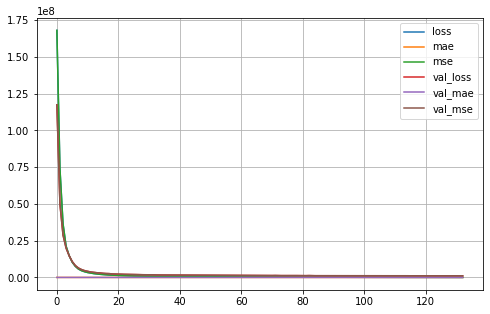

In [117]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

### Predicting Test Data and plot of Prediction vs Actual Data

Text(0.5, 1.0, 'Prediction Vs True Values')

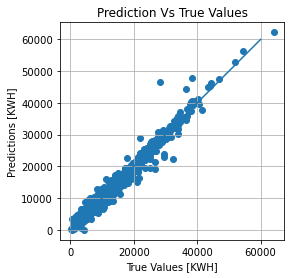

In [116]:
test_predictions = keras_reg.predict(X_test_scaled).flatten()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [KWH]')
plt.ylabel('Predictions [KWH]')
plt.grid(True)
plt.plot(lims, lims)
plt.title("Prediction Vs True Values")

In [129]:
keras_reg.score(X_test_scaled, y_test)

76/76 [==============================] - 0s 909us/step - loss: 1212082.6250 - mae: 701.6250 - mse: 1212082.6250


-1212082.625